In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

pd.pandas.set_option('display.max_columns', None)

In [3]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

df = pd.concat([train, test], axis=0)

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40508 entries, 0 to 40507
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Id           40508 non-null  int64  
 1   Room         40508 non-null  int64  
 2   Price        40508 non-null  float64
 3   Size         40508 non-null  int64  
 4   Balcony      27758 non-null  object 
 5   Floor        40508 non-null  int64  
 6   FloorsTotal  40508 non-null  int64  
 7   Walls        34623 non-null  object 
 8   Age          39967 non-null  object 
 9   Lift         31082 non-null  object 
 10  District     40151 non-null  object 
 11  Okrug        40151 non-null  object 
dtypes: float64(1), int64(5), object(6)
memory usage: 3.7+ MB


In [5]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Id           10127 non-null  int64 
 1   Room         10127 non-null  int64 
 2   Size         10127 non-null  int64 
 3   Balcony      6898 non-null   object
 4   Floor        10127 non-null  int64 
 5   FloorsTotal  10127 non-null  int64 
 6   Walls        8622 non-null   object
 7   Age          9982 non-null   object
 8   Lift         7850 non-null   object
 9   District     10030 non-null  object
 10  Okrug        10030 non-null  object
dtypes: int64(5), object(6)
memory usage: 870.4+ KB


In [3]:
df

Id  Room        Price  Size Balcony  Floor  FloorsTotal  \
0          1     5  210020000.0   198  балкон      1            2   
1          2     2   17630000.0    64     NaN      3            8   
2          3     5  142400000.0   161  балкон      7            7   
3          4     5  142520000.0   265     NaN      5            5   
4          5     3   34070000.0    88     NaN     10           42   
...      ...   ...          ...   ...     ...    ...          ...   
10122  50631     3          NaN    86  лоджия     14           14   
10123  50632     3          NaN    82  лоджия      6           17   
10124  50633     1          NaN    40  лоджия      3           23   
10125  50634     2          NaN    57     NaN      3            9   
10126  50635     3          NaN    55  балкон      6            9   

               Walls       Age          Lift         District Okrug  
0                NaN  вторичка           NaN            Сокол   САО  
1         монолитный  вторичка      грузовой           Зюзино  ЮЗАО  
2          кирпичный  вторичка  пассажирский      Пресненский   ЦАО  
3          кирпичный  вторичка           NaN        Басманный   ЦАО  
4         монолитный  вторичка      грузовой      Хорошевский   САО  
...              ...       ...           ...              ...   ...  
10122  панельный дом  вторичка      грузовой          Люблино  ЮВАО  
10123  панельный дом  вторичка      грузовой  Северное Бутово  ЮЗАО  
10124     монолитный  вторичка      грузовой     Южное Бутово  ЮЗАО  
10125      кирпичный  вторичка  пассажирский      Даниловский   ЮАО  
10126      кирпичный  вторичка           NaN         Царицыно   ЮАО  

[50635 rows x 12 columns]

**Finding features with missing values**

In [4]:
features_with_na = [feature for feature in df.columns if df[feature].isna().sum()>=1]

In [5]:
#Delete target feature from na features
features_with_na = features_with_na[1:]
features_with_na

['Balcony', 'Walls', 'Age', 'Lift', 'District', 'Okrug']

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50635 entries, 0 to 10126
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Id           50635 non-null  int64  
 1   Room         50635 non-null  int64  
 2   Price        40508 non-null  float64
 3   Size         50635 non-null  int64  
 4   Balcony      34656 non-null  object 
 5   Floor        50635 non-null  int64  
 6   FloorsTotal  50635 non-null  int64  
 7   Walls        43245 non-null  object 
 8   Age          49949 non-null  object 
 9   Lift         38932 non-null  object 
 10  District     50181 non-null  object 
 11  Okrug        50181 non-null  object 
dtypes: float64(1), int64(5), object(6)
memory usage: 5.0+ MB


In [7]:
for feature in features_with_na:
    print('{} {}% missing values'.format(feature, np.round(df[feature].isnull().mean(), 3)))
    

Balcony 0.316% missing values
Walls 0.146% missing values
Age 0.014% missing values
Lift 0.231% missing values
District 0.009% missing values
Okrug 0.009% missing values


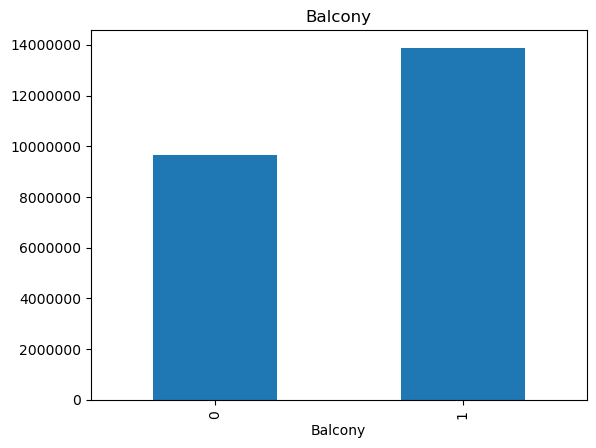

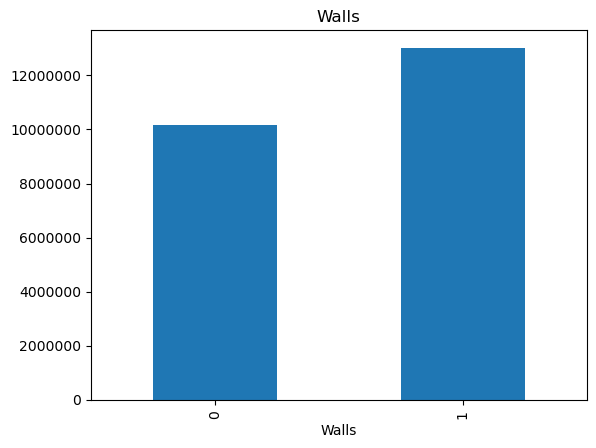

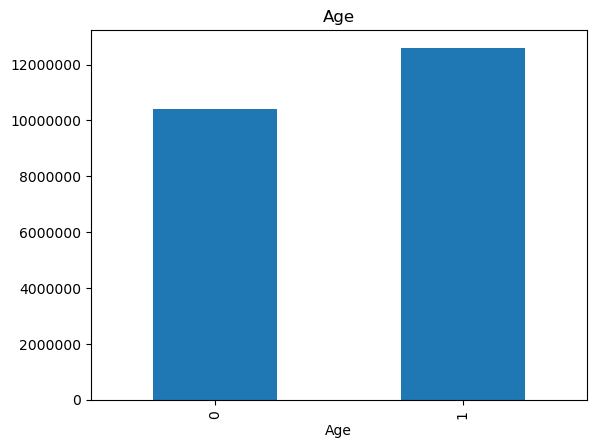

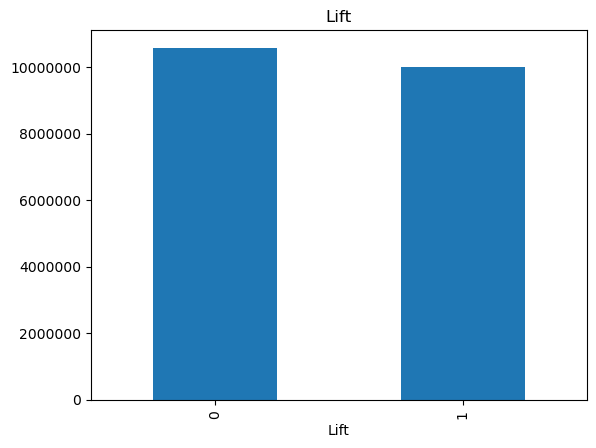

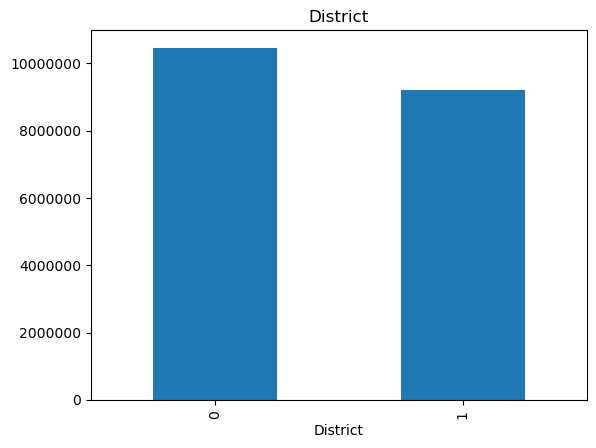

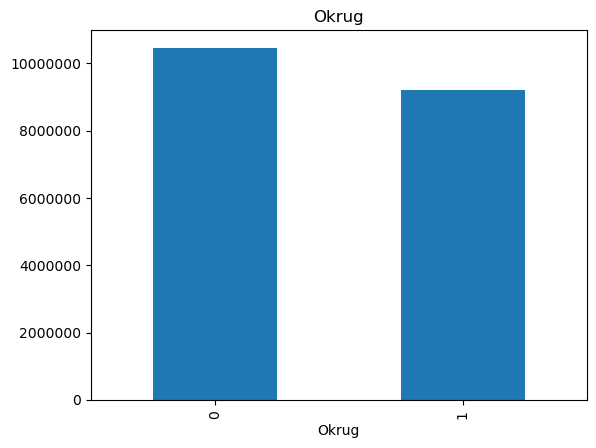

In [8]:
for feature in features_with_na:
    data = train.copy()
    
    data[feature] = np.where(data[feature].isnull(), 1, 0)
    
    data.groupby(feature)['Price'].median().plot.bar()
    plt.ticklabel_format(style = 'plain', axis='y')
    plt.title(feature)
    plt.show()
    

It is visible that price dependence from filled and na values of features are different. It is needed to replace these NAs with suitable values to make strong prediction power of the model

## Numerical features

In [9]:
numerical_features = [feature for feature in df.columns if df[feature].dtypes!='O']

In [10]:
df[numerical_features].head()

Id  Room        Price  Size  Floor  FloorsTotal
0   1     5  210020000.0   198      1            2
1   2     2   17630000.0    64      3            8
2   3     5  142400000.0   161      7            7
3   4     5  142520000.0   265      5            5
4   5     3   34070000.0    88     10           42

In [11]:
##finding discrete variables 
discrete_features = ["Room", "Floor", 'FloorsTotal']

In [12]:
##Continious variables
cont_features = [feature for feature in numerical_features if feature
                 not in discrete_features and feature!="Id"]

In [13]:
cont_features

['Price', 'Size']

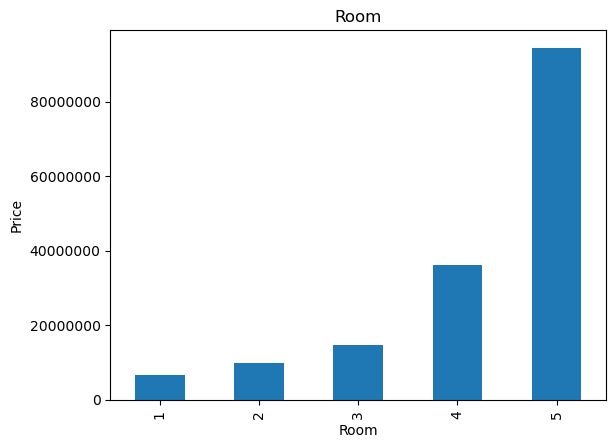

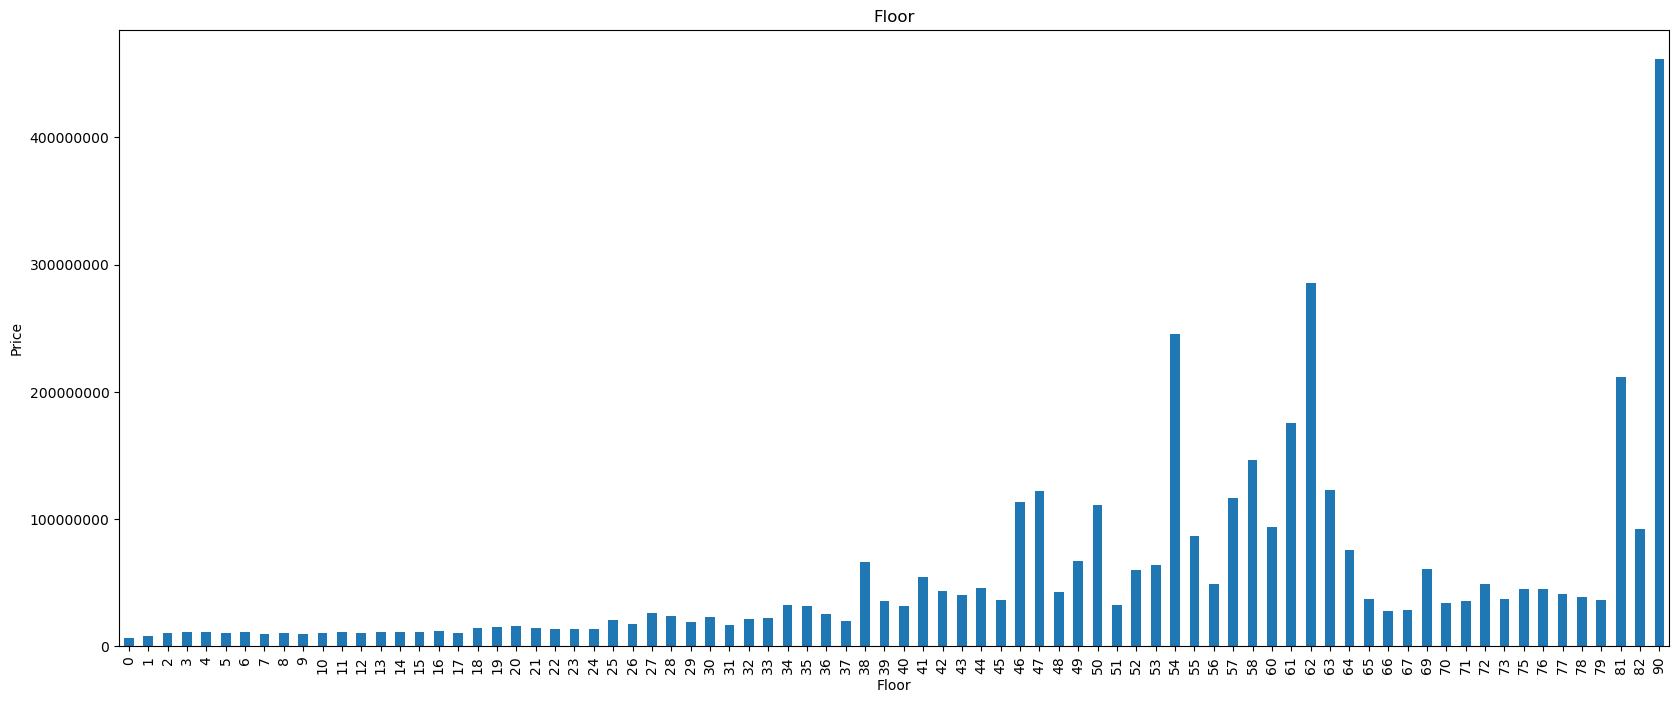

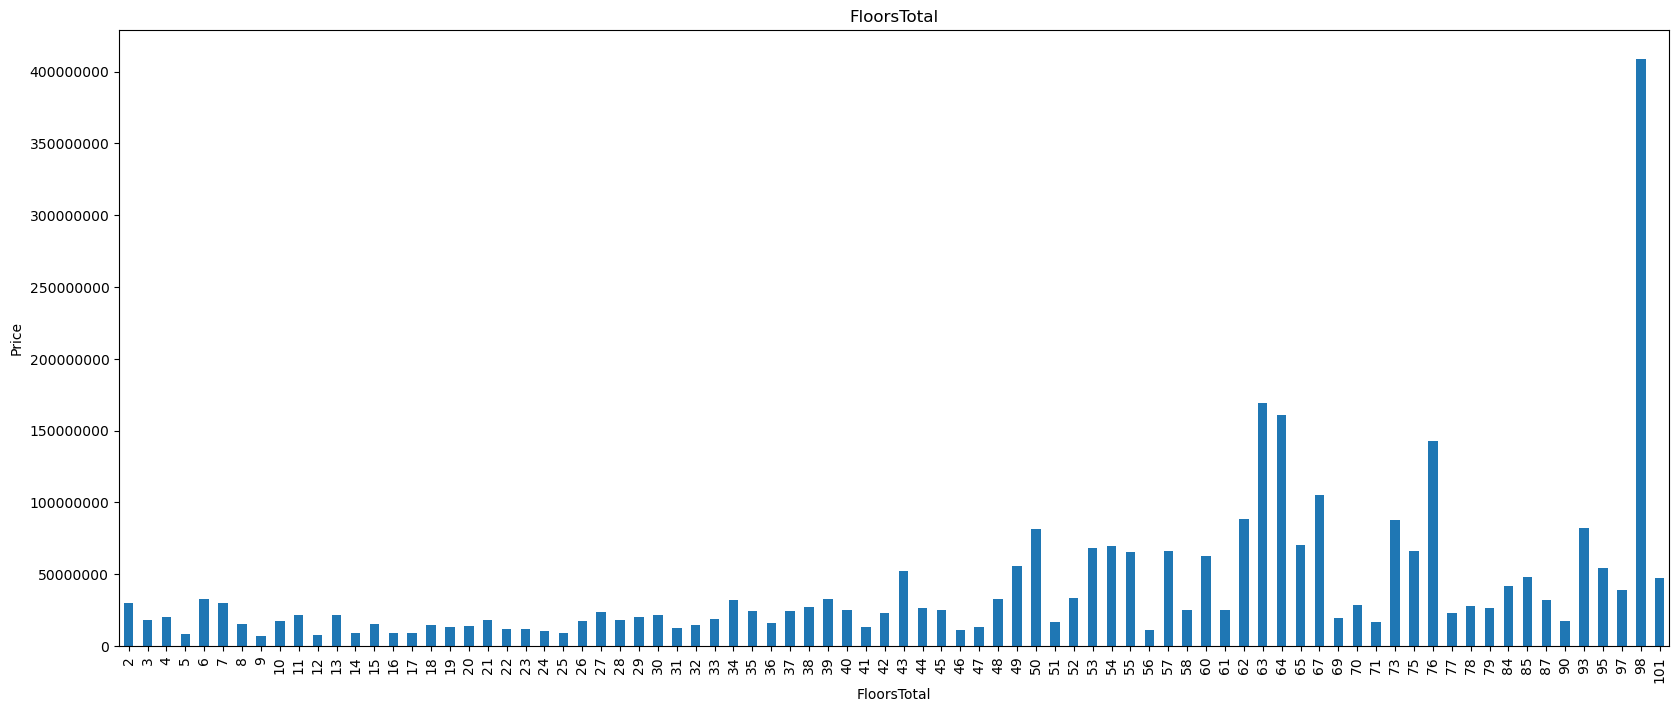

In [14]:
for feature in discrete_features:
    data = train.copy()
    data.groupby(feature)['Price'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('Price')
    plt.title(feature)
    plt.rcParams["figure.figsize"] = (20,8)
    plt.ticklabel_format(style = 'plain', axis='y')
    plt.show()

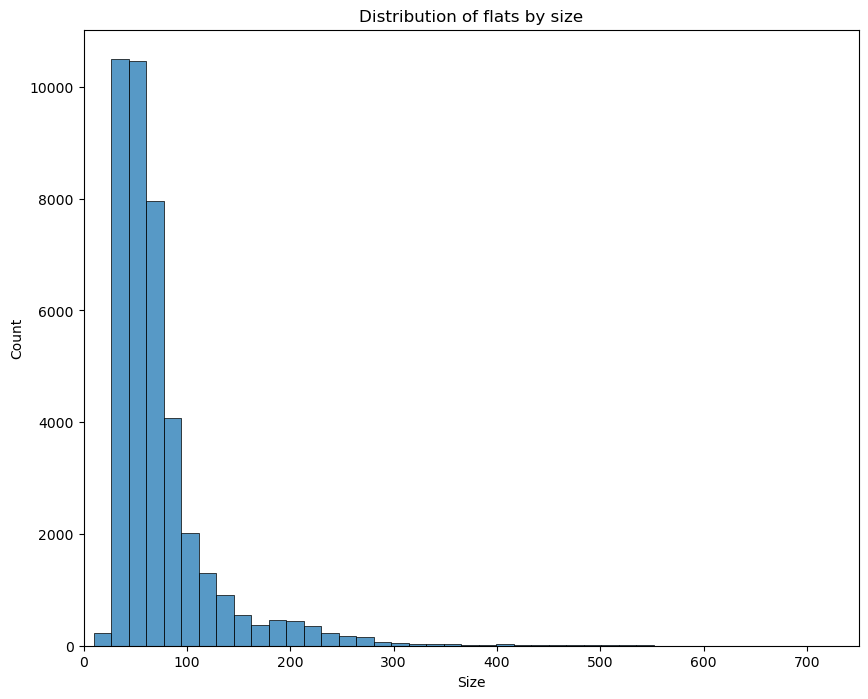

In [15]:
plt.rcParams["figure.figsize"] = (10,8)
sns.histplot(data=train, x='Size', bins=100)
plt.xlim(0, 750)
_ = plt.title('Distribution of flats by size')

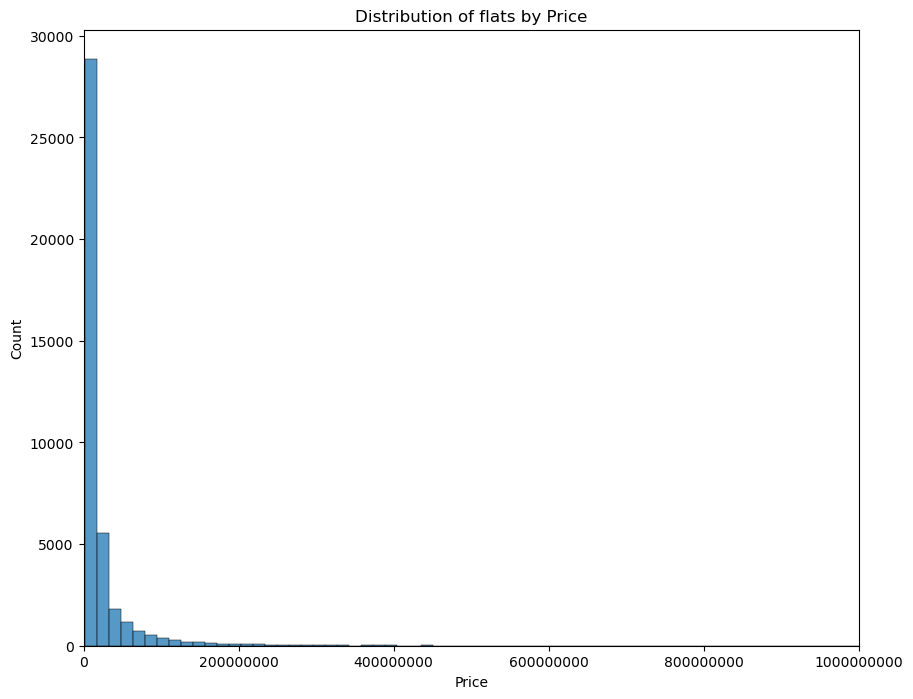

In [16]:
plt.rcParams["figure.figsize"] = (10,8)
sns.histplot(data=train, x='Price', bins=150)
plt.ticklabel_format(style = 'plain', axis='x')
plt.xlim(0, 1000000000)
_ = plt.title('Distribution of flats by Price')

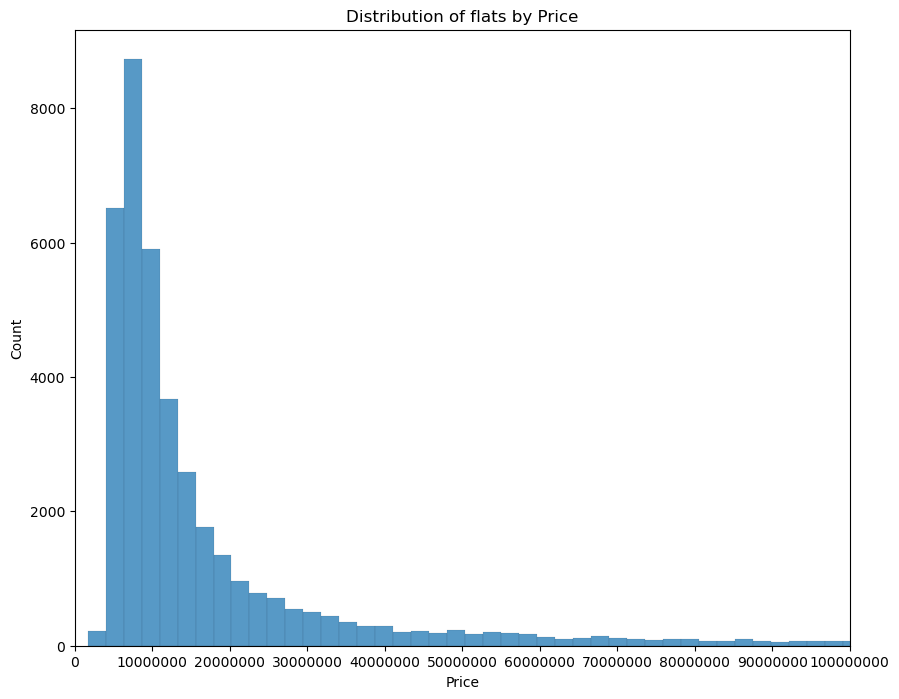

In [17]:
#Lets look with better scale 
import matplotlib.ticker as ticker

fig,ax = plt.subplots()
plt.rcParams["figure.figsize"] = (12,8)
sns.histplot(data=train, x='Price', bins=1000, ax=ax)
ax.xaxis.set_major_locator(ticker.MultipleLocator(10000000))
plt.ticklabel_format(style = 'plain', axis='x')
plt.xlim(0, 100000000)
_ = plt.title('Distribution of flats by Price')

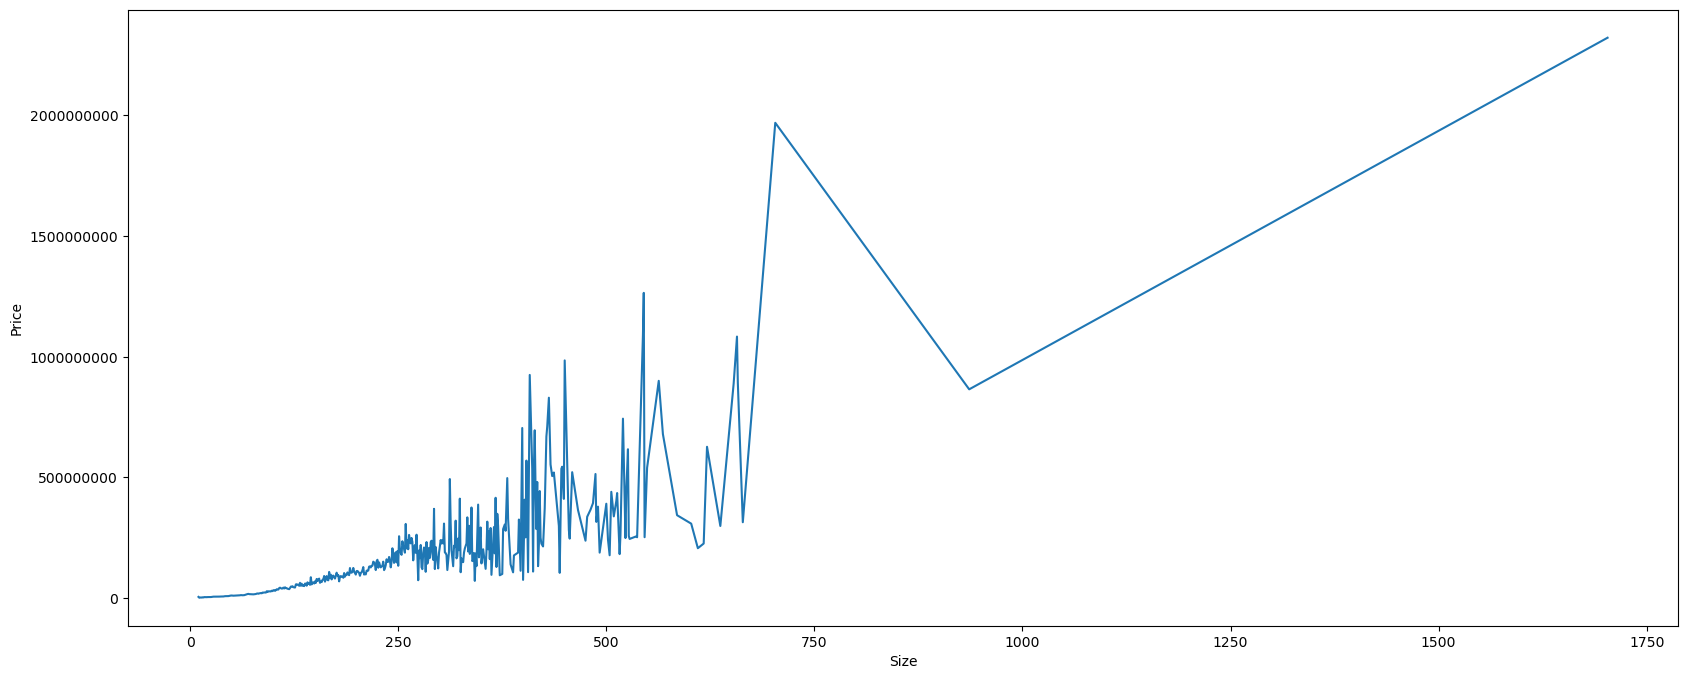

In [18]:
tmp_data = train.groupby('Size')['Price'].mean().reset_index().rename({
    'Size':'Size',
    'Price':'Price'},
    axis=1
)
plt.rcParams["figure.figsize"] = (20,8)
sns.lineplot(data=tmp_data, y='Price', x='Size')
plt.ticklabel_format(style = 'plain', axis='y')
plt.show()

## Log transformation of the features to receive normal distribution

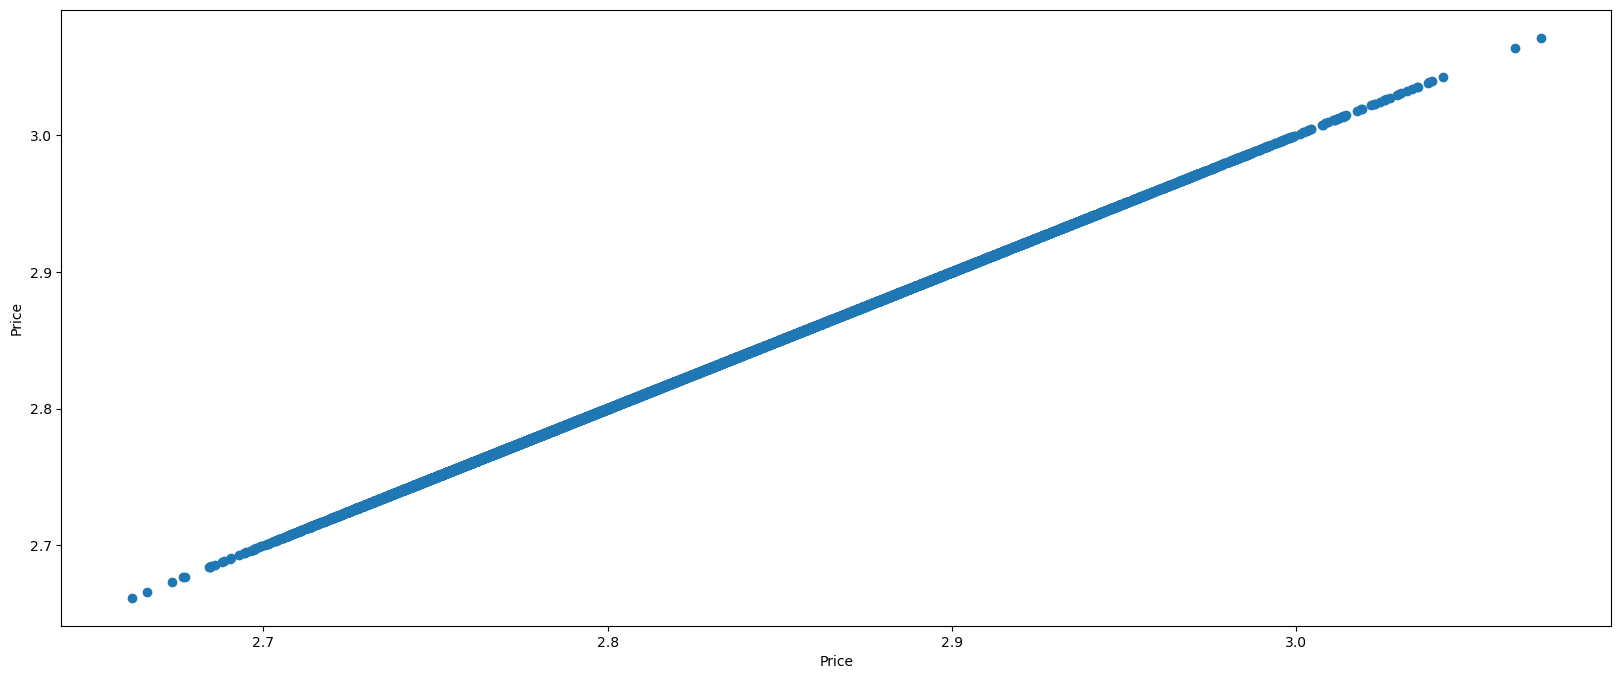

0        2.952966
1        2.814517
2        2.932481
3        2.932526
4        2.853242
           ...   
40503    2.801036
40504    2.756283
40505    2.849820
40506    2.764083
40507    2.739757
Name: Price, Length: 40508, dtype: float64


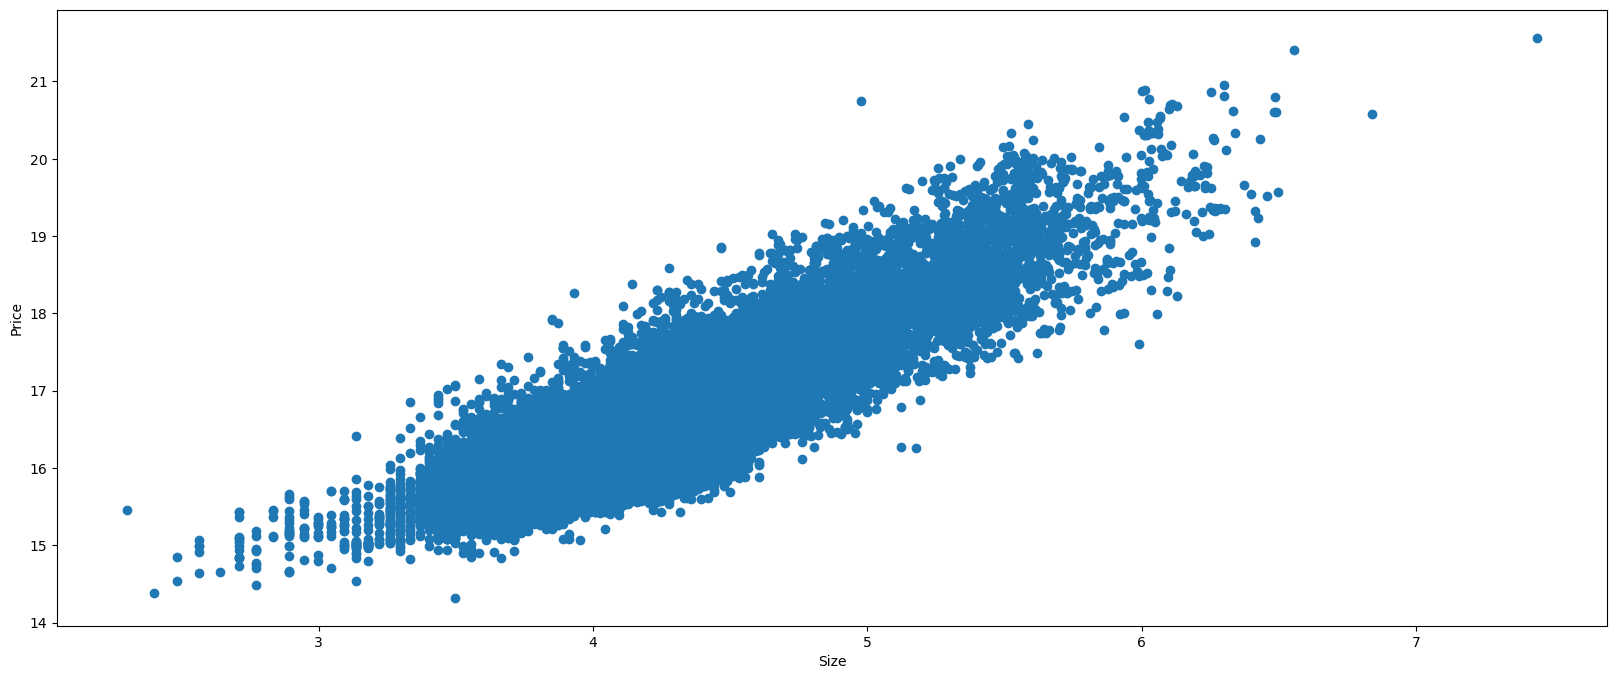

0        19.162713
1        16.685113
2        18.774151
3        18.774993
4        17.343928
           ...    
40503    16.461685
40504    15.741218
40505    17.284678
40506    15.864493
40507    15.483217
Name: Price, Length: 40508, dtype: float64


In [19]:
for feature in cont_features:
    data = train.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature] = np.log(data[feature])
        data['Price'] = np.log(data['Price'])
        plt.scatter(x=data[feature], y=data['Price'])
        plt.ticklabel_format(style = 'plain', axis='y')
        plt.ylabel('Price')
        plt.xlabel(feature)
        plt.show()
        print(data['Price'])

# outliers

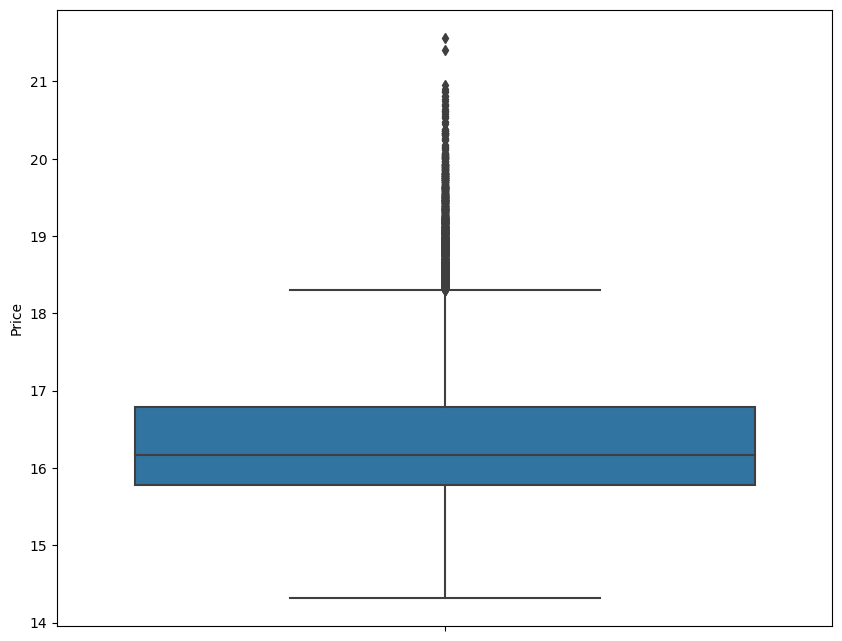

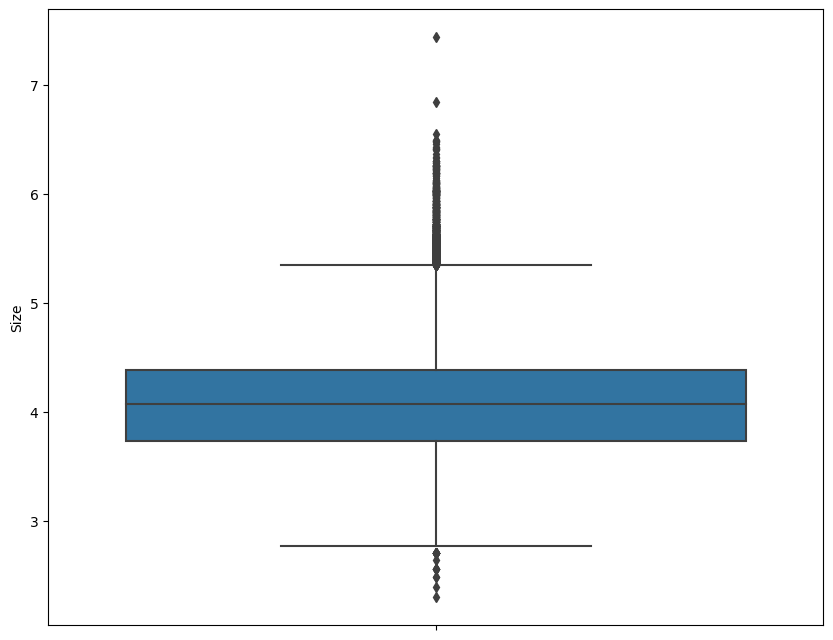

In [20]:
for feature in cont_features:
    data = train.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature] = np.log(data[feature])
        plt.rcParams["figure.figsize"] = (10,8)
        sns.boxplot(y=data[feature])
        plt.ylabel(feature)
        plt.show()

# Categorical features

In [21]:
categorical_features = [feature for feature in df.columns if df[feature].dtypes=='O']

In [22]:
categorical_features

['Balcony', 'Walls', 'Age', 'Lift', 'District', 'Okrug']

In [23]:
for feature in categorical_features:
    print(f'For feature {feature} number of categories are {len(df[feature].unique())}')

For feature Balcony number of categories are 3
For feature Walls number of categories are 6
For feature Age number of categories are 3
For feature Lift number of categories are 3
For feature District number of categories are 121
For feature Okrug number of categories are 10


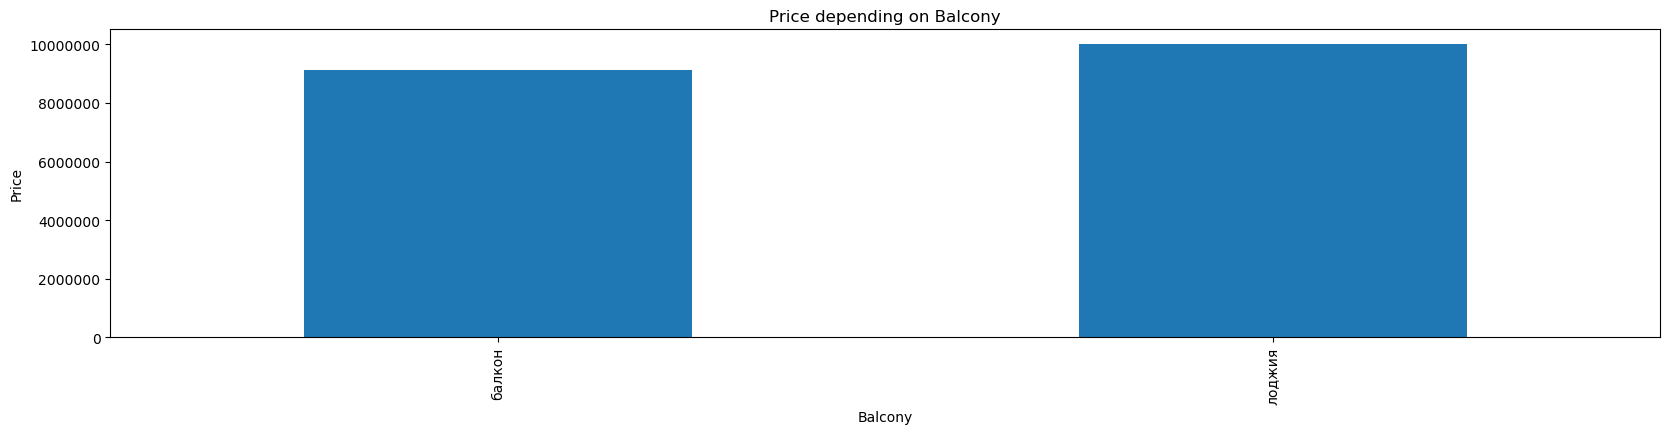

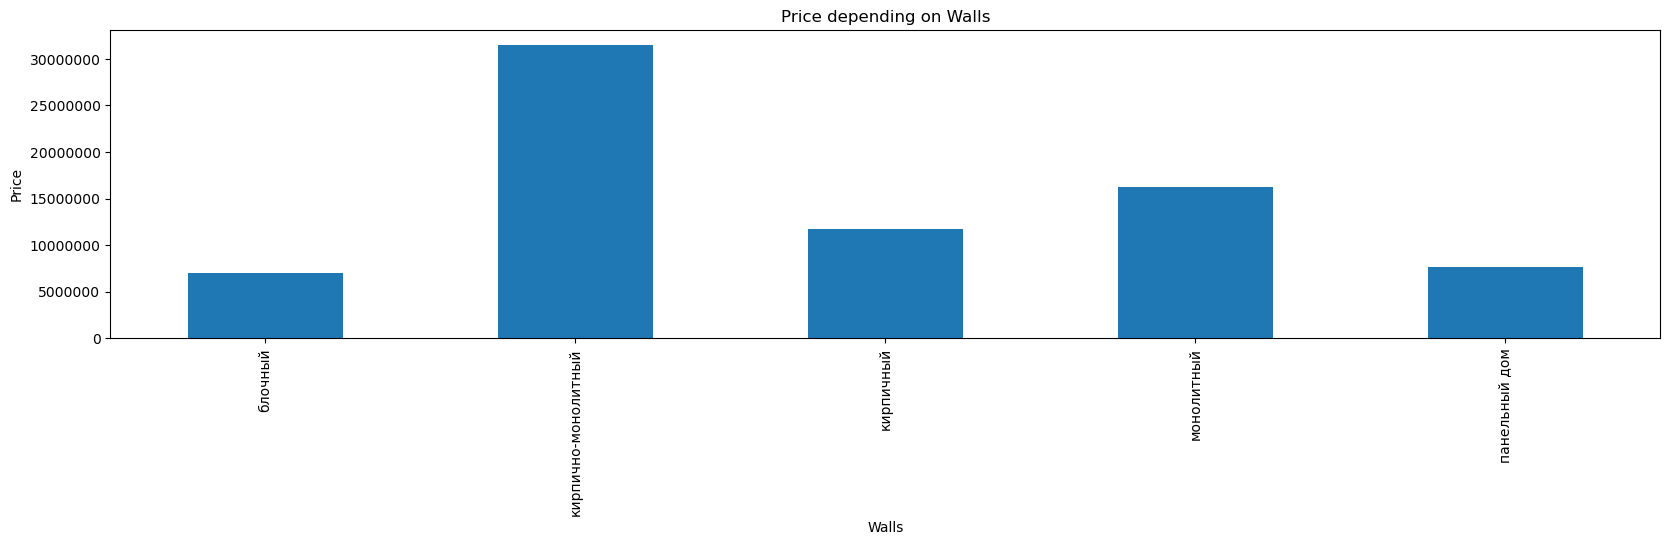

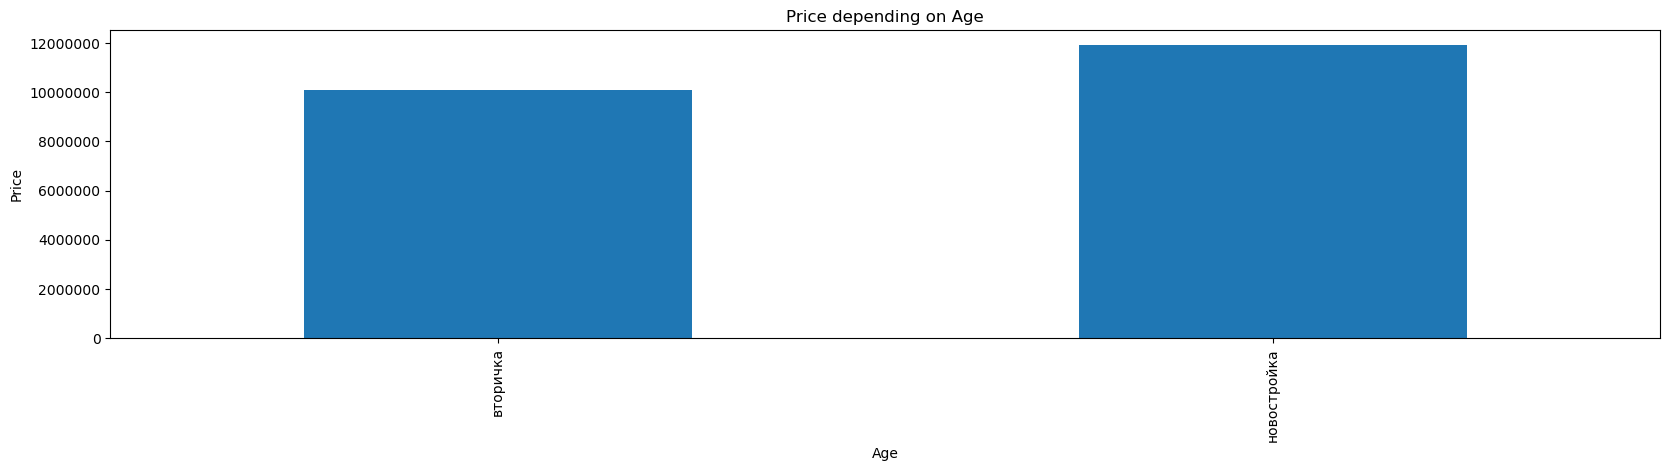

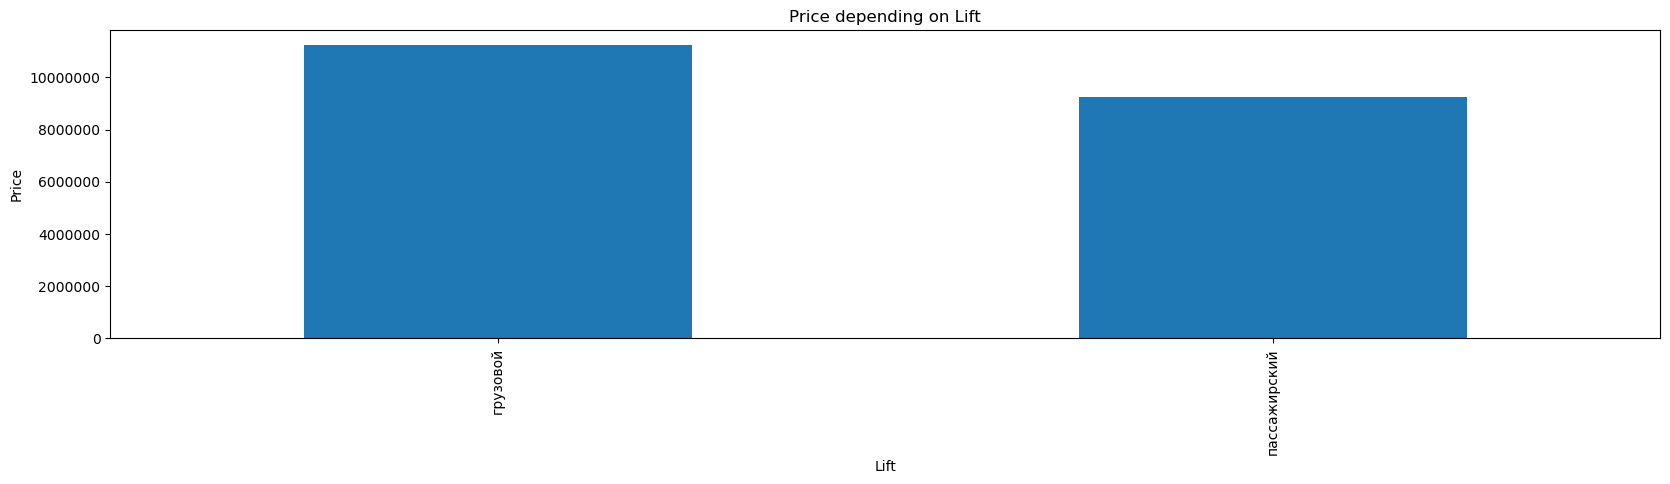

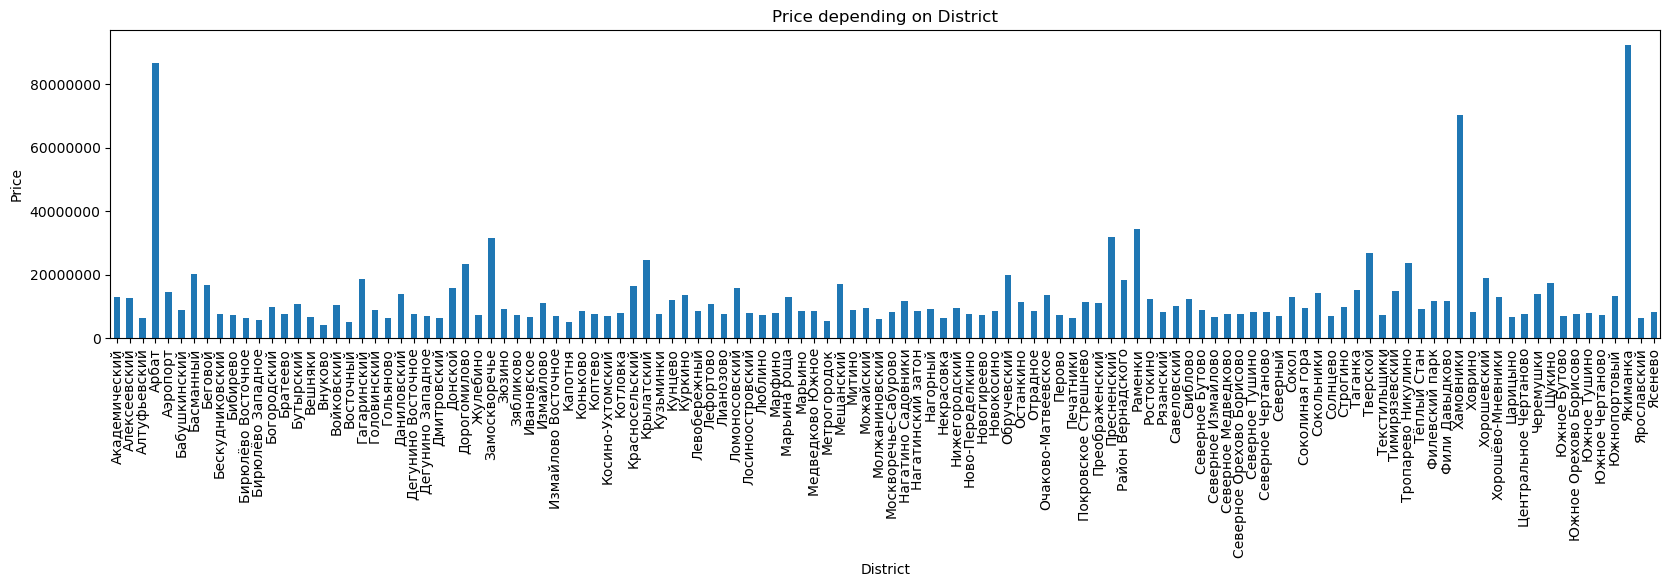

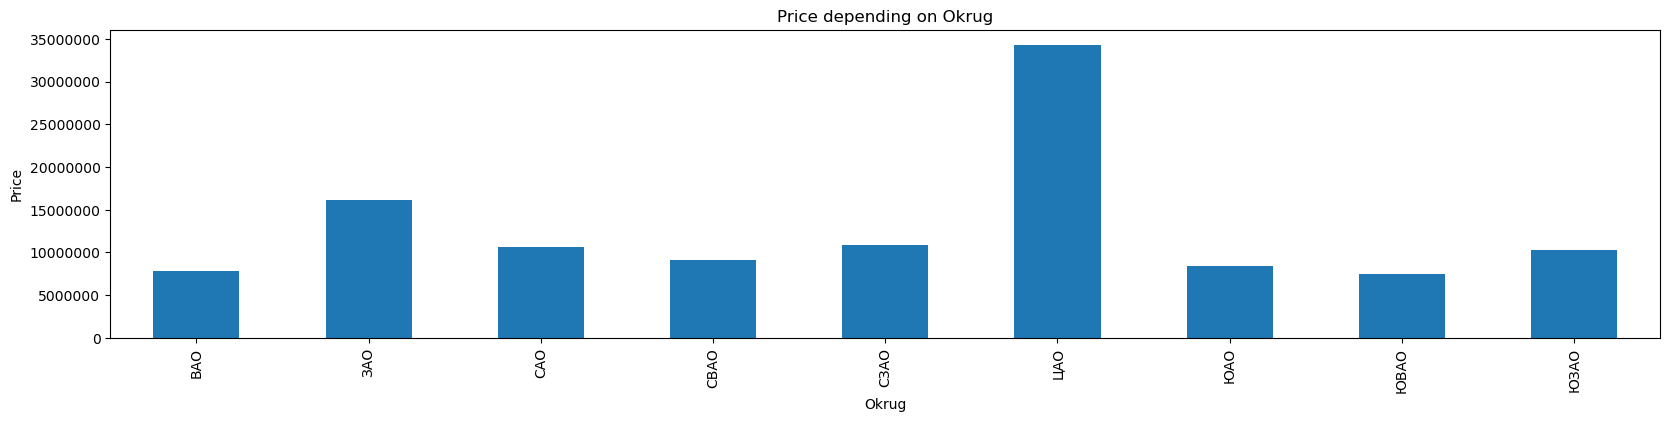

In [24]:
for feature in categorical_features:
    data = df.copy()
    plt.rcParams['figure.figsize'] = (20,4)
    data.groupby(feature)['Price'].median().plot.bar()
   
    plt.xlabel(feature)
    plt.ylabel('Price')
    plt.title(f'Price depending on {feature}')
    plt.ticklabel_format(style='plain', axis='y')
    plt.show()

# Feature engineering part

In [25]:
## finding and replacing missing values
na_features = [feature for feature in df if df[feature].isnull().sum()>1 and df[feature].dtypes=='O']
def filler(dataset, empty_columns):
    data = df.copy()
    data[na_features] = data[na_features].fillna('Missing')
    return data 
df = filler(df, na_features)
df.info()
    

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50635 entries, 0 to 10126
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Id           50635 non-null  int64  
 1   Room         50635 non-null  int64  
 2   Price        40508 non-null  float64
 3   Size         50635 non-null  int64  
 4   Balcony      50635 non-null  object 
 5   Floor        50635 non-null  int64  
 6   FloorsTotal  50635 non-null  int64  
 7   Walls        50635 non-null  object 
 8   Age          50635 non-null  object 
 9   Lift         50635 non-null  object 
 10  District     50635 non-null  object 
 11  Okrug        50635 non-null  object 
dtypes: float64(1), int64(5), object(6)
memory usage: 5.0+ MB


In [26]:
## convert numerical features into log scale 
numeric_features = ['Size', 'Price']
for feature in numeric_features:
    df[feature] = np.log(df[feature])
df.head()

Id  Room      Price      Size  Balcony  Floor  FloorsTotal       Walls  \
0   1     5  19.162713  5.288267   балкон      1            2     Missing   
1   2     2  16.685113  4.158883  Missing      3            8  монолитный   
2   3     5  18.774151  5.081404   балкон      7            7   кирпичный   
3   4     5  18.774993  5.579730  Missing      5            5   кирпичный   
4   5     3  17.343928  4.477337  Missing     10           42  монолитный   

        Age          Lift     District Okrug  
0  вторичка       Missing        Сокол   САО  
1  вторичка      грузовой       Зюзино  ЮЗАО  
2  вторичка  пассажирский  Пресненский   ЦАО  
3  вторичка       Missing    Басманный   ЦАО  
4  вторичка      грузовой  Хорошевский   САО

In [27]:
##finding rare values 
for feature in categorical_features:
    temp = df.groupby(feature)['Price'].count()/df.shape[0]
    temp_df = temp[temp>0.01].index
    df[feature] = np.where(df[feature].isin(temp_df), df[feature], "Rare_value")

In [28]:
df.head()

Id  Room      Price      Size  Balcony  Floor  FloorsTotal       Walls  \
0   1     5  19.162713  5.288267   балкон      1            2     Missing   
1   2     2  16.685113  4.158883  Missing      3            8  монолитный   
2   3     5  18.774151  5.081404   балкон      7            7   кирпичный   
3   4     5  18.774993  5.579730  Missing      5            5   кирпичный   
4   5     3  17.343928  4.477337  Missing     10           42  монолитный   

        Age          Lift     District Okrug  
0  вторичка       Missing   Rare_value   САО  
1  вторичка      грузовой   Rare_value  ЮЗАО  
2  вторичка  пассажирский  Пресненский   ЦАО  
3  вторичка       Missing    Басманный   ЦАО  
4  вторичка      грузовой  Хорошевский   САО

In [29]:
for feature in categorical_features:
    labels_ordered=df.groupby([feature])['Price'].mean().sort_values().index
    labels_ordered={k:i for i,k in enumerate(labels_ordered,0)}
    df[feature]=df[feature].map(labels_ordered)

# Scaling

In [30]:
from sklearn.preprocessing import MinMaxScaler

In [31]:
scalable_features = [feature for feature in df.columns if feature not in ['Id', 'Price']]
scalable_features

['Room',
 'Size',
 'Balcony',
 'Floor',
 'FloorsTotal',
 'Walls',
 'Age',
 'Lift',
 'District',
 'Okrug']

In [32]:
scaler = MinMaxScaler()
scaler.fit(df[scalable_features])

MinMaxScaler()

In [33]:
data = pd.concat([df[['Id', 'Price']].reset_index(drop=True),
                    pd.DataFrame(scaler.transform(df[scalable_features]), columns=scalable_features)],
                    axis=1)

In [34]:
data.head()

Id      Price  Room      Size  Balcony     Floor  FloorsTotal  Walls  Age  \
0   1  19.162713  1.00  0.581148      0.5  0.011111     0.000000    0.6  1.0   
1   2  16.685113  0.25  0.361319      1.0  0.033333     0.060606    0.8  1.0   
2   3  18.774151  1.00  0.540883      0.5  0.077778     0.050505    0.4  1.0   
3   4  18.774993  1.00  0.637879      1.0  0.055556     0.030303    0.4  1.0   
4   5  17.343928  0.50  0.423304      1.0  0.111111     0.404040    0.8  1.0   

   Lift  District     Okrug  
0   0.5  0.266667  0.666667  
1   1.0  0.266667  0.555556  
2   0.0  0.933333  1.000000  
3   0.5  0.733333  1.000000  
4   1.0  0.666667  0.666667

In [35]:
data.to_csv('X_train.csv', index=False)

# Future selection

In [36]:
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel


In [37]:
df = pd.read_csv('X_train.csv')

In [38]:
train = df[~df['Price'].isna()]

In [39]:
train.shape

(40508, 12)

In [40]:
X_train = train.drop(['Id', 'Price'], axis=1)
y_train = train['Price']

X_test = df[df['Price'].isna()].drop(['Price', 'Id'], axis=1)

In [41]:
feature_sel_model = SelectFromModel(Lasso(alpha=0.005, random_state=0))
feature_sel_model.fit(X_train, y_train)

SelectFromModel(estimator=Lasso(alpha=0.005, random_state=0))

In [42]:
feature_sel_model.get_support()

array([False,  True,  True, False, False,  True,  True,  True,  True,
        True])

In [43]:
selected_fit = X_train.columns[(feature_sel_model.get_support())]

In [44]:
selected_fit

Index(['Size', 'Balcony', 'Walls', 'Age', 'Lift', 'District', 'Okrug'], dtype='object')

# Creating a model

In [45]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_log_error
from sklearn.model_selection import GridSearchCV
from catboost import CatBoostRegressor
import xgboost


In [46]:
clf = xgboost.XGBRegressor()
clfr = clf.fit(X_train, y_train)


rf = RandomForestRegressor()
rft = rf.fit(X_train, y_train)

In [47]:
# params = {
#     'n_estimators':[100, 200, 300]
# }

# forest = RandomForestRegressor()
# gs = GridSearchCV(forest, params, cv=5, scoring='neg_mean_squared_error')
# gs.fit(X_train, y_train)


In [62]:
cb = CatBoostRegressor()
grid = {
    'learning_rate': [0.03, 0.1],
    'depth':[4, 6, 10],
    'l2_leaf_reg': [1, 3, 5, 7, 9]
}
grid_search_results = cb.grid_search(grid, X_train, y_train, shuffle=False, verbose=3, plot=True)
# cb.fit(X_train, y_train)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 15.9660997	test: 15.8468728	best: 15.8468728 (0)	total: 5.72ms	remaining: 5.71s
1:	learn: 15.4885289	test: 15.3698865	best: 15.3698865 (1)	total: 10.9ms	remaining: 5.45s
2:	learn: 15.0250404	test: 14.9081309	best: 14.9081309 (2)	total: 13.5ms	remaining: 4.5s
3:	learn: 14.5750756	test: 14.4607948	best: 14.4607948 (3)	total: 17.6ms	remaining: 4.38s
4:	learn: 14.1393144	test: 14.0254017	best: 14.0254017 (4)	total: 20.1ms	remaining: 3.99s
5:	learn: 13.7165087	test: 13.6033048	best: 13.6033048 (5)	total: 21.8ms	remaining: 3.62s
6:	learn: 13.3062681	test: 13.1948291	best: 13.1948291 (6)	total: 23.5ms	remaining: 3.33s
7:	learn: 12.9086536	test: 12.7968266	best: 12.7968266 (7)	total: 25.3ms	remaining: 3.13s
8:	learn: 12.5225021	test: 12.4129614	best: 12.4129614 (8)	total: 27.1ms	remaining: 2.98s
9:	learn: 12.1482741	test: 12.0395138	best: 12.0395138 (9)	total: 28.8ms	remaining: 2.85s
10:	learn: 11.7850490	test: 11.6789290	best: 11.6789290 (10)	total: 32.3ms	remaining: 2.9s
11:	learn:

127:	learn: 0.4714516	test: 0.4575210	best: 0.4575210 (127)	total: 206ms	remaining: 1.41s
128:	learn: 0.4638135	test: 0.4500171	best: 0.4500171 (128)	total: 210ms	remaining: 1.42s
129:	learn: 0.4562012	test: 0.4426342	best: 0.4426342 (129)	total: 214ms	remaining: 1.43s
130:	learn: 0.4490311	test: 0.4356229	best: 0.4356229 (130)	total: 216ms	remaining: 1.43s
131:	learn: 0.4420237	test: 0.4287491	best: 0.4287491 (131)	total: 220ms	remaining: 1.44s
132:	learn: 0.4354209	test: 0.4221630	best: 0.4221630 (132)	total: 224ms	remaining: 1.46s
133:	learn: 0.4291767	test: 0.4161165	best: 0.4161165 (133)	total: 228ms	remaining: 1.47s
134:	learn: 0.4231158	test: 0.4102630	best: 0.4102630 (134)	total: 231ms	remaining: 1.48s
135:	learn: 0.4174801	test: 0.4048688	best: 0.4048688 (135)	total: 233ms	remaining: 1.48s
136:	learn: 0.4118966	test: 0.3995108	best: 0.3995108 (136)	total: 235ms	remaining: 1.48s
137:	learn: 0.4064716	test: 0.3941859	best: 0.3941859 (137)	total: 236ms	remaining: 1.48s
138:	learn

240:	learn: 0.2837206	test: 0.2745115	best: 0.2745115 (240)	total: 408ms	remaining: 1.28s
241:	learn: 0.2834696	test: 0.2742125	best: 0.2742125 (241)	total: 412ms	remaining: 1.29s
242:	learn: 0.2831469	test: 0.2738921	best: 0.2738921 (242)	total: 417ms	remaining: 1.3s
243:	learn: 0.2828950	test: 0.2736821	best: 0.2736821 (243)	total: 420ms	remaining: 1.3s
244:	learn: 0.2826934	test: 0.2734789	best: 0.2734789 (244)	total: 421ms	remaining: 1.3s
245:	learn: 0.2825572	test: 0.2733541	best: 0.2733541 (245)	total: 424ms	remaining: 1.3s
246:	learn: 0.2824141	test: 0.2732086	best: 0.2732086 (246)	total: 426ms	remaining: 1.3s
247:	learn: 0.2821175	test: 0.2728895	best: 0.2728895 (247)	total: 427ms	remaining: 1.29s
248:	learn: 0.2818614	test: 0.2726585	best: 0.2726585 (248)	total: 429ms	remaining: 1.29s
249:	learn: 0.2816437	test: 0.2724365	best: 0.2724365 (249)	total: 432ms	remaining: 1.29s
250:	learn: 0.2814027	test: 0.2722343	best: 0.2722343 (250)	total: 433ms	remaining: 1.29s
251:	learn: 0.2

354:	learn: 0.2666980	test: 0.2613849	best: 0.2613849 (354)	total: 607ms	remaining: 1.1s
355:	learn: 0.2666098	test: 0.2613109	best: 0.2613109 (355)	total: 609ms	remaining: 1.1s
356:	learn: 0.2665145	test: 0.2612141	best: 0.2612141 (356)	total: 611ms	remaining: 1.1s
357:	learn: 0.2664354	test: 0.2611927	best: 0.2611927 (357)	total: 612ms	remaining: 1.1s
358:	learn: 0.2663400	test: 0.2611847	best: 0.2611847 (358)	total: 614ms	remaining: 1.09s
359:	learn: 0.2662436	test: 0.2610887	best: 0.2610887 (359)	total: 615ms	remaining: 1.09s
360:	learn: 0.2661612	test: 0.2610574	best: 0.2610574 (360)	total: 617ms	remaining: 1.09s
361:	learn: 0.2660511	test: 0.2610205	best: 0.2610205 (361)	total: 618ms	remaining: 1.09s
362:	learn: 0.2659707	test: 0.2609729	best: 0.2609729 (362)	total: 620ms	remaining: 1.09s
363:	learn: 0.2658752	test: 0.2609041	best: 0.2609041 (363)	total: 622ms	remaining: 1.09s
364:	learn: 0.2657834	test: 0.2608379	best: 0.2608379 (364)	total: 626ms	remaining: 1.09s
365:	learn: 0.

544:	learn: 0.2546758	test: 0.2548136	best: 0.2548136 (544)	total: 1.01s	remaining: 841ms
545:	learn: 0.2546396	test: 0.2548110	best: 0.2548110 (545)	total: 1.01s	remaining: 841ms
546:	learn: 0.2545950	test: 0.2548261	best: 0.2548110 (545)	total: 1.01s	remaining: 841ms
547:	learn: 0.2545534	test: 0.2548186	best: 0.2548110 (545)	total: 1.02s	remaining: 842ms
548:	learn: 0.2544994	test: 0.2547567	best: 0.2547567 (548)	total: 1.02s	remaining: 843ms
549:	learn: 0.2544435	test: 0.2546816	best: 0.2546816 (549)	total: 1.03s	remaining: 843ms
550:	learn: 0.2544021	test: 0.2546399	best: 0.2546399 (550)	total: 1.03s	remaining: 843ms
551:	learn: 0.2543708	test: 0.2546023	best: 0.2546023 (551)	total: 1.04s	remaining: 842ms
552:	learn: 0.2543152	test: 0.2545832	best: 0.2545832 (552)	total: 1.04s	remaining: 841ms
553:	learn: 0.2542812	test: 0.2545604	best: 0.2545604 (553)	total: 1.04s	remaining: 840ms
554:	learn: 0.2542413	test: 0.2545421	best: 0.2545421 (554)	total: 1.04s	remaining: 839ms
555:	learn

648:	learn: 0.2508190	test: 0.2516784	best: 0.2516784 (648)	total: 1.21s	remaining: 654ms
649:	learn: 0.2507657	test: 0.2516124	best: 0.2516124 (649)	total: 1.21s	remaining: 652ms
650:	learn: 0.2507361	test: 0.2515940	best: 0.2515940 (650)	total: 1.21s	remaining: 650ms
651:	learn: 0.2507149	test: 0.2515910	best: 0.2515910 (651)	total: 1.22s	remaining: 649ms
652:	learn: 0.2506916	test: 0.2515733	best: 0.2515733 (652)	total: 1.22s	remaining: 647ms
653:	learn: 0.2506452	test: 0.2515555	best: 0.2515555 (653)	total: 1.22s	remaining: 646ms
654:	learn: 0.2506089	test: 0.2515065	best: 0.2515065 (654)	total: 1.22s	remaining: 645ms
655:	learn: 0.2505921	test: 0.2514329	best: 0.2514329 (655)	total: 1.23s	remaining: 643ms
656:	learn: 0.2505403	test: 0.2514368	best: 0.2514329 (655)	total: 1.23s	remaining: 641ms
657:	learn: 0.2505056	test: 0.2513941	best: 0.2513941 (657)	total: 1.23s	remaining: 639ms
658:	learn: 0.2504673	test: 0.2513483	best: 0.2513483 (658)	total: 1.23s	remaining: 637ms
659:	learn

767:	learn: 0.2474328	test: 0.2489305	best: 0.2489305 (767)	total: 1.41s	remaining: 426ms
768:	learn: 0.2474082	test: 0.2489288	best: 0.2489288 (768)	total: 1.41s	remaining: 425ms
769:	learn: 0.2473768	test: 0.2489261	best: 0.2489261 (769)	total: 1.42s	remaining: 424ms
770:	learn: 0.2473457	test: 0.2488630	best: 0.2488630 (770)	total: 1.42s	remaining: 423ms
771:	learn: 0.2473169	test: 0.2488269	best: 0.2488269 (771)	total: 1.42s	remaining: 421ms
772:	learn: 0.2473026	test: 0.2488085	best: 0.2488085 (772)	total: 1.43s	remaining: 419ms
773:	learn: 0.2472878	test: 0.2487720	best: 0.2487720 (773)	total: 1.43s	remaining: 417ms
774:	learn: 0.2472599	test: 0.2487554	best: 0.2487554 (774)	total: 1.43s	remaining: 415ms
775:	learn: 0.2472408	test: 0.2487701	best: 0.2487554 (774)	total: 1.43s	remaining: 413ms
776:	learn: 0.2472135	test: 0.2487356	best: 0.2487356 (776)	total: 1.43s	remaining: 412ms
777:	learn: 0.2471951	test: 0.2487233	best: 0.2487233 (777)	total: 1.44s	remaining: 410ms
778:	learn

886:	learn: 0.2447581	test: 0.2472201	best: 0.2472201 (886)	total: 1.61s	remaining: 205ms
887:	learn: 0.2447402	test: 0.2470917	best: 0.2470917 (887)	total: 1.61s	remaining: 203ms
888:	learn: 0.2447071	test: 0.2470760	best: 0.2470760 (888)	total: 1.61s	remaining: 201ms
889:	learn: 0.2446837	test: 0.2470653	best: 0.2470653 (889)	total: 1.61s	remaining: 199ms
890:	learn: 0.2446688	test: 0.2470570	best: 0.2470570 (890)	total: 1.61s	remaining: 198ms
891:	learn: 0.2446634	test: 0.2470878	best: 0.2470570 (890)	total: 1.62s	remaining: 196ms
892:	learn: 0.2446419	test: 0.2470793	best: 0.2470570 (890)	total: 1.62s	remaining: 194ms
893:	learn: 0.2446250	test: 0.2470659	best: 0.2470570 (890)	total: 1.62s	remaining: 192ms
894:	learn: 0.2445955	test: 0.2470508	best: 0.2470508 (894)	total: 1.62s	remaining: 190ms
895:	learn: 0.2445697	test: 0.2470449	best: 0.2470449 (895)	total: 1.62s	remaining: 189ms
896:	learn: 0.2445470	test: 0.2470427	best: 0.2470427 (896)	total: 1.63s	remaining: 187ms
897:	learn

1:	learn: 13.3410329	test: 13.2235160	best: 13.2235160 (1)	total: 4.71ms	remaining: 2.35s
2:	learn: 12.0112986	test: 11.8993711	best: 11.8993711 (2)	total: 6.32ms	remaining: 2.1s
3:	learn: 10.8130274	test: 10.7095413	best: 10.7095413 (3)	total: 7.81ms	remaining: 1.95s
4:	learn: 9.7365486	test: 9.6356749	best: 9.6356749 (4)	total: 11.8ms	remaining: 2.35s
5:	learn: 8.7683923	test: 8.6693736	best: 8.6693736 (5)	total: 14.2ms	remaining: 2.35s
6:	learn: 7.8960955	test: 7.8039602	best: 7.8039602 (6)	total: 16.6ms	remaining: 2.35s
7:	learn: 7.1131521	test: 7.0198939	best: 7.0198939 (7)	total: 20.3ms	remaining: 2.51s
8:	learn: 6.4053528	test: 6.3197189	best: 6.3197189 (8)	total: 23ms	remaining: 2.54s
9:	learn: 5.7715175	test: 5.6875777	best: 5.6875777 (9)	total: 25.9ms	remaining: 2.56s
10:	learn: 5.2000411	test: 5.1217024	best: 5.1217024 (10)	total: 29.4ms	remaining: 2.64s
11:	learn: 4.6854435	test: 4.6121065	best: 4.6121065 (11)	total: 30.9ms	remaining: 2.54s
12:	learn: 4.2209982	test: 4.1547

101:	learn: 0.2700961	test: 0.2676320	best: 0.2676320 (101)	total: 204ms	remaining: 1.79s
102:	learn: 0.2697527	test: 0.2674737	best: 0.2674737 (102)	total: 207ms	remaining: 1.8s
103:	learn: 0.2692868	test: 0.2669161	best: 0.2669161 (103)	total: 211ms	remaining: 1.82s
104:	learn: 0.2689402	test: 0.2666068	best: 0.2666068 (104)	total: 214ms	remaining: 1.82s
105:	learn: 0.2683603	test: 0.2659624	best: 0.2659624 (105)	total: 215ms	remaining: 1.82s
106:	learn: 0.2680684	test: 0.2657094	best: 0.2657094 (106)	total: 217ms	remaining: 1.81s
107:	learn: 0.2679161	test: 0.2655988	best: 0.2655988 (107)	total: 219ms	remaining: 1.81s
108:	learn: 0.2675438	test: 0.2655475	best: 0.2655475 (108)	total: 221ms	remaining: 1.8s
109:	learn: 0.2672028	test: 0.2651287	best: 0.2651287 (109)	total: 222ms	remaining: 1.8s
110:	learn: 0.2668578	test: 0.2650054	best: 0.2650054 (110)	total: 224ms	remaining: 1.79s
111:	learn: 0.2665176	test: 0.2646453	best: 0.2646453 (111)	total: 225ms	remaining: 1.79s
112:	learn: 0

227:	learn: 0.2490306	test: 0.2538116	best: 0.2538116 (227)	total: 404ms	remaining: 1.37s
228:	learn: 0.2489498	test: 0.2537969	best: 0.2537969 (228)	total: 408ms	remaining: 1.37s
229:	learn: 0.2487883	test: 0.2537672	best: 0.2537672 (229)	total: 412ms	remaining: 1.38s
230:	learn: 0.2487249	test: 0.2537232	best: 0.2537232 (230)	total: 415ms	remaining: 1.38s
231:	learn: 0.2486485	test: 0.2536301	best: 0.2536301 (231)	total: 417ms	remaining: 1.38s
232:	learn: 0.2485630	test: 0.2535620	best: 0.2535620 (232)	total: 419ms	remaining: 1.38s
233:	learn: 0.2485081	test: 0.2535606	best: 0.2535606 (233)	total: 421ms	remaining: 1.38s
234:	learn: 0.2484583	test: 0.2534709	best: 0.2534709 (234)	total: 422ms	remaining: 1.37s
235:	learn: 0.2483484	test: 0.2534296	best: 0.2534296 (235)	total: 424ms	remaining: 1.37s
236:	learn: 0.2482808	test: 0.2533790	best: 0.2533790 (236)	total: 425ms	remaining: 1.37s
237:	learn: 0.2482217	test: 0.2533460	best: 0.2533460 (237)	total: 428ms	remaining: 1.37s
238:	learn

345:	learn: 0.2406409	test: 0.2475782	best: 0.2475782 (345)	total: 604ms	remaining: 1.14s
346:	learn: 0.2405900	test: 0.2475594	best: 0.2475594 (346)	total: 606ms	remaining: 1.14s
347:	learn: 0.2405637	test: 0.2475325	best: 0.2475325 (347)	total: 607ms	remaining: 1.14s
348:	learn: 0.2405184	test: 0.2474155	best: 0.2474155 (348)	total: 610ms	remaining: 1.14s
349:	learn: 0.2404685	test: 0.2473972	best: 0.2473972 (349)	total: 614ms	remaining: 1.14s
350:	learn: 0.2403962	test: 0.2474054	best: 0.2473972 (349)	total: 617ms	remaining: 1.14s
351:	learn: 0.2403323	test: 0.2473786	best: 0.2473786 (351)	total: 620ms	remaining: 1.14s
352:	learn: 0.2402676	test: 0.2473838	best: 0.2473786 (351)	total: 621ms	remaining: 1.14s
353:	learn: 0.2402140	test: 0.2473467	best: 0.2473467 (353)	total: 622ms	remaining: 1.14s
354:	learn: 0.2401582	test: 0.2473734	best: 0.2473467 (353)	total: 625ms	remaining: 1.14s
355:	learn: 0.2401341	test: 0.2473514	best: 0.2473467 (353)	total: 626ms	remaining: 1.13s
356:	learn

562:	learn: 0.2317200	test: 0.2436154	best: 0.2435915 (558)	total: 1.01s	remaining: 782ms
563:	learn: 0.2316742	test: 0.2435877	best: 0.2435877 (563)	total: 1.01s	remaining: 782ms
564:	learn: 0.2316397	test: 0.2435867	best: 0.2435867 (564)	total: 1.01s	remaining: 780ms
565:	learn: 0.2316145	test: 0.2435725	best: 0.2435725 (565)	total: 1.02s	remaining: 779ms
566:	learn: 0.2315979	test: 0.2435248	best: 0.2435248 (566)	total: 1.02s	remaining: 778ms
567:	learn: 0.2315663	test: 0.2435294	best: 0.2435248 (566)	total: 1.02s	remaining: 778ms
568:	learn: 0.2315265	test: 0.2435193	best: 0.2435193 (568)	total: 1.02s	remaining: 777ms
569:	learn: 0.2314880	test: 0.2435235	best: 0.2435193 (568)	total: 1.03s	remaining: 775ms
570:	learn: 0.2314451	test: 0.2435607	best: 0.2435193 (568)	total: 1.03s	remaining: 773ms
571:	learn: 0.2314093	test: 0.2434824	best: 0.2434824 (571)	total: 1.03s	remaining: 771ms
572:	learn: 0.2313946	test: 0.2434722	best: 0.2434722 (572)	total: 1.03s	remaining: 769ms
573:	learn

689:	learn: 0.2278497	test: 0.2421444	best: 0.2420973 (685)	total: 1.21s	remaining: 543ms
690:	learn: 0.2278350	test: 0.2421644	best: 0.2420973 (685)	total: 1.21s	remaining: 541ms
691:	learn: 0.2278109	test: 0.2421342	best: 0.2420973 (685)	total: 1.21s	remaining: 540ms
692:	learn: 0.2277813	test: 0.2421150	best: 0.2420973 (685)	total: 1.22s	remaining: 539ms
693:	learn: 0.2277626	test: 0.2421090	best: 0.2420973 (685)	total: 1.22s	remaining: 538ms
694:	learn: 0.2277417	test: 0.2420841	best: 0.2420841 (694)	total: 1.22s	remaining: 536ms
695:	learn: 0.2277137	test: 0.2420991	best: 0.2420841 (694)	total: 1.22s	remaining: 534ms
696:	learn: 0.2276933	test: 0.2420597	best: 0.2420597 (696)	total: 1.23s	remaining: 533ms
697:	learn: 0.2276535	test: 0.2420376	best: 0.2420376 (697)	total: 1.23s	remaining: 531ms
698:	learn: 0.2276368	test: 0.2420249	best: 0.2420249 (698)	total: 1.23s	remaining: 529ms
699:	learn: 0.2276134	test: 0.2420039	best: 0.2420039 (699)	total: 1.23s	remaining: 527ms
700:	learn

804:	learn: 0.2252013	test: 0.2410726	best: 0.2410140 (800)	total: 1.41s	remaining: 341ms
805:	learn: 0.2251853	test: 0.2410773	best: 0.2410140 (800)	total: 1.41s	remaining: 339ms
806:	learn: 0.2251560	test: 0.2411416	best: 0.2410140 (800)	total: 1.41s	remaining: 337ms
807:	learn: 0.2251333	test: 0.2411167	best: 0.2410140 (800)	total: 1.41s	remaining: 336ms
808:	learn: 0.2250989	test: 0.2411154	best: 0.2410140 (800)	total: 1.42s	remaining: 336ms
809:	learn: 0.2250701	test: 0.2411078	best: 0.2410140 (800)	total: 1.43s	remaining: 335ms
810:	learn: 0.2250386	test: 0.2410961	best: 0.2410140 (800)	total: 1.43s	remaining: 334ms
811:	learn: 0.2250215	test: 0.2411055	best: 0.2410140 (800)	total: 1.43s	remaining: 332ms
812:	learn: 0.2250027	test: 0.2411603	best: 0.2410140 (800)	total: 1.43s	remaining: 330ms
813:	learn: 0.2249851	test: 0.2411272	best: 0.2410140 (800)	total: 1.44s	remaining: 328ms
814:	learn: 0.2249633	test: 0.2411132	best: 0.2410140 (800)	total: 1.44s	remaining: 326ms
815:	learn

913:	learn: 0.2228745	test: 0.2408539	best: 0.2406879 (885)	total: 1.6s	remaining: 151ms
914:	learn: 0.2228330	test: 0.2408725	best: 0.2406879 (885)	total: 1.61s	remaining: 149ms
915:	learn: 0.2228119	test: 0.2408600	best: 0.2406879 (885)	total: 1.61s	remaining: 148ms
916:	learn: 0.2227981	test: 0.2408538	best: 0.2406879 (885)	total: 1.61s	remaining: 146ms
917:	learn: 0.2227849	test: 0.2408535	best: 0.2406879 (885)	total: 1.62s	remaining: 144ms
918:	learn: 0.2227685	test: 0.2408716	best: 0.2406879 (885)	total: 1.62s	remaining: 143ms
919:	learn: 0.2227438	test: 0.2408848	best: 0.2406879 (885)	total: 1.62s	remaining: 141ms
920:	learn: 0.2227293	test: 0.2408634	best: 0.2406879 (885)	total: 1.62s	remaining: 139ms
921:	learn: 0.2227134	test: 0.2408584	best: 0.2406879 (885)	total: 1.63s	remaining: 138ms
922:	learn: 0.2226940	test: 0.2408354	best: 0.2406879 (885)	total: 1.63s	remaining: 136ms
923:	learn: 0.2226676	test: 0.2408499	best: 0.2406879 (885)	total: 1.63s	remaining: 134ms
924:	learn:

30:	learn: 6.4327282	test: 6.3537655	best: 6.3537655 (30)	total: 46.3ms	remaining: 1.45s
31:	learn: 6.2417176	test: 6.1632084	best: 6.1632084 (31)	total: 48.6ms	remaining: 1.47s
32:	learn: 6.0561495	test: 5.9789202	best: 5.9789202 (32)	total: 51.5ms	remaining: 1.51s
33:	learn: 5.8767592	test: 5.7994645	best: 5.7994645 (33)	total: 55.1ms	remaining: 1.57s
34:	learn: 5.7023270	test: 5.6259005	best: 5.6259005 (34)	total: 59.8ms	remaining: 1.65s
35:	learn: 5.5332292	test: 5.4574452	best: 5.4574452 (35)	total: 63.3ms	remaining: 1.69s
36:	learn: 5.3692589	test: 5.2939006	best: 5.2939006 (36)	total: 64.9ms	remaining: 1.69s
37:	learn: 5.2102868	test: 5.1348962	best: 5.1348962 (37)	total: 67.3ms	remaining: 1.7s
38:	learn: 5.0560121	test: 4.9810878	best: 4.9810878 (38)	total: 68.7ms	remaining: 1.69s
39:	learn: 4.9057715	test: 4.8324792	best: 4.8324792 (39)	total: 70.6ms	remaining: 1.69s
40:	learn: 4.7598777	test: 4.6879896	best: 4.6879896 (40)	total: 72.1ms	remaining: 1.69s
41:	learn: 4.6188273	t

247:	learn: 0.2834122	test: 0.2780353	best: 0.2780353 (247)	total: 445ms	remaining: 1.35s
248:	learn: 0.2831386	test: 0.2777979	best: 0.2777979 (248)	total: 449ms	remaining: 1.35s
249:	learn: 0.2829000	test: 0.2775608	best: 0.2775608 (249)	total: 453ms	remaining: 1.36s
250:	learn: 0.2826427	test: 0.2773510	best: 0.2773510 (250)	total: 455ms	remaining: 1.36s
251:	learn: 0.2825163	test: 0.2772390	best: 0.2772390 (251)	total: 459ms	remaining: 1.36s
252:	learn: 0.2823048	test: 0.2769830	best: 0.2769830 (252)	total: 463ms	remaining: 1.37s
253:	learn: 0.2821684	test: 0.2768743	best: 0.2768743 (253)	total: 464ms	remaining: 1.36s
254:	learn: 0.2819635	test: 0.2768400	best: 0.2768400 (254)	total: 465ms	remaining: 1.36s
255:	learn: 0.2817478	test: 0.2766460	best: 0.2766460 (255)	total: 467ms	remaining: 1.36s
256:	learn: 0.2815334	test: 0.2763860	best: 0.2763860 (256)	total: 468ms	remaining: 1.35s
257:	learn: 0.2813597	test: 0.2762111	best: 0.2762111 (257)	total: 470ms	remaining: 1.35s
258:	learn

374:	learn: 0.2660079	test: 0.2655265	best: 0.2655031 (372)	total: 646ms	remaining: 1.08s
375:	learn: 0.2659338	test: 0.2654278	best: 0.2654278 (375)	total: 650ms	remaining: 1.08s
376:	learn: 0.2658409	test: 0.2654427	best: 0.2654278 (375)	total: 653ms	remaining: 1.08s
377:	learn: 0.2657614	test: 0.2653538	best: 0.2653538 (377)	total: 656ms	remaining: 1.08s
378:	learn: 0.2656781	test: 0.2652543	best: 0.2652543 (378)	total: 660ms	remaining: 1.08s
379:	learn: 0.2655733	test: 0.2651541	best: 0.2651541 (379)	total: 661ms	remaining: 1.08s
380:	learn: 0.2654709	test: 0.2650874	best: 0.2650874 (380)	total: 663ms	remaining: 1.08s
381:	learn: 0.2653731	test: 0.2650288	best: 0.2650288 (381)	total: 664ms	remaining: 1.07s
382:	learn: 0.2653020	test: 0.2650129	best: 0.2650129 (382)	total: 666ms	remaining: 1.07s
383:	learn: 0.2652161	test: 0.2650436	best: 0.2650129 (382)	total: 667ms	remaining: 1.07s
384:	learn: 0.2651770	test: 0.2649297	best: 0.2649297 (384)	total: 669ms	remaining: 1.07s
385:	learn

493:	learn: 0.2584504	test: 0.2595453	best: 0.2595453 (493)	total: 846ms	remaining: 867ms
494:	learn: 0.2583623	test: 0.2594459	best: 0.2594459 (494)	total: 848ms	remaining: 865ms
495:	learn: 0.2583311	test: 0.2593823	best: 0.2593823 (495)	total: 849ms	remaining: 863ms
496:	learn: 0.2582497	test: 0.2593336	best: 0.2593336 (496)	total: 851ms	remaining: 861ms
497:	learn: 0.2582098	test: 0.2592828	best: 0.2592828 (497)	total: 852ms	remaining: 859ms
498:	learn: 0.2581646	test: 0.2592435	best: 0.2592435 (498)	total: 854ms	remaining: 857ms
499:	learn: 0.2581289	test: 0.2592234	best: 0.2592234 (499)	total: 856ms	remaining: 856ms
500:	learn: 0.2580860	test: 0.2591212	best: 0.2591212 (500)	total: 860ms	remaining: 856ms
501:	learn: 0.2580469	test: 0.2591010	best: 0.2591010 (501)	total: 863ms	remaining: 856ms
502:	learn: 0.2580106	test: 0.2590557	best: 0.2590557 (502)	total: 872ms	remaining: 861ms
503:	learn: 0.2579460	test: 0.2590572	best: 0.2590557 (502)	total: 877ms	remaining: 863ms
504:	learn

617:	learn: 0.2531711	test: 0.2551345	best: 0.2551345 (617)	total: 1.04s	remaining: 646ms
618:	learn: 0.2531305	test: 0.2551133	best: 0.2551133 (618)	total: 1.05s	remaining: 645ms
619:	learn: 0.2531061	test: 0.2550710	best: 0.2550710 (619)	total: 1.05s	remaining: 645ms
620:	learn: 0.2530802	test: 0.2550443	best: 0.2550443 (620)	total: 1.05s	remaining: 644ms
621:	learn: 0.2530558	test: 0.2550534	best: 0.2550443 (620)	total: 1.06s	remaining: 643ms
622:	learn: 0.2530326	test: 0.2550273	best: 0.2550273 (622)	total: 1.06s	remaining: 642ms
623:	learn: 0.2529693	test: 0.2550320	best: 0.2550273 (622)	total: 1.06s	remaining: 640ms
624:	learn: 0.2529499	test: 0.2550117	best: 0.2550117 (624)	total: 1.06s	remaining: 639ms
625:	learn: 0.2529129	test: 0.2550004	best: 0.2550004 (625)	total: 1.06s	remaining: 637ms
626:	learn: 0.2528532	test: 0.2550258	best: 0.2550004 (625)	total: 1.07s	remaining: 635ms
627:	learn: 0.2528155	test: 0.2549904	best: 0.2549904 (627)	total: 1.07s	remaining: 634ms
628:	learn

741:	learn: 0.2494288	test: 0.2526386	best: 0.2526386 (741)	total: 1.25s	remaining: 433ms
742:	learn: 0.2494053	test: 0.2526348	best: 0.2526348 (742)	total: 1.25s	remaining: 432ms
743:	learn: 0.2493967	test: 0.2525713	best: 0.2525713 (743)	total: 1.25s	remaining: 431ms
744:	learn: 0.2493761	test: 0.2525379	best: 0.2525379 (744)	total: 1.25s	remaining: 429ms
745:	learn: 0.2493512	test: 0.2525207	best: 0.2525207 (745)	total: 1.26s	remaining: 428ms
746:	learn: 0.2493299	test: 0.2524989	best: 0.2524989 (746)	total: 1.26s	remaining: 427ms
747:	learn: 0.2492790	test: 0.2524337	best: 0.2524337 (747)	total: 1.26s	remaining: 425ms
748:	learn: 0.2492566	test: 0.2523832	best: 0.2523832 (748)	total: 1.26s	remaining: 423ms
749:	learn: 0.2492370	test: 0.2523680	best: 0.2523680 (749)	total: 1.26s	remaining: 422ms
750:	learn: 0.2491975	test: 0.2523797	best: 0.2523680 (749)	total: 1.27s	remaining: 420ms
751:	learn: 0.2491816	test: 0.2522889	best: 0.2522889 (751)	total: 1.27s	remaining: 419ms
752:	learn

863:	learn: 0.2464962	test: 0.2496192	best: 0.2496174 (862)	total: 1.45s	remaining: 228ms
864:	learn: 0.2464736	test: 0.2496116	best: 0.2496116 (864)	total: 1.45s	remaining: 226ms
865:	learn: 0.2464364	test: 0.2495814	best: 0.2495814 (865)	total: 1.45s	remaining: 225ms
866:	learn: 0.2464038	test: 0.2495623	best: 0.2495623 (866)	total: 1.46s	remaining: 223ms
867:	learn: 0.2463575	test: 0.2495531	best: 0.2495531 (867)	total: 1.46s	remaining: 222ms
868:	learn: 0.2463407	test: 0.2495569	best: 0.2495531 (867)	total: 1.46s	remaining: 220ms
869:	learn: 0.2463192	test: 0.2495617	best: 0.2495531 (867)	total: 1.46s	remaining: 219ms
870:	learn: 0.2463064	test: 0.2495524	best: 0.2495524 (870)	total: 1.47s	remaining: 217ms
871:	learn: 0.2463031	test: 0.2495258	best: 0.2495258 (871)	total: 1.47s	remaining: 215ms
872:	learn: 0.2462705	test: 0.2494898	best: 0.2494898 (872)	total: 1.47s	remaining: 214ms
873:	learn: 0.2462597	test: 0.2494933	best: 0.2494898 (872)	total: 1.47s	remaining: 212ms
874:	learn

991:	learn: 0.2436647	test: 0.2479256	best: 0.2479158 (990)	total: 1.65s	remaining: 13.3ms
992:	learn: 0.2436463	test: 0.2479122	best: 0.2479122 (992)	total: 1.65s	remaining: 11.6ms
993:	learn: 0.2436235	test: 0.2479125	best: 0.2479122 (992)	total: 1.65s	remaining: 9.97ms
994:	learn: 0.2435949	test: 0.2479004	best: 0.2479004 (994)	total: 1.66s	remaining: 8.32ms
995:	learn: 0.2435862	test: 0.2478162	best: 0.2478162 (995)	total: 1.66s	remaining: 6.66ms
996:	learn: 0.2435687	test: 0.2478053	best: 0.2478053 (996)	total: 1.66s	remaining: 5ms
997:	learn: 0.2435585	test: 0.2478241	best: 0.2478053 (996)	total: 1.66s	remaining: 3.33ms
998:	learn: 0.2435425	test: 0.2477942	best: 0.2477942 (998)	total: 1.67s	remaining: 1.67ms
999:	learn: 0.2435288	test: 0.2477744	best: 0.2477744 (999)	total: 1.67s	remaining: 0us

bestTest = 0.2477743563
bestIteration = 999

0:	learn: 14.8188295	test: 14.6998508	best: 14.6998508 (0)	total: 1.38ms	remaining: 1.38s
1:	learn: 13.3430582	test: 13.2262474	best: 13.2262

105:	learn: 0.2701061	test: 0.2740286	best: 0.2740286 (105)	total: 176ms	remaining: 1.49s
106:	learn: 0.2696505	test: 0.2736136	best: 0.2736136 (106)	total: 180ms	remaining: 1.5s
107:	learn: 0.2692031	test: 0.2732945	best: 0.2732945 (107)	total: 184ms	remaining: 1.52s
108:	learn: 0.2688615	test: 0.2729687	best: 0.2729687 (108)	total: 186ms	remaining: 1.52s
109:	learn: 0.2685353	test: 0.2730516	best: 0.2729687 (108)	total: 188ms	remaining: 1.52s
110:	learn: 0.2682205	test: 0.2729131	best: 0.2729131 (110)	total: 190ms	remaining: 1.52s
111:	learn: 0.2680107	test: 0.2727984	best: 0.2727984 (111)	total: 191ms	remaining: 1.52s
112:	learn: 0.2678080	test: 0.2727069	best: 0.2727069 (112)	total: 193ms	remaining: 1.51s
113:	learn: 0.2674924	test: 0.2728175	best: 0.2727069 (112)	total: 194ms	remaining: 1.51s
114:	learn: 0.2672149	test: 0.2725582	best: 0.2725582 (114)	total: 196ms	remaining: 1.51s
115:	learn: 0.2670170	test: 0.2721543	best: 0.2721543 (115)	total: 197ms	remaining: 1.5s
116:	learn: 

235:	learn: 0.2499376	test: 0.2582114	best: 0.2582114 (235)	total: 378ms	remaining: 1.22s
236:	learn: 0.2498719	test: 0.2581946	best: 0.2581946 (236)	total: 382ms	remaining: 1.23s
237:	learn: 0.2497952	test: 0.2580727	best: 0.2580727 (237)	total: 384ms	remaining: 1.23s
238:	learn: 0.2496661	test: 0.2579646	best: 0.2579646 (238)	total: 386ms	remaining: 1.23s
239:	learn: 0.2495133	test: 0.2579398	best: 0.2579398 (239)	total: 388ms	remaining: 1.23s
240:	learn: 0.2494025	test: 0.2578415	best: 0.2578415 (240)	total: 391ms	remaining: 1.23s
241:	learn: 0.2493246	test: 0.2578125	best: 0.2578125 (241)	total: 392ms	remaining: 1.23s
242:	learn: 0.2492839	test: 0.2578100	best: 0.2578100 (242)	total: 394ms	remaining: 1.23s
243:	learn: 0.2491988	test: 0.2578433	best: 0.2578100 (242)	total: 395ms	remaining: 1.22s
244:	learn: 0.2490900	test: 0.2577909	best: 0.2577909 (244)	total: 397ms	remaining: 1.22s
245:	learn: 0.2490085	test: 0.2577799	best: 0.2577799 (245)	total: 398ms	remaining: 1.22s
246:	learn

366:	learn: 0.2411288	test: 0.2516034	best: 0.2515847 (364)	total: 577ms	remaining: 996ms
367:	learn: 0.2411004	test: 0.2515940	best: 0.2515847 (364)	total: 580ms	remaining: 996ms
368:	learn: 0.2410598	test: 0.2515717	best: 0.2515717 (368)	total: 583ms	remaining: 997ms
369:	learn: 0.2410033	test: 0.2515372	best: 0.2515372 (369)	total: 586ms	remaining: 997ms
370:	learn: 0.2409755	test: 0.2514593	best: 0.2514593 (370)	total: 589ms	remaining: 998ms
371:	learn: 0.2409434	test: 0.2514208	best: 0.2514208 (371)	total: 591ms	remaining: 998ms
372:	learn: 0.2409311	test: 0.2514172	best: 0.2514172 (372)	total: 593ms	remaining: 997ms
373:	learn: 0.2408933	test: 0.2514571	best: 0.2514172 (372)	total: 595ms	remaining: 995ms
374:	learn: 0.2408804	test: 0.2514409	best: 0.2514172 (372)	total: 596ms	remaining: 994ms
375:	learn: 0.2408659	test: 0.2513205	best: 0.2513205 (375)	total: 598ms	remaining: 992ms
376:	learn: 0.2408225	test: 0.2513021	best: 0.2513021 (376)	total: 600ms	remaining: 991ms
377:	learn

491:	learn: 0.2357087	test: 0.2480202	best: 0.2480202 (491)	total: 778ms	remaining: 803ms
492:	learn: 0.2356641	test: 0.2480062	best: 0.2480062 (492)	total: 780ms	remaining: 803ms
493:	learn: 0.2356417	test: 0.2480098	best: 0.2480062 (492)	total: 785ms	remaining: 804ms
494:	learn: 0.2355707	test: 0.2479931	best: 0.2479931 (494)	total: 788ms	remaining: 804ms
495:	learn: 0.2355422	test: 0.2479761	best: 0.2479761 (495)	total: 791ms	remaining: 804ms
496:	learn: 0.2355118	test: 0.2480432	best: 0.2479761 (495)	total: 793ms	remaining: 803ms
497:	learn: 0.2354603	test: 0.2480355	best: 0.2479761 (495)	total: 795ms	remaining: 801ms
498:	learn: 0.2354384	test: 0.2480199	best: 0.2479761 (495)	total: 796ms	remaining: 800ms
499:	learn: 0.2353792	test: 0.2480072	best: 0.2479761 (495)	total: 798ms	remaining: 798ms
500:	learn: 0.2353150	test: 0.2480083	best: 0.2479761 (495)	total: 799ms	remaining: 796ms
501:	learn: 0.2352763	test: 0.2479881	best: 0.2479761 (495)	total: 801ms	remaining: 795ms
502:	learn

619:	learn: 0.2316406	test: 0.2464983	best: 0.2464983 (619)	total: 977ms	remaining: 599ms
620:	learn: 0.2316283	test: 0.2465443	best: 0.2464983 (619)	total: 980ms	remaining: 598ms
621:	learn: 0.2316029	test: 0.2465131	best: 0.2464983 (619)	total: 983ms	remaining: 597ms
622:	learn: 0.2315808	test: 0.2465285	best: 0.2464983 (619)	total: 985ms	remaining: 596ms
623:	learn: 0.2315360	test: 0.2465243	best: 0.2464983 (619)	total: 989ms	remaining: 596ms
624:	learn: 0.2314547	test: 0.2464756	best: 0.2464756 (624)	total: 991ms	remaining: 595ms
625:	learn: 0.2314298	test: 0.2464684	best: 0.2464684 (625)	total: 993ms	remaining: 593ms
626:	learn: 0.2314162	test: 0.2465389	best: 0.2464684 (625)	total: 994ms	remaining: 592ms
627:	learn: 0.2313865	test: 0.2464244	best: 0.2464244 (627)	total: 996ms	remaining: 590ms
628:	learn: 0.2313634	test: 0.2465021	best: 0.2464244 (627)	total: 997ms	remaining: 588ms
629:	learn: 0.2313311	test: 0.2465176	best: 0.2464244 (627)	total: 999ms	remaining: 587ms
630:	learn

731:	learn: 0.2286572	test: 0.2454612	best: 0.2454280 (723)	total: 1.18s	remaining: 431ms
732:	learn: 0.2286470	test: 0.2454613	best: 0.2454280 (723)	total: 1.18s	remaining: 430ms
733:	learn: 0.2286031	test: 0.2454976	best: 0.2454280 (723)	total: 1.19s	remaining: 430ms
734:	learn: 0.2285868	test: 0.2454903	best: 0.2454280 (723)	total: 1.19s	remaining: 429ms
735:	learn: 0.2285715	test: 0.2454764	best: 0.2454280 (723)	total: 1.2s	remaining: 429ms
736:	learn: 0.2285508	test: 0.2454542	best: 0.2454280 (723)	total: 1.2s	remaining: 428ms
737:	learn: 0.2285282	test: 0.2454538	best: 0.2454280 (723)	total: 1.21s	remaining: 428ms
738:	learn: 0.2285122	test: 0.2454534	best: 0.2454280 (723)	total: 1.21s	remaining: 428ms
739:	learn: 0.2284942	test: 0.2454616	best: 0.2454280 (723)	total: 1.21s	remaining: 427ms
740:	learn: 0.2284676	test: 0.2453883	best: 0.2453883 (740)	total: 1.22s	remaining: 425ms
741:	learn: 0.2284493	test: 0.2454109	best: 0.2453883 (740)	total: 1.22s	remaining: 424ms
742:	learn: 

841:	learn: 0.2261428	test: 0.2447963	best: 0.2447539 (839)	total: 1.38s	remaining: 259ms
842:	learn: 0.2261237	test: 0.2447677	best: 0.2447539 (839)	total: 1.38s	remaining: 257ms
843:	learn: 0.2260936	test: 0.2447389	best: 0.2447389 (843)	total: 1.39s	remaining: 256ms
844:	learn: 0.2260774	test: 0.2447490	best: 0.2447389 (843)	total: 1.39s	remaining: 254ms
845:	learn: 0.2260626	test: 0.2447223	best: 0.2447223 (845)	total: 1.39s	remaining: 253ms
846:	learn: 0.2260313	test: 0.2446996	best: 0.2446996 (846)	total: 1.39s	remaining: 251ms
847:	learn: 0.2260165	test: 0.2446819	best: 0.2446819 (847)	total: 1.39s	remaining: 250ms
848:	learn: 0.2260009	test: 0.2446584	best: 0.2446584 (848)	total: 1.4s	remaining: 248ms
849:	learn: 0.2259801	test: 0.2445985	best: 0.2445985 (849)	total: 1.4s	remaining: 247ms
850:	learn: 0.2259654	test: 0.2445862	best: 0.2445862 (850)	total: 1.4s	remaining: 245ms
851:	learn: 0.2259194	test: 0.2444885	best: 0.2444885 (851)	total: 1.4s	remaining: 243ms
852:	learn: 0.

966:	learn: 0.2235442	test: 0.2435766	best: 0.2435631 (964)	total: 1.58s	remaining: 54ms
967:	learn: 0.2235389	test: 0.2435700	best: 0.2435631 (964)	total: 1.58s	remaining: 52.4ms
968:	learn: 0.2235229	test: 0.2435795	best: 0.2435631 (964)	total: 1.59s	remaining: 50.8ms
969:	learn: 0.2234954	test: 0.2435418	best: 0.2435418 (969)	total: 1.59s	remaining: 49.2ms
970:	learn: 0.2234873	test: 0.2435460	best: 0.2435418 (969)	total: 1.59s	remaining: 47.5ms
971:	learn: 0.2234627	test: 0.2435407	best: 0.2435407 (971)	total: 1.59s	remaining: 45.9ms
972:	learn: 0.2234471	test: 0.2435507	best: 0.2435407 (971)	total: 1.59s	remaining: 44.3ms
973:	learn: 0.2234230	test: 0.2434477	best: 0.2434477 (973)	total: 1.6s	remaining: 42.6ms
974:	learn: 0.2233936	test: 0.2434472	best: 0.2434472 (974)	total: 1.6s	remaining: 41ms
975:	learn: 0.2233808	test: 0.2434481	best: 0.2434472 (974)	total: 1.6s	remaining: 39.3ms
976:	learn: 0.2233489	test: 0.2434292	best: 0.2434292 (976)	total: 1.6s	remaining: 37.7ms
977:	le

90:	learn: 1.1068667	test: 1.0848422	best: 1.0848422 (90)	total: 143ms	remaining: 1.42s
91:	learn: 1.0771570	test: 1.0560621	best: 1.0560621 (91)	total: 146ms	remaining: 1.44s
92:	learn: 1.0483310	test: 1.0280998	best: 1.0280998 (92)	total: 149ms	remaining: 1.45s
93:	learn: 1.0206124	test: 1.0010825	best: 1.0010825 (93)	total: 152ms	remaining: 1.46s
94:	learn: 0.9934063	test: 0.9746028	best: 0.9746028 (94)	total: 154ms	remaining: 1.47s
95:	learn: 0.9673079	test: 0.9491861	best: 0.9491861 (95)	total: 157ms	remaining: 1.48s
96:	learn: 0.9419981	test: 0.9244127	best: 0.9244127 (96)	total: 158ms	remaining: 1.47s
97:	learn: 0.9174074	test: 0.9006823	best: 0.9006823 (97)	total: 159ms	remaining: 1.47s
98:	learn: 0.8939325	test: 0.8778302	best: 0.8778302 (98)	total: 161ms	remaining: 1.46s
99:	learn: 0.8710063	test: 0.8555320	best: 0.8555320 (99)	total: 162ms	remaining: 1.46s
100:	learn: 0.8487853	test: 0.8336850	best: 0.8336850 (100)	total: 164ms	remaining: 1.46s
101:	learn: 0.8273128	test: 0.

212:	learn: 0.2937389	test: 0.2907551	best: 0.2907551 (212)	total: 341ms	remaining: 1.26s
213:	learn: 0.2933216	test: 0.2903217	best: 0.2903217 (213)	total: 344ms	remaining: 1.26s
214:	learn: 0.2930912	test: 0.2900711	best: 0.2900711 (214)	total: 348ms	remaining: 1.27s
215:	learn: 0.2927348	test: 0.2896655	best: 0.2896655 (215)	total: 351ms	remaining: 1.27s
216:	learn: 0.2923993	test: 0.2893524	best: 0.2893524 (216)	total: 354ms	remaining: 1.27s
217:	learn: 0.2921071	test: 0.2892337	best: 0.2892337 (217)	total: 357ms	remaining: 1.28s
218:	learn: 0.2917920	test: 0.2888994	best: 0.2888994 (218)	total: 358ms	remaining: 1.28s
219:	learn: 0.2915142	test: 0.2886132	best: 0.2886132 (219)	total: 360ms	remaining: 1.27s
220:	learn: 0.2913154	test: 0.2884644	best: 0.2884644 (220)	total: 361ms	remaining: 1.27s
221:	learn: 0.2911006	test: 0.2883106	best: 0.2883106 (221)	total: 363ms	remaining: 1.27s
222:	learn: 0.2907395	test: 0.2879878	best: 0.2879878 (222)	total: 364ms	remaining: 1.27s
223:	learn

330:	learn: 0.2719016	test: 0.2722616	best: 0.2722616 (330)	total: 541ms	remaining: 1.09s
331:	learn: 0.2718336	test: 0.2722133	best: 0.2722133 (331)	total: 544ms	remaining: 1.09s
332:	learn: 0.2717344	test: 0.2721274	best: 0.2721274 (332)	total: 547ms	remaining: 1.1s
333:	learn: 0.2716525	test: 0.2720593	best: 0.2720593 (333)	total: 551ms	remaining: 1.1s
334:	learn: 0.2715437	test: 0.2718429	best: 0.2718429 (334)	total: 553ms	remaining: 1.1s
335:	learn: 0.2714043	test: 0.2717967	best: 0.2717967 (335)	total: 555ms	remaining: 1.1s
336:	learn: 0.2712755	test: 0.2717932	best: 0.2717932 (336)	total: 556ms	remaining: 1.09s
337:	learn: 0.2711478	test: 0.2716430	best: 0.2716430 (337)	total: 558ms	remaining: 1.09s
338:	learn: 0.2710637	test: 0.2716299	best: 0.2716299 (338)	total: 559ms	remaining: 1.09s
339:	learn: 0.2709284	test: 0.2715340	best: 0.2715340 (339)	total: 561ms	remaining: 1.09s
340:	learn: 0.2708235	test: 0.2715645	best: 0.2715340 (339)	total: 562ms	remaining: 1.09s
341:	learn: 0.

457:	learn: 0.2616911	test: 0.2639214	best: 0.2639214 (457)	total: 742ms	remaining: 878ms
458:	learn: 0.2615888	test: 0.2638070	best: 0.2638070 (458)	total: 745ms	remaining: 879ms
459:	learn: 0.2615221	test: 0.2637866	best: 0.2637866 (459)	total: 748ms	remaining: 878ms
460:	learn: 0.2614648	test: 0.2636907	best: 0.2636907 (460)	total: 753ms	remaining: 881ms
461:	learn: 0.2613896	test: 0.2636495	best: 0.2636495 (461)	total: 756ms	remaining: 881ms
462:	learn: 0.2612989	test: 0.2635923	best: 0.2635923 (462)	total: 758ms	remaining: 879ms
463:	learn: 0.2612398	test: 0.2635526	best: 0.2635526 (463)	total: 761ms	remaining: 879ms
464:	learn: 0.2611732	test: 0.2635678	best: 0.2635526 (463)	total: 762ms	remaining: 877ms
465:	learn: 0.2611152	test: 0.2635072	best: 0.2635072 (465)	total: 764ms	remaining: 875ms
466:	learn: 0.2610570	test: 0.2634451	best: 0.2634451 (466)	total: 767ms	remaining: 875ms
467:	learn: 0.2610025	test: 0.2633371	best: 0.2633371 (467)	total: 768ms	remaining: 873ms
468:	learn

583:	learn: 0.2557169	test: 0.2591397	best: 0.2591397 (583)	total: 944ms	remaining: 673ms
584:	learn: 0.2556890	test: 0.2591087	best: 0.2591087 (584)	total: 947ms	remaining: 672ms
585:	learn: 0.2556576	test: 0.2590912	best: 0.2590912 (585)	total: 950ms	remaining: 671ms
586:	learn: 0.2556137	test: 0.2591056	best: 0.2590912 (585)	total: 953ms	remaining: 670ms
587:	learn: 0.2555726	test: 0.2590801	best: 0.2590801 (587)	total: 955ms	remaining: 669ms
588:	learn: 0.2555293	test: 0.2590411	best: 0.2590411 (588)	total: 958ms	remaining: 669ms
589:	learn: 0.2554447	test: 0.2590442	best: 0.2590411 (588)	total: 960ms	remaining: 667ms
590:	learn: 0.2553943	test: 0.2590181	best: 0.2590181 (590)	total: 962ms	remaining: 666ms
591:	learn: 0.2553379	test: 0.2588969	best: 0.2588969 (591)	total: 964ms	remaining: 664ms
592:	learn: 0.2552878	test: 0.2588242	best: 0.2588242 (592)	total: 966ms	remaining: 663ms
593:	learn: 0.2552473	test: 0.2587844	best: 0.2587844 (593)	total: 967ms	remaining: 661ms
594:	learn

708:	learn: 0.2513037	test: 0.2553658	best: 0.2553658 (708)	total: 1.14s	remaining: 469ms
709:	learn: 0.2512840	test: 0.2553395	best: 0.2553395 (709)	total: 1.15s	remaining: 468ms
710:	learn: 0.2512570	test: 0.2553425	best: 0.2553395 (709)	total: 1.15s	remaining: 467ms
711:	learn: 0.2512277	test: 0.2553196	best: 0.2553196 (711)	total: 1.15s	remaining: 467ms
712:	learn: 0.2511779	test: 0.2553328	best: 0.2553196 (711)	total: 1.16s	remaining: 466ms
713:	learn: 0.2511175	test: 0.2552532	best: 0.2552532 (713)	total: 1.16s	remaining: 465ms
714:	learn: 0.2510989	test: 0.2552811	best: 0.2552532 (713)	total: 1.16s	remaining: 463ms
715:	learn: 0.2510734	test: 0.2553136	best: 0.2552532 (713)	total: 1.16s	remaining: 461ms
716:	learn: 0.2510560	test: 0.2552788	best: 0.2552532 (713)	total: 1.16s	remaining: 459ms
717:	learn: 0.2510287	test: 0.2552653	best: 0.2552532 (713)	total: 1.17s	remaining: 458ms
718:	learn: 0.2510090	test: 0.2552525	best: 0.2552525 (718)	total: 1.17s	remaining: 456ms
719:	learn

830:	learn: 0.2480014	test: 0.2530229	best: 0.2530229 (830)	total: 1.34s	remaining: 273ms
831:	learn: 0.2479666	test: 0.2530028	best: 0.2530028 (831)	total: 1.35s	remaining: 272ms
832:	learn: 0.2479281	test: 0.2529967	best: 0.2529967 (832)	total: 1.35s	remaining: 271ms
833:	learn: 0.2479167	test: 0.2529977	best: 0.2529967 (832)	total: 1.35s	remaining: 270ms
834:	learn: 0.2479038	test: 0.2529142	best: 0.2529142 (834)	total: 1.36s	remaining: 269ms
835:	learn: 0.2478611	test: 0.2528569	best: 0.2528569 (835)	total: 1.36s	remaining: 267ms
836:	learn: 0.2478406	test: 0.2528375	best: 0.2528375 (836)	total: 1.36s	remaining: 265ms
837:	learn: 0.2478211	test: 0.2528304	best: 0.2528304 (837)	total: 1.36s	remaining: 264ms
838:	learn: 0.2477960	test: 0.2528083	best: 0.2528083 (838)	total: 1.36s	remaining: 262ms
839:	learn: 0.2477777	test: 0.2528043	best: 0.2528043 (839)	total: 1.37s	remaining: 260ms
840:	learn: 0.2477540	test: 0.2527914	best: 0.2527914 (840)	total: 1.37s	remaining: 259ms
841:	learn

953:	learn: 0.2453059	test: 0.2507548	best: 0.2507520 (952)	total: 1.54s	remaining: 74.4ms
954:	learn: 0.2452832	test: 0.2507408	best: 0.2507408 (954)	total: 1.55s	remaining: 72.9ms
955:	learn: 0.2452622	test: 0.2507348	best: 0.2507348 (955)	total: 1.55s	remaining: 71.3ms
956:	learn: 0.2452446	test: 0.2507080	best: 0.2507080 (956)	total: 1.55s	remaining: 69.8ms
957:	learn: 0.2452245	test: 0.2506956	best: 0.2506956 (957)	total: 1.55s	remaining: 68.2ms
958:	learn: 0.2452097	test: 0.2506764	best: 0.2506764 (958)	total: 1.56s	remaining: 66.6ms
959:	learn: 0.2451933	test: 0.2506608	best: 0.2506608 (959)	total: 1.56s	remaining: 65ms
960:	learn: 0.2451684	test: 0.2506439	best: 0.2506439 (960)	total: 1.56s	remaining: 63.4ms
961:	learn: 0.2451469	test: 0.2506148	best: 0.2506148 (961)	total: 1.56s	remaining: 61.7ms
962:	learn: 0.2451267	test: 0.2506138	best: 0.2506138 (962)	total: 1.56s	remaining: 60.1ms
963:	learn: 0.2451063	test: 0.2505980	best: 0.2505980 (963)	total: 1.56s	remaining: 58.5ms
9

81:	learn: 0.2810464	test: 0.2862056	best: 0.2862056 (81)	total: 120ms	remaining: 1.34s
82:	learn: 0.2804613	test: 0.2862279	best: 0.2862056 (81)	total: 122ms	remaining: 1.35s
83:	learn: 0.2797842	test: 0.2854200	best: 0.2854200 (83)	total: 125ms	remaining: 1.36s
84:	learn: 0.2792189	test: 0.2847859	best: 0.2847859 (84)	total: 128ms	remaining: 1.38s
85:	learn: 0.2786870	test: 0.2841542	best: 0.2841542 (85)	total: 130ms	remaining: 1.38s
86:	learn: 0.2783758	test: 0.2829281	best: 0.2829281 (86)	total: 134ms	remaining: 1.41s
87:	learn: 0.2778562	test: 0.2826640	best: 0.2826640 (87)	total: 137ms	remaining: 1.42s
88:	learn: 0.2774928	test: 0.2823444	best: 0.2823444 (88)	total: 138ms	remaining: 1.42s
89:	learn: 0.2770200	test: 0.2818103	best: 0.2818103 (89)	total: 140ms	remaining: 1.41s
90:	learn: 0.2764079	test: 0.2813874	best: 0.2813874 (90)	total: 141ms	remaining: 1.41s
91:	learn: 0.2757894	test: 0.2810199	best: 0.2810199 (91)	total: 143ms	remaining: 1.41s
92:	learn: 0.2754793	test: 0.280

197:	learn: 0.2552426	test: 0.2621233	best: 0.2621233 (197)	total: 321ms	remaining: 1.3s
198:	learn: 0.2550806	test: 0.2620292	best: 0.2620292 (198)	total: 325ms	remaining: 1.31s
199:	learn: 0.2548673	test: 0.2619386	best: 0.2619386 (199)	total: 328ms	remaining: 1.31s
200:	learn: 0.2547347	test: 0.2617447	best: 0.2617447 (200)	total: 331ms	remaining: 1.32s
201:	learn: 0.2546376	test: 0.2616610	best: 0.2616610 (201)	total: 333ms	remaining: 1.31s
202:	learn: 0.2545492	test: 0.2613704	best: 0.2613704 (202)	total: 335ms	remaining: 1.32s
203:	learn: 0.2544537	test: 0.2611890	best: 0.2611890 (203)	total: 337ms	remaining: 1.31s
204:	learn: 0.2543484	test: 0.2611393	best: 0.2611393 (204)	total: 338ms	remaining: 1.31s
205:	learn: 0.2541750	test: 0.2610399	best: 0.2610399 (205)	total: 340ms	remaining: 1.31s
206:	learn: 0.2540823	test: 0.2609442	best: 0.2609442 (206)	total: 342ms	remaining: 1.31s
207:	learn: 0.2539947	test: 0.2609392	best: 0.2609392 (207)	total: 345ms	remaining: 1.31s
208:	learn:

326:	learn: 0.2445178	test: 0.2531612	best: 0.2531612 (326)	total: 521ms	remaining: 1.07s
327:	learn: 0.2444444	test: 0.2531487	best: 0.2531487 (327)	total: 524ms	remaining: 1.07s
328:	learn: 0.2444093	test: 0.2531186	best: 0.2531186 (328)	total: 527ms	remaining: 1.07s
329:	learn: 0.2443164	test: 0.2530408	best: 0.2530408 (329)	total: 530ms	remaining: 1.08s
330:	learn: 0.2442606	test: 0.2530154	best: 0.2530154 (330)	total: 532ms	remaining: 1.07s
331:	learn: 0.2442121	test: 0.2529531	best: 0.2529531 (331)	total: 533ms	remaining: 1.07s
332:	learn: 0.2441598	test: 0.2529514	best: 0.2529514 (332)	total: 535ms	remaining: 1.07s
333:	learn: 0.2440995	test: 0.2529670	best: 0.2529514 (332)	total: 536ms	remaining: 1.07s
334:	learn: 0.2440572	test: 0.2529557	best: 0.2529514 (332)	total: 538ms	remaining: 1.07s
335:	learn: 0.2439995	test: 0.2527920	best: 0.2527920 (335)	total: 541ms	remaining: 1.07s
336:	learn: 0.2439586	test: 0.2527388	best: 0.2527388 (336)	total: 542ms	remaining: 1.07s
337:	learn

456:	learn: 0.2380752	test: 0.2488898	best: 0.2488898 (456)	total: 719ms	remaining: 855ms
457:	learn: 0.2380183	test: 0.2488559	best: 0.2488559 (457)	total: 723ms	remaining: 855ms
458:	learn: 0.2379824	test: 0.2488632	best: 0.2488559 (457)	total: 726ms	remaining: 855ms
459:	learn: 0.2379288	test: 0.2488141	best: 0.2488141 (459)	total: 729ms	remaining: 856ms
460:	learn: 0.2379087	test: 0.2488363	best: 0.2488141 (459)	total: 733ms	remaining: 857ms
461:	learn: 0.2378868	test: 0.2489369	best: 0.2488141 (459)	total: 736ms	remaining: 857ms
462:	learn: 0.2378518	test: 0.2489243	best: 0.2488141 (459)	total: 738ms	remaining: 855ms
463:	learn: 0.2378176	test: 0.2488964	best: 0.2488141 (459)	total: 739ms	remaining: 854ms
464:	learn: 0.2377687	test: 0.2488229	best: 0.2488141 (459)	total: 740ms	remaining: 852ms
465:	learn: 0.2377334	test: 0.2487823	best: 0.2487823 (465)	total: 743ms	remaining: 851ms
466:	learn: 0.2376711	test: 0.2487723	best: 0.2487723 (466)	total: 746ms	remaining: 852ms
467:	learn

573:	learn: 0.2340766	test: 0.2471907	best: 0.2471304 (570)	total: 920ms	remaining: 683ms
574:	learn: 0.2340407	test: 0.2471896	best: 0.2471304 (570)	total: 923ms	remaining: 683ms
575:	learn: 0.2340205	test: 0.2471714	best: 0.2471304 (570)	total: 926ms	remaining: 682ms
576:	learn: 0.2339931	test: 0.2471434	best: 0.2471304 (570)	total: 929ms	remaining: 681ms
577:	learn: 0.2339434	test: 0.2470891	best: 0.2470891 (577)	total: 933ms	remaining: 681ms
578:	learn: 0.2339066	test: 0.2470969	best: 0.2470891 (577)	total: 935ms	remaining: 680ms
579:	learn: 0.2338883	test: 0.2471337	best: 0.2470891 (577)	total: 937ms	remaining: 678ms
580:	learn: 0.2338700	test: 0.2471303	best: 0.2470891 (577)	total: 938ms	remaining: 677ms
581:	learn: 0.2338639	test: 0.2471768	best: 0.2470891 (577)	total: 940ms	remaining: 675ms
582:	learn: 0.2338636	test: 0.2471727	best: 0.2470891 (577)	total: 941ms	remaining: 673ms
583:	learn: 0.2338300	test: 0.2471462	best: 0.2470891 (577)	total: 942ms	remaining: 671ms
584:	learn

703:	learn: 0.2303717	test: 0.2455346	best: 0.2455346 (703)	total: 1.12s	remaining: 470ms
704:	learn: 0.2303562	test: 0.2455488	best: 0.2455346 (703)	total: 1.12s	remaining: 469ms
705:	learn: 0.2303411	test: 0.2455364	best: 0.2455346 (703)	total: 1.12s	remaining: 468ms
706:	learn: 0.2303207	test: 0.2456267	best: 0.2455346 (703)	total: 1.13s	remaining: 467ms
707:	learn: 0.2302958	test: 0.2456669	best: 0.2455346 (703)	total: 1.13s	remaining: 467ms
708:	learn: 0.2302729	test: 0.2456278	best: 0.2455346 (703)	total: 1.14s	remaining: 466ms
709:	learn: 0.2302581	test: 0.2456031	best: 0.2455346 (703)	total: 1.14s	remaining: 464ms
710:	learn: 0.2302508	test: 0.2455998	best: 0.2455346 (703)	total: 1.14s	remaining: 463ms
711:	learn: 0.2302300	test: 0.2455797	best: 0.2455346 (703)	total: 1.14s	remaining: 461ms
712:	learn: 0.2302298	test: 0.2455765	best: 0.2455346 (703)	total: 1.14s	remaining: 459ms
713:	learn: 0.2302099	test: 0.2455595	best: 0.2455346 (703)	total: 1.14s	remaining: 458ms
714:	learn

828:	learn: 0.2276062	test: 0.2443826	best: 0.2443797 (820)	total: 1.32s	remaining: 272ms
829:	learn: 0.2276059	test: 0.2443700	best: 0.2443700 (829)	total: 1.32s	remaining: 271ms
830:	learn: 0.2275810	test: 0.2444342	best: 0.2443700 (829)	total: 1.32s	remaining: 269ms
831:	learn: 0.2275688	test: 0.2444258	best: 0.2443700 (829)	total: 1.33s	remaining: 268ms
832:	learn: 0.2275539	test: 0.2444159	best: 0.2443700 (829)	total: 1.33s	remaining: 267ms
833:	learn: 0.2275241	test: 0.2444301	best: 0.2443700 (829)	total: 1.33s	remaining: 265ms
834:	learn: 0.2275239	test: 0.2444275	best: 0.2443700 (829)	total: 1.33s	remaining: 264ms
835:	learn: 0.2275083	test: 0.2444370	best: 0.2443700 (829)	total: 1.34s	remaining: 262ms
836:	learn: 0.2274828	test: 0.2444406	best: 0.2443700 (829)	total: 1.34s	remaining: 261ms
837:	learn: 0.2274738	test: 0.2444765	best: 0.2443700 (829)	total: 1.34s	remaining: 259ms
838:	learn: 0.2274568	test: 0.2444986	best: 0.2443700 (829)	total: 1.34s	remaining: 257ms
839:	learn

953:	learn: 0.2253816	test: 0.2437780	best: 0.2437780 (953)	total: 1.52s	remaining: 73.3ms
954:	learn: 0.2253465	test: 0.2438101	best: 0.2437780 (953)	total: 1.52s	remaining: 71.7ms
955:	learn: 0.2253410	test: 0.2437878	best: 0.2437780 (953)	total: 1.52s	remaining: 70.2ms
956:	learn: 0.2253264	test: 0.2437880	best: 0.2437780 (953)	total: 1.53s	remaining: 68.6ms
957:	learn: 0.2253137	test: 0.2437638	best: 0.2437638 (957)	total: 1.53s	remaining: 67.1ms
958:	learn: 0.2252864	test: 0.2437323	best: 0.2437323 (958)	total: 1.54s	remaining: 66ms
959:	learn: 0.2252542	test: 0.2437317	best: 0.2437317 (959)	total: 1.55s	remaining: 64.5ms
960:	learn: 0.2252415	test: 0.2437252	best: 0.2437252 (960)	total: 1.55s	remaining: 62.9ms
961:	learn: 0.2252228	test: 0.2437229	best: 0.2437229 (961)	total: 1.55s	remaining: 61.3ms
962:	learn: 0.2252226	test: 0.2437209	best: 0.2437209 (962)	total: 1.55s	remaining: 59.6ms
963:	learn: 0.2252223	test: 0.2437189	best: 0.2437189 (963)	total: 1.55s	remaining: 58ms
964

62:	learn: 2.4724156	test: 2.4292585	best: 2.4292585 (62)	total: 101ms	remaining: 1.5s
63:	learn: 2.4004331	test: 2.3582270	best: 2.3582270 (63)	total: 104ms	remaining: 1.52s
64:	learn: 2.3307991	test: 2.2898437	best: 2.2898437 (64)	total: 107ms	remaining: 1.54s
65:	learn: 2.2635667	test: 2.2232191	best: 2.2232191 (65)	total: 110ms	remaining: 1.55s
66:	learn: 2.1979541	test: 2.1586574	best: 2.1586574 (66)	total: 114ms	remaining: 1.58s
67:	learn: 2.1345926	test: 2.0960940	best: 2.0960940 (67)	total: 116ms	remaining: 1.59s
68:	learn: 2.0729776	test: 2.0353997	best: 2.0353997 (68)	total: 117ms	remaining: 1.58s
69:	learn: 2.0132060	test: 1.9765166	best: 1.9765166 (69)	total: 120ms	remaining: 1.59s
70:	learn: 1.9553761	test: 1.9197628	best: 1.9197628 (70)	total: 122ms	remaining: 1.59s
71:	learn: 1.8990652	test: 1.8643058	best: 1.8643058 (71)	total: 123ms	remaining: 1.59s
72:	learn: 1.8446272	test: 1.8108841	best: 1.8108841 (72)	total: 125ms	remaining: 1.58s
73:	learn: 1.7917327	test: 1.7588

188:	learn: 0.3046552	test: 0.3058719	best: 0.3058719 (188)	total: 302ms	remaining: 1.29s
189:	learn: 0.3040131	test: 0.3053401	best: 0.3053401 (189)	total: 305ms	remaining: 1.3s
190:	learn: 0.3034168	test: 0.3047183	best: 0.3047183 (190)	total: 308ms	remaining: 1.3s
191:	learn: 0.3029068	test: 0.3041097	best: 0.3041097 (191)	total: 311ms	remaining: 1.31s
192:	learn: 0.3023846	test: 0.3035362	best: 0.3035362 (192)	total: 315ms	remaining: 1.32s
193:	learn: 0.3019454	test: 0.3031035	best: 0.3031035 (193)	total: 317ms	remaining: 1.32s
194:	learn: 0.3013904	test: 0.3025031	best: 0.3025031 (194)	total: 319ms	remaining: 1.31s
195:	learn: 0.3009333	test: 0.3020671	best: 0.3020671 (195)	total: 320ms	remaining: 1.31s
196:	learn: 0.3004953	test: 0.3016367	best: 0.3016367 (196)	total: 321ms	remaining: 1.31s
197:	learn: 0.3001342	test: 0.3013254	best: 0.3013254 (197)	total: 323ms	remaining: 1.31s
198:	learn: 0.2996558	test: 0.3007547	best: 0.3007547 (198)	total: 324ms	remaining: 1.3s
199:	learn: 0

317:	learn: 0.2746432	test: 0.2771455	best: 0.2771455 (317)	total: 502ms	remaining: 1.08s
318:	learn: 0.2745192	test: 0.2769908	best: 0.2769908 (318)	total: 507ms	remaining: 1.08s
319:	learn: 0.2744010	test: 0.2769264	best: 0.2769264 (319)	total: 510ms	remaining: 1.08s
320:	learn: 0.2742527	test: 0.2768224	best: 0.2768224 (320)	total: 513ms	remaining: 1.08s
321:	learn: 0.2741677	test: 0.2767548	best: 0.2767548 (321)	total: 516ms	remaining: 1.09s
322:	learn: 0.2740653	test: 0.2766754	best: 0.2766754 (322)	total: 518ms	remaining: 1.08s
323:	learn: 0.2739282	test: 0.2765695	best: 0.2765695 (323)	total: 520ms	remaining: 1.08s
324:	learn: 0.2738159	test: 0.2763520	best: 0.2763520 (324)	total: 521ms	remaining: 1.08s
325:	learn: 0.2737121	test: 0.2762714	best: 0.2762714 (325)	total: 524ms	remaining: 1.08s
326:	learn: 0.2736520	test: 0.2761567	best: 0.2761567 (326)	total: 526ms	remaining: 1.08s
327:	learn: 0.2735141	test: 0.2760864	best: 0.2760864 (327)	total: 528ms	remaining: 1.08s
328:	learn

441:	learn: 0.2639041	test: 0.2668378	best: 0.2668378 (441)	total: 703ms	remaining: 888ms
442:	learn: 0.2638365	test: 0.2667933	best: 0.2667933 (442)	total: 706ms	remaining: 888ms
443:	learn: 0.2637451	test: 0.2666770	best: 0.2666770 (443)	total: 708ms	remaining: 887ms
444:	learn: 0.2636798	test: 0.2666645	best: 0.2666645 (444)	total: 713ms	remaining: 889ms
445:	learn: 0.2636077	test: 0.2665981	best: 0.2665981 (445)	total: 715ms	remaining: 888ms
446:	learn: 0.2635263	test: 0.2665152	best: 0.2665152 (446)	total: 718ms	remaining: 888ms
447:	learn: 0.2634684	test: 0.2664031	best: 0.2664031 (447)	total: 719ms	remaining: 887ms
448:	learn: 0.2633776	test: 0.2663846	best: 0.2663846 (448)	total: 721ms	remaining: 885ms
449:	learn: 0.2632916	test: 0.2663696	best: 0.2663696 (449)	total: 723ms	remaining: 883ms
450:	learn: 0.2632613	test: 0.2662615	best: 0.2662615 (450)	total: 724ms	remaining: 881ms
451:	learn: 0.2632186	test: 0.2663044	best: 0.2662615 (450)	total: 725ms	remaining: 879ms
452:	learn

568:	learn: 0.2573854	test: 0.2616305	best: 0.2616305 (568)	total: 905ms	remaining: 685ms
569:	learn: 0.2573436	test: 0.2616084	best: 0.2616084 (569)	total: 908ms	remaining: 685ms
570:	learn: 0.2573016	test: 0.2615744	best: 0.2615744 (570)	total: 912ms	remaining: 685ms
571:	learn: 0.2572664	test: 0.2615570	best: 0.2615570 (571)	total: 915ms	remaining: 684ms
572:	learn: 0.2572393	test: 0.2615428	best: 0.2615428 (572)	total: 918ms	remaining: 684ms
573:	learn: 0.2571820	test: 0.2614900	best: 0.2614900 (573)	total: 919ms	remaining: 682ms
574:	learn: 0.2571323	test: 0.2614769	best: 0.2614769 (574)	total: 921ms	remaining: 681ms
575:	learn: 0.2570892	test: 0.2614343	best: 0.2614343 (575)	total: 922ms	remaining: 679ms
576:	learn: 0.2570508	test: 0.2614090	best: 0.2614090 (576)	total: 924ms	remaining: 678ms
577:	learn: 0.2569597	test: 0.2614114	best: 0.2614090 (576)	total: 926ms	remaining: 676ms
578:	learn: 0.2569316	test: 0.2614318	best: 0.2614090 (576)	total: 927ms	remaining: 674ms
579:	learn

689:	learn: 0.2527675	test: 0.2578886	best: 0.2578886 (689)	total: 1.1s	remaining: 497ms
690:	learn: 0.2527561	test: 0.2578080	best: 0.2578080 (690)	total: 1.11s	remaining: 496ms
691:	learn: 0.2527409	test: 0.2577732	best: 0.2577732 (691)	total: 1.11s	remaining: 495ms
692:	learn: 0.2527311	test: 0.2577159	best: 0.2577159 (692)	total: 1.11s	remaining: 494ms
693:	learn: 0.2527067	test: 0.2576874	best: 0.2576874 (693)	total: 1.12s	remaining: 493ms
694:	learn: 0.2526274	test: 0.2575694	best: 0.2575694 (694)	total: 1.12s	remaining: 492ms
695:	learn: 0.2525527	test: 0.2574569	best: 0.2574569 (695)	total: 1.12s	remaining: 490ms
696:	learn: 0.2524997	test: 0.2573845	best: 0.2573845 (696)	total: 1.12s	remaining: 489ms
697:	learn: 0.2524778	test: 0.2573756	best: 0.2573756 (697)	total: 1.13s	remaining: 487ms
698:	learn: 0.2524673	test: 0.2573649	best: 0.2573649 (698)	total: 1.13s	remaining: 485ms
699:	learn: 0.2524133	test: 0.2573310	best: 0.2573310 (699)	total: 1.13s	remaining: 484ms
700:	learn:

807:	learn: 0.2491620	test: 0.2547803	best: 0.2547803 (807)	total: 1.31s	remaining: 311ms
808:	learn: 0.2491354	test: 0.2547579	best: 0.2547579 (808)	total: 1.31s	remaining: 309ms
809:	learn: 0.2491011	test: 0.2547522	best: 0.2547522 (809)	total: 1.31s	remaining: 308ms
810:	learn: 0.2490735	test: 0.2547309	best: 0.2547309 (810)	total: 1.32s	remaining: 307ms
811:	learn: 0.2490404	test: 0.2547244	best: 0.2547244 (811)	total: 1.32s	remaining: 306ms
812:	learn: 0.2490061	test: 0.2547097	best: 0.2547097 (812)	total: 1.32s	remaining: 304ms
813:	learn: 0.2489701	test: 0.2546931	best: 0.2546931 (813)	total: 1.32s	remaining: 302ms
814:	learn: 0.2489408	test: 0.2546066	best: 0.2546066 (814)	total: 1.32s	remaining: 301ms
815:	learn: 0.2489263	test: 0.2545932	best: 0.2545932 (815)	total: 1.33s	remaining: 299ms
816:	learn: 0.2488788	test: 0.2545324	best: 0.2545324 (816)	total: 1.33s	remaining: 298ms
817:	learn: 0.2488652	test: 0.2545228	best: 0.2545228 (817)	total: 1.33s	remaining: 296ms
818:	learn

934:	learn: 0.2464126	test: 0.2526539	best: 0.2526539 (934)	total: 1.5s	remaining: 105ms
935:	learn: 0.2463939	test: 0.2526650	best: 0.2526539 (934)	total: 1.51s	remaining: 103ms
936:	learn: 0.2463729	test: 0.2526523	best: 0.2526523 (936)	total: 1.51s	remaining: 102ms
937:	learn: 0.2463599	test: 0.2526505	best: 0.2526505 (937)	total: 1.52s	remaining: 100ms
938:	learn: 0.2463311	test: 0.2526352	best: 0.2526352 (938)	total: 1.52s	remaining: 98.8ms
939:	learn: 0.2463309	test: 0.2526337	best: 0.2526337 (939)	total: 1.52s	remaining: 97.2ms
940:	learn: 0.2463307	test: 0.2526322	best: 0.2526322 (940)	total: 1.52s	remaining: 95.6ms
941:	learn: 0.2463049	test: 0.2526057	best: 0.2526057 (941)	total: 1.52s	remaining: 93.9ms
942:	learn: 0.2462897	test: 0.2525923	best: 0.2525923 (942)	total: 1.53s	remaining: 92.3ms
943:	learn: 0.2462647	test: 0.2525695	best: 0.2525695 (943)	total: 1.53s	remaining: 90.7ms
944:	learn: 0.2462644	test: 0.2525680	best: 0.2525680 (944)	total: 1.53s	remaining: 89.1ms
945:

52:	learn: 0.3137322	test: 0.3227663	best: 0.3227663 (52)	total: 84.3ms	remaining: 1.51s
53:	learn: 0.3116080	test: 0.3203508	best: 0.3203508 (53)	total: 86.8ms	remaining: 1.52s
54:	learn: 0.3092092	test: 0.3176681	best: 0.3176681 (54)	total: 89ms	remaining: 1.53s
55:	learn: 0.3068697	test: 0.3152739	best: 0.3152739 (55)	total: 91.8ms	remaining: 1.55s
56:	learn: 0.3054290	test: 0.3134638	best: 0.3134638 (56)	total: 97.3ms	remaining: 1.61s
57:	learn: 0.3036341	test: 0.3114113	best: 0.3114113 (57)	total: 99.5ms	remaining: 1.62s
58:	learn: 0.3020621	test: 0.3098662	best: 0.3098662 (58)	total: 101ms	remaining: 1.61s
59:	learn: 0.3005116	test: 0.3081575	best: 0.3081575 (59)	total: 103ms	remaining: 1.61s
60:	learn: 0.2990429	test: 0.3067493	best: 0.3067493 (60)	total: 104ms	remaining: 1.61s
61:	learn: 0.2975658	test: 0.3060314	best: 0.3060314 (61)	total: 107ms	remaining: 1.62s
62:	learn: 0.2963646	test: 0.3048446	best: 0.3048446 (62)	total: 109ms	remaining: 1.61s
63:	learn: 0.2954129	test: 0

173:	learn: 0.2613967	test: 0.2681182	best: 0.2681182 (173)	total: 283ms	remaining: 1.34s
174:	learn: 0.2612859	test: 0.2680374	best: 0.2680374 (174)	total: 286ms	remaining: 1.35s
175:	learn: 0.2612304	test: 0.2679395	best: 0.2679395 (175)	total: 289ms	remaining: 1.35s
176:	learn: 0.2608970	test: 0.2675731	best: 0.2675731 (176)	total: 291ms	remaining: 1.35s
177:	learn: 0.2607581	test: 0.2673452	best: 0.2673452 (177)	total: 294ms	remaining: 1.35s
178:	learn: 0.2605369	test: 0.2670624	best: 0.2670624 (178)	total: 297ms	remaining: 1.36s
179:	learn: 0.2604270	test: 0.2669980	best: 0.2669980 (179)	total: 301ms	remaining: 1.37s
180:	learn: 0.2603331	test: 0.2667227	best: 0.2667227 (180)	total: 305ms	remaining: 1.38s
181:	learn: 0.2600551	test: 0.2664467	best: 0.2664467 (181)	total: 307ms	remaining: 1.38s
182:	learn: 0.2598791	test: 0.2662568	best: 0.2662568 (182)	total: 309ms	remaining: 1.38s
183:	learn: 0.2597739	test: 0.2661270	best: 0.2661270 (183)	total: 310ms	remaining: 1.38s
184:	learn

294:	learn: 0.2487834	test: 0.2567264	best: 0.2567138 (292)	total: 484ms	remaining: 1.16s
295:	learn: 0.2487116	test: 0.2565161	best: 0.2565161 (295)	total: 487ms	remaining: 1.16s
296:	learn: 0.2486409	test: 0.2564853	best: 0.2564853 (296)	total: 490ms	remaining: 1.16s
297:	learn: 0.2485628	test: 0.2564159	best: 0.2564159 (297)	total: 492ms	remaining: 1.16s
298:	learn: 0.2485086	test: 0.2563813	best: 0.2563813 (298)	total: 495ms	remaining: 1.16s
299:	learn: 0.2483898	test: 0.2564104	best: 0.2563813 (298)	total: 498ms	remaining: 1.16s
300:	learn: 0.2483056	test: 0.2563464	best: 0.2563464 (300)	total: 501ms	remaining: 1.16s
301:	learn: 0.2482789	test: 0.2562545	best: 0.2562545 (301)	total: 503ms	remaining: 1.16s
302:	learn: 0.2481790	test: 0.2561469	best: 0.2561469 (302)	total: 504ms	remaining: 1.16s
303:	learn: 0.2481017	test: 0.2559842	best: 0.2559842 (303)	total: 505ms	remaining: 1.16s
304:	learn: 0.2480646	test: 0.2559451	best: 0.2559451 (304)	total: 507ms	remaining: 1.16s
305:	learn

409:	learn: 0.2420076	test: 0.2518793	best: 0.2518793 (409)	total: 685ms	remaining: 986ms
410:	learn: 0.2419452	test: 0.2518641	best: 0.2518641 (410)	total: 687ms	remaining: 985ms
411:	learn: 0.2418891	test: 0.2519153	best: 0.2518641 (410)	total: 691ms	remaining: 986ms
412:	learn: 0.2418071	test: 0.2517768	best: 0.2517768 (412)	total: 694ms	remaining: 987ms
413:	learn: 0.2417422	test: 0.2518074	best: 0.2517768 (412)	total: 700ms	remaining: 990ms
414:	learn: 0.2416888	test: 0.2518187	best: 0.2517768 (412)	total: 702ms	remaining: 990ms
415:	learn: 0.2416605	test: 0.2518110	best: 0.2517768 (412)	total: 703ms	remaining: 988ms
416:	learn: 0.2416001	test: 0.2517873	best: 0.2517768 (412)	total: 705ms	remaining: 986ms
417:	learn: 0.2415878	test: 0.2517680	best: 0.2517680 (417)	total: 707ms	remaining: 984ms
418:	learn: 0.2415739	test: 0.2517467	best: 0.2517467 (418)	total: 708ms	remaining: 982ms
419:	learn: 0.2415570	test: 0.2517956	best: 0.2517467 (418)	total: 710ms	remaining: 980ms
420:	learn

533:	learn: 0.2368068	test: 0.2488991	best: 0.2488991 (533)	total: 884ms	remaining: 772ms
534:	learn: 0.2367762	test: 0.2488567	best: 0.2488567 (534)	total: 888ms	remaining: 772ms
535:	learn: 0.2367556	test: 0.2488444	best: 0.2488444 (535)	total: 893ms	remaining: 773ms
536:	learn: 0.2367155	test: 0.2488225	best: 0.2488225 (536)	total: 895ms	remaining: 771ms
537:	learn: 0.2366710	test: 0.2487417	best: 0.2487417 (537)	total: 897ms	remaining: 770ms
538:	learn: 0.2366446	test: 0.2486930	best: 0.2486930 (538)	total: 900ms	remaining: 769ms
539:	learn: 0.2366008	test: 0.2486494	best: 0.2486494 (539)	total: 902ms	remaining: 768ms
540:	learn: 0.2365736	test: 0.2486710	best: 0.2486494 (539)	total: 903ms	remaining: 766ms
541:	learn: 0.2365357	test: 0.2486381	best: 0.2486381 (541)	total: 905ms	remaining: 765ms
542:	learn: 0.2364787	test: 0.2485936	best: 0.2485936 (542)	total: 906ms	remaining: 763ms
543:	learn: 0.2364416	test: 0.2485891	best: 0.2485891 (543)	total: 908ms	remaining: 761ms
544:	learn

658:	learn: 0.2330260	test: 0.2470068	best: 0.2470068 (658)	total: 1.08s	remaining: 560ms
659:	learn: 0.2330035	test: 0.2470284	best: 0.2470068 (658)	total: 1.08s	remaining: 559ms
660:	learn: 0.2329851	test: 0.2470379	best: 0.2470068 (658)	total: 1.09s	remaining: 558ms
661:	learn: 0.2329597	test: 0.2470246	best: 0.2470068 (658)	total: 1.09s	remaining: 557ms
662:	learn: 0.2329413	test: 0.2470036	best: 0.2470036 (662)	total: 1.09s	remaining: 557ms
663:	learn: 0.2329132	test: 0.2469600	best: 0.2469600 (663)	total: 1.1s	remaining: 557ms
664:	learn: 0.2328943	test: 0.2469495	best: 0.2469495 (664)	total: 1.1s	remaining: 555ms
665:	learn: 0.2328811	test: 0.2470156	best: 0.2469495 (664)	total: 1.1s	remaining: 553ms
666:	learn: 0.2328386	test: 0.2469490	best: 0.2469490 (666)	total: 1.1s	remaining: 552ms
667:	learn: 0.2328226	test: 0.2469583	best: 0.2469490 (666)	total: 1.11s	remaining: 550ms
668:	learn: 0.2327846	test: 0.2469443	best: 0.2469443 (668)	total: 1.11s	remaining: 548ms
669:	learn: 0.

779:	learn: 0.2299444	test: 0.2458202	best: 0.2458202 (779)	total: 1.28s	remaining: 361ms
780:	learn: 0.2299342	test: 0.2458199	best: 0.2458199 (780)	total: 1.28s	remaining: 360ms
781:	learn: 0.2298957	test: 0.2457971	best: 0.2457971 (781)	total: 1.28s	remaining: 358ms
782:	learn: 0.2298584	test: 0.2458500	best: 0.2457971 (781)	total: 1.29s	remaining: 357ms
783:	learn: 0.2298364	test: 0.2458462	best: 0.2457971 (781)	total: 1.29s	remaining: 355ms
784:	learn: 0.2298178	test: 0.2458528	best: 0.2457971 (781)	total: 1.29s	remaining: 354ms
785:	learn: 0.2298176	test: 0.2458506	best: 0.2457971 (781)	total: 1.29s	remaining: 352ms
786:	learn: 0.2297965	test: 0.2458254	best: 0.2457971 (781)	total: 1.3s	remaining: 351ms
787:	learn: 0.2297779	test: 0.2457993	best: 0.2457971 (781)	total: 1.3s	remaining: 350ms
788:	learn: 0.2297778	test: 0.2457987	best: 0.2457971 (781)	total: 1.3s	remaining: 348ms
789:	learn: 0.2297723	test: 0.2458301	best: 0.2457971 (781)	total: 1.3s	remaining: 347ms
790:	learn: 0.

904:	learn: 0.2274556	test: 0.2446665	best: 0.2446358 (901)	total: 1.48s	remaining: 156ms
905:	learn: 0.2274275	test: 0.2446537	best: 0.2446358 (901)	total: 1.49s	remaining: 154ms
906:	learn: 0.2274176	test: 0.2446738	best: 0.2446358 (901)	total: 1.49s	remaining: 153ms
907:	learn: 0.2274060	test: 0.2446682	best: 0.2446358 (901)	total: 1.49s	remaining: 151ms
908:	learn: 0.2273961	test: 0.2446457	best: 0.2446358 (901)	total: 1.49s	remaining: 149ms
909:	learn: 0.2273833	test: 0.2446675	best: 0.2446358 (901)	total: 1.49s	remaining: 148ms
910:	learn: 0.2273679	test: 0.2447029	best: 0.2446358 (901)	total: 1.5s	remaining: 146ms
911:	learn: 0.2273409	test: 0.2446590	best: 0.2446358 (901)	total: 1.5s	remaining: 144ms
912:	learn: 0.2273167	test: 0.2446592	best: 0.2446358 (901)	total: 1.5s	remaining: 143ms
913:	learn: 0.2272906	test: 0.2446473	best: 0.2446358 (901)	total: 1.5s	remaining: 141ms
914:	learn: 0.2272821	test: 0.2446577	best: 0.2446358 (901)	total: 1.5s	remaining: 140ms
915:	learn: 0.2

30:	learn: 6.4446678	test: 6.3685795	best: 6.3685795 (30)	total: 43.8ms	remaining: 1.37s
31:	learn: 6.2537265	test: 6.1782268	best: 6.1782268 (31)	total: 45.3ms	remaining: 1.37s
32:	learn: 6.0682732	test: 5.9941078	best: 5.9941078 (32)	total: 48.6ms	remaining: 1.42s
33:	learn: 5.8889762	test: 5.8148270	best: 5.8148270 (33)	total: 52.1ms	remaining: 1.48s
34:	learn: 5.7145479	test: 5.6415812	best: 5.6415812 (34)	total: 55.5ms	remaining: 1.53s
35:	learn: 5.5453711	test: 5.4732332	best: 5.4732332 (35)	total: 59.3ms	remaining: 1.59s
36:	learn: 5.3815941	test: 5.3100087	best: 5.3100087 (36)	total: 61.3ms	remaining: 1.59s
37:	learn: 5.2227020	test: 5.1512733	best: 5.1512733 (37)	total: 63ms	remaining: 1.59s
38:	learn: 5.0682859	test: 4.9974592	best: 4.9974592 (38)	total: 64.5ms	remaining: 1.59s
39:	learn: 4.9181016	test: 4.8490578	best: 4.8490578 (39)	total: 65.7ms	remaining: 1.58s
40:	learn: 4.7722158	test: 4.7046410	best: 4.7046410 (40)	total: 67.2ms	remaining: 1.57s
41:	learn: 4.6312087	te

153:	learn: 0.3517319	test: 0.3562936	best: 0.3562936 (153)	total: 243ms	remaining: 1.34s
154:	learn: 0.3491852	test: 0.3537422	best: 0.3537422 (154)	total: 246ms	remaining: 1.34s
155:	learn: 0.3467720	test: 0.3512197	best: 0.3512197 (155)	total: 248ms	remaining: 1.34s
156:	learn: 0.3444495	test: 0.3490689	best: 0.3490689 (156)	total: 251ms	remaining: 1.35s
157:	learn: 0.3422164	test: 0.3468542	best: 0.3468542 (157)	total: 255ms	remaining: 1.36s
158:	learn: 0.3401629	test: 0.3448103	best: 0.3448103 (158)	total: 258ms	remaining: 1.36s
159:	learn: 0.3381298	test: 0.3427256	best: 0.3427256 (159)	total: 260ms	remaining: 1.37s
160:	learn: 0.3363223	test: 0.3409709	best: 0.3409709 (160)	total: 262ms	remaining: 1.36s
161:	learn: 0.3345936	test: 0.3392327	best: 0.3392327 (161)	total: 263ms	remaining: 1.36s
162:	learn: 0.3328096	test: 0.3375123	best: 0.3375123 (162)	total: 265ms	remaining: 1.36s
163:	learn: 0.3311518	test: 0.3358205	best: 0.3358205 (163)	total: 266ms	remaining: 1.36s
164:	learn

262:	learn: 0.2837008	test: 0.2869213	best: 0.2869213 (262)	total: 445ms	remaining: 1.25s
263:	learn: 0.2835071	test: 0.2867286	best: 0.2867286 (263)	total: 446ms	remaining: 1.24s
264:	learn: 0.2833905	test: 0.2866503	best: 0.2866503 (264)	total: 450ms	remaining: 1.25s
265:	learn: 0.2831871	test: 0.2864146	best: 0.2864146 (265)	total: 452ms	remaining: 1.25s
266:	learn: 0.2830814	test: 0.2860982	best: 0.2860982 (266)	total: 454ms	remaining: 1.25s
267:	learn: 0.2828946	test: 0.2858756	best: 0.2858756 (267)	total: 457ms	remaining: 1.25s
268:	learn: 0.2827054	test: 0.2856903	best: 0.2856903 (268)	total: 461ms	remaining: 1.25s
269:	learn: 0.2825400	test: 0.2855249	best: 0.2855249 (269)	total: 463ms	remaining: 1.25s
270:	learn: 0.2823788	test: 0.2853355	best: 0.2853355 (270)	total: 466ms	remaining: 1.25s
271:	learn: 0.2821914	test: 0.2851142	best: 0.2851142 (271)	total: 470ms	remaining: 1.26s
272:	learn: 0.2820901	test: 0.2848934	best: 0.2848934 (272)	total: 472ms	remaining: 1.25s
273:	learn

369:	learn: 0.2702971	test: 0.2736193	best: 0.2736193 (369)	total: 645ms	remaining: 1.1s
370:	learn: 0.2702267	test: 0.2736525	best: 0.2736193 (369)	total: 647ms	remaining: 1.1s
371:	learn: 0.2701758	test: 0.2735405	best: 0.2735405 (371)	total: 648ms	remaining: 1.09s
372:	learn: 0.2700871	test: 0.2734747	best: 0.2734747 (372)	total: 651ms	remaining: 1.09s
373:	learn: 0.2699939	test: 0.2734170	best: 0.2734170 (373)	total: 655ms	remaining: 1.1s
374:	learn: 0.2699125	test: 0.2732289	best: 0.2732289 (374)	total: 658ms	remaining: 1.1s
375:	learn: 0.2698506	test: 0.2731589	best: 0.2731589 (375)	total: 662ms	remaining: 1.1s
376:	learn: 0.2697433	test: 0.2731717	best: 0.2731589 (375)	total: 665ms	remaining: 1.1s
377:	learn: 0.2696374	test: 0.2730701	best: 0.2730701 (377)	total: 667ms	remaining: 1.1s
378:	learn: 0.2695248	test: 0.2730141	best: 0.2730141 (378)	total: 670ms	remaining: 1.1s
379:	learn: 0.2694379	test: 0.2729643	best: 0.2729643 (379)	total: 672ms	remaining: 1.09s
380:	learn: 0.2693

481:	learn: 0.2624095	test: 0.2658484	best: 0.2658176 (480)	total: 846ms	remaining: 909ms
482:	learn: 0.2623221	test: 0.2657774	best: 0.2657774 (482)	total: 848ms	remaining: 908ms
483:	learn: 0.2622671	test: 0.2657909	best: 0.2657774 (482)	total: 852ms	remaining: 908ms
484:	learn: 0.2622051	test: 0.2657576	best: 0.2657576 (484)	total: 855ms	remaining: 908ms
485:	learn: 0.2621825	test: 0.2656668	best: 0.2656668 (485)	total: 858ms	remaining: 908ms
486:	learn: 0.2621045	test: 0.2656219	best: 0.2656219 (486)	total: 862ms	remaining: 908ms
487:	learn: 0.2620470	test: 0.2654971	best: 0.2654971 (487)	total: 864ms	remaining: 906ms
488:	learn: 0.2620252	test: 0.2654030	best: 0.2654030 (488)	total: 866ms	remaining: 905ms
489:	learn: 0.2619648	test: 0.2653475	best: 0.2653475 (489)	total: 868ms	remaining: 904ms
490:	learn: 0.2618980	test: 0.2652967	best: 0.2652967 (490)	total: 870ms	remaining: 902ms
491:	learn: 0.2618621	test: 0.2652744	best: 0.2652744 (491)	total: 871ms	remaining: 899ms
492:	learn

592:	learn: 0.2572262	test: 0.2616955	best: 0.2616955 (592)	total: 1.05s	remaining: 718ms
593:	learn: 0.2571792	test: 0.2616760	best: 0.2616760 (593)	total: 1.05s	remaining: 717ms
594:	learn: 0.2570942	test: 0.2616398	best: 0.2616398 (594)	total: 1.05s	remaining: 717ms
595:	learn: 0.2570554	test: 0.2615994	best: 0.2615994 (595)	total: 1.05s	remaining: 715ms
596:	learn: 0.2570395	test: 0.2614823	best: 0.2614823 (596)	total: 1.06s	remaining: 715ms
597:	learn: 0.2569961	test: 0.2614630	best: 0.2614630 (597)	total: 1.06s	remaining: 714ms
598:	learn: 0.2569731	test: 0.2614469	best: 0.2614469 (598)	total: 1.06s	remaining: 712ms
599:	learn: 0.2569245	test: 0.2614003	best: 0.2614003 (599)	total: 1.06s	remaining: 710ms
600:	learn: 0.2568655	test: 0.2613325	best: 0.2613325 (600)	total: 1.07s	remaining: 708ms
601:	learn: 0.2568376	test: 0.2613188	best: 0.2613188 (601)	total: 1.07s	remaining: 706ms
602:	learn: 0.2568009	test: 0.2612853	best: 0.2612853 (602)	total: 1.07s	remaining: 705ms
603:	learn

705:	learn: 0.2532125	test: 0.2581314	best: 0.2581314 (705)	total: 1.25s	remaining: 519ms
706:	learn: 0.2531639	test: 0.2581119	best: 0.2581119 (706)	total: 1.25s	remaining: 517ms
707:	learn: 0.2531450	test: 0.2580939	best: 0.2580939 (707)	total: 1.25s	remaining: 515ms
708:	learn: 0.2531056	test: 0.2581074	best: 0.2580939 (707)	total: 1.25s	remaining: 514ms
709:	learn: 0.2530829	test: 0.2580779	best: 0.2580779 (709)	total: 1.25s	remaining: 512ms
710:	learn: 0.2530412	test: 0.2580459	best: 0.2580459 (710)	total: 1.26s	remaining: 511ms
711:	learn: 0.2530141	test: 0.2580274	best: 0.2580274 (711)	total: 1.26s	remaining: 509ms
712:	learn: 0.2529647	test: 0.2580269	best: 0.2580269 (712)	total: 1.26s	remaining: 508ms
713:	learn: 0.2529419	test: 0.2580325	best: 0.2580269 (712)	total: 1.26s	remaining: 507ms
714:	learn: 0.2529320	test: 0.2579698	best: 0.2579698 (714)	total: 1.27s	remaining: 505ms
715:	learn: 0.2529144	test: 0.2579510	best: 0.2579510 (715)	total: 1.27s	remaining: 503ms
716:	learn

829:	learn: 0.2497107	test: 0.2555457	best: 0.2555457 (829)	total: 1.45s	remaining: 296ms
830:	learn: 0.2496882	test: 0.2555345	best: 0.2555345 (830)	total: 1.45s	remaining: 295ms
831:	learn: 0.2496661	test: 0.2554878	best: 0.2554878 (831)	total: 1.45s	remaining: 293ms
832:	learn: 0.2496387	test: 0.2554605	best: 0.2554605 (832)	total: 1.46s	remaining: 292ms
833:	learn: 0.2496304	test: 0.2554578	best: 0.2554578 (833)	total: 1.46s	remaining: 290ms
834:	learn: 0.2496301	test: 0.2554563	best: 0.2554563 (834)	total: 1.46s	remaining: 289ms
835:	learn: 0.2496035	test: 0.2554483	best: 0.2554483 (835)	total: 1.46s	remaining: 287ms
836:	learn: 0.2496032	test: 0.2554468	best: 0.2554468 (836)	total: 1.47s	remaining: 285ms
837:	learn: 0.2495789	test: 0.2554272	best: 0.2554272 (837)	total: 1.47s	remaining: 284ms
838:	learn: 0.2495556	test: 0.2554173	best: 0.2554173 (838)	total: 1.47s	remaining: 282ms
839:	learn: 0.2495408	test: 0.2553977	best: 0.2553977 (839)	total: 1.47s	remaining: 280ms
840:	learn

950:	learn: 0.2471701	test: 0.2536009	best: 0.2536009 (950)	total: 1.64s	remaining: 84.7ms
951:	learn: 0.2471563	test: 0.2535931	best: 0.2535931 (951)	total: 1.65s	remaining: 83.1ms
952:	learn: 0.2471561	test: 0.2535919	best: 0.2535919 (952)	total: 1.65s	remaining: 81.5ms
953:	learn: 0.2471395	test: 0.2535998	best: 0.2535919 (952)	total: 1.66s	remaining: 79.9ms
954:	learn: 0.2471081	test: 0.2535566	best: 0.2535566 (954)	total: 1.66s	remaining: 78.1ms
955:	learn: 0.2470825	test: 0.2535380	best: 0.2535380 (955)	total: 1.66s	remaining: 76.4ms
956:	learn: 0.2470592	test: 0.2535135	best: 0.2535135 (956)	total: 1.66s	remaining: 74.6ms
957:	learn: 0.2470351	test: 0.2534962	best: 0.2534962 (957)	total: 1.66s	remaining: 72.9ms
958:	learn: 0.2470237	test: 0.2534918	best: 0.2534918 (958)	total: 1.66s	remaining: 71.1ms
959:	learn: 0.2470045	test: 0.2534888	best: 0.2534888 (959)	total: 1.67s	remaining: 69.4ms
960:	learn: 0.2469771	test: 0.2534623	best: 0.2534623 (960)	total: 1.67s	remaining: 67.7ms

76:	learn: 0.2886933	test: 0.2987552	best: 0.2987552 (76)	total: 118ms	remaining: 1.42s
77:	learn: 0.2882188	test: 0.2982374	best: 0.2982374 (77)	total: 122ms	remaining: 1.44s
78:	learn: 0.2877309	test: 0.2972638	best: 0.2972638 (78)	total: 125ms	remaining: 1.46s
79:	learn: 0.2873776	test: 0.2968570	best: 0.2968570 (79)	total: 128ms	remaining: 1.47s
80:	learn: 0.2866078	test: 0.2961127	best: 0.2961127 (80)	total: 131ms	remaining: 1.49s
81:	learn: 0.2860799	test: 0.2956478	best: 0.2956478 (81)	total: 134ms	remaining: 1.5s
82:	learn: 0.2852999	test: 0.2947034	best: 0.2947034 (82)	total: 136ms	remaining: 1.5s
83:	learn: 0.2848513	test: 0.2942121	best: 0.2942121 (83)	total: 137ms	remaining: 1.5s
84:	learn: 0.2843703	test: 0.2937774	best: 0.2937774 (84)	total: 139ms	remaining: 1.5s
85:	learn: 0.2838052	test: 0.2936745	best: 0.2936745 (85)	total: 141ms	remaining: 1.5s
86:	learn: 0.2831731	test: 0.2929556	best: 0.2929556 (86)	total: 142ms	remaining: 1.5s
87:	learn: 0.2827759	test: 0.2923522	b

201:	learn: 0.2592050	test: 0.2656346	best: 0.2656346 (201)	total: 319ms	remaining: 1.26s
202:	learn: 0.2590911	test: 0.2655778	best: 0.2655778 (202)	total: 322ms	remaining: 1.26s
203:	learn: 0.2590897	test: 0.2655672	best: 0.2655672 (203)	total: 325ms	remaining: 1.27s
204:	learn: 0.2589390	test: 0.2653391	best: 0.2653391 (204)	total: 328ms	remaining: 1.27s
205:	learn: 0.2589376	test: 0.2653286	best: 0.2653286 (205)	total: 333ms	remaining: 1.28s
206:	learn: 0.2587919	test: 0.2651477	best: 0.2651477 (206)	total: 335ms	remaining: 1.28s
207:	learn: 0.2586254	test: 0.2649660	best: 0.2649660 (207)	total: 338ms	remaining: 1.29s
208:	learn: 0.2586240	test: 0.2649555	best: 0.2649555 (208)	total: 339ms	remaining: 1.28s
209:	learn: 0.2585070	test: 0.2650074	best: 0.2649555 (208)	total: 341ms	remaining: 1.28s
210:	learn: 0.2584332	test: 0.2646792	best: 0.2646792 (210)	total: 342ms	remaining: 1.28s
211:	learn: 0.2583863	test: 0.2646401	best: 0.2646401 (211)	total: 344ms	remaining: 1.28s
212:	learn

328:	learn: 0.2481276	test: 0.2549170	best: 0.2549170 (328)	total: 519ms	remaining: 1.06s
329:	learn: 0.2480662	test: 0.2549057	best: 0.2549057 (329)	total: 522ms	remaining: 1.06s
330:	learn: 0.2480209	test: 0.2548881	best: 0.2548881 (330)	total: 525ms	remaining: 1.06s
331:	learn: 0.2479819	test: 0.2548014	best: 0.2548014 (331)	total: 527ms	remaining: 1.06s
332:	learn: 0.2479339	test: 0.2547883	best: 0.2547883 (332)	total: 530ms	remaining: 1.06s
333:	learn: 0.2478608	test: 0.2547486	best: 0.2547486 (333)	total: 533ms	remaining: 1.06s
334:	learn: 0.2478145	test: 0.2545612	best: 0.2545612 (334)	total: 535ms	remaining: 1.06s
335:	learn: 0.2477842	test: 0.2545460	best: 0.2545460 (335)	total: 537ms	remaining: 1.06s
336:	learn: 0.2476842	test: 0.2545662	best: 0.2545460 (335)	total: 538ms	remaining: 1.06s
337:	learn: 0.2476542	test: 0.2545493	best: 0.2545460 (335)	total: 539ms	remaining: 1.06s
338:	learn: 0.2475680	test: 0.2544899	best: 0.2544899 (338)	total: 541ms	remaining: 1.05s
339:	learn

452:	learn: 0.2417601	test: 0.2509272	best: 0.2509272 (452)	total: 720ms	remaining: 869ms
453:	learn: 0.2417267	test: 0.2509544	best: 0.2509272 (452)	total: 723ms	remaining: 869ms
454:	learn: 0.2416686	test: 0.2509428	best: 0.2509272 (452)	total: 726ms	remaining: 869ms
455:	learn: 0.2416349	test: 0.2509202	best: 0.2509202 (455)	total: 729ms	remaining: 869ms
456:	learn: 0.2415692	test: 0.2509235	best: 0.2509202 (455)	total: 732ms	remaining: 870ms
457:	learn: 0.2414624	test: 0.2507946	best: 0.2507946 (457)	total: 735ms	remaining: 870ms
458:	learn: 0.2414149	test: 0.2507225	best: 0.2507225 (458)	total: 737ms	remaining: 868ms
459:	learn: 0.2413512	test: 0.2506860	best: 0.2506860 (459)	total: 738ms	remaining: 867ms
460:	learn: 0.2413166	test: 0.2506342	best: 0.2506342 (460)	total: 740ms	remaining: 865ms
461:	learn: 0.2412781	test: 0.2506380	best: 0.2506342 (460)	total: 742ms	remaining: 864ms
462:	learn: 0.2412268	test: 0.2505903	best: 0.2505903 (462)	total: 744ms	remaining: 863ms
463:	learn

578:	learn: 0.2367785	test: 0.2478580	best: 0.2478535 (576)	total: 921ms	remaining: 670ms
579:	learn: 0.2367683	test: 0.2478520	best: 0.2478520 (579)	total: 923ms	remaining: 668ms
580:	learn: 0.2367290	test: 0.2478482	best: 0.2478482 (580)	total: 926ms	remaining: 668ms
581:	learn: 0.2366958	test: 0.2478516	best: 0.2478482 (580)	total: 929ms	remaining: 667ms
582:	learn: 0.2366755	test: 0.2478390	best: 0.2478390 (582)	total: 933ms	remaining: 667ms
583:	learn: 0.2366220	test: 0.2477966	best: 0.2477966 (583)	total: 942ms	remaining: 671ms
584:	learn: 0.2365722	test: 0.2477601	best: 0.2477601 (584)	total: 947ms	remaining: 672ms
585:	learn: 0.2365511	test: 0.2477466	best: 0.2477466 (585)	total: 948ms	remaining: 670ms
586:	learn: 0.2365363	test: 0.2478120	best: 0.2477466 (585)	total: 950ms	remaining: 668ms
587:	learn: 0.2365035	test: 0.2478163	best: 0.2477466 (585)	total: 951ms	remaining: 667ms
588:	learn: 0.2364668	test: 0.2477857	best: 0.2477466 (585)	total: 953ms	remaining: 665ms
589:	learn

696:	learn: 0.2331913	test: 0.2459330	best: 0.2459147 (694)	total: 1.12s	remaining: 487ms
697:	learn: 0.2331532	test: 0.2459216	best: 0.2459147 (694)	total: 1.13s	remaining: 487ms
698:	learn: 0.2331315	test: 0.2459113	best: 0.2459113 (698)	total: 1.13s	remaining: 486ms
699:	learn: 0.2331083	test: 0.2459205	best: 0.2459113 (698)	total: 1.13s	remaining: 484ms
700:	learn: 0.2330893	test: 0.2458856	best: 0.2458856 (700)	total: 1.13s	remaining: 483ms
701:	learn: 0.2330739	test: 0.2458782	best: 0.2458782 (701)	total: 1.14s	remaining: 482ms
702:	learn: 0.2330443	test: 0.2458701	best: 0.2458701 (702)	total: 1.14s	remaining: 481ms
703:	learn: 0.2329994	test: 0.2458142	best: 0.2458142 (703)	total: 1.14s	remaining: 479ms
704:	learn: 0.2329656	test: 0.2457476	best: 0.2457476 (704)	total: 1.14s	remaining: 478ms
705:	learn: 0.2329245	test: 0.2457518	best: 0.2457476 (704)	total: 1.15s	remaining: 477ms
706:	learn: 0.2329092	test: 0.2457263	best: 0.2457263 (706)	total: 1.15s	remaining: 476ms
707:	learn

815:	learn: 0.2301439	test: 0.2449624	best: 0.2449624 (815)	total: 1.32s	remaining: 298ms
816:	learn: 0.2301276	test: 0.2449619	best: 0.2449619 (816)	total: 1.32s	remaining: 297ms
817:	learn: 0.2301088	test: 0.2449260	best: 0.2449260 (817)	total: 1.33s	remaining: 295ms
818:	learn: 0.2300862	test: 0.2449231	best: 0.2449231 (818)	total: 1.33s	remaining: 294ms
819:	learn: 0.2300604	test: 0.2449051	best: 0.2449051 (819)	total: 1.33s	remaining: 293ms
820:	learn: 0.2300462	test: 0.2449073	best: 0.2449051 (819)	total: 1.33s	remaining: 291ms
821:	learn: 0.2300340	test: 0.2449153	best: 0.2449051 (819)	total: 1.34s	remaining: 289ms
822:	learn: 0.2300223	test: 0.2449617	best: 0.2449051 (819)	total: 1.34s	remaining: 288ms
823:	learn: 0.2300034	test: 0.2449490	best: 0.2449051 (819)	total: 1.34s	remaining: 286ms
824:	learn: 0.2299912	test: 0.2449526	best: 0.2449051 (819)	total: 1.34s	remaining: 285ms
825:	learn: 0.2299779	test: 0.2449296	best: 0.2449051 (819)	total: 1.34s	remaining: 283ms
826:	learn

935:	learn: 0.2276321	test: 0.2438392	best: 0.2438392 (935)	total: 1.52s	remaining: 104ms
936:	learn: 0.2276054	test: 0.2438190	best: 0.2438190 (936)	total: 1.52s	remaining: 102ms
937:	learn: 0.2275870	test: 0.2438410	best: 0.2438190 (936)	total: 1.53s	remaining: 101ms
938:	learn: 0.2275686	test: 0.2438314	best: 0.2438190 (936)	total: 1.53s	remaining: 99.3ms
939:	learn: 0.2275566	test: 0.2438221	best: 0.2438190 (936)	total: 1.53s	remaining: 97.8ms
940:	learn: 0.2275076	test: 0.2437984	best: 0.2437984 (940)	total: 1.53s	remaining: 96.2ms
941:	learn: 0.2274806	test: 0.2437611	best: 0.2437611 (941)	total: 1.54s	remaining: 94.6ms
942:	learn: 0.2274484	test: 0.2437743	best: 0.2437611 (941)	total: 1.54s	remaining: 93ms
943:	learn: 0.2274226	test: 0.2437387	best: 0.2437387 (943)	total: 1.54s	remaining: 91.3ms
944:	learn: 0.2274041	test: 0.2437148	best: 0.2437148 (944)	total: 1.54s	remaining: 89.7ms
945:	learn: 0.2273839	test: 0.2437123	best: 0.2437123 (945)	total: 1.54s	remaining: 88ms
946:	l

44:	learn: 4.2121500	test: 4.1649763	best: 4.1649763 (44)	total: 92.7ms	remaining: 1.97s
45:	learn: 4.0870018	test: 4.0414892	best: 4.0414892 (45)	total: 96.4ms	remaining: 2s
46:	learn: 3.9658820	test: 3.9217100	best: 3.9217100 (46)	total: 101ms	remaining: 2.06s
47:	learn: 3.8482201	test: 3.8060360	best: 3.8060360 (47)	total: 107ms	remaining: 2.12s
48:	learn: 3.7344310	test: 3.6929603	best: 3.6929603 (48)	total: 110ms	remaining: 2.13s
49:	learn: 3.6237944	test: 3.5837989	best: 3.5837989 (49)	total: 111ms	remaining: 2.12s
50:	learn: 3.5164348	test: 3.4778482	best: 3.4778482 (50)	total: 113ms	remaining: 2.1s
51:	learn: 3.4122749	test: 3.3748583	best: 3.3748583 (51)	total: 115ms	remaining: 2.09s
52:	learn: 3.3113026	test: 3.2751093	best: 3.2751093 (52)	total: 117ms	remaining: 2.08s
53:	learn: 3.2133357	test: 3.1782224	best: 3.1782224 (53)	total: 119ms	remaining: 2.08s
54:	learn: 3.1185767	test: 3.0844199	best: 3.0844199 (54)	total: 121ms	remaining: 2.07s
55:	learn: 3.0270749	test: 2.99230

142:	learn: 0.3700279	test: 0.3901263	best: 0.3901263 (142)	total: 294ms	remaining: 1.76s
143:	learn: 0.3657793	test: 0.3861194	best: 0.3861194 (143)	total: 299ms	remaining: 1.77s
144:	learn: 0.3618138	test: 0.3823250	best: 0.3823250 (144)	total: 303ms	remaining: 1.79s
145:	learn: 0.3578342	test: 0.3788141	best: 0.3788141 (145)	total: 308ms	remaining: 1.8s
146:	learn: 0.3540902	test: 0.3753185	best: 0.3753185 (146)	total: 310ms	remaining: 1.79s
147:	learn: 0.3505413	test: 0.3720378	best: 0.3720378 (147)	total: 312ms	remaining: 1.79s
148:	learn: 0.3471183	test: 0.3688930	best: 0.3688930 (148)	total: 313ms	remaining: 1.79s
149:	learn: 0.3438919	test: 0.3659063	best: 0.3659063 (149)	total: 315ms	remaining: 1.79s
150:	learn: 0.3406978	test: 0.3629245	best: 0.3629245 (150)	total: 317ms	remaining: 1.78s
151:	learn: 0.3378000	test: 0.3603541	best: 0.3603541 (151)	total: 319ms	remaining: 1.78s
152:	learn: 0.3348963	test: 0.3576382	best: 0.3576382 (152)	total: 322ms	remaining: 1.78s
153:	learn:

240:	learn: 0.2670952	test: 0.2991714	best: 0.2991714 (240)	total: 495ms	remaining: 1.56s
241:	learn: 0.2668897	test: 0.2989926	best: 0.2989926 (241)	total: 500ms	remaining: 1.56s
242:	learn: 0.2667522	test: 0.2988958	best: 0.2988958 (242)	total: 504ms	remaining: 1.57s
243:	learn: 0.2665442	test: 0.2986729	best: 0.2986729 (243)	total: 509ms	remaining: 1.58s
244:	learn: 0.2663674	test: 0.2985987	best: 0.2985987 (244)	total: 514ms	remaining: 1.58s
245:	learn: 0.2662083	test: 0.2984914	best: 0.2984914 (245)	total: 519ms	remaining: 1.59s
246:	learn: 0.2660099	test: 0.2983736	best: 0.2983736 (246)	total: 522ms	remaining: 1.59s
247:	learn: 0.2658283	test: 0.2982404	best: 0.2982404 (247)	total: 524ms	remaining: 1.59s
248:	learn: 0.2656578	test: 0.2981397	best: 0.2981397 (248)	total: 525ms	remaining: 1.58s
249:	learn: 0.2655089	test: 0.2981784	best: 0.2981397 (248)	total: 527ms	remaining: 1.58s
250:	learn: 0.2653716	test: 0.2982245	best: 0.2981397 (248)	total: 529ms	remaining: 1.58s
251:	learn

416:	learn: 0.2480725	test: 0.2873155	best: 0.2873155 (416)	total: 897ms	remaining: 1.25s
417:	learn: 0.2480118	test: 0.2872864	best: 0.2872864 (417)	total: 902ms	remaining: 1.26s
418:	learn: 0.2479579	test: 0.2872825	best: 0.2872825 (418)	total: 906ms	remaining: 1.26s
419:	learn: 0.2479182	test: 0.2872912	best: 0.2872825 (418)	total: 910ms	remaining: 1.26s
420:	learn: 0.2478650	test: 0.2872448	best: 0.2872448 (420)	total: 914ms	remaining: 1.26s
421:	learn: 0.2478088	test: 0.2872102	best: 0.2872102 (421)	total: 916ms	remaining: 1.25s
422:	learn: 0.2477032	test: 0.2871521	best: 0.2871521 (422)	total: 918ms	remaining: 1.25s
423:	learn: 0.2476612	test: 0.2871453	best: 0.2871453 (423)	total: 920ms	remaining: 1.25s
424:	learn: 0.2475995	test: 0.2870845	best: 0.2870845 (424)	total: 922ms	remaining: 1.25s
425:	learn: 0.2475457	test: 0.2871355	best: 0.2870845 (424)	total: 924ms	remaining: 1.24s
426:	learn: 0.2474943	test: 0.2871080	best: 0.2870845 (424)	total: 926ms	remaining: 1.24s
427:	learn

511:	learn: 0.2427725	test: 0.2834094	best: 0.2834094 (511)	total: 1.09s	remaining: 1.04s
512:	learn: 0.2427027	test: 0.2834051	best: 0.2834051 (512)	total: 1.1s	remaining: 1.04s
513:	learn: 0.2426532	test: 0.2833740	best: 0.2833740 (513)	total: 1.1s	remaining: 1.04s
514:	learn: 0.2426153	test: 0.2833654	best: 0.2833654 (514)	total: 1.11s	remaining: 1.04s
515:	learn: 0.2425722	test: 0.2833355	best: 0.2833355 (515)	total: 1.11s	remaining: 1.04s
516:	learn: 0.2425459	test: 0.2832244	best: 0.2832244 (516)	total: 1.11s	remaining: 1.04s
517:	learn: 0.2424928	test: 0.2831498	best: 0.2831498 (517)	total: 1.12s	remaining: 1.04s
518:	learn: 0.2424669	test: 0.2831509	best: 0.2831498 (517)	total: 1.12s	remaining: 1.04s
519:	learn: 0.2424377	test: 0.2831295	best: 0.2831295 (519)	total: 1.12s	remaining: 1.03s
520:	learn: 0.2423784	test: 0.2831273	best: 0.2831273 (520)	total: 1.12s	remaining: 1.03s
521:	learn: 0.2423278	test: 0.2831017	best: 0.2831017 (521)	total: 1.12s	remaining: 1.03s
522:	learn: 

603:	learn: 0.2383662	test: 0.2801621	best: 0.2801620 (602)	total: 1.3s	remaining: 850ms
604:	learn: 0.2383423	test: 0.2801470	best: 0.2801470 (604)	total: 1.3s	remaining: 848ms
605:	learn: 0.2383142	test: 0.2801511	best: 0.2801470 (604)	total: 1.3s	remaining: 846ms
606:	learn: 0.2382872	test: 0.2801078	best: 0.2801078 (606)	total: 1.3s	remaining: 843ms
607:	learn: 0.2382611	test: 0.2799934	best: 0.2799934 (607)	total: 1.3s	remaining: 841ms
608:	learn: 0.2382357	test: 0.2799528	best: 0.2799528 (608)	total: 1.31s	remaining: 839ms
609:	learn: 0.2381697	test: 0.2799059	best: 0.2799059 (609)	total: 1.31s	remaining: 839ms
610:	learn: 0.2381052	test: 0.2798494	best: 0.2798494 (610)	total: 1.32s	remaining: 838ms
611:	learn: 0.2380851	test: 0.2798459	best: 0.2798459 (611)	total: 1.32s	remaining: 837ms
612:	learn: 0.2380239	test: 0.2798039	best: 0.2798039 (612)	total: 1.32s	remaining: 836ms
613:	learn: 0.2379590	test: 0.2797516	best: 0.2797516 (613)	total: 1.33s	remaining: 834ms
614:	learn: 0.2

770:	learn: 0.2317462	test: 0.2769337	best: 0.2769337 (770)	total: 1.7s	remaining: 505ms
771:	learn: 0.2317014	test: 0.2769663	best: 0.2769337 (770)	total: 1.7s	remaining: 503ms
772:	learn: 0.2316649	test: 0.2769494	best: 0.2769337 (770)	total: 1.71s	remaining: 501ms
773:	learn: 0.2316457	test: 0.2769304	best: 0.2769304 (773)	total: 1.71s	remaining: 499ms
774:	learn: 0.2316223	test: 0.2769130	best: 0.2769130 (774)	total: 1.72s	remaining: 498ms
775:	learn: 0.2315967	test: 0.2769305	best: 0.2769130 (774)	total: 1.72s	remaining: 496ms
776:	learn: 0.2315594	test: 0.2769177	best: 0.2769130 (774)	total: 1.72s	remaining: 494ms
777:	learn: 0.2315267	test: 0.2769141	best: 0.2769130 (774)	total: 1.72s	remaining: 492ms
778:	learn: 0.2315061	test: 0.2768934	best: 0.2768934 (778)	total: 1.72s	remaining: 489ms
779:	learn: 0.2314769	test: 0.2768753	best: 0.2768753 (779)	total: 1.73s	remaining: 487ms
780:	learn: 0.2314450	test: 0.2768665	best: 0.2768665 (780)	total: 1.73s	remaining: 485ms
781:	learn: 

941:	learn: 0.2266291	test: 0.2754305	best: 0.2754305 (941)	total: 2.1s	remaining: 129ms
942:	learn: 0.2266031	test: 0.2754244	best: 0.2754244 (942)	total: 2.1s	remaining: 127ms
943:	learn: 0.2265811	test: 0.2755160	best: 0.2754244 (942)	total: 2.11s	remaining: 125ms
944:	learn: 0.2265627	test: 0.2755073	best: 0.2754244 (942)	total: 2.11s	remaining: 123ms
945:	learn: 0.2265373	test: 0.2755040	best: 0.2754244 (942)	total: 2.12s	remaining: 121ms
946:	learn: 0.2265051	test: 0.2755060	best: 0.2754244 (942)	total: 2.12s	remaining: 119ms
947:	learn: 0.2264827	test: 0.2754974	best: 0.2754244 (942)	total: 2.12s	remaining: 116ms
948:	learn: 0.2264589	test: 0.2755025	best: 0.2754244 (942)	total: 2.12s	remaining: 114ms
949:	learn: 0.2264303	test: 0.2755002	best: 0.2754244 (942)	total: 2.13s	remaining: 112ms
950:	learn: 0.2264056	test: 0.2755180	best: 0.2754244 (942)	total: 2.13s	remaining: 110ms
951:	learn: 0.2263629	test: 0.2755286	best: 0.2754244 (942)	total: 2.13s	remaining: 107ms
952:	learn: 

126:	learn: 0.2494830	test: 0.3120982	best: 0.3120982 (126)	total: 260ms	remaining: 1.79s
127:	learn: 0.2491624	test: 0.3117589	best: 0.3117589 (127)	total: 265ms	remaining: 1.81s
128:	learn: 0.2489101	test: 0.3116134	best: 0.3116134 (128)	total: 271ms	remaining: 1.83s
129:	learn: 0.2487127	test: 0.3114517	best: 0.3114517 (129)	total: 275ms	remaining: 1.84s
130:	learn: 0.2485844	test: 0.3111339	best: 0.3111339 (130)	total: 277ms	remaining: 1.84s
131:	learn: 0.2483591	test: 0.3112095	best: 0.3111339 (130)	total: 281ms	remaining: 1.84s
132:	learn: 0.2482223	test: 0.3104928	best: 0.3104928 (132)	total: 283ms	remaining: 1.84s
133:	learn: 0.2480988	test: 0.3104501	best: 0.3104501 (133)	total: 285ms	remaining: 1.84s
134:	learn: 0.2478295	test: 0.3105895	best: 0.3104501 (133)	total: 286ms	remaining: 1.83s
135:	learn: 0.2475863	test: 0.3104012	best: 0.3104012 (135)	total: 291ms	remaining: 1.85s
136:	learn: 0.2474666	test: 0.3102627	best: 0.3102627 (136)	total: 295ms	remaining: 1.85s
137:	learn

218:	learn: 0.2348136	test: 0.3010480	best: 0.3010480 (218)	total: 459ms	remaining: 1.64s
219:	learn: 0.2346569	test: 0.3009344	best: 0.3009344 (219)	total: 464ms	remaining: 1.64s
220:	learn: 0.2345859	test: 0.3007421	best: 0.3007421 (220)	total: 468ms	remaining: 1.65s
221:	learn: 0.2344458	test: 0.3007294	best: 0.3007294 (221)	total: 474ms	remaining: 1.66s
222:	learn: 0.2343493	test: 0.3006842	best: 0.3006842 (222)	total: 477ms	remaining: 1.66s
223:	learn: 0.2342477	test: 0.3006733	best: 0.3006733 (223)	total: 479ms	remaining: 1.66s
224:	learn: 0.2341723	test: 0.3006081	best: 0.3006081 (224)	total: 481ms	remaining: 1.66s
225:	learn: 0.2340637	test: 0.3005402	best: 0.3005402 (225)	total: 482ms	remaining: 1.65s
226:	learn: 0.2339701	test: 0.2999853	best: 0.2999853 (226)	total: 484ms	remaining: 1.65s
227:	learn: 0.2338940	test: 0.2999584	best: 0.2999584 (227)	total: 486ms	remaining: 1.65s
228:	learn: 0.2338267	test: 0.2999002	best: 0.2999002 (228)	total: 488ms	remaining: 1.64s
229:	learn

401:	learn: 0.2196605	test: 0.2946388	best: 0.2946388 (401)	total: 859ms	remaining: 1.28s
402:	learn: 0.2196190	test: 0.2946583	best: 0.2946388 (401)	total: 862ms	remaining: 1.28s
403:	learn: 0.2195609	test: 0.2945712	best: 0.2945712 (403)	total: 867ms	remaining: 1.28s
404:	learn: 0.2194995	test: 0.2944709	best: 0.2944709 (404)	total: 871ms	remaining: 1.28s
405:	learn: 0.2194636	test: 0.2944631	best: 0.2944631 (405)	total: 874ms	remaining: 1.28s
406:	learn: 0.2193835	test: 0.2944042	best: 0.2944042 (406)	total: 876ms	remaining: 1.28s
407:	learn: 0.2192921	test: 0.2943932	best: 0.2943932 (407)	total: 879ms	remaining: 1.27s
408:	learn: 0.2192464	test: 0.2944170	best: 0.2943932 (407)	total: 881ms	remaining: 1.27s
409:	learn: 0.2191770	test: 0.2943597	best: 0.2943597 (409)	total: 883ms	remaining: 1.27s
410:	learn: 0.2191079	test: 0.2943034	best: 0.2943034 (410)	total: 885ms	remaining: 1.27s
411:	learn: 0.2190487	test: 0.2943091	best: 0.2943034 (410)	total: 888ms	remaining: 1.27s
412:	learn

496:	learn: 0.2145357	test: 0.2923750	best: 0.2923460 (494)	total: 1.06s	remaining: 1.07s
497:	learn: 0.2144927	test: 0.2922816	best: 0.2922816 (497)	total: 1.06s	remaining: 1.07s
498:	learn: 0.2144213	test: 0.2922300	best: 0.2922300 (498)	total: 1.07s	remaining: 1.07s
499:	learn: 0.2143249	test: 0.2921666	best: 0.2921666 (499)	total: 1.07s	remaining: 1.07s
500:	learn: 0.2142862	test: 0.2921753	best: 0.2921666 (499)	total: 1.07s	remaining: 1.07s
501:	learn: 0.2142445	test: 0.2921873	best: 0.2921666 (499)	total: 1.08s	remaining: 1.07s
502:	learn: 0.2141510	test: 0.2921650	best: 0.2921650 (502)	total: 1.08s	remaining: 1.07s
503:	learn: 0.2140778	test: 0.2921622	best: 0.2921622 (503)	total: 1.08s	remaining: 1.06s
504:	learn: 0.2140629	test: 0.2922157	best: 0.2921622 (503)	total: 1.08s	remaining: 1.06s
505:	learn: 0.2140156	test: 0.2921690	best: 0.2921622 (503)	total: 1.08s	remaining: 1.06s
506:	learn: 0.2139802	test: 0.2921811	best: 0.2921622 (503)	total: 1.09s	remaining: 1.06s
507:	learn

590:	learn: 0.2095747	test: 0.2906094	best: 0.2903241 (588)	total: 1.26s	remaining: 873ms
591:	learn: 0.2095378	test: 0.2906065	best: 0.2903241 (588)	total: 1.27s	remaining: 875ms
592:	learn: 0.2095032	test: 0.2905728	best: 0.2903241 (588)	total: 1.27s	remaining: 873ms
593:	learn: 0.2094480	test: 0.2905329	best: 0.2903241 (588)	total: 1.27s	remaining: 871ms
594:	learn: 0.2094083	test: 0.2905416	best: 0.2903241 (588)	total: 1.28s	remaining: 869ms
595:	learn: 0.2093607	test: 0.2905331	best: 0.2903241 (588)	total: 1.28s	remaining: 866ms
596:	learn: 0.2093227	test: 0.2902722	best: 0.2902722 (596)	total: 1.28s	remaining: 864ms
597:	learn: 0.2092822	test: 0.2902594	best: 0.2902594 (597)	total: 1.28s	remaining: 863ms
598:	learn: 0.2092186	test: 0.2902316	best: 0.2902316 (598)	total: 1.28s	remaining: 861ms
599:	learn: 0.2091864	test: 0.2902138	best: 0.2902138 (599)	total: 1.29s	remaining: 859ms
600:	learn: 0.2091611	test: 0.2902054	best: 0.2902054 (600)	total: 1.29s	remaining: 857ms
601:	learn

768:	learn: 0.2029478	test: 0.2900405	best: 0.2892445 (710)	total: 1.66s	remaining: 500ms
769:	learn: 0.2028949	test: 0.2899504	best: 0.2892445 (710)	total: 1.66s	remaining: 497ms
770:	learn: 0.2028761	test: 0.2899423	best: 0.2892445 (710)	total: 1.67s	remaining: 495ms
771:	learn: 0.2028255	test: 0.2899452	best: 0.2892445 (710)	total: 1.67s	remaining: 493ms
772:	learn: 0.2027849	test: 0.2900000	best: 0.2892445 (710)	total: 1.67s	remaining: 491ms
773:	learn: 0.2027451	test: 0.2899893	best: 0.2892445 (710)	total: 1.67s	remaining: 488ms
774:	learn: 0.2027335	test: 0.2900021	best: 0.2892445 (710)	total: 1.67s	remaining: 486ms
775:	learn: 0.2027045	test: 0.2899888	best: 0.2892445 (710)	total: 1.68s	remaining: 484ms
776:	learn: 0.2026827	test: 0.2899624	best: 0.2892445 (710)	total: 1.68s	remaining: 483ms
777:	learn: 0.2026422	test: 0.2899357	best: 0.2892445 (710)	total: 1.69s	remaining: 482ms
778:	learn: 0.2025872	test: 0.2899973	best: 0.2892445 (710)	total: 1.7s	remaining: 482ms
779:	learn:

957:	learn: 0.1971677	test: 0.2868848	best: 0.2867975 (951)	total: 2.07s	remaining: 90.7ms
958:	learn: 0.1971291	test: 0.2868765	best: 0.2867975 (951)	total: 2.07s	remaining: 88.6ms
959:	learn: 0.1970977	test: 0.2868538	best: 0.2867975 (951)	total: 2.07s	remaining: 86.5ms
960:	learn: 0.1970630	test: 0.2868076	best: 0.2867975 (951)	total: 2.08s	remaining: 84.4ms
961:	learn: 0.1970540	test: 0.2868078	best: 0.2867975 (951)	total: 2.08s	remaining: 82.3ms
962:	learn: 0.1970167	test: 0.2869529	best: 0.2867975 (951)	total: 2.09s	remaining: 80.2ms
963:	learn: 0.1969912	test: 0.2869286	best: 0.2867975 (951)	total: 2.09s	remaining: 78ms
964:	learn: 0.1969849	test: 0.2869111	best: 0.2867975 (951)	total: 2.09s	remaining: 75.8ms
965:	learn: 0.1969773	test: 0.2869142	best: 0.2867975 (951)	total: 2.09s	remaining: 73.7ms
966:	learn: 0.1969419	test: 0.2869549	best: 0.2867975 (951)	total: 2.09s	remaining: 71.5ms
967:	learn: 0.1969046	test: 0.2869684	best: 0.2867975 (951)	total: 2.1s	remaining: 69.3ms
96

52:	learn: 3.3202401	test: 3.2894729	best: 3.2894729 (52)	total: 104ms	remaining: 1.86s
53:	learn: 3.2222244	test: 3.1926275	best: 3.1926275 (53)	total: 109ms	remaining: 1.91s
54:	learn: 3.1273353	test: 3.0987659	best: 3.0987659 (54)	total: 115ms	remaining: 1.98s
55:	learn: 3.0356585	test: 3.0065138	best: 3.0065138 (55)	total: 118ms	remaining: 2s
56:	learn: 2.9464893	test: 2.9182330	best: 2.9182330 (56)	total: 121ms	remaining: 2s
57:	learn: 2.8598665	test: 2.8326877	best: 2.8326877 (57)	total: 123ms	remaining: 2s
58:	learn: 2.7758807	test: 2.7498619	best: 2.7498619 (58)	total: 125ms	remaining: 2s
59:	learn: 2.6943812	test: 2.6692573	best: 2.6692573 (59)	total: 127ms	remaining: 1.99s
60:	learn: 2.6153194	test: 2.5913637	best: 2.5913637 (60)	total: 129ms	remaining: 1.99s
61:	learn: 2.5389939	test: 2.5157566	best: 2.5157566 (61)	total: 131ms	remaining: 1.98s
62:	learn: 2.4646285	test: 2.4426264	best: 2.4426264 (62)	total: 133ms	remaining: 1.97s
63:	learn: 2.3927251	test: 2.3721171	best: 2

150:	learn: 0.3450009	test: 0.3809207	best: 0.3809207 (150)	total: 307ms	remaining: 1.73s
151:	learn: 0.3420400	test: 0.3781021	best: 0.3781021 (151)	total: 312ms	remaining: 1.74s
152:	learn: 0.3392648	test: 0.3756643	best: 0.3756643 (152)	total: 317ms	remaining: 1.75s
153:	learn: 0.3365896	test: 0.3732505	best: 0.3732505 (153)	total: 321ms	remaining: 1.76s
154:	learn: 0.3340502	test: 0.3707807	best: 0.3707807 (154)	total: 323ms	remaining: 1.76s
155:	learn: 0.3316934	test: 0.3685828	best: 0.3685828 (155)	total: 325ms	remaining: 1.76s
156:	learn: 0.3293832	test: 0.3664911	best: 0.3664911 (156)	total: 327ms	remaining: 1.76s
157:	learn: 0.3270427	test: 0.3643825	best: 0.3643825 (157)	total: 329ms	remaining: 1.75s
158:	learn: 0.3249026	test: 0.3622621	best: 0.3622621 (158)	total: 331ms	remaining: 1.75s
159:	learn: 0.3228597	test: 0.3603141	best: 0.3603141 (159)	total: 333ms	remaining: 1.75s
160:	learn: 0.3208809	test: 0.3584772	best: 0.3584772 (160)	total: 336ms	remaining: 1.75s
161:	learn

244:	learn: 0.2703293	test: 0.3131756	best: 0.3131756 (244)	total: 507ms	remaining: 1.56s
245:	learn: 0.2701479	test: 0.3130317	best: 0.3130317 (245)	total: 511ms	remaining: 1.57s
246:	learn: 0.2700233	test: 0.3128836	best: 0.3128836 (246)	total: 515ms	remaining: 1.57s
247:	learn: 0.2698458	test: 0.3127814	best: 0.3127814 (247)	total: 519ms	remaining: 1.57s
248:	learn: 0.2696578	test: 0.3127828	best: 0.3127814 (247)	total: 523ms	remaining: 1.58s
249:	learn: 0.2692988	test: 0.3125216	best: 0.3125216 (249)	total: 525ms	remaining: 1.57s
250:	learn: 0.2690725	test: 0.3122933	best: 0.3122933 (250)	total: 527ms	remaining: 1.57s
251:	learn: 0.2688759	test: 0.3120931	best: 0.3120931 (251)	total: 529ms	remaining: 1.57s
252:	learn: 0.2685838	test: 0.3118667	best: 0.3118667 (252)	total: 533ms	remaining: 1.57s
253:	learn: 0.2684477	test: 0.3119615	best: 0.3118667 (252)	total: 534ms	remaining: 1.57s
254:	learn: 0.2682964	test: 0.3118711	best: 0.3118667 (252)	total: 536ms	remaining: 1.57s
255:	learn

337:	learn: 0.2575325	test: 0.3012454	best: 0.3012454 (337)	total: 705ms	remaining: 1.38s
338:	learn: 0.2573761	test: 0.3011382	best: 0.3011382 (338)	total: 710ms	remaining: 1.38s
339:	learn: 0.2572938	test: 0.3009058	best: 0.3009058 (339)	total: 714ms	remaining: 1.39s
340:	learn: 0.2571826	test: 0.3007899	best: 0.3007899 (340)	total: 719ms	remaining: 1.39s
341:	learn: 0.2571149	test: 0.3005824	best: 0.3005824 (341)	total: 723ms	remaining: 1.39s
342:	learn: 0.2570407	test: 0.3003933	best: 0.3003933 (342)	total: 725ms	remaining: 1.39s
343:	learn: 0.2569571	test: 0.3003386	best: 0.3003386 (343)	total: 727ms	remaining: 1.39s
344:	learn: 0.2568487	test: 0.3002571	best: 0.3002571 (344)	total: 730ms	remaining: 1.39s
345:	learn: 0.2566890	test: 0.3001945	best: 0.3001945 (345)	total: 732ms	remaining: 1.38s
346:	learn: 0.2566010	test: 0.3001842	best: 0.3001842 (346)	total: 734ms	remaining: 1.38s
347:	learn: 0.2564886	test: 0.3001963	best: 0.3001842 (346)	total: 736ms	remaining: 1.38s
348:	learn

432:	learn: 0.2498901	test: 0.2944204	best: 0.2944204 (432)	total: 904ms	remaining: 1.18s
433:	learn: 0.2497843	test: 0.2943788	best: 0.2943788 (433)	total: 908ms	remaining: 1.18s
434:	learn: 0.2497378	test: 0.2943495	best: 0.2943495 (434)	total: 912ms	remaining: 1.18s
435:	learn: 0.2496615	test: 0.2941289	best: 0.2941289 (435)	total: 916ms	remaining: 1.19s
436:	learn: 0.2495976	test: 0.2939675	best: 0.2939675 (436)	total: 921ms	remaining: 1.19s
437:	learn: 0.2494933	test: 0.2939317	best: 0.2939317 (437)	total: 923ms	remaining: 1.18s
438:	learn: 0.2494158	test: 0.2939219	best: 0.2939219 (438)	total: 926ms	remaining: 1.18s
439:	learn: 0.2493201	test: 0.2938731	best: 0.2938731 (439)	total: 927ms	remaining: 1.18s
440:	learn: 0.2492361	test: 0.2938313	best: 0.2938313 (440)	total: 929ms	remaining: 1.18s
441:	learn: 0.2491675	test: 0.2937658	best: 0.2937658 (441)	total: 932ms	remaining: 1.18s
442:	learn: 0.2491168	test: 0.2937507	best: 0.2937507 (442)	total: 933ms	remaining: 1.17s
443:	learn

618:	learn: 0.2400174	test: 0.2866604	best: 0.2866604 (618)	total: 1.31s	remaining: 804ms
619:	learn: 0.2399930	test: 0.2865219	best: 0.2865219 (619)	total: 1.31s	remaining: 803ms
620:	learn: 0.2399474	test: 0.2864916	best: 0.2864916 (620)	total: 1.31s	remaining: 802ms
621:	learn: 0.2399319	test: 0.2863790	best: 0.2863790 (621)	total: 1.32s	remaining: 802ms
622:	learn: 0.2398794	test: 0.2863727	best: 0.2863727 (622)	total: 1.32s	remaining: 801ms
623:	learn: 0.2398391	test: 0.2862251	best: 0.2862251 (623)	total: 1.32s	remaining: 798ms
624:	learn: 0.2397876	test: 0.2861508	best: 0.2861508 (624)	total: 1.33s	remaining: 796ms
625:	learn: 0.2397494	test: 0.2861595	best: 0.2861508 (624)	total: 1.33s	remaining: 794ms
626:	learn: 0.2396992	test: 0.2861198	best: 0.2861198 (626)	total: 1.33s	remaining: 792ms
627:	learn: 0.2396272	test: 0.2860671	best: 0.2860671 (627)	total: 1.33s	remaining: 790ms
628:	learn: 0.2395913	test: 0.2860502	best: 0.2860502 (628)	total: 1.33s	remaining: 788ms
629:	learn

711:	learn: 0.2361654	test: 0.2830347	best: 0.2830347 (711)	total: 1.51s	remaining: 610ms
712:	learn: 0.2361247	test: 0.2829513	best: 0.2829513 (712)	total: 1.51s	remaining: 609ms
713:	learn: 0.2361063	test: 0.2829437	best: 0.2829437 (713)	total: 1.51s	remaining: 607ms
714:	learn: 0.2360511	test: 0.2829169	best: 0.2829169 (714)	total: 1.52s	remaining: 606ms
715:	learn: 0.2360133	test: 0.2828743	best: 0.2828743 (715)	total: 1.52s	remaining: 604ms
716:	learn: 0.2359801	test: 0.2828654	best: 0.2828654 (716)	total: 1.52s	remaining: 602ms
717:	learn: 0.2359434	test: 0.2827915	best: 0.2827915 (717)	total: 1.53s	remaining: 600ms
718:	learn: 0.2359054	test: 0.2827555	best: 0.2827555 (718)	total: 1.53s	remaining: 597ms
719:	learn: 0.2358724	test: 0.2827361	best: 0.2827361 (719)	total: 1.53s	remaining: 595ms
720:	learn: 0.2358511	test: 0.2827334	best: 0.2827334 (720)	total: 1.53s	remaining: 593ms
721:	learn: 0.2358203	test: 0.2827368	best: 0.2827334 (720)	total: 1.53s	remaining: 591ms
722:	learn

807:	learn: 0.2328751	test: 0.2813578	best: 0.2813539 (806)	total: 1.71s	remaining: 407ms
808:	learn: 0.2328403	test: 0.2813540	best: 0.2813539 (806)	total: 1.72s	remaining: 406ms
809:	learn: 0.2327937	test: 0.2813442	best: 0.2813442 (809)	total: 1.72s	remaining: 404ms
810:	learn: 0.2327724	test: 0.2813219	best: 0.2813219 (810)	total: 1.73s	remaining: 402ms
811:	learn: 0.2327485	test: 0.2813142	best: 0.2813142 (811)	total: 1.73s	remaining: 400ms
812:	learn: 0.2327186	test: 0.2813106	best: 0.2813106 (812)	total: 1.73s	remaining: 398ms
813:	learn: 0.2326943	test: 0.2812612	best: 0.2812612 (813)	total: 1.73s	remaining: 396ms
814:	learn: 0.2326669	test: 0.2812557	best: 0.2812557 (814)	total: 1.74s	remaining: 394ms
815:	learn: 0.2326295	test: 0.2812363	best: 0.2812363 (815)	total: 1.74s	remaining: 392ms
816:	learn: 0.2325903	test: 0.2812185	best: 0.2812185 (816)	total: 1.74s	remaining: 390ms
817:	learn: 0.2325607	test: 0.2812239	best: 0.2812185 (816)	total: 1.74s	remaining: 387ms
818:	learn

903:	learn: 0.2301332	test: 0.2797698	best: 0.2797698 (903)	total: 1.91s	remaining: 203ms
904:	learn: 0.2301170	test: 0.2797517	best: 0.2797517 (904)	total: 1.92s	remaining: 201ms
905:	learn: 0.2300854	test: 0.2797417	best: 0.2797417 (905)	total: 1.92s	remaining: 199ms
906:	learn: 0.2300557	test: 0.2797267	best: 0.2797267 (906)	total: 1.92s	remaining: 197ms
907:	learn: 0.2300366	test: 0.2797171	best: 0.2797171 (907)	total: 1.93s	remaining: 195ms
908:	learn: 0.2300112	test: 0.2796967	best: 0.2796967 (908)	total: 1.93s	remaining: 193ms
909:	learn: 0.2299613	test: 0.2797124	best: 0.2796967 (908)	total: 1.93s	remaining: 191ms
910:	learn: 0.2299244	test: 0.2796873	best: 0.2796873 (910)	total: 1.93s	remaining: 189ms
911:	learn: 0.2299048	test: 0.2796817	best: 0.2796817 (911)	total: 1.94s	remaining: 187ms
912:	learn: 0.2298833	test: 0.2796867	best: 0.2796817 (911)	total: 1.94s	remaining: 185ms
913:	learn: 0.2298569	test: 0.2796749	best: 0.2796749 (913)	total: 1.94s	remaining: 182ms
914:	learn

999:	learn: 0.2276173	test: 0.2784242	best: 0.2784240 (998)	total: 2.12s	remaining: 0us

bestTest = 0.2784239521
bestIteration = 998

12:	loss: 0.2784240	best: 0.2403136 (1)	total: 23.6s	remaining: 30.9s
0:	learn: 14.8188295	test: 14.6998508	best: 14.6998508 (0)	total: 4.35ms	remaining: 4.34s
1:	learn: 13.3455667	test: 13.2343895	best: 13.2343895 (1)	total: 8.82ms	remaining: 4.4s
2:	learn: 12.0156654	test: 11.9124299	best: 11.9124299 (2)	total: 11.2ms	remaining: 3.72s
3:	learn: 10.8205282	test: 10.7240428	best: 10.7240428 (3)	total: 13.1ms	remaining: 3.26s
4:	learn: 9.7461127	test: 9.6503588	best: 9.6503588 (4)	total: 15ms	remaining: 2.98s
5:	learn: 8.7793687	test: 8.6943755	best: 8.6943755 (5)	total: 18.9ms	remaining: 3.12s
6:	learn: 7.9077923	test: 7.8276148	best: 7.8276148 (6)	total: 22.4ms	remaining: 3.18s
7:	learn: 7.1229491	test: 7.0514658	best: 7.0514658 (7)	total: 27.1ms	remaining: 3.36s
8:	learn: 6.4167057	test: 6.3501897	best: 6.3501897 (8)	total: 29.1ms	remaining: 3.21s
9:	l

94:	learn: 0.2635181	test: 0.3200116	best: 0.3200116 (94)	total: 197ms	remaining: 1.87s
95:	learn: 0.2631374	test: 0.3198876	best: 0.3198876 (95)	total: 202ms	remaining: 1.9s
96:	learn: 0.2627825	test: 0.3196622	best: 0.3196622 (96)	total: 207ms	remaining: 1.93s
97:	learn: 0.2624386	test: 0.3192184	best: 0.3192184 (97)	total: 211ms	remaining: 1.94s
98:	learn: 0.2619509	test: 0.3189215	best: 0.3189215 (98)	total: 214ms	remaining: 1.95s
99:	learn: 0.2615962	test: 0.3187745	best: 0.3187745 (99)	total: 216ms	remaining: 1.94s
100:	learn: 0.2611827	test: 0.3185999	best: 0.3185999 (100)	total: 218ms	remaining: 1.94s
101:	learn: 0.2609552	test: 0.3185915	best: 0.3185915 (101)	total: 221ms	remaining: 1.94s
102:	learn: 0.2604986	test: 0.3184477	best: 0.3184477 (102)	total: 223ms	remaining: 1.94s
103:	learn: 0.2600251	test: 0.3182274	best: 0.3182274 (103)	total: 225ms	remaining: 1.94s
104:	learn: 0.2596069	test: 0.3179583	best: 0.3179583 (104)	total: 227ms	remaining: 1.93s
105:	learn: 0.2593130	t

190:	learn: 0.2419182	test: 0.3015202	best: 0.3014377 (189)	total: 398ms	remaining: 1.69s
191:	learn: 0.2418383	test: 0.3014878	best: 0.3014377 (189)	total: 403ms	remaining: 1.7s
192:	learn: 0.2417651	test: 0.3014580	best: 0.3014377 (189)	total: 407ms	remaining: 1.7s
193:	learn: 0.2415497	test: 0.3006683	best: 0.3006683 (193)	total: 409ms	remaining: 1.7s
194:	learn: 0.2413331	test: 0.3005304	best: 0.3005304 (194)	total: 411ms	remaining: 1.7s
195:	learn: 0.2411079	test: 0.3003944	best: 0.3003944 (195)	total: 413ms	remaining: 1.69s
196:	learn: 0.2409457	test: 0.3003716	best: 0.3003716 (196)	total: 415ms	remaining: 1.69s
197:	learn: 0.2408284	test: 0.3002390	best: 0.3002390 (197)	total: 418ms	remaining: 1.69s
198:	learn: 0.2406090	test: 0.2999685	best: 0.2999685 (198)	total: 420ms	remaining: 1.69s
199:	learn: 0.2405328	test: 0.2997511	best: 0.2997511 (199)	total: 422ms	remaining: 1.69s
200:	learn: 0.2404386	test: 0.2996663	best: 0.2996663 (200)	total: 424ms	remaining: 1.69s
201:	learn: 0.

284:	learn: 0.2315062	test: 0.2919711	best: 0.2919711 (284)	total: 598ms	remaining: 1.5s
285:	learn: 0.2313990	test: 0.2919316	best: 0.2919316 (285)	total: 602ms	remaining: 1.5s
286:	learn: 0.2313458	test: 0.2917464	best: 0.2917464 (286)	total: 605ms	remaining: 1.5s
287:	learn: 0.2312472	test: 0.2916714	best: 0.2916714 (287)	total: 607ms	remaining: 1.5s
288:	learn: 0.2311906	test: 0.2916316	best: 0.2916316 (288)	total: 612ms	remaining: 1.5s
289:	learn: 0.2310862	test: 0.2917175	best: 0.2916316 (288)	total: 615ms	remaining: 1.5s
290:	learn: 0.2310130	test: 0.2916693	best: 0.2916316 (288)	total: 617ms	remaining: 1.5s
291:	learn: 0.2308712	test: 0.2915819	best: 0.2915819 (291)	total: 619ms	remaining: 1.5s
292:	learn: 0.2308322	test: 0.2915574	best: 0.2915574 (292)	total: 621ms	remaining: 1.5s
293:	learn: 0.2307714	test: 0.2915837	best: 0.2915574 (292)	total: 623ms	remaining: 1.5s
294:	learn: 0.2307155	test: 0.2911466	best: 0.2911466 (294)	total: 625ms	remaining: 1.49s
295:	learn: 0.230632

381:	learn: 0.2240459	test: 0.2872979	best: 0.2872957 (379)	total: 799ms	remaining: 1.29s
382:	learn: 0.2239601	test: 0.2871861	best: 0.2871861 (382)	total: 804ms	remaining: 1.29s
383:	learn: 0.2239198	test: 0.2871637	best: 0.2871637 (383)	total: 808ms	remaining: 1.3s
384:	learn: 0.2238609	test: 0.2871650	best: 0.2871637 (383)	total: 814ms	remaining: 1.3s
385:	learn: 0.2237802	test: 0.2871926	best: 0.2871637 (383)	total: 816ms	remaining: 1.3s
386:	learn: 0.2236993	test: 0.2871720	best: 0.2871637 (383)	total: 818ms	remaining: 1.29s
387:	learn: 0.2235463	test: 0.2873898	best: 0.2871637 (383)	total: 820ms	remaining: 1.29s
388:	learn: 0.2234715	test: 0.2873018	best: 0.2871637 (383)	total: 822ms	remaining: 1.29s
389:	learn: 0.2234336	test: 0.2872601	best: 0.2871637 (383)	total: 823ms	remaining: 1.29s
390:	learn: 0.2233900	test: 0.2872781	best: 0.2871637 (383)	total: 825ms	remaining: 1.28s
391:	learn: 0.2233226	test: 0.2873701	best: 0.2871637 (383)	total: 828ms	remaining: 1.28s
392:	learn: 0

564:	learn: 0.2146733	test: 0.2800851	best: 0.2799269 (554)	total: 1.2s	remaining: 925ms
565:	learn: 0.2146201	test: 0.2800548	best: 0.2799269 (554)	total: 1.21s	remaining: 924ms
566:	learn: 0.2146022	test: 0.2800267	best: 0.2799269 (554)	total: 1.21s	remaining: 923ms
567:	learn: 0.2145747	test: 0.2799886	best: 0.2799269 (554)	total: 1.21s	remaining: 923ms
568:	learn: 0.2145490	test: 0.2799716	best: 0.2799269 (554)	total: 1.22s	remaining: 922ms
569:	learn: 0.2145037	test: 0.2800464	best: 0.2799269 (554)	total: 1.22s	remaining: 921ms
570:	learn: 0.2143596	test: 0.2800141	best: 0.2799269 (554)	total: 1.22s	remaining: 919ms
571:	learn: 0.2143034	test: 0.2799947	best: 0.2799269 (554)	total: 1.23s	remaining: 917ms
572:	learn: 0.2142162	test: 0.2799694	best: 0.2799269 (554)	total: 1.23s	remaining: 915ms
573:	learn: 0.2141948	test: 0.2799948	best: 0.2799269 (554)	total: 1.23s	remaining: 913ms
574:	learn: 0.2141666	test: 0.2799612	best: 0.2799269 (554)	total: 1.23s	remaining: 911ms
575:	learn:

729:	learn: 0.2081858	test: 0.2767678	best: 0.2766845 (722)	total: 1.6s	remaining: 594ms
730:	learn: 0.2081710	test: 0.2767906	best: 0.2766845 (722)	total: 1.61s	remaining: 593ms
731:	learn: 0.2081447	test: 0.2768855	best: 0.2766845 (722)	total: 1.61s	remaining: 591ms
732:	learn: 0.2081214	test: 0.2768827	best: 0.2766845 (722)	total: 1.62s	remaining: 590ms
733:	learn: 0.2080940	test: 0.2768766	best: 0.2766845 (722)	total: 1.62s	remaining: 588ms
734:	learn: 0.2080717	test: 0.2768837	best: 0.2766845 (722)	total: 1.63s	remaining: 586ms
735:	learn: 0.2080020	test: 0.2768602	best: 0.2766845 (722)	total: 1.63s	remaining: 584ms
736:	learn: 0.2079726	test: 0.2768699	best: 0.2766845 (722)	total: 1.63s	remaining: 582ms
737:	learn: 0.2079558	test: 0.2769564	best: 0.2766845 (722)	total: 1.63s	remaining: 580ms
738:	learn: 0.2079194	test: 0.2770019	best: 0.2766845 (722)	total: 1.64s	remaining: 578ms
739:	learn: 0.2078862	test: 0.2770078	best: 0.2766845 (722)	total: 1.64s	remaining: 576ms
740:	learn:

886:	learn: 0.2036838	test: 0.2752149	best: 0.2751168 (882)	total: 2.01s	remaining: 256ms
887:	learn: 0.2036835	test: 0.2751825	best: 0.2751168 (882)	total: 2.01s	remaining: 254ms
888:	learn: 0.2036706	test: 0.2751703	best: 0.2751168 (882)	total: 2.02s	remaining: 252ms
889:	learn: 0.2036500	test: 0.2751793	best: 0.2751168 (882)	total: 2.02s	remaining: 250ms
890:	learn: 0.2036253	test: 0.2751672	best: 0.2751168 (882)	total: 2.02s	remaining: 248ms
891:	learn: 0.2036054	test: 0.2751562	best: 0.2751168 (882)	total: 2.03s	remaining: 246ms
892:	learn: 0.2036004	test: 0.2751345	best: 0.2751168 (882)	total: 2.03s	remaining: 243ms
893:	learn: 0.2035883	test: 0.2751726	best: 0.2751168 (882)	total: 2.03s	remaining: 241ms
894:	learn: 0.2035416	test: 0.2751700	best: 0.2751168 (882)	total: 2.03s	remaining: 239ms
895:	learn: 0.2035131	test: 0.2751852	best: 0.2751168 (882)	total: 2.04s	remaining: 236ms
896:	learn: 0.2034528	test: 0.2751381	best: 0.2751168 (882)	total: 2.04s	remaining: 234ms
897:	learn

979:	learn: 0.2013077	test: 0.2746489	best: 0.2744848 (975)	total: 2.21s	remaining: 45.1ms
980:	learn: 0.2012894	test: 0.2746256	best: 0.2744848 (975)	total: 2.21s	remaining: 42.8ms
981:	learn: 0.2012601	test: 0.2746089	best: 0.2744848 (975)	total: 2.21s	remaining: 40.6ms
982:	learn: 0.2012376	test: 0.2746199	best: 0.2744848 (975)	total: 2.22s	remaining: 38.4ms
983:	learn: 0.2012099	test: 0.2745970	best: 0.2744848 (975)	total: 2.23s	remaining: 36.2ms
984:	learn: 0.2011921	test: 0.2745742	best: 0.2744848 (975)	total: 2.23s	remaining: 33.9ms
985:	learn: 0.2011602	test: 0.2745784	best: 0.2744848 (975)	total: 2.23s	remaining: 31.6ms
986:	learn: 0.2011574	test: 0.2747146	best: 0.2744848 (975)	total: 2.23s	remaining: 29.4ms
987:	learn: 0.2011163	test: 0.2747728	best: 0.2744848 (975)	total: 2.23s	remaining: 27.1ms
988:	learn: 0.2011089	test: 0.2748015	best: 0.2744848 (975)	total: 2.23s	remaining: 24.9ms
989:	learn: 0.2010884	test: 0.2748162	best: 0.2744848 (975)	total: 2.24s	remaining: 22.6ms

77:	learn: 1.5959442	test: 1.5959674	best: 1.5959674 (77)	total: 149ms	remaining: 1.76s
78:	learn: 1.5506343	test: 1.5517177	best: 1.5517177 (78)	total: 154ms	remaining: 1.79s
79:	learn: 1.5065592	test: 1.5087996	best: 1.5087996 (79)	total: 157ms	remaining: 1.8s
80:	learn: 1.4638633	test: 1.4670941	best: 1.4670941 (80)	total: 162ms	remaining: 1.83s
81:	learn: 1.4226217	test: 1.4266222	best: 1.4266222 (81)	total: 165ms	remaining: 1.85s
82:	learn: 1.3828891	test: 1.3878661	best: 1.3878661 (82)	total: 167ms	remaining: 1.84s
83:	learn: 1.3440379	test: 1.3502043	best: 1.3502043 (83)	total: 169ms	remaining: 1.84s
84:	learn: 1.3067081	test: 1.3137300	best: 1.3137300 (84)	total: 171ms	remaining: 1.84s
85:	learn: 1.2705263	test: 1.2785287	best: 1.2785287 (85)	total: 173ms	remaining: 1.83s
86:	learn: 1.2354533	test: 1.2439682	best: 1.2439682 (86)	total: 175ms	remaining: 1.83s
87:	learn: 1.2014745	test: 1.2110625	best: 1.2110625 (87)	total: 177ms	remaining: 1.83s
88:	learn: 1.1688030	test: 1.1792

255:	learn: 0.2728674	test: 0.3248209	best: 0.3248209 (255)	total: 551ms	remaining: 1.6s
256:	learn: 0.2726818	test: 0.3244809	best: 0.3244809 (256)	total: 553ms	remaining: 1.6s
257:	learn: 0.2725183	test: 0.3242989	best: 0.3242989 (257)	total: 555ms	remaining: 1.59s
258:	learn: 0.2723400	test: 0.3237830	best: 0.3237830 (258)	total: 557ms	remaining: 1.59s
259:	learn: 0.2722214	test: 0.3236526	best: 0.3236526 (259)	total: 561ms	remaining: 1.6s
260:	learn: 0.2720439	test: 0.3235325	best: 0.3235325 (260)	total: 566ms	remaining: 1.6s
261:	learn: 0.2718437	test: 0.3231499	best: 0.3231499 (261)	total: 571ms	remaining: 1.61s
262:	learn: 0.2716708	test: 0.3229723	best: 0.3229723 (262)	total: 575ms	remaining: 1.61s
263:	learn: 0.2715183	test: 0.3225978	best: 0.3225978 (263)	total: 576ms	remaining: 1.61s
264:	learn: 0.2713473	test: 0.3226301	best: 0.3225978 (263)	total: 578ms	remaining: 1.6s
265:	learn: 0.2711780	test: 0.3224479	best: 0.3224479 (265)	total: 580ms	remaining: 1.6s
266:	learn: 0.27

438:	learn: 0.2524597	test: 0.3033003	best: 0.3033003 (438)	total: 954ms	remaining: 1.22s
439:	learn: 0.2523727	test: 0.3031833	best: 0.3031833 (439)	total: 958ms	remaining: 1.22s
440:	learn: 0.2522979	test: 0.3031143	best: 0.3031143 (440)	total: 962ms	remaining: 1.22s
441:	learn: 0.2522350	test: 0.3029169	best: 0.3029169 (441)	total: 967ms	remaining: 1.22s
442:	learn: 0.2521824	test: 0.3028512	best: 0.3028512 (442)	total: 971ms	remaining: 1.22s
443:	learn: 0.2521045	test: 0.3025882	best: 0.3025882 (443)	total: 973ms	remaining: 1.22s
444:	learn: 0.2520608	test: 0.3025171	best: 0.3025171 (444)	total: 975ms	remaining: 1.22s
445:	learn: 0.2519875	test: 0.3024205	best: 0.3024205 (445)	total: 977ms	remaining: 1.21s
446:	learn: 0.2519167	test: 0.3023912	best: 0.3023912 (446)	total: 979ms	remaining: 1.21s
447:	learn: 0.2518562	test: 0.3023209	best: 0.3023209 (447)	total: 981ms	remaining: 1.21s
448:	learn: 0.2517556	test: 0.3022404	best: 0.3022404 (448)	total: 983ms	remaining: 1.21s
449:	learn

534:	learn: 0.2466861	test: 0.2974143	best: 0.2974143 (534)	total: 1.16s	remaining: 1s
535:	learn: 0.2466458	test: 0.2973645	best: 0.2973645 (535)	total: 1.16s	remaining: 1s
536:	learn: 0.2466131	test: 0.2973435	best: 0.2973435 (536)	total: 1.16s	remaining: 1s
537:	learn: 0.2465745	test: 0.2972772	best: 0.2972772 (537)	total: 1.17s	remaining: 1s
538:	learn: 0.2464946	test: 0.2972094	best: 0.2972094 (538)	total: 1.17s	remaining: 1s
539:	learn: 0.2464517	test: 0.2971277	best: 0.2971277 (539)	total: 1.17s	remaining: 999ms
540:	learn: 0.2464138	test: 0.2970649	best: 0.2970649 (540)	total: 1.17s	remaining: 996ms
541:	learn: 0.2463573	test: 0.2970693	best: 0.2970649 (540)	total: 1.18s	remaining: 994ms
542:	learn: 0.2463196	test: 0.2970461	best: 0.2970461 (542)	total: 1.18s	remaining: 992ms
543:	learn: 0.2462674	test: 0.2969705	best: 0.2969705 (543)	total: 1.18s	remaining: 989ms
544:	learn: 0.2462149	test: 0.2967822	best: 0.2967822 (544)	total: 1.18s	remaining: 988ms
545:	learn: 0.2461756	tes

632:	learn: 0.2422790	test: 0.2924971	best: 0.2924496 (630)	total: 1.35s	remaining: 785ms
633:	learn: 0.2422135	test: 0.2923891	best: 0.2923891 (633)	total: 1.36s	remaining: 784ms
634:	learn: 0.2421853	test: 0.2923068	best: 0.2923068 (634)	total: 1.36s	remaining: 783ms
635:	learn: 0.2421460	test: 0.2922874	best: 0.2922874 (635)	total: 1.37s	remaining: 782ms
636:	learn: 0.2421129	test: 0.2922646	best: 0.2922646 (636)	total: 1.37s	remaining: 781ms
637:	learn: 0.2420768	test: 0.2922263	best: 0.2922263 (637)	total: 1.37s	remaining: 779ms
638:	learn: 0.2420053	test: 0.2921628	best: 0.2921628 (638)	total: 1.37s	remaining: 776ms
639:	learn: 0.2419479	test: 0.2920505	best: 0.2920505 (639)	total: 1.38s	remaining: 774ms
640:	learn: 0.2419043	test: 0.2919544	best: 0.2919544 (640)	total: 1.38s	remaining: 773ms
641:	learn: 0.2418529	test: 0.2919466	best: 0.2919466 (641)	total: 1.38s	remaining: 771ms
642:	learn: 0.2417841	test: 0.2919159	best: 0.2919159 (642)	total: 1.38s	remaining: 768ms
643:	learn

726:	learn: 0.2384105	test: 0.2892424	best: 0.2892424 (726)	total: 1.56s	remaining: 584ms
727:	learn: 0.2383917	test: 0.2892433	best: 0.2892424 (726)	total: 1.56s	remaining: 583ms
728:	learn: 0.2383551	test: 0.2892150	best: 0.2892150 (728)	total: 1.56s	remaining: 581ms
729:	learn: 0.2383362	test: 0.2891939	best: 0.2891939 (729)	total: 1.56s	remaining: 579ms
730:	learn: 0.2383110	test: 0.2891699	best: 0.2891699 (730)	total: 1.57s	remaining: 578ms
731:	learn: 0.2382554	test: 0.2891403	best: 0.2891403 (731)	total: 1.57s	remaining: 576ms
732:	learn: 0.2382247	test: 0.2890754	best: 0.2890754 (732)	total: 1.57s	remaining: 573ms
733:	learn: 0.2381905	test: 0.2890463	best: 0.2890463 (733)	total: 1.58s	remaining: 571ms
734:	learn: 0.2381639	test: 0.2890471	best: 0.2890463 (733)	total: 1.58s	remaining: 569ms
735:	learn: 0.2381385	test: 0.2890405	best: 0.2890405 (735)	total: 1.58s	remaining: 567ms
736:	learn: 0.2381246	test: 0.2890007	best: 0.2890007 (736)	total: 1.58s	remaining: 565ms
737:	learn

823:	learn: 0.2353032	test: 0.2868282	best: 0.2868282 (823)	total: 1.75s	remaining: 375ms
824:	learn: 0.2352935	test: 0.2868034	best: 0.2868034 (824)	total: 1.76s	remaining: 373ms
825:	learn: 0.2352540	test: 0.2867751	best: 0.2867751 (825)	total: 1.76s	remaining: 372ms
826:	learn: 0.2352227	test: 0.2867533	best: 0.2867533 (826)	total: 1.77s	remaining: 370ms
827:	learn: 0.2351969	test: 0.2867568	best: 0.2867533 (826)	total: 1.77s	remaining: 368ms
828:	learn: 0.2351777	test: 0.2867561	best: 0.2867533 (826)	total: 1.77s	remaining: 366ms
829:	learn: 0.2351544	test: 0.2866247	best: 0.2866247 (829)	total: 1.78s	remaining: 364ms
830:	learn: 0.2351364	test: 0.2866120	best: 0.2866120 (830)	total: 1.78s	remaining: 362ms
831:	learn: 0.2351185	test: 0.2865906	best: 0.2865906 (831)	total: 1.78s	remaining: 360ms
832:	learn: 0.2350948	test: 0.2865750	best: 0.2865750 (832)	total: 1.78s	remaining: 357ms
833:	learn: 0.2350839	test: 0.2865714	best: 0.2865714 (833)	total: 1.78s	remaining: 355ms
834:	learn

916:	learn: 0.2328856	test: 0.2854035	best: 0.2854009 (915)	total: 1.95s	remaining: 177ms
917:	learn: 0.2328726	test: 0.2854007	best: 0.2854007 (917)	total: 1.96s	remaining: 175ms
918:	learn: 0.2328501	test: 0.2853945	best: 0.2853945 (918)	total: 1.96s	remaining: 173ms
919:	learn: 0.2328215	test: 0.2853931	best: 0.2853931 (919)	total: 1.97s	remaining: 171ms
920:	learn: 0.2327804	test: 0.2853218	best: 0.2853218 (920)	total: 1.97s	remaining: 169ms
921:	learn: 0.2327600	test: 0.2852597	best: 0.2852597 (921)	total: 1.97s	remaining: 167ms
922:	learn: 0.2327400	test: 0.2852595	best: 0.2852595 (922)	total: 1.98s	remaining: 165ms
923:	learn: 0.2327276	test: 0.2852569	best: 0.2852569 (923)	total: 1.98s	remaining: 163ms
924:	learn: 0.2326986	test: 0.2852902	best: 0.2852569 (923)	total: 1.98s	remaining: 160ms
925:	learn: 0.2326680	test: 0.2852856	best: 0.2852569 (923)	total: 1.98s	remaining: 158ms
926:	learn: 0.2326296	test: 0.2852745	best: 0.2852569 (923)	total: 1.98s	remaining: 156ms
927:	learn

12:	learn: 4.2373586	test: 4.1972412	best: 4.1972412 (12)	total: 24.9ms	remaining: 1.89s
13:	learn: 3.8209951	test: 3.7822950	best: 3.7822950 (13)	total: 29.6ms	remaining: 2.08s
14:	learn: 3.4461816	test: 3.4129284	best: 3.4129284 (14)	total: 34.6ms	remaining: 2.27s
15:	learn: 3.1087333	test: 3.0789539	best: 3.0789539 (15)	total: 38.8ms	remaining: 2.39s
16:	learn: 2.8044905	test: 2.7787843	best: 2.7787843 (16)	total: 41.6ms	remaining: 2.4s
17:	learn: 2.5309747	test: 2.5100957	best: 2.5100957 (17)	total: 43.4ms	remaining: 2.37s
18:	learn: 2.2845939	test: 2.2682155	best: 2.2682155 (18)	total: 45.2ms	remaining: 2.33s
19:	learn: 2.0628144	test: 2.0508725	best: 2.0508725 (19)	total: 46.9ms	remaining: 2.3s
20:	learn: 1.8642110	test: 1.8562411	best: 1.8562411 (20)	total: 49ms	remaining: 2.28s
21:	learn: 1.6871628	test: 1.6814084	best: 1.6814084 (21)	total: 50.5ms	remaining: 2.24s
22:	learn: 1.5280548	test: 1.5253058	best: 1.5253058 (22)	total: 52.3ms	remaining: 2.22s
23:	learn: 1.3843146	test

109:	learn: 0.2615666	test: 0.3215674	best: 0.3215674 (109)	total: 225ms	remaining: 1.82s
110:	learn: 0.2612337	test: 0.3213570	best: 0.3213570 (110)	total: 230ms	remaining: 1.84s
111:	learn: 0.2609548	test: 0.3212058	best: 0.3212058 (111)	total: 233ms	remaining: 1.85s
112:	learn: 0.2605423	test: 0.3206818	best: 0.3206818 (112)	total: 238ms	remaining: 1.87s
113:	learn: 0.2601745	test: 0.3203738	best: 0.3203738 (113)	total: 242ms	remaining: 1.88s
114:	learn: 0.2599083	test: 0.3199924	best: 0.3199924 (114)	total: 244ms	remaining: 1.87s
115:	learn: 0.2597179	test: 0.3195237	best: 0.3195237 (115)	total: 245ms	remaining: 1.87s
116:	learn: 0.2593629	test: 0.3196471	best: 0.3195237 (115)	total: 247ms	remaining: 1.87s
117:	learn: 0.2590554	test: 0.3193918	best: 0.3193918 (117)	total: 249ms	remaining: 1.86s
118:	learn: 0.2587457	test: 0.3193080	best: 0.3193080 (118)	total: 252ms	remaining: 1.87s
119:	learn: 0.2586027	test: 0.3190002	best: 0.3190002 (119)	total: 254ms	remaining: 1.86s
120:	learn

202:	learn: 0.2434607	test: 0.3042719	best: 0.3042719 (202)	total: 426ms	remaining: 1.67s
203:	learn: 0.2434152	test: 0.3041971	best: 0.3041971 (203)	total: 430ms	remaining: 1.68s
204:	learn: 0.2432806	test: 0.3040354	best: 0.3040354 (204)	total: 434ms	remaining: 1.68s
205:	learn: 0.2431481	test: 0.3039591	best: 0.3039591 (205)	total: 436ms	remaining: 1.68s
206:	learn: 0.2430630	test: 0.3038945	best: 0.3038945 (206)	total: 438ms	remaining: 1.68s
207:	learn: 0.2429415	test: 0.3038022	best: 0.3038022 (207)	total: 440ms	remaining: 1.68s
208:	learn: 0.2427840	test: 0.3037337	best: 0.3037337 (208)	total: 442ms	remaining: 1.67s
209:	learn: 0.2426565	test: 0.3036340	best: 0.3036340 (209)	total: 444ms	remaining: 1.67s
210:	learn: 0.2425998	test: 0.3036391	best: 0.3036340 (209)	total: 446ms	remaining: 1.67s
211:	learn: 0.2423728	test: 0.3035074	best: 0.3035074 (211)	total: 450ms	remaining: 1.67s
212:	learn: 0.2422873	test: 0.3034926	best: 0.3034926 (212)	total: 452ms	remaining: 1.67s
213:	learn

295:	learn: 0.2338789	test: 0.2959472	best: 0.2959472 (295)	total: 627ms	remaining: 1.49s
296:	learn: 0.2337832	test: 0.2959381	best: 0.2959381 (296)	total: 631ms	remaining: 1.49s
297:	learn: 0.2336278	test: 0.2958600	best: 0.2958600 (297)	total: 636ms	remaining: 1.5s
298:	learn: 0.2335420	test: 0.2958008	best: 0.2958008 (298)	total: 640ms	remaining: 1.5s
299:	learn: 0.2334677	test: 0.2957286	best: 0.2957286 (299)	total: 643ms	remaining: 1.5s
300:	learn: 0.2333512	test: 0.2956779	best: 0.2956779 (300)	total: 646ms	remaining: 1.5s
301:	learn: 0.2332825	test: 0.2956165	best: 0.2956165 (301)	total: 648ms	remaining: 1.5s
302:	learn: 0.2332284	test: 0.2955590	best: 0.2955590 (302)	total: 650ms	remaining: 1.49s
303:	learn: 0.2331719	test: 0.2954218	best: 0.2954218 (303)	total: 652ms	remaining: 1.49s
304:	learn: 0.2331041	test: 0.2955713	best: 0.2954218 (303)	total: 654ms	remaining: 1.49s
305:	learn: 0.2330496	test: 0.2955110	best: 0.2954218 (303)	total: 656ms	remaining: 1.49s
306:	learn: 0.2

389:	learn: 0.2266321	test: 0.2912741	best: 0.2912741 (389)	total: 830ms	remaining: 1.3s
390:	learn: 0.2266065	test: 0.2913061	best: 0.2912741 (389)	total: 833ms	remaining: 1.3s
391:	learn: 0.2265617	test: 0.2912544	best: 0.2912544 (391)	total: 838ms	remaining: 1.3s
392:	learn: 0.2264549	test: 0.2912566	best: 0.2912544 (391)	total: 843ms	remaining: 1.3s
393:	learn: 0.2262799	test: 0.2914531	best: 0.2912544 (391)	total: 845ms	remaining: 1.3s
394:	learn: 0.2262044	test: 0.2912884	best: 0.2912544 (391)	total: 847ms	remaining: 1.3s
395:	learn: 0.2261587	test: 0.2910359	best: 0.2910359 (395)	total: 849ms	remaining: 1.29s
396:	learn: 0.2261096	test: 0.2909699	best: 0.2909699 (396)	total: 851ms	remaining: 1.29s
397:	learn: 0.2260506	test: 0.2910158	best: 0.2909699 (396)	total: 853ms	remaining: 1.29s
398:	learn: 0.2260172	test: 0.2910100	best: 0.2909699 (396)	total: 855ms	remaining: 1.29s
399:	learn: 0.2258822	test: 0.2910314	best: 0.2909699 (396)	total: 856ms	remaining: 1.28s
400:	learn: 0.22

486:	learn: 0.2212064	test: 0.2873023	best: 0.2873023 (486)	total: 1.03s	remaining: 1.09s
487:	learn: 0.2211651	test: 0.2873073	best: 0.2873023 (486)	total: 1.03s	remaining: 1.09s
488:	learn: 0.2211037	test: 0.2872835	best: 0.2872835 (488)	total: 1.04s	remaining: 1.08s
489:	learn: 0.2210396	test: 0.2872417	best: 0.2872417 (489)	total: 1.04s	remaining: 1.09s
490:	learn: 0.2209897	test: 0.2871696	best: 0.2871696 (490)	total: 1.05s	remaining: 1.08s
491:	learn: 0.2209311	test: 0.2871128	best: 0.2871128 (491)	total: 1.05s	remaining: 1.08s
492:	learn: 0.2209181	test: 0.2871080	best: 0.2871080 (492)	total: 1.05s	remaining: 1.08s
493:	learn: 0.2208649	test: 0.2869878	best: 0.2869878 (493)	total: 1.05s	remaining: 1.08s
494:	learn: 0.2208384	test: 0.2869820	best: 0.2869820 (494)	total: 1.05s	remaining: 1.07s
495:	learn: 0.2207801	test: 0.2869375	best: 0.2869375 (495)	total: 1.06s	remaining: 1.07s
496:	learn: 0.2207129	test: 0.2868727	best: 0.2868727 (496)	total: 1.06s	remaining: 1.07s
497:	learn

584:	learn: 0.2162576	test: 0.2853236	best: 0.2852264 (578)	total: 1.23s	remaining: 874ms
585:	learn: 0.2162153	test: 0.2852214	best: 0.2852214 (585)	total: 1.24s	remaining: 873ms
586:	learn: 0.2161651	test: 0.2852320	best: 0.2852214 (585)	total: 1.24s	remaining: 872ms
587:	learn: 0.2161297	test: 0.2852189	best: 0.2852189 (587)	total: 1.24s	remaining: 872ms
588:	learn: 0.2161131	test: 0.2852464	best: 0.2852189 (587)	total: 1.25s	remaining: 871ms
589:	learn: 0.2160861	test: 0.2853115	best: 0.2852189 (587)	total: 1.25s	remaining: 869ms
590:	learn: 0.2160602	test: 0.2852991	best: 0.2852189 (587)	total: 1.25s	remaining: 867ms
591:	learn: 0.2160416	test: 0.2852789	best: 0.2852189 (587)	total: 1.25s	remaining: 865ms
592:	learn: 0.2160239	test: 0.2852519	best: 0.2852189 (587)	total: 1.26s	remaining: 863ms
593:	learn: 0.2159984	test: 0.2853380	best: 0.2852189 (587)	total: 1.26s	remaining: 861ms
594:	learn: 0.2159749	test: 0.2853195	best: 0.2852189 (587)	total: 1.26s	remaining: 859ms
595:	learn

678:	learn: 0.2126941	test: 0.2849631	best: 0.2849417 (677)	total: 1.43s	remaining: 677ms
679:	learn: 0.2126610	test: 0.2849208	best: 0.2849208 (679)	total: 1.44s	remaining: 677ms
680:	learn: 0.2126399	test: 0.2849069	best: 0.2849069 (680)	total: 1.44s	remaining: 675ms
681:	learn: 0.2126183	test: 0.2849611	best: 0.2849069 (680)	total: 1.45s	remaining: 674ms
682:	learn: 0.2126042	test: 0.2849235	best: 0.2849069 (680)	total: 1.45s	remaining: 672ms
683:	learn: 0.2125349	test: 0.2850314	best: 0.2849069 (680)	total: 1.45s	remaining: 671ms
684:	learn: 0.2124943	test: 0.2850182	best: 0.2849069 (680)	total: 1.45s	remaining: 669ms
685:	learn: 0.2124225	test: 0.2849736	best: 0.2849069 (680)	total: 1.46s	remaining: 666ms
686:	learn: 0.2124025	test: 0.2847675	best: 0.2847675 (686)	total: 1.46s	remaining: 664ms
687:	learn: 0.2123690	test: 0.2847633	best: 0.2847633 (687)	total: 1.46s	remaining: 662ms
688:	learn: 0.2123263	test: 0.2848162	best: 0.2847633 (687)	total: 1.46s	remaining: 660ms
689:	learn

775:	learn: 0.2094399	test: 0.2845527	best: 0.2843702 (742)	total: 1.63s	remaining: 471ms
776:	learn: 0.2093951	test: 0.2845674	best: 0.2843702 (742)	total: 1.64s	remaining: 470ms
777:	learn: 0.2093584	test: 0.2845962	best: 0.2843702 (742)	total: 1.64s	remaining: 468ms
778:	learn: 0.2093241	test: 0.2846450	best: 0.2843702 (742)	total: 1.65s	remaining: 467ms
779:	learn: 0.2092925	test: 0.2846885	best: 0.2843702 (742)	total: 1.65s	remaining: 465ms
780:	learn: 0.2092711	test: 0.2843398	best: 0.2843398 (780)	total: 1.65s	remaining: 463ms
781:	learn: 0.2092454	test: 0.2843395	best: 0.2843395 (781)	total: 1.65s	remaining: 461ms
782:	learn: 0.2092261	test: 0.2843061	best: 0.2843061 (782)	total: 1.65s	remaining: 459ms
783:	learn: 0.2092005	test: 0.2842885	best: 0.2842885 (783)	total: 1.66s	remaining: 456ms
784:	learn: 0.2091606	test: 0.2842860	best: 0.2842860 (784)	total: 1.66s	remaining: 454ms
785:	learn: 0.2091265	test: 0.2842627	best: 0.2842627 (785)	total: 1.66s	remaining: 452ms
786:	learn

872:	learn: 0.2065246	test: 0.2837296	best: 0.2835632 (846)	total: 1.83s	remaining: 267ms
873:	learn: 0.2064565	test: 0.2836888	best: 0.2835632 (846)	total: 1.84s	remaining: 265ms
874:	learn: 0.2064412	test: 0.2836991	best: 0.2835632 (846)	total: 1.84s	remaining: 263ms
875:	learn: 0.2064203	test: 0.2836609	best: 0.2835632 (846)	total: 1.85s	remaining: 262ms
876:	learn: 0.2063865	test: 0.2836722	best: 0.2835632 (846)	total: 1.85s	remaining: 260ms
877:	learn: 0.2063806	test: 0.2836813	best: 0.2835632 (846)	total: 1.85s	remaining: 257ms
878:	learn: 0.2063468	test: 0.2836693	best: 0.2835632 (846)	total: 1.85s	remaining: 255ms
879:	learn: 0.2063137	test: 0.2836646	best: 0.2835632 (846)	total: 1.86s	remaining: 253ms
880:	learn: 0.2062859	test: 0.2838061	best: 0.2835632 (846)	total: 1.86s	remaining: 251ms
881:	learn: 0.2062540	test: 0.2839981	best: 0.2835632 (846)	total: 1.86s	remaining: 249ms
882:	learn: 0.2062119	test: 0.2838959	best: 0.2835632 (846)	total: 1.86s	remaining: 247ms
883:	learn

969:	learn: 0.2041438	test: 0.2816095	best: 0.2815809 (967)	total: 2.04s	remaining: 63ms
970:	learn: 0.2041210	test: 0.2815840	best: 0.2815809 (967)	total: 2.04s	remaining: 61ms
971:	learn: 0.2040840	test: 0.2815202	best: 0.2815202 (971)	total: 2.05s	remaining: 59ms
972:	learn: 0.2040263	test: 0.2815228	best: 0.2815202 (971)	total: 2.05s	remaining: 56.9ms
973:	learn: 0.2040128	test: 0.2816072	best: 0.2815202 (971)	total: 2.05s	remaining: 54.8ms
974:	learn: 0.2039947	test: 0.2816169	best: 0.2815202 (971)	total: 2.05s	remaining: 52.7ms
975:	learn: 0.2039897	test: 0.2814807	best: 0.2814807 (975)	total: 2.06s	remaining: 50.6ms
976:	learn: 0.2039776	test: 0.2815308	best: 0.2814807 (975)	total: 2.06s	remaining: 48.5ms
977:	learn: 0.2038901	test: 0.2815162	best: 0.2814807 (975)	total: 2.06s	remaining: 46.4ms
978:	learn: 0.2038680	test: 0.2814974	best: 0.2814807 (975)	total: 2.06s	remaining: 44.3ms
979:	learn: 0.2038554	test: 0.2815075	best: 0.2814807 (975)	total: 2.06s	remaining: 42.1ms
980:	

68:	learn: 2.0796905	test: 2.0769975	best: 2.0769975 (68)	total: 133ms	remaining: 1.79s
69:	learn: 2.0201424	test: 2.0186338	best: 2.0186338 (69)	total: 138ms	remaining: 1.83s
70:	learn: 1.9621718	test: 1.9618131	best: 1.9618131 (70)	total: 142ms	remaining: 1.86s
71:	learn: 1.9057280	test: 1.9072390	best: 1.9072390 (71)	total: 147ms	remaining: 1.89s
72:	learn: 1.8509686	test: 1.8536563	best: 1.8536563 (72)	total: 158ms	remaining: 2.01s
73:	learn: 1.7981085	test: 1.8014597	best: 1.8014597 (73)	total: 162ms	remaining: 2.02s
74:	learn: 1.7467629	test: 1.7513608	best: 1.7513608 (74)	total: 164ms	remaining: 2.02s
75:	learn: 1.6969959	test: 1.7027145	best: 1.7027145 (75)	total: 166ms	remaining: 2.02s
76:	learn: 1.6487643	test: 1.6557662	best: 1.6557662 (76)	total: 168ms	remaining: 2.01s
77:	learn: 1.6020502	test: 1.6103443	best: 1.6103443 (77)	total: 170ms	remaining: 2.01s
78:	learn: 1.5567121	test: 1.5662037	best: 1.5662037 (78)	total: 172ms	remaining: 2s
79:	learn: 1.5125350	test: 1.523307

254:	learn: 0.2767380	test: 0.3443554	best: 0.3443331 (253)	total: 534ms	remaining: 1.56s
255:	learn: 0.2765733	test: 0.3441665	best: 0.3441665 (255)	total: 537ms	remaining: 1.56s
256:	learn: 0.2763484	test: 0.3439994	best: 0.3439994 (256)	total: 541ms	remaining: 1.56s
257:	learn: 0.2760890	test: 0.3439175	best: 0.3439175 (257)	total: 547ms	remaining: 1.57s
258:	learn: 0.2759330	test: 0.3438785	best: 0.3438785 (258)	total: 552ms	remaining: 1.58s
259:	learn: 0.2757304	test: 0.3437188	best: 0.3437188 (259)	total: 553ms	remaining: 1.57s
260:	learn: 0.2755533	test: 0.3435745	best: 0.3435745 (260)	total: 555ms	remaining: 1.57s
261:	learn: 0.2754282	test: 0.3433020	best: 0.3433020 (261)	total: 557ms	remaining: 1.57s
262:	learn: 0.2752619	test: 0.3431012	best: 0.3431012 (262)	total: 560ms	remaining: 1.57s
263:	learn: 0.2750727	test: 0.3429896	best: 0.3429896 (263)	total: 562ms	remaining: 1.56s
264:	learn: 0.2749232	test: 0.3425345	best: 0.3425345 (264)	total: 564ms	remaining: 1.56s
265:	learn

350:	learn: 0.2631785	test: 0.3288424	best: 0.3288424 (350)	total: 737ms	remaining: 1.36s
351:	learn: 0.2630362	test: 0.3286951	best: 0.3286951 (351)	total: 741ms	remaining: 1.36s
352:	learn: 0.2629134	test: 0.3285875	best: 0.3285875 (352)	total: 745ms	remaining: 1.36s
353:	learn: 0.2628094	test: 0.3285197	best: 0.3285197 (353)	total: 749ms	remaining: 1.37s
354:	learn: 0.2627224	test: 0.3285371	best: 0.3285197 (353)	total: 752ms	remaining: 1.36s
355:	learn: 0.2626180	test: 0.3284117	best: 0.3284117 (355)	total: 753ms	remaining: 1.36s
356:	learn: 0.2624892	test: 0.3283162	best: 0.3283162 (356)	total: 755ms	remaining: 1.36s
357:	learn: 0.2623757	test: 0.3282047	best: 0.3282047 (357)	total: 758ms	remaining: 1.36s
358:	learn: 0.2622746	test: 0.3280489	best: 0.3280489 (358)	total: 760ms	remaining: 1.36s
359:	learn: 0.2621807	test: 0.3278608	best: 0.3278608 (359)	total: 763ms	remaining: 1.35s
360:	learn: 0.2621251	test: 0.3275667	best: 0.3275667 (360)	total: 765ms	remaining: 1.35s
361:	learn

523:	learn: 0.2498814	test: 0.3140046	best: 0.3140046 (523)	total: 1.14s	remaining: 1.03s
524:	learn: 0.2498219	test: 0.3139243	best: 0.3139243 (524)	total: 1.14s	remaining: 1.03s
525:	learn: 0.2497722	test: 0.3138950	best: 0.3138950 (525)	total: 1.15s	remaining: 1.03s
526:	learn: 0.2497448	test: 0.3138729	best: 0.3138729 (526)	total: 1.15s	remaining: 1.03s
527:	learn: 0.2496588	test: 0.3139033	best: 0.3138729 (526)	total: 1.15s	remaining: 1.03s
528:	learn: 0.2495387	test: 0.3138331	best: 0.3138331 (528)	total: 1.15s	remaining: 1.03s
529:	learn: 0.2494900	test: 0.3135592	best: 0.3135592 (529)	total: 1.16s	remaining: 1.02s
530:	learn: 0.2494310	test: 0.3135053	best: 0.3135053 (530)	total: 1.16s	remaining: 1.02s
531:	learn: 0.2493884	test: 0.3134631	best: 0.3134631 (531)	total: 1.16s	remaining: 1.02s
532:	learn: 0.2493373	test: 0.3134496	best: 0.3134496 (532)	total: 1.16s	remaining: 1.02s
533:	learn: 0.2493000	test: 0.3134288	best: 0.3134288 (533)	total: 1.16s	remaining: 1.01s
534:	learn

618:	learn: 0.2452008	test: 0.3082601	best: 0.3082601 (618)	total: 1.34s	remaining: 824ms
619:	learn: 0.2451653	test: 0.3082537	best: 0.3082537 (619)	total: 1.34s	remaining: 821ms
620:	learn: 0.2451100	test: 0.3081365	best: 0.3081365 (620)	total: 1.34s	remaining: 819ms
621:	learn: 0.2450909	test: 0.3080775	best: 0.3080775 (621)	total: 1.34s	remaining: 817ms
622:	learn: 0.2450504	test: 0.3080669	best: 0.3080669 (622)	total: 1.34s	remaining: 814ms
623:	learn: 0.2450073	test: 0.3079808	best: 0.3079808 (623)	total: 1.35s	remaining: 812ms
624:	learn: 0.2449513	test: 0.3079514	best: 0.3079514 (624)	total: 1.35s	remaining: 811ms
625:	learn: 0.2449003	test: 0.3079225	best: 0.3079225 (625)	total: 1.36s	remaining: 811ms
626:	learn: 0.2448370	test: 0.3078361	best: 0.3078361 (626)	total: 1.36s	remaining: 810ms
627:	learn: 0.2447677	test: 0.3078071	best: 0.3078071 (627)	total: 1.36s	remaining: 809ms
628:	learn: 0.2446718	test: 0.3077471	best: 0.3077471 (628)	total: 1.37s	remaining: 806ms
629:	learn

710:	learn: 0.2412943	test: 0.3047687	best: 0.3047687 (710)	total: 1.54s	remaining: 627ms
711:	learn: 0.2412210	test: 0.3046987	best: 0.3046987 (711)	total: 1.55s	remaining: 627ms
712:	learn: 0.2411803	test: 0.3046582	best: 0.3046582 (712)	total: 1.55s	remaining: 625ms
713:	learn: 0.2411431	test: 0.3046115	best: 0.3046115 (713)	total: 1.55s	remaining: 623ms
714:	learn: 0.2410960	test: 0.3045835	best: 0.3045835 (714)	total: 1.56s	remaining: 621ms
715:	learn: 0.2410263	test: 0.3044613	best: 0.3044613 (715)	total: 1.56s	remaining: 619ms
716:	learn: 0.2409834	test: 0.3044253	best: 0.3044253 (716)	total: 1.56s	remaining: 616ms
717:	learn: 0.2409502	test: 0.3044181	best: 0.3044181 (717)	total: 1.56s	remaining: 614ms
718:	learn: 0.2409185	test: 0.3042949	best: 0.3042949 (718)	total: 1.56s	remaining: 612ms
719:	learn: 0.2408713	test: 0.3041784	best: 0.3041784 (719)	total: 1.57s	remaining: 610ms
720:	learn: 0.2408299	test: 0.3041433	best: 0.3041433 (720)	total: 1.57s	remaining: 607ms
721:	learn

805:	learn: 0.2377121	test: 0.3009194	best: 0.3009194 (805)	total: 1.74s	remaining: 420ms
806:	learn: 0.2376793	test: 0.3008898	best: 0.3008898 (806)	total: 1.75s	remaining: 418ms
807:	learn: 0.2376507	test: 0.3008931	best: 0.3008898 (806)	total: 1.75s	remaining: 417ms
808:	learn: 0.2375908	test: 0.3008573	best: 0.3008573 (808)	total: 1.76s	remaining: 415ms
809:	learn: 0.2375628	test: 0.3007693	best: 0.3007693 (809)	total: 1.76s	remaining: 413ms
810:	learn: 0.2375058	test: 0.3007318	best: 0.3007318 (810)	total: 1.76s	remaining: 411ms
811:	learn: 0.2374768	test: 0.3006903	best: 0.3006903 (811)	total: 1.76s	remaining: 409ms
812:	learn: 0.2374385	test: 0.3006861	best: 0.3006861 (812)	total: 1.77s	remaining: 406ms
813:	learn: 0.2374118	test: 0.3006592	best: 0.3006592 (813)	total: 1.77s	remaining: 404ms
814:	learn: 0.2373902	test: 0.3006417	best: 0.3006417 (814)	total: 1.77s	remaining: 402ms
815:	learn: 0.2373440	test: 0.3006134	best: 0.3006134 (815)	total: 1.77s	remaining: 400ms
816:	learn

900:	learn: 0.2349914	test: 0.2985501	best: 0.2985501 (900)	total: 1.94s	remaining: 213ms
901:	learn: 0.2349587	test: 0.2985469	best: 0.2985469 (901)	total: 1.95s	remaining: 212ms
902:	learn: 0.2349449	test: 0.2985372	best: 0.2985372 (902)	total: 1.95s	remaining: 209ms
903:	learn: 0.2349219	test: 0.2984937	best: 0.2984937 (903)	total: 1.95s	remaining: 207ms
904:	learn: 0.2348989	test: 0.2984884	best: 0.2984884 (904)	total: 1.96s	remaining: 206ms
905:	learn: 0.2348822	test: 0.2984660	best: 0.2984660 (905)	total: 1.96s	remaining: 203ms
906:	learn: 0.2348548	test: 0.2984008	best: 0.2984008 (906)	total: 1.96s	remaining: 201ms
907:	learn: 0.2348195	test: 0.2983573	best: 0.2983573 (907)	total: 1.96s	remaining: 199ms
908:	learn: 0.2347993	test: 0.2983510	best: 0.2983510 (908)	total: 1.97s	remaining: 197ms
909:	learn: 0.2347739	test: 0.2983311	best: 0.2983311 (909)	total: 1.97s	remaining: 195ms
910:	learn: 0.2347563	test: 0.2981907	best: 0.2981907 (910)	total: 1.97s	remaining: 193ms
911:	learn

996:	learn: 0.2327576	test: 0.2967110	best: 0.2967110 (996)	total: 2.14s	remaining: 6.44ms
997:	learn: 0.2327335	test: 0.2966997	best: 0.2966997 (997)	total: 2.15s	remaining: 4.3ms
998:	learn: 0.2327239	test: 0.2966738	best: 0.2966738 (998)	total: 2.15s	remaining: 2.15ms
999:	learn: 0.2327118	test: 0.2966715	best: 0.2966715 (999)	total: 2.15s	remaining: 0us

bestTest = 0.2966714703
bestIteration = 999

0:	learn: 14.8209813	test: 14.7025676	best: 14.7025676 (0)	total: 2.12ms	remaining: 2.11s
1:	learn: 13.3544897	test: 13.2421962	best: 13.2421962 (1)	total: 4.03ms	remaining: 2.01s
2:	learn: 12.0259401	test: 11.9221265	best: 11.9221265 (2)	total: 5.94ms	remaining: 1.98s
3:	learn: 10.8341869	test: 10.7373890	best: 10.7373890 (3)	total: 7.92ms	remaining: 1.97s
4:	learn: 9.7614229	test: 9.6660551	best: 9.6660551 (4)	total: 9.81ms	remaining: 1.95s
5:	learn: 8.7978443	test: 8.7144255	best: 8.7144255 (5)	total: 12.4ms	remaining: 2.06s
6:	learn: 7.9270824	test: 7.8494084	best: 7.8494084 (6)	tota

92:	learn: 0.2737257	test: 0.3269971	best: 0.3269971 (92)	total: 183ms	remaining: 1.78s
93:	learn: 0.2733758	test: 0.3265522	best: 0.3265522 (93)	total: 186ms	remaining: 1.8s
94:	learn: 0.2729530	test: 0.3260907	best: 0.3260907 (94)	total: 191ms	remaining: 1.82s
95:	learn: 0.2725655	test: 0.3252644	best: 0.3252644 (95)	total: 195ms	remaining: 1.83s
96:	learn: 0.2721334	test: 0.3250145	best: 0.3250145 (96)	total: 198ms	remaining: 1.85s
97:	learn: 0.2717970	test: 0.3246980	best: 0.3246980 (97)	total: 202ms	remaining: 1.86s
98:	learn: 0.2711982	test: 0.3242831	best: 0.3242831 (98)	total: 204ms	remaining: 1.86s
99:	learn: 0.2706989	test: 0.3239986	best: 0.3239986 (99)	total: 206ms	remaining: 1.86s
100:	learn: 0.2700071	test: 0.3234504	best: 0.3234504 (100)	total: 209ms	remaining: 1.86s
101:	learn: 0.2694760	test: 0.3232830	best: 0.3232830 (101)	total: 211ms	remaining: 1.86s
102:	learn: 0.2689482	test: 0.3230740	best: 0.3230740 (102)	total: 213ms	remaining: 1.86s
103:	learn: 0.2684058	test:

187:	learn: 0.2477148	test: 0.3020228	best: 0.3020228 (187)	total: 382ms	remaining: 1.65s
188:	learn: 0.2475207	test: 0.3019563	best: 0.3019563 (188)	total: 385ms	remaining: 1.65s
189:	learn: 0.2474031	test: 0.3019507	best: 0.3019507 (189)	total: 390ms	remaining: 1.66s
190:	learn: 0.2473048	test: 0.3018901	best: 0.3018901 (190)	total: 394ms	remaining: 1.67s
191:	learn: 0.2471813	test: 0.3017503	best: 0.3017503 (191)	total: 399ms	remaining: 1.68s
192:	learn: 0.2469553	test: 0.3018660	best: 0.3017503 (191)	total: 401ms	remaining: 1.68s
193:	learn: 0.2468095	test: 0.3017901	best: 0.3017503 (191)	total: 403ms	remaining: 1.67s
194:	learn: 0.2466598	test: 0.3018196	best: 0.3017503 (191)	total: 405ms	remaining: 1.67s
195:	learn: 0.2465628	test: 0.3014894	best: 0.3014894 (195)	total: 408ms	remaining: 1.67s
196:	learn: 0.2463684	test: 0.3011687	best: 0.3011687 (196)	total: 410ms	remaining: 1.67s
197:	learn: 0.2463046	test: 0.3008371	best: 0.3008371 (197)	total: 412ms	remaining: 1.67s
198:	learn

280:	learn: 0.2369072	test: 0.2914587	best: 0.2914426 (279)	total: 580ms	remaining: 1.48s
281:	learn: 0.2368149	test: 0.2913654	best: 0.2913654 (281)	total: 584ms	remaining: 1.49s
282:	learn: 0.2366826	test: 0.2913257	best: 0.2913257 (282)	total: 588ms	remaining: 1.49s
283:	learn: 0.2366162	test: 0.2912739	best: 0.2912739 (283)	total: 591ms	remaining: 1.49s
284:	learn: 0.2364705	test: 0.2913811	best: 0.2912739 (283)	total: 596ms	remaining: 1.49s
285:	learn: 0.2363254	test: 0.2913303	best: 0.2912739 (283)	total: 599ms	remaining: 1.5s
286:	learn: 0.2362236	test: 0.2912671	best: 0.2912671 (286)	total: 601ms	remaining: 1.49s
287:	learn: 0.2361521	test: 0.2912013	best: 0.2912013 (287)	total: 604ms	remaining: 1.49s
288:	learn: 0.2360877	test: 0.2911301	best: 0.2911301 (288)	total: 606ms	remaining: 1.49s
289:	learn: 0.2360222	test: 0.2907879	best: 0.2907879 (289)	total: 608ms	remaining: 1.49s
290:	learn: 0.2359599	test: 0.2907836	best: 0.2907836 (290)	total: 610ms	remaining: 1.49s
291:	learn:

374:	learn: 0.2294580	test: 0.2871650	best: 0.2870927 (372)	total: 784ms	remaining: 1.31s
375:	learn: 0.2293787	test: 0.2871438	best: 0.2870927 (372)	total: 788ms	remaining: 1.31s
376:	learn: 0.2293340	test: 0.2868838	best: 0.2868838 (376)	total: 791ms	remaining: 1.31s
377:	learn: 0.2293025	test: 0.2864606	best: 0.2864606 (377)	total: 794ms	remaining: 1.31s
378:	learn: 0.2292123	test: 0.2864368	best: 0.2864368 (378)	total: 798ms	remaining: 1.31s
379:	learn: 0.2291218	test: 0.2863806	best: 0.2863806 (379)	total: 800ms	remaining: 1.3s
380:	learn: 0.2290229	test: 0.2863504	best: 0.2863504 (380)	total: 803ms	remaining: 1.3s
381:	learn: 0.2289756	test: 0.2863683	best: 0.2863504 (380)	total: 804ms	remaining: 1.3s
382:	learn: 0.2289196	test: 0.2863486	best: 0.2863486 (382)	total: 806ms	remaining: 1.3s
383:	learn: 0.2288798	test: 0.2863146	best: 0.2863146 (383)	total: 809ms	remaining: 1.3s
384:	learn: 0.2288090	test: 0.2862676	best: 0.2862676 (384)	total: 810ms	remaining: 1.29s
385:	learn: 0.2

471:	learn: 0.2238624	test: 0.2822798	best: 0.2822235 (464)	total: 986ms	remaining: 1.1s
472:	learn: 0.2237944	test: 0.2820020	best: 0.2820020 (472)	total: 990ms	remaining: 1.1s
473:	learn: 0.2236994	test: 0.2819995	best: 0.2819995 (473)	total: 996ms	remaining: 1.1s
474:	learn: 0.2236560	test: 0.2818161	best: 0.2818161 (474)	total: 1s	remaining: 1.1s
475:	learn: 0.2236238	test: 0.2817614	best: 0.2817614 (475)	total: 1s	remaining: 1.1s
476:	learn: 0.2235732	test: 0.2817367	best: 0.2817367 (476)	total: 1s	remaining: 1.1s
477:	learn: 0.2234743	test: 0.2816829	best: 0.2816829 (477)	total: 1.01s	remaining: 1.1s
478:	learn: 0.2234272	test: 0.2816692	best: 0.2816692 (478)	total: 1.01s	remaining: 1.1s
479:	learn: 0.2233637	test: 0.2817781	best: 0.2816692 (478)	total: 1.01s	remaining: 1.09s
480:	learn: 0.2233347	test: 0.2817596	best: 0.2816692 (478)	total: 1.01s	remaining: 1.09s
481:	learn: 0.2232946	test: 0.2817378	best: 0.2816692 (478)	total: 1.02s	remaining: 1.09s
482:	learn: 0.2232497	test:

567:	learn: 0.2194263	test: 0.2788787	best: 0.2788492 (566)	total: 1.19s	remaining: 903ms
568:	learn: 0.2193816	test: 0.2788359	best: 0.2788359 (568)	total: 1.19s	remaining: 903ms
569:	learn: 0.2193463	test: 0.2787972	best: 0.2787972 (569)	total: 1.2s	remaining: 902ms
570:	learn: 0.2192088	test: 0.2786609	best: 0.2786609 (570)	total: 1.2s	remaining: 901ms
571:	learn: 0.2191410	test: 0.2787245	best: 0.2786609 (570)	total: 1.2s	remaining: 901ms
572:	learn: 0.2190713	test: 0.2787884	best: 0.2786609 (570)	total: 1.21s	remaining: 900ms
573:	learn: 0.2190182	test: 0.2788252	best: 0.2786609 (570)	total: 1.21s	remaining: 898ms
574:	learn: 0.2189995	test: 0.2788099	best: 0.2786609 (570)	total: 1.21s	remaining: 898ms
575:	learn: 0.2189742	test: 0.2788155	best: 0.2786609 (570)	total: 1.22s	remaining: 897ms
576:	learn: 0.2189556	test: 0.2788291	best: 0.2786609 (570)	total: 1.22s	remaining: 895ms
577:	learn: 0.2188737	test: 0.2788146	best: 0.2786609 (570)	total: 1.22s	remaining: 893ms
578:	learn: 0

754:	learn: 0.2121812	test: 0.2762357	best: 0.2762201 (750)	total: 1.59s	remaining: 516ms
755:	learn: 0.2121349	test: 0.2762327	best: 0.2762201 (750)	total: 1.59s	remaining: 515ms
756:	learn: 0.2120789	test: 0.2761866	best: 0.2761866 (756)	total: 1.6s	remaining: 513ms
757:	learn: 0.2120095	test: 0.2761454	best: 0.2761454 (757)	total: 1.6s	remaining: 512ms
758:	learn: 0.2119912	test: 0.2761441	best: 0.2761441 (758)	total: 1.61s	remaining: 510ms
759:	learn: 0.2119665	test: 0.2761600	best: 0.2761441 (758)	total: 1.61s	remaining: 508ms
760:	learn: 0.2119569	test: 0.2761132	best: 0.2761132 (760)	total: 1.61s	remaining: 506ms
761:	learn: 0.2119403	test: 0.2760885	best: 0.2760885 (761)	total: 1.61s	remaining: 504ms
762:	learn: 0.2118897	test: 0.2761528	best: 0.2760885 (761)	total: 1.61s	remaining: 501ms
763:	learn: 0.2118722	test: 0.2761009	best: 0.2760885 (761)	total: 1.62s	remaining: 499ms
764:	learn: 0.2118472	test: 0.2760746	best: 0.2760746 (764)	total: 1.62s	remaining: 497ms
765:	learn: 

849:	learn: 0.2092507	test: 0.2747419	best: 0.2747419 (849)	total: 1.79s	remaining: 316ms
850:	learn: 0.2092045	test: 0.2747181	best: 0.2747181 (850)	total: 1.79s	remaining: 314ms
851:	learn: 0.2091865	test: 0.2746507	best: 0.2746507 (851)	total: 1.79s	remaining: 312ms
852:	learn: 0.2091844	test: 0.2746364	best: 0.2746364 (852)	total: 1.8s	remaining: 310ms
853:	learn: 0.2091563	test: 0.2746411	best: 0.2746364 (852)	total: 1.8s	remaining: 307ms
854:	learn: 0.2091218	test: 0.2745959	best: 0.2745959 (854)	total: 1.8s	remaining: 305ms
855:	learn: 0.2090842	test: 0.2746004	best: 0.2745959 (854)	total: 1.8s	remaining: 303ms
856:	learn: 0.2090569	test: 0.2745978	best: 0.2745959 (854)	total: 1.81s	remaining: 302ms
857:	learn: 0.2090246	test: 0.2745342	best: 0.2745342 (857)	total: 1.81s	remaining: 300ms
858:	learn: 0.2089912	test: 0.2745190	best: 0.2745190 (858)	total: 1.82s	remaining: 299ms
859:	learn: 0.2089654	test: 0.2744969	best: 0.2744969 (859)	total: 1.82s	remaining: 296ms
860:	learn: 0.

945:	learn: 0.2065523	test: 0.2735166	best: 0.2735166 (945)	total: 1.99s	remaining: 114ms
946:	learn: 0.2065434	test: 0.2735873	best: 0.2735166 (945)	total: 2s	remaining: 112ms
947:	learn: 0.2065043	test: 0.2735765	best: 0.2735166 (945)	total: 2s	remaining: 110ms
948:	learn: 0.2064891	test: 0.2735126	best: 0.2735126 (948)	total: 2s	remaining: 108ms
949:	learn: 0.2064647	test: 0.2735157	best: 0.2735126 (948)	total: 2.01s	remaining: 106ms
950:	learn: 0.2064339	test: 0.2735524	best: 0.2735126 (948)	total: 2.01s	remaining: 104ms
951:	learn: 0.2064192	test: 0.2735001	best: 0.2735001 (951)	total: 2.01s	remaining: 101ms
952:	learn: 0.2063742	test: 0.2734978	best: 0.2734978 (952)	total: 2.01s	remaining: 99.4ms
953:	learn: 0.2063491	test: 0.2734936	best: 0.2734936 (953)	total: 2.02s	remaining: 97.3ms
954:	learn: 0.2063330	test: 0.2734838	best: 0.2734838 (954)	total: 2.02s	remaining: 95.2ms
955:	learn: 0.2063293	test: 0.2735617	best: 0.2734838 (954)	total: 2.02s	remaining: 93.1ms
956:	learn: 0.2

41:	learn: 4.6464236	test: 4.6097924	best: 4.6097924 (41)	total: 78.2ms	remaining: 1.78s
42:	learn: 4.5092067	test: 4.4728991	best: 4.4728991 (42)	total: 83ms	remaining: 1.85s
43:	learn: 4.3761274	test: 4.3410997	best: 4.3410997 (43)	total: 85.6ms	remaining: 1.86s
44:	learn: 4.2472561	test: 4.2138637	best: 4.2138637 (44)	total: 89ms	remaining: 1.89s
45:	learn: 4.1222438	test: 4.0906657	best: 4.0906657 (45)	total: 94.8ms	remaining: 1.97s
46:	learn: 4.0009200	test: 3.9708809	best: 3.9708809 (46)	total: 97.6ms	remaining: 1.98s
47:	learn: 3.8831108	test: 3.8552906	best: 3.8552906 (47)	total: 99.8ms	remaining: 1.98s
48:	learn: 3.7692174	test: 3.7423332	best: 3.7423332 (48)	total: 103ms	remaining: 1.99s
49:	learn: 3.6588761	test: 3.6335465	best: 3.6335465 (49)	total: 105ms	remaining: 1.99s
50:	learn: 3.5508373	test: 3.5272656	best: 3.5272656 (50)	total: 107ms	remaining: 1.99s
51:	learn: 3.4461006	test: 3.4241931	best: 3.4241931 (51)	total: 108ms	remaining: 1.97s
52:	learn: 3.3444509	test: 3.

138:	learn: 0.4068744	test: 0.4747233	best: 0.4747233 (138)	total: 279ms	remaining: 1.73s
139:	learn: 0.4018842	test: 0.4702658	best: 0.4702658 (139)	total: 284ms	remaining: 1.74s
140:	learn: 0.3970460	test: 0.4661622	best: 0.4661622 (140)	total: 289ms	remaining: 1.76s
141:	learn: 0.3924097	test: 0.4622922	best: 0.4622922 (141)	total: 293ms	remaining: 1.77s
142:	learn: 0.3880362	test: 0.4581593	best: 0.4581593 (142)	total: 296ms	remaining: 1.77s
143:	learn: 0.3838241	test: 0.4539549	best: 0.4539549 (143)	total: 299ms	remaining: 1.78s
144:	learn: 0.3799716	test: 0.4505033	best: 0.4505033 (144)	total: 301ms	remaining: 1.77s
145:	learn: 0.3761128	test: 0.4468486	best: 0.4468486 (145)	total: 303ms	remaining: 1.77s
146:	learn: 0.3724365	test: 0.4433977	best: 0.4433977 (146)	total: 305ms	remaining: 1.77s
147:	learn: 0.3689193	test: 0.4399078	best: 0.4399078 (147)	total: 307ms	remaining: 1.76s
148:	learn: 0.3655172	test: 0.4370928	best: 0.4370928 (148)	total: 309ms	remaining: 1.76s
149:	learn

233:	learn: 0.2850156	test: 0.3548181	best: 0.3548181 (233)	total: 482ms	remaining: 1.58s
234:	learn: 0.2847745	test: 0.3543323	best: 0.3543323 (234)	total: 486ms	remaining: 1.58s
235:	learn: 0.2845705	test: 0.3537463	best: 0.3537463 (235)	total: 490ms	remaining: 1.58s
236:	learn: 0.2843799	test: 0.3534553	best: 0.3534553 (236)	total: 494ms	remaining: 1.59s
237:	learn: 0.2841654	test: 0.3532803	best: 0.3532803 (237)	total: 498ms	remaining: 1.59s
238:	learn: 0.2839376	test: 0.3531061	best: 0.3531061 (238)	total: 499ms	remaining: 1.59s
239:	learn: 0.2837607	test: 0.3526498	best: 0.3526498 (239)	total: 501ms	remaining: 1.59s
240:	learn: 0.2836097	test: 0.3522058	best: 0.3522058 (240)	total: 503ms	remaining: 1.58s
241:	learn: 0.2834128	test: 0.3520896	best: 0.3520896 (241)	total: 505ms	remaining: 1.58s
242:	learn: 0.2832214	test: 0.3519064	best: 0.3519064 (242)	total: 507ms	remaining: 1.58s
243:	learn: 0.2829699	test: 0.3512864	best: 0.3512864 (243)	total: 509ms	remaining: 1.58s
244:	learn

330:	learn: 0.2683459	test: 0.3343400	best: 0.3343400 (330)	total: 683ms	remaining: 1.38s
331:	learn: 0.2682961	test: 0.3340220	best: 0.3340220 (331)	total: 686ms	remaining: 1.38s
332:	learn: 0.2681486	test: 0.3335763	best: 0.3335763 (332)	total: 691ms	remaining: 1.38s
333:	learn: 0.2679760	test: 0.3334590	best: 0.3334590 (333)	total: 694ms	remaining: 1.38s
334:	learn: 0.2678366	test: 0.3334386	best: 0.3334386 (334)	total: 699ms	remaining: 1.39s
335:	learn: 0.2677131	test: 0.3330840	best: 0.3330840 (335)	total: 701ms	remaining: 1.39s
336:	learn: 0.2676194	test: 0.3329884	best: 0.3329884 (336)	total: 704ms	remaining: 1.38s
337:	learn: 0.2675377	test: 0.3327246	best: 0.3327246 (337)	total: 705ms	remaining: 1.38s
338:	learn: 0.2674054	test: 0.3326676	best: 0.3326676 (338)	total: 707ms	remaining: 1.38s
339:	learn: 0.2672709	test: 0.3324849	best: 0.3324849 (339)	total: 710ms	remaining: 1.38s
340:	learn: 0.2671487	test: 0.3323234	best: 0.3323234 (340)	total: 712ms	remaining: 1.38s
341:	learn

426:	learn: 0.2586737	test: 0.3226515	best: 0.3226515 (426)	total: 882ms	remaining: 1.18s
427:	learn: 0.2585582	test: 0.3225644	best: 0.3225644 (427)	total: 885ms	remaining: 1.18s
428:	learn: 0.2585117	test: 0.3225245	best: 0.3225245 (428)	total: 887ms	remaining: 1.18s
429:	learn: 0.2584154	test: 0.3224137	best: 0.3224137 (429)	total: 889ms	remaining: 1.18s
430:	learn: 0.2583206	test: 0.3223351	best: 0.3223351 (430)	total: 892ms	remaining: 1.18s
431:	learn: 0.2582537	test: 0.3222893	best: 0.3222893 (431)	total: 898ms	remaining: 1.18s
432:	learn: 0.2581832	test: 0.3220324	best: 0.3220324 (432)	total: 902ms	remaining: 1.18s
433:	learn: 0.2580479	test: 0.3219239	best: 0.3219239 (433)	total: 906ms	remaining: 1.18s
434:	learn: 0.2579271	test: 0.3216315	best: 0.3216315 (434)	total: 909ms	remaining: 1.18s
435:	learn: 0.2578755	test: 0.3214550	best: 0.3214550 (435)	total: 911ms	remaining: 1.18s
436:	learn: 0.2578361	test: 0.3212764	best: 0.3212764 (436)	total: 913ms	remaining: 1.18s
437:	learn

613:	learn: 0.2474946	test: 0.3084895	best: 0.3084895 (613)	total: 1.28s	remaining: 807ms
614:	learn: 0.2474098	test: 0.3083546	best: 0.3083546 (614)	total: 1.29s	remaining: 806ms
615:	learn: 0.2473424	test: 0.3083148	best: 0.3083148 (615)	total: 1.29s	remaining: 805ms
616:	learn: 0.2472962	test: 0.3082667	best: 0.3082667 (616)	total: 1.29s	remaining: 804ms
617:	learn: 0.2472821	test: 0.3081865	best: 0.3081865 (617)	total: 1.3s	remaining: 804ms
618:	learn: 0.2472714	test: 0.3081164	best: 0.3081164 (618)	total: 1.3s	remaining: 802ms
619:	learn: 0.2471888	test: 0.3080245	best: 0.3080245 (619)	total: 1.3s	remaining: 800ms
620:	learn: 0.2471381	test: 0.3079828	best: 0.3079828 (620)	total: 1.31s	remaining: 797ms
621:	learn: 0.2470934	test: 0.3078670	best: 0.3078670 (621)	total: 1.31s	remaining: 795ms
622:	learn: 0.2470351	test: 0.3078578	best: 0.3078578 (622)	total: 1.31s	remaining: 793ms
623:	learn: 0.2469752	test: 0.3077827	best: 0.3077827 (623)	total: 1.31s	remaining: 791ms
624:	learn: 0

707:	learn: 0.2433115	test: 0.3042756	best: 0.3042756 (707)	total: 1.48s	remaining: 611ms
708:	learn: 0.2432571	test: 0.3042085	best: 0.3042085 (708)	total: 1.49s	remaining: 610ms
709:	learn: 0.2432364	test: 0.3041654	best: 0.3041654 (709)	total: 1.49s	remaining: 609ms
710:	learn: 0.2432019	test: 0.3041603	best: 0.3041603 (710)	total: 1.49s	remaining: 607ms
711:	learn: 0.2431407	test: 0.3040562	best: 0.3040562 (711)	total: 1.5s	remaining: 606ms
712:	learn: 0.2430882	test: 0.3039836	best: 0.3039836 (712)	total: 1.5s	remaining: 605ms
713:	learn: 0.2430124	test: 0.3038575	best: 0.3038575 (713)	total: 1.5s	remaining: 602ms
714:	learn: 0.2429780	test: 0.3038430	best: 0.3038430 (714)	total: 1.51s	remaining: 600ms
715:	learn: 0.2429319	test: 0.3038582	best: 0.3038430 (714)	total: 1.51s	remaining: 598ms
716:	learn: 0.2428889	test: 0.3038471	best: 0.3038430 (714)	total: 1.51s	remaining: 596ms
717:	learn: 0.2428475	test: 0.3038551	best: 0.3038430 (714)	total: 1.51s	remaining: 594ms
718:	learn: 0

803:	learn: 0.2397837	test: 0.3005953	best: 0.3005946 (802)	total: 1.68s	remaining: 410ms
804:	learn: 0.2397592	test: 0.3005797	best: 0.3005797 (804)	total: 1.69s	remaining: 408ms
805:	learn: 0.2397245	test: 0.3005404	best: 0.3005404 (805)	total: 1.69s	remaining: 407ms
806:	learn: 0.2396999	test: 0.3005300	best: 0.3005300 (806)	total: 1.69s	remaining: 405ms
807:	learn: 0.2396732	test: 0.3005288	best: 0.3005288 (807)	total: 1.7s	remaining: 404ms
808:	learn: 0.2396402	test: 0.3004914	best: 0.3004914 (808)	total: 1.7s	remaining: 402ms
809:	learn: 0.2396108	test: 0.3004694	best: 0.3004694 (809)	total: 1.7s	remaining: 400ms
810:	learn: 0.2395701	test: 0.3004343	best: 0.3004343 (810)	total: 1.7s	remaining: 397ms
811:	learn: 0.2395179	test: 0.3004129	best: 0.3004129 (811)	total: 1.71s	remaining: 395ms
812:	learn: 0.2394529	test: 0.3003734	best: 0.3003734 (812)	total: 1.71s	remaining: 393ms
813:	learn: 0.2394232	test: 0.3003647	best: 0.3003647 (813)	total: 1.71s	remaining: 391ms
814:	learn: 0.

897:	learn: 0.2369135	test: 0.2979265	best: 0.2979265 (897)	total: 1.88s	remaining: 214ms
898:	learn: 0.2368681	test: 0.2978889	best: 0.2978889 (898)	total: 1.89s	remaining: 212ms
899:	learn: 0.2368259	test: 0.2978876	best: 0.2978876 (899)	total: 1.89s	remaining: 210ms
900:	learn: 0.2368118	test: 0.2978792	best: 0.2978792 (900)	total: 1.89s	remaining: 208ms
901:	learn: 0.2367927	test: 0.2978519	best: 0.2978519 (901)	total: 1.9s	remaining: 206ms
902:	learn: 0.2367788	test: 0.2978493	best: 0.2978493 (902)	total: 1.9s	remaining: 204ms
903:	learn: 0.2367501	test: 0.2977718	best: 0.2977718 (903)	total: 1.9s	remaining: 202ms
904:	learn: 0.2367301	test: 0.2977634	best: 0.2977634 (904)	total: 1.9s	remaining: 200ms
905:	learn: 0.2367084	test: 0.2977511	best: 0.2977511 (905)	total: 1.91s	remaining: 198ms
906:	learn: 0.2366891	test: 0.2977304	best: 0.2977304 (906)	total: 1.91s	remaining: 196ms
907:	learn: 0.2366647	test: 0.2977229	best: 0.2977229 (907)	total: 1.91s	remaining: 194ms
908:	learn: 0.

996:	learn: 0.2343885	test: 0.2957603	best: 0.2957603 (996)	total: 2.08s	remaining: 6.27ms
997:	learn: 0.2343681	test: 0.2957482	best: 0.2957482 (997)	total: 2.09s	remaining: 4.19ms
998:	learn: 0.2343342	test: 0.2957436	best: 0.2957436 (998)	total: 2.09s	remaining: 2.1ms
999:	learn: 0.2343162	test: 0.2956576	best: 0.2956576 (999)	total: 2.1s	remaining: 0us

bestTest = 0.2956575597
bestIteration = 999

18:	loss: 0.2956576	best: 0.2403136 (1)	total: 36.6s	remaining: 21.2s
0:	learn: 14.8220218	test: 14.7038201	best: 14.7038201 (0)	total: 1.7ms	remaining: 1.69s
1:	learn: 13.3585317	test: 13.2457007	best: 13.2457007 (1)	total: 3.49ms	remaining: 1.74s
2:	learn: 12.0306239	test: 11.9264651	best: 11.9264651 (2)	total: 6.27ms	remaining: 2.08s
3:	learn: 10.8405219	test: 10.7435166	best: 10.7435166 (3)	total: 8.06ms	remaining: 2.01s
4:	learn: 9.7685807	test: 9.6733217	best: 9.6733217 (4)	total: 10.1ms	remaining: 2s
5:	learn: 8.8064084	test: 8.7233846	best: 8.7233846 (5)	total: 12ms	remaining: 1.9

91:	learn: 0.2762240	test: 0.3307728	best: 0.3307728 (91)	total: 187ms	remaining: 1.84s
92:	learn: 0.2755944	test: 0.3302136	best: 0.3302136 (92)	total: 191ms	remaining: 1.86s
93:	learn: 0.2752168	test: 0.3299997	best: 0.3299997 (93)	total: 195ms	remaining: 1.88s
94:	learn: 0.2747090	test: 0.3289368	best: 0.3289368 (94)	total: 200ms	remaining: 1.91s
95:	learn: 0.2743037	test: 0.3284953	best: 0.3284953 (95)	total: 203ms	remaining: 1.91s
96:	learn: 0.2739080	test: 0.3279977	best: 0.3279977 (96)	total: 205ms	remaining: 1.91s
97:	learn: 0.2733361	test: 0.3269558	best: 0.3269558 (97)	total: 207ms	remaining: 1.91s
98:	learn: 0.2730174	test: 0.3260279	best: 0.3260279 (98)	total: 209ms	remaining: 1.9s
99:	learn: 0.2725568	test: 0.3252135	best: 0.3252135 (99)	total: 211ms	remaining: 1.9s
100:	learn: 0.2721800	test: 0.3249888	best: 0.3249888 (100)	total: 213ms	remaining: 1.89s
101:	learn: 0.2718932	test: 0.3244353	best: 0.3244353 (101)	total: 215ms	remaining: 1.89s
102:	learn: 0.2712223	test: 0.

188:	learn: 0.2494126	test: 0.2998797	best: 0.2998797 (188)	total: 388ms	remaining: 1.66s
189:	learn: 0.2492698	test: 0.2996905	best: 0.2996905 (189)	total: 391ms	remaining: 1.67s
190:	learn: 0.2491538	test: 0.2997075	best: 0.2996905 (189)	total: 394ms	remaining: 1.67s
191:	learn: 0.2490288	test: 0.2995790	best: 0.2995790 (191)	total: 398ms	remaining: 1.68s
192:	learn: 0.2488765	test: 0.2994889	best: 0.2994889 (192)	total: 404ms	remaining: 1.69s
193:	learn: 0.2487107	test: 0.2994674	best: 0.2994674 (193)	total: 405ms	remaining: 1.68s
194:	learn: 0.2485266	test: 0.2993096	best: 0.2993096 (194)	total: 407ms	remaining: 1.68s
195:	learn: 0.2483195	test: 0.2989591	best: 0.2989591 (195)	total: 409ms	remaining: 1.68s
196:	learn: 0.2480840	test: 0.2988729	best: 0.2988729 (196)	total: 411ms	remaining: 1.68s
197:	learn: 0.2479162	test: 0.2985738	best: 0.2985738 (197)	total: 413ms	remaining: 1.67s
198:	learn: 0.2478131	test: 0.2985375	best: 0.2985375 (198)	total: 416ms	remaining: 1.68s
199:	learn

374:	learn: 0.2313013	test: 0.2833009	best: 0.2833009 (374)	total: 787ms	remaining: 1.31s
375:	learn: 0.2311987	test: 0.2832657	best: 0.2832657 (375)	total: 789ms	remaining: 1.31s
376:	learn: 0.2311762	test: 0.2832642	best: 0.2832642 (376)	total: 791ms	remaining: 1.31s
377:	learn: 0.2311537	test: 0.2830054	best: 0.2830054 (377)	total: 796ms	remaining: 1.31s
378:	learn: 0.2309942	test: 0.2829895	best: 0.2829895 (378)	total: 802ms	remaining: 1.31s
379:	learn: 0.2309192	test: 0.2829906	best: 0.2829895 (378)	total: 807ms	remaining: 1.32s
380:	learn: 0.2308599	test: 0.2829835	best: 0.2829835 (380)	total: 810ms	remaining: 1.32s
381:	learn: 0.2308050	test: 0.2829919	best: 0.2829835 (380)	total: 812ms	remaining: 1.31s
382:	learn: 0.2307372	test: 0.2829173	best: 0.2829173 (382)	total: 814ms	remaining: 1.31s
383:	learn: 0.2306899	test: 0.2828802	best: 0.2828802 (383)	total: 816ms	remaining: 1.31s
384:	learn: 0.2306537	test: 0.2828267	best: 0.2828267 (384)	total: 818ms	remaining: 1.31s
385:	learn

559:	learn: 0.2211986	test: 0.2754713	best: 0.2754345 (558)	total: 1.19s	remaining: 933ms
560:	learn: 0.2211921	test: 0.2754487	best: 0.2754345 (558)	total: 1.19s	remaining: 934ms
561:	learn: 0.2211436	test: 0.2754484	best: 0.2754345 (558)	total: 1.2s	remaining: 935ms
562:	learn: 0.2210974	test: 0.2754530	best: 0.2754345 (558)	total: 1.2s	remaining: 934ms
563:	learn: 0.2210333	test: 0.2754387	best: 0.2754345 (558)	total: 1.21s	remaining: 933ms
564:	learn: 0.2210008	test: 0.2753962	best: 0.2753962 (564)	total: 1.21s	remaining: 930ms
565:	learn: 0.2209828	test: 0.2753637	best: 0.2753637 (565)	total: 1.21s	remaining: 928ms
566:	learn: 0.2208891	test: 0.2752834	best: 0.2752834 (566)	total: 1.21s	remaining: 926ms
567:	learn: 0.2208355	test: 0.2752359	best: 0.2752359 (567)	total: 1.21s	remaining: 924ms
568:	learn: 0.2208273	test: 0.2752238	best: 0.2752238 (568)	total: 1.22s	remaining: 921ms
569:	learn: 0.2208078	test: 0.2751682	best: 0.2751682 (569)	total: 1.22s	remaining: 919ms
570:	learn: 

654:	learn: 0.2171145	test: 0.2739287	best: 0.2739148 (652)	total: 1.39s	remaining: 731ms
655:	learn: 0.2171080	test: 0.2739156	best: 0.2739148 (652)	total: 1.39s	remaining: 731ms
656:	learn: 0.2170963	test: 0.2739513	best: 0.2739148 (652)	total: 1.4s	remaining: 730ms
657:	learn: 0.2170424	test: 0.2737761	best: 0.2737761 (657)	total: 1.4s	remaining: 729ms
658:	learn: 0.2170289	test: 0.2737656	best: 0.2737656 (658)	total: 1.41s	remaining: 730ms
659:	learn: 0.2169828	test: 0.2737428	best: 0.2737428 (659)	total: 1.42s	remaining: 730ms
660:	learn: 0.2169307	test: 0.2737247	best: 0.2737247 (660)	total: 1.42s	remaining: 728ms
661:	learn: 0.2168706	test: 0.2736746	best: 0.2736746 (661)	total: 1.42s	remaining: 726ms
662:	learn: 0.2168496	test: 0.2736950	best: 0.2736746 (661)	total: 1.42s	remaining: 724ms
663:	learn: 0.2168445	test: 0.2737281	best: 0.2736746 (661)	total: 1.43s	remaining: 722ms
664:	learn: 0.2168065	test: 0.2737300	best: 0.2736746 (661)	total: 1.43s	remaining: 719ms
665:	learn: 

746:	learn: 0.2142621	test: 0.2728459	best: 0.2727773 (735)	total: 1.59s	remaining: 538ms
747:	learn: 0.2142274	test: 0.2728461	best: 0.2727773 (735)	total: 1.59s	remaining: 537ms
748:	learn: 0.2142158	test: 0.2728027	best: 0.2727773 (735)	total: 1.6s	remaining: 535ms
749:	learn: 0.2141791	test: 0.2727874	best: 0.2727773 (735)	total: 1.6s	remaining: 534ms
750:	learn: 0.2141076	test: 0.2727990	best: 0.2727773 (735)	total: 1.61s	remaining: 533ms
751:	learn: 0.2140929	test: 0.2727133	best: 0.2727133 (751)	total: 1.61s	remaining: 530ms
752:	learn: 0.2140837	test: 0.2727109	best: 0.2727109 (752)	total: 1.61s	remaining: 528ms
753:	learn: 0.2140648	test: 0.2727411	best: 0.2727109 (752)	total: 1.61s	remaining: 526ms
754:	learn: 0.2140548	test: 0.2727465	best: 0.2727109 (752)	total: 1.61s	remaining: 524ms
755:	learn: 0.2140394	test: 0.2727094	best: 0.2727094 (755)	total: 1.62s	remaining: 522ms
756:	learn: 0.2140392	test: 0.2727042	best: 0.2727042 (756)	total: 1.62s	remaining: 520ms
757:	learn: 

840:	learn: 0.2113463	test: 0.2721466	best: 0.2721436 (837)	total: 1.79s	remaining: 339ms
841:	learn: 0.2113264	test: 0.2722271	best: 0.2721436 (837)	total: 1.79s	remaining: 337ms
842:	learn: 0.2112835	test: 0.2721930	best: 0.2721436 (837)	total: 1.8s	remaining: 335ms
843:	learn: 0.2112323	test: 0.2721578	best: 0.2721436 (837)	total: 1.8s	remaining: 334ms
844:	learn: 0.2112123	test: 0.2721791	best: 0.2721436 (837)	total: 1.81s	remaining: 332ms
845:	learn: 0.2111728	test: 0.2721575	best: 0.2721436 (837)	total: 1.81s	remaining: 330ms
846:	learn: 0.2111283	test: 0.2721560	best: 0.2721436 (837)	total: 1.81s	remaining: 328ms
847:	learn: 0.2110828	test: 0.2721305	best: 0.2721305 (847)	total: 1.82s	remaining: 326ms
848:	learn: 0.2110736	test: 0.2721427	best: 0.2721305 (847)	total: 1.82s	remaining: 324ms
849:	learn: 0.2110401	test: 0.2721464	best: 0.2721305 (847)	total: 1.82s	remaining: 321ms
850:	learn: 0.2110196	test: 0.2721471	best: 0.2721305 (847)	total: 1.82s	remaining: 319ms
851:	learn: 

936:	learn: 0.2087179	test: 0.2711501	best: 0.2710992 (929)	total: 1.99s	remaining: 134ms
937:	learn: 0.2086750	test: 0.2711638	best: 0.2710992 (929)	total: 2s	remaining: 132ms
938:	learn: 0.2086598	test: 0.2711874	best: 0.2710992 (929)	total: 2s	remaining: 130ms
939:	learn: 0.2086266	test: 0.2712170	best: 0.2710992 (929)	total: 2s	remaining: 128ms
940:	learn: 0.2086204	test: 0.2712213	best: 0.2710992 (929)	total: 2.01s	remaining: 126ms
941:	learn: 0.2086042	test: 0.2712348	best: 0.2710992 (929)	total: 2.01s	remaining: 124ms
942:	learn: 0.2085834	test: 0.2712006	best: 0.2710992 (929)	total: 2.01s	remaining: 122ms
943:	learn: 0.2085833	test: 0.2712325	best: 0.2710992 (929)	total: 2.02s	remaining: 120ms
944:	learn: 0.2085283	test: 0.2712079	best: 0.2710992 (929)	total: 2.02s	remaining: 117ms
945:	learn: 0.2084720	test: 0.2712227	best: 0.2710992 (929)	total: 2.02s	remaining: 115ms
946:	learn: 0.2084470	test: 0.2711950	best: 0.2710992 (929)	total: 2.02s	remaining: 113ms
947:	learn: 0.20841

71:	learn: 1.8838041	test: 1.9045985	best: 1.9045985 (71)	total: 276ms	remaining: 3.56s
72:	learn: 1.8296409	test: 1.8518238	best: 1.8518238 (72)	total: 283ms	remaining: 3.59s
73:	learn: 1.7766775	test: 1.8004380	best: 1.8004380 (73)	total: 287ms	remaining: 3.6s
74:	learn: 1.7253398	test: 1.7501761	best: 1.7501761 (74)	total: 294ms	remaining: 3.63s
75:	learn: 1.6756440	test: 1.7017529	best: 1.7017529 (75)	total: 297ms	remaining: 3.61s
76:	learn: 1.6274404	test: 1.6546631	best: 1.6546631 (76)	total: 299ms	remaining: 3.58s
77:	learn: 1.5806452	test: 1.6090597	best: 1.6090597 (77)	total: 301ms	remaining: 3.56s
78:	learn: 1.5354385	test: 1.5651816	best: 1.5651816 (78)	total: 306ms	remaining: 3.57s
79:	learn: 1.4916598	test: 1.5230502	best: 1.5230502 (79)	total: 312ms	remaining: 3.58s
80:	learn: 1.4491263	test: 1.4818980	best: 1.4818980 (80)	total: 314ms	remaining: 3.56s
81:	learn: 1.4080830	test: 1.4422761	best: 1.4422761 (81)	total: 316ms	remaining: 3.53s
82:	learn: 1.3682516	test: 1.4036

200:	learn: 0.2583024	test: 0.3979915	best: 0.3979915 (200)	total: 885ms	remaining: 3.52s
201:	learn: 0.2577727	test: 0.3974161	best: 0.3974161 (201)	total: 891ms	remaining: 3.52s
202:	learn: 0.2573343	test: 0.3972645	best: 0.3972645 (202)	total: 899ms	remaining: 3.53s
203:	learn: 0.2567788	test: 0.3966018	best: 0.3966018 (203)	total: 906ms	remaining: 3.53s
204:	learn: 0.2563767	test: 0.3963549	best: 0.3963549 (204)	total: 912ms	remaining: 3.54s
205:	learn: 0.2560399	test: 0.3959816	best: 0.3959816 (205)	total: 917ms	remaining: 3.53s
206:	learn: 0.2556186	test: 0.3956841	best: 0.3956841 (206)	total: 922ms	remaining: 3.53s
207:	learn: 0.2551922	test: 0.3952730	best: 0.3952730 (207)	total: 927ms	remaining: 3.53s
208:	learn: 0.2546834	test: 0.3950929	best: 0.3950929 (208)	total: 932ms	remaining: 3.53s
209:	learn: 0.2542412	test: 0.3947744	best: 0.3947744 (209)	total: 937ms	remaining: 3.52s
210:	learn: 0.2538424	test: 0.3944661	best: 0.3944661 (210)	total: 942ms	remaining: 3.52s
211:	learn

317:	learn: 0.2317684	test: 0.3811922	best: 0.3811922 (317)	total: 1.49s	remaining: 3.2s
318:	learn: 0.2316729	test: 0.3812486	best: 0.3811922 (317)	total: 1.5s	remaining: 3.2s
319:	learn: 0.2315207	test: 0.3811550	best: 0.3811550 (319)	total: 1.51s	remaining: 3.2s
320:	learn: 0.2314021	test: 0.3810652	best: 0.3810652 (320)	total: 1.51s	remaining: 3.2s
321:	learn: 0.2312921	test: 0.3809663	best: 0.3809663 (321)	total: 1.52s	remaining: 3.2s
322:	learn: 0.2311412	test: 0.3807976	best: 0.3807976 (322)	total: 1.52s	remaining: 3.2s
323:	learn: 0.2310116	test: 0.3807482	best: 0.3807482 (323)	total: 1.53s	remaining: 3.19s
324:	learn: 0.2308295	test: 0.3806822	best: 0.3806822 (324)	total: 1.53s	remaining: 3.19s
325:	learn: 0.2307428	test: 0.3806082	best: 0.3806082 (325)	total: 1.54s	remaining: 3.18s
326:	learn: 0.2306128	test: 0.3804536	best: 0.3804536 (326)	total: 1.54s	remaining: 3.18s
327:	learn: 0.2304885	test: 0.3803904	best: 0.3803904 (327)	total: 1.55s	remaining: 3.17s
328:	learn: 0.230

434:	learn: 0.2191113	test: 0.3741829	best: 0.3741755 (433)	total: 2.1s	remaining: 2.73s
435:	learn: 0.2190658	test: 0.3741519	best: 0.3741519 (435)	total: 2.11s	remaining: 2.73s
436:	learn: 0.2189949	test: 0.3741202	best: 0.3741202 (436)	total: 2.12s	remaining: 2.73s
437:	learn: 0.2188634	test: 0.3740122	best: 0.3740122 (437)	total: 2.12s	remaining: 2.72s
438:	learn: 0.2187518	test: 0.3739807	best: 0.3739807 (438)	total: 2.13s	remaining: 2.72s
439:	learn: 0.2186621	test: 0.3739496	best: 0.3739496 (439)	total: 2.13s	remaining: 2.71s
440:	learn: 0.2185766	test: 0.3737355	best: 0.3737355 (440)	total: 2.14s	remaining: 2.71s
441:	learn: 0.2184745	test: 0.3737285	best: 0.3737285 (441)	total: 2.14s	remaining: 2.71s
442:	learn: 0.2183857	test: 0.3737145	best: 0.3737145 (442)	total: 2.15s	remaining: 2.7s
443:	learn: 0.2182889	test: 0.3736725	best: 0.3736725 (443)	total: 2.15s	remaining: 2.7s
444:	learn: 0.2181824	test: 0.3735708	best: 0.3735708 (444)	total: 2.16s	remaining: 2.69s
445:	learn: 0

550:	learn: 0.2092745	test: 0.3699863	best: 0.3699863 (550)	total: 2.71s	remaining: 2.21s
551:	learn: 0.2092156	test: 0.3699577	best: 0.3699577 (551)	total: 2.72s	remaining: 2.21s
552:	learn: 0.2091505	test: 0.3699439	best: 0.3699439 (552)	total: 2.73s	remaining: 2.2s
553:	learn: 0.2090390	test: 0.3699182	best: 0.3699182 (553)	total: 2.73s	remaining: 2.2s
554:	learn: 0.2089904	test: 0.3698734	best: 0.3698734 (554)	total: 2.74s	remaining: 2.2s
555:	learn: 0.2089016	test: 0.3698434	best: 0.3698434 (555)	total: 2.74s	remaining: 2.19s
556:	learn: 0.2088055	test: 0.3698457	best: 0.3698434 (555)	total: 2.75s	remaining: 2.19s
557:	learn: 0.2086929	test: 0.3698271	best: 0.3698271 (557)	total: 2.76s	remaining: 2.18s
558:	learn: 0.2085594	test: 0.3697675	best: 0.3697675 (558)	total: 2.76s	remaining: 2.18s
559:	learn: 0.2085137	test: 0.3697577	best: 0.3697577 (559)	total: 2.77s	remaining: 2.17s
560:	learn: 0.2084822	test: 0.3697414	best: 0.3697414 (560)	total: 2.77s	remaining: 2.17s
561:	learn: 0

666:	learn: 0.2013246	test: 0.3668355	best: 0.3667704 (663)	total: 3.33s	remaining: 1.66s
667:	learn: 0.2012022	test: 0.3668536	best: 0.3667704 (663)	total: 3.34s	remaining: 1.66s
668:	learn: 0.2011309	test: 0.3668392	best: 0.3667704 (663)	total: 3.34s	remaining: 1.65s
669:	learn: 0.2010646	test: 0.3668313	best: 0.3667704 (663)	total: 3.35s	remaining: 1.65s
670:	learn: 0.2010125	test: 0.3668034	best: 0.3667704 (663)	total: 3.35s	remaining: 1.64s
671:	learn: 0.2009175	test: 0.3667504	best: 0.3667504 (671)	total: 3.36s	remaining: 1.64s
672:	learn: 0.2008706	test: 0.3667581	best: 0.3667504 (671)	total: 3.36s	remaining: 1.63s
673:	learn: 0.2008233	test: 0.3667572	best: 0.3667504 (671)	total: 3.37s	remaining: 1.63s
674:	learn: 0.2007725	test: 0.3667383	best: 0.3667383 (674)	total: 3.37s	remaining: 1.62s
675:	learn: 0.2007401	test: 0.3666983	best: 0.3666983 (675)	total: 3.38s	remaining: 1.62s
676:	learn: 0.2006825	test: 0.3667055	best: 0.3666983 (675)	total: 3.38s	remaining: 1.61s
677:	learn

781:	learn: 0.1950720	test: 0.3643571	best: 0.3642632 (779)	total: 3.93s	remaining: 1.1s
782:	learn: 0.1949860	test: 0.3643253	best: 0.3642632 (779)	total: 3.94s	remaining: 1.09s
783:	learn: 0.1949118	test: 0.3643240	best: 0.3642632 (779)	total: 3.95s	remaining: 1.09s
784:	learn: 0.1948623	test: 0.3643139	best: 0.3642632 (779)	total: 3.96s	remaining: 1.08s
785:	learn: 0.1947728	test: 0.3643094	best: 0.3642632 (779)	total: 3.96s	remaining: 1.08s
786:	learn: 0.1946656	test: 0.3642947	best: 0.3642632 (779)	total: 3.97s	remaining: 1.07s
787:	learn: 0.1946164	test: 0.3642599	best: 0.3642599 (787)	total: 3.97s	remaining: 1.07s
788:	learn: 0.1945609	test: 0.3642699	best: 0.3642599 (787)	total: 3.98s	remaining: 1.06s
789:	learn: 0.1945250	test: 0.3642729	best: 0.3642599 (787)	total: 3.98s	remaining: 1.06s
790:	learn: 0.1944310	test: 0.3642352	best: 0.3642352 (790)	total: 3.99s	remaining: 1.05s
791:	learn: 0.1943853	test: 0.3642152	best: 0.3642152 (791)	total: 3.99s	remaining: 1.05s
792:	learn:

897:	learn: 0.1888990	test: 0.3630400	best: 0.3630400 (897)	total: 4.55s	remaining: 516ms
898:	learn: 0.1888613	test: 0.3630428	best: 0.3630400 (897)	total: 4.55s	remaining: 512ms
899:	learn: 0.1888136	test: 0.3630670	best: 0.3630400 (897)	total: 4.56s	remaining: 507ms
900:	learn: 0.1887658	test: 0.3630713	best: 0.3630400 (897)	total: 4.57s	remaining: 502ms
901:	learn: 0.1886560	test: 0.3630196	best: 0.3630196 (901)	total: 4.57s	remaining: 497ms
902:	learn: 0.1886206	test: 0.3629213	best: 0.3629213 (902)	total: 4.58s	remaining: 492ms
903:	learn: 0.1885836	test: 0.3629161	best: 0.3629161 (903)	total: 4.58s	remaining: 487ms
904:	learn: 0.1885506	test: 0.3629004	best: 0.3629004 (904)	total: 4.59s	remaining: 482ms
905:	learn: 0.1885210	test: 0.3629258	best: 0.3629004 (904)	total: 4.59s	remaining: 477ms
906:	learn: 0.1884916	test: 0.3628551	best: 0.3628551 (906)	total: 4.6s	remaining: 471ms
907:	learn: 0.1884769	test: 0.3628851	best: 0.3628551 (906)	total: 4.6s	remaining: 466ms
908:	learn: 

20:	learn: 1.8513878	test: 1.8706402	best: 1.8706402 (20)	total: 75.7ms	remaining: 3.53s
21:	learn: 1.6737969	test: 1.7000703	best: 1.7000703 (21)	total: 82.6ms	remaining: 3.67s
22:	learn: 1.5145860	test: 1.5484200	best: 1.5484200 (22)	total: 89.2ms	remaining: 3.79s
23:	learn: 1.3712533	test: 1.4135309	best: 1.4135309 (23)	total: 94.1ms	remaining: 3.83s
24:	learn: 1.2437337	test: 1.2911001	best: 1.2911001 (24)	total: 96.6ms	remaining: 3.77s
25:	learn: 1.1277920	test: 1.1813449	best: 1.1813449 (25)	total: 102ms	remaining: 3.83s
26:	learn: 1.0246345	test: 1.0829453	best: 1.0829453 (26)	total: 107ms	remaining: 3.85s
27:	learn: 0.9323856	test: 0.9968648	best: 0.9968648 (27)	total: 111ms	remaining: 3.87s
28:	learn: 0.8498313	test: 0.9204085	best: 0.9204085 (28)	total: 116ms	remaining: 3.89s
29:	learn: 0.7765163	test: 0.8527623	best: 0.8527623 (29)	total: 122ms	remaining: 3.93s
30:	learn: 0.7116127	test: 0.7952055	best: 0.7952055 (30)	total: 127ms	remaining: 3.96s
31:	learn: 0.6537786	test: 

138:	learn: 0.2189348	test: 0.4016034	best: 0.4008400 (137)	total: 687ms	remaining: 4.25s
139:	learn: 0.2187067	test: 0.4014534	best: 0.4008400 (137)	total: 692ms	remaining: 4.25s
140:	learn: 0.2184626	test: 0.4008812	best: 0.4008400 (137)	total: 699ms	remaining: 4.26s
141:	learn: 0.2180065	test: 0.4007342	best: 0.4007342 (141)	total: 706ms	remaining: 4.27s
142:	learn: 0.2177697	test: 0.4000118	best: 0.4000118 (142)	total: 711ms	remaining: 4.26s
143:	learn: 0.2175288	test: 0.3999929	best: 0.3999929 (143)	total: 717ms	remaining: 4.26s
144:	learn: 0.2170711	test: 0.3998166	best: 0.3998166 (144)	total: 725ms	remaining: 4.28s
145:	learn: 0.2168798	test: 0.3996817	best: 0.3996817 (145)	total: 732ms	remaining: 4.28s
146:	learn: 0.2166601	test: 0.3997001	best: 0.3996817 (145)	total: 737ms	remaining: 4.27s
147:	learn: 0.2163329	test: 0.3996781	best: 0.3996781 (147)	total: 744ms	remaining: 4.28s
148:	learn: 0.2161869	test: 0.3996397	best: 0.3996397 (148)	total: 749ms	remaining: 4.28s
149:	learn

253:	learn: 0.1942974	test: 0.3904594	best: 0.3904594 (253)	total: 1.3s	remaining: 3.82s
254:	learn: 0.1942178	test: 0.3904186	best: 0.3904186 (254)	total: 1.31s	remaining: 3.82s
255:	learn: 0.1938596	test: 0.3903029	best: 0.3903029 (255)	total: 1.31s	remaining: 3.82s
256:	learn: 0.1935959	test: 0.3903889	best: 0.3903029 (255)	total: 1.32s	remaining: 3.81s
257:	learn: 0.1935142	test: 0.3902957	best: 0.3902957 (257)	total: 1.32s	remaining: 3.81s
258:	learn: 0.1933576	test: 0.3902935	best: 0.3902935 (258)	total: 1.33s	remaining: 3.8s
259:	learn: 0.1932461	test: 0.3903076	best: 0.3902935 (258)	total: 1.33s	remaining: 3.8s
260:	learn: 0.1929600	test: 0.3902749	best: 0.3902749 (260)	total: 1.34s	remaining: 3.79s
261:	learn: 0.1928161	test: 0.3902641	best: 0.3902641 (261)	total: 1.34s	remaining: 3.79s
262:	learn: 0.1926735	test: 0.3901439	best: 0.3901439 (262)	total: 1.35s	remaining: 3.78s
263:	learn: 0.1924564	test: 0.3901766	best: 0.3901439 (262)	total: 1.35s	remaining: 3.78s
264:	learn: 0

368:	learn: 0.1784068	test: 0.3863747	best: 0.3863715 (367)	total: 1.91s	remaining: 3.26s
369:	learn: 0.1783415	test: 0.3862911	best: 0.3862911 (369)	total: 1.91s	remaining: 3.26s
370:	learn: 0.1781757	test: 0.3863515	best: 0.3862911 (369)	total: 1.92s	remaining: 3.26s
371:	learn: 0.1779886	test: 0.3861975	best: 0.3861975 (371)	total: 1.93s	remaining: 3.25s
372:	learn: 0.1778366	test: 0.3861622	best: 0.3861622 (372)	total: 1.93s	remaining: 3.25s
373:	learn: 0.1777316	test: 0.3861265	best: 0.3861265 (373)	total: 1.94s	remaining: 3.24s
374:	learn: 0.1775855	test: 0.3861792	best: 0.3861265 (373)	total: 1.94s	remaining: 3.24s
375:	learn: 0.1774939	test: 0.3862917	best: 0.3861265 (373)	total: 1.95s	remaining: 3.23s
376:	learn: 0.1774504	test: 0.3862481	best: 0.3861265 (373)	total: 1.95s	remaining: 3.23s
377:	learn: 0.1773110	test: 0.3861511	best: 0.3861265 (373)	total: 1.96s	remaining: 3.22s
378:	learn: 0.1772377	test: 0.3861666	best: 0.3861265 (373)	total: 1.96s	remaining: 3.22s
379:	learn

485:	learn: 0.1669708	test: 0.3843418	best: 0.3841477 (480)	total: 2.52s	remaining: 2.66s
486:	learn: 0.1669163	test: 0.3843650	best: 0.3841477 (480)	total: 2.52s	remaining: 2.65s
487:	learn: 0.1668612	test: 0.3843650	best: 0.3841477 (480)	total: 2.53s	remaining: 2.65s
488:	learn: 0.1668294	test: 0.3843884	best: 0.3841477 (480)	total: 2.53s	remaining: 2.65s
489:	learn: 0.1666909	test: 0.3843600	best: 0.3841477 (480)	total: 2.54s	remaining: 2.64s
490:	learn: 0.1666103	test: 0.3842590	best: 0.3841477 (480)	total: 2.54s	remaining: 2.64s
491:	learn: 0.1665569	test: 0.3843348	best: 0.3841477 (480)	total: 2.55s	remaining: 2.63s
492:	learn: 0.1665025	test: 0.3842614	best: 0.3841477 (480)	total: 2.56s	remaining: 2.63s
493:	learn: 0.1664192	test: 0.3842662	best: 0.3841477 (480)	total: 2.56s	remaining: 2.62s
494:	learn: 0.1663903	test: 0.3842677	best: 0.3841477 (480)	total: 2.56s	remaining: 2.62s
495:	learn: 0.1662666	test: 0.3843394	best: 0.3841477 (480)	total: 2.57s	remaining: 2.61s
496:	learn

601:	learn: 0.1586428	test: 0.3831992	best: 0.3831992 (601)	total: 3.12s	remaining: 2.06s
602:	learn: 0.1585939	test: 0.3833056	best: 0.3831992 (601)	total: 3.13s	remaining: 2.06s
603:	learn: 0.1585915	test: 0.3833290	best: 0.3831992 (601)	total: 3.13s	remaining: 2.05s
604:	learn: 0.1585127	test: 0.3833296	best: 0.3831992 (601)	total: 3.14s	remaining: 2.05s
605:	learn: 0.1583941	test: 0.3834316	best: 0.3831992 (601)	total: 3.15s	remaining: 2.04s
606:	learn: 0.1583394	test: 0.3834456	best: 0.3831992 (601)	total: 3.15s	remaining: 2.04s
607:	learn: 0.1583378	test: 0.3834130	best: 0.3831992 (601)	total: 3.16s	remaining: 2.04s
608:	learn: 0.1581777	test: 0.3833886	best: 0.3831992 (601)	total: 3.16s	remaining: 2.03s
609:	learn: 0.1580737	test: 0.3834034	best: 0.3831992 (601)	total: 3.17s	remaining: 2.02s
610:	learn: 0.1580586	test: 0.3832092	best: 0.3831992 (601)	total: 3.17s	remaining: 2.02s
611:	learn: 0.1579736	test: 0.3832001	best: 0.3831992 (601)	total: 3.18s	remaining: 2.01s
612:	learn

716:	learn: 0.1511363	test: 0.3822708	best: 0.3821065 (631)	total: 3.73s	remaining: 1.47s
717:	learn: 0.1510784	test: 0.3822906	best: 0.3821065 (631)	total: 3.74s	remaining: 1.47s
718:	learn: 0.1510470	test: 0.3822523	best: 0.3821065 (631)	total: 3.74s	remaining: 1.46s
719:	learn: 0.1510190	test: 0.3822076	best: 0.3821065 (631)	total: 3.75s	remaining: 1.46s
720:	learn: 0.1509711	test: 0.3822103	best: 0.3821065 (631)	total: 3.75s	remaining: 1.45s
721:	learn: 0.1509411	test: 0.3821984	best: 0.3821065 (631)	total: 3.76s	remaining: 1.45s
722:	learn: 0.1508794	test: 0.3821945	best: 0.3821065 (631)	total: 3.76s	remaining: 1.44s
723:	learn: 0.1507698	test: 0.3822057	best: 0.3821065 (631)	total: 3.77s	remaining: 1.44s
724:	learn: 0.1507093	test: 0.3822804	best: 0.3821065 (631)	total: 3.77s	remaining: 1.43s
725:	learn: 0.1506865	test: 0.3822956	best: 0.3821065 (631)	total: 3.78s	remaining: 1.43s
726:	learn: 0.1505844	test: 0.3822914	best: 0.3821065 (631)	total: 3.78s	remaining: 1.42s
727:	learn

831:	learn: 0.1453452	test: 0.3799287	best: 0.3798819 (813)	total: 4.34s	remaining: 876ms
832:	learn: 0.1453258	test: 0.3798774	best: 0.3798774 (832)	total: 4.35s	remaining: 871ms
833:	learn: 0.1452533	test: 0.3798827	best: 0.3798774 (832)	total: 4.35s	remaining: 867ms
834:	learn: 0.1452394	test: 0.3798742	best: 0.3798742 (834)	total: 4.36s	remaining: 861ms
835:	learn: 0.1451783	test: 0.3797885	best: 0.3797885 (835)	total: 4.37s	remaining: 856ms
836:	learn: 0.1451391	test: 0.3797729	best: 0.3797729 (836)	total: 4.37s	remaining: 851ms
837:	learn: 0.1450960	test: 0.3797663	best: 0.3797663 (837)	total: 4.37s	remaining: 846ms
838:	learn: 0.1449865	test: 0.3798235	best: 0.3797663 (837)	total: 4.38s	remaining: 841ms
839:	learn: 0.1449348	test: 0.3797949	best: 0.3797663 (837)	total: 4.38s	remaining: 835ms
840:	learn: 0.1448506	test: 0.3797808	best: 0.3797663 (837)	total: 4.39s	remaining: 830ms
841:	learn: 0.1448288	test: 0.3797695	best: 0.3797663 (837)	total: 4.39s	remaining: 825ms
842:	learn

946:	learn: 0.1398276	test: 0.3793382	best: 0.3791277 (931)	total: 4.95s	remaining: 277ms
947:	learn: 0.1398164	test: 0.3793751	best: 0.3791277 (931)	total: 4.95s	remaining: 272ms
948:	learn: 0.1397507	test: 0.3793550	best: 0.3791277 (931)	total: 4.96s	remaining: 267ms
949:	learn: 0.1396721	test: 0.3793441	best: 0.3791277 (931)	total: 4.97s	remaining: 261ms
950:	learn: 0.1396456	test: 0.3793487	best: 0.3791277 (931)	total: 4.97s	remaining: 256ms
951:	learn: 0.1396240	test: 0.3792633	best: 0.3791277 (931)	total: 4.98s	remaining: 251ms
952:	learn: 0.1395336	test: 0.3792639	best: 0.3791277 (931)	total: 4.98s	remaining: 246ms
953:	learn: 0.1395093	test: 0.3792208	best: 0.3791277 (931)	total: 4.99s	remaining: 241ms
954:	learn: 0.1394931	test: 0.3791284	best: 0.3791277 (931)	total: 4.99s	remaining: 235ms
955:	learn: 0.1394499	test: 0.3791137	best: 0.3791137 (955)	total: 5s	remaining: 230ms
956:	learn: 0.1394002	test: 0.3791200	best: 0.3791137 (955)	total: 5s	remaining: 225ms
957:	learn: 0.13

86:	learn: 1.2377461	test: 1.2902759	best: 1.2902759 (86)	total: 318ms	remaining: 3.33s
87:	learn: 1.2035341	test: 1.2581592	best: 1.2581592 (87)	total: 325ms	remaining: 3.37s
88:	learn: 1.1707210	test: 1.2266434	best: 1.2266434 (88)	total: 329ms	remaining: 3.36s
89:	learn: 1.1386061	test: 1.1960488	best: 1.1960488 (89)	total: 331ms	remaining: 3.35s
90:	learn: 1.1076594	test: 1.1666488	best: 1.1666488 (90)	total: 334ms	remaining: 3.34s
91:	learn: 1.0777457	test: 1.1382688	best: 1.1382688 (91)	total: 339ms	remaining: 3.34s
92:	learn: 1.0485750	test: 1.1111180	best: 1.1111180 (92)	total: 343ms	remaining: 3.35s
93:	learn: 1.0204748	test: 1.0853676	best: 1.0853676 (93)	total: 348ms	remaining: 3.35s
94:	learn: 0.9934645	test: 1.0596938	best: 1.0596938 (94)	total: 350ms	remaining: 3.34s
95:	learn: 0.9672153	test: 1.0348114	best: 1.0348114 (95)	total: 356ms	remaining: 3.35s
96:	learn: 0.9414634	test: 1.0112755	best: 1.0112755 (96)	total: 362ms	remaining: 3.37s
97:	learn: 0.9166772	test: 0.988

211:	learn: 0.2639046	test: 0.4190761	best: 0.4190761 (211)	total: 923ms	remaining: 3.43s
212:	learn: 0.2633990	test: 0.4186007	best: 0.4186007 (212)	total: 929ms	remaining: 3.43s
213:	learn: 0.2630422	test: 0.4185313	best: 0.4185313 (213)	total: 936ms	remaining: 3.44s
214:	learn: 0.2626097	test: 0.4182046	best: 0.4182046 (214)	total: 945ms	remaining: 3.45s
215:	learn: 0.2622204	test: 0.4177460	best: 0.4177460 (215)	total: 957ms	remaining: 3.47s
216:	learn: 0.2617967	test: 0.4174360	best: 0.4174360 (216)	total: 962ms	remaining: 3.47s
217:	learn: 0.2614209	test: 0.4171763	best: 0.4171763 (217)	total: 967ms	remaining: 3.47s
218:	learn: 0.2610903	test: 0.4169613	best: 0.4169613 (218)	total: 972ms	remaining: 3.46s
219:	learn: 0.2608218	test: 0.4165685	best: 0.4165685 (219)	total: 977ms	remaining: 3.46s
220:	learn: 0.2604776	test: 0.4163806	best: 0.4163806 (220)	total: 983ms	remaining: 3.46s
221:	learn: 0.2601090	test: 0.4159868	best: 0.4159868 (221)	total: 989ms	remaining: 3.46s
222:	learn

325:	learn: 0.2400656	test: 0.3982583	best: 0.3982583 (325)	total: 1.53s	remaining: 3.17s
326:	learn: 0.2399310	test: 0.3981842	best: 0.3981842 (326)	total: 1.54s	remaining: 3.17s
327:	learn: 0.2398427	test: 0.3981080	best: 0.3981080 (327)	total: 1.54s	remaining: 3.17s
328:	learn: 0.2397445	test: 0.3980611	best: 0.3980611 (328)	total: 1.55s	remaining: 3.16s
329:	learn: 0.2396476	test: 0.3979185	best: 0.3979185 (329)	total: 1.55s	remaining: 3.16s
330:	learn: 0.2395013	test: 0.3977961	best: 0.3977961 (330)	total: 1.56s	remaining: 3.15s
331:	learn: 0.2393675	test: 0.3977013	best: 0.3977013 (331)	total: 1.56s	remaining: 3.15s
332:	learn: 0.2391830	test: 0.3973837	best: 0.3973837 (332)	total: 1.57s	remaining: 3.15s
333:	learn: 0.2390989	test: 0.3973034	best: 0.3973034 (333)	total: 1.57s	remaining: 3.14s
334:	learn: 0.2390178	test: 0.3969770	best: 0.3969770 (334)	total: 1.58s	remaining: 3.14s
335:	learn: 0.2388972	test: 0.3969279	best: 0.3969279 (335)	total: 1.58s	remaining: 3.13s
336:	learn

439:	learn: 0.2278224	test: 0.3882543	best: 0.3882543 (439)	total: 2.14s	remaining: 2.73s
440:	learn: 0.2276929	test: 0.3881922	best: 0.3881922 (440)	total: 2.15s	remaining: 2.72s
441:	learn: 0.2276173	test: 0.3881530	best: 0.3881530 (441)	total: 2.16s	remaining: 2.72s
442:	learn: 0.2275298	test: 0.3881517	best: 0.3881517 (442)	total: 2.17s	remaining: 2.72s
443:	learn: 0.2274732	test: 0.3881126	best: 0.3881126 (443)	total: 2.17s	remaining: 2.72s
444:	learn: 0.2273751	test: 0.3880556	best: 0.3880556 (444)	total: 2.18s	remaining: 2.72s
445:	learn: 0.2272821	test: 0.3880647	best: 0.3880556 (444)	total: 2.19s	remaining: 2.71s
446:	learn: 0.2271960	test: 0.3880448	best: 0.3880448 (446)	total: 2.19s	remaining: 2.71s
447:	learn: 0.2270470	test: 0.3879846	best: 0.3879846 (447)	total: 2.2s	remaining: 2.71s
448:	learn: 0.2269603	test: 0.3880012	best: 0.3879846 (447)	total: 2.21s	remaining: 2.71s
449:	learn: 0.2268765	test: 0.3879446	best: 0.3879446 (449)	total: 2.21s	remaining: 2.71s
450:	learn:

547:	learn: 0.2190630	test: 0.3823235	best: 0.3823235 (547)	total: 2.75s	remaining: 2.26s
548:	learn: 0.2189451	test: 0.3823122	best: 0.3823122 (548)	total: 2.75s	remaining: 2.26s
549:	learn: 0.2188862	test: 0.3823039	best: 0.3823039 (549)	total: 2.76s	remaining: 2.25s
550:	learn: 0.2187973	test: 0.3822104	best: 0.3822104 (550)	total: 2.76s	remaining: 2.25s
551:	learn: 0.2187350	test: 0.3822198	best: 0.3822104 (550)	total: 2.77s	remaining: 2.25s
552:	learn: 0.2186352	test: 0.3821929	best: 0.3821929 (552)	total: 2.78s	remaining: 2.24s
553:	learn: 0.2185720	test: 0.3820166	best: 0.3820166 (553)	total: 2.78s	remaining: 2.24s
554:	learn: 0.2184549	test: 0.3819659	best: 0.3819659 (554)	total: 2.79s	remaining: 2.23s
555:	learn: 0.2183977	test: 0.3819181	best: 0.3819181 (555)	total: 2.79s	remaining: 2.23s
556:	learn: 0.2183467	test: 0.3818727	best: 0.3818727 (556)	total: 2.8s	remaining: 2.22s
557:	learn: 0.2183100	test: 0.3816543	best: 0.3816543 (557)	total: 2.8s	remaining: 2.22s
558:	learn: 

661:	learn: 0.2115746	test: 0.3782740	best: 0.3782479 (659)	total: 3.35s	remaining: 1.71s
662:	learn: 0.2115128	test: 0.3782722	best: 0.3782479 (659)	total: 3.36s	remaining: 1.71s
663:	learn: 0.2114626	test: 0.3782524	best: 0.3782479 (659)	total: 3.37s	remaining: 1.7s
664:	learn: 0.2113948	test: 0.3782291	best: 0.3782291 (664)	total: 3.37s	remaining: 1.7s
665:	learn: 0.2112912	test: 0.3782273	best: 0.3782273 (665)	total: 3.38s	remaining: 1.69s
666:	learn: 0.2112602	test: 0.3781927	best: 0.3781927 (666)	total: 3.38s	remaining: 1.69s
667:	learn: 0.2111804	test: 0.3781678	best: 0.3781678 (667)	total: 3.39s	remaining: 1.68s
668:	learn: 0.2110894	test: 0.3781691	best: 0.3781678 (667)	total: 3.4s	remaining: 1.68s
669:	learn: 0.2110445	test: 0.3781599	best: 0.3781599 (669)	total: 3.4s	remaining: 1.67s
670:	learn: 0.2109912	test: 0.3781211	best: 0.3781211 (670)	total: 3.4s	remaining: 1.67s
671:	learn: 0.2109659	test: 0.3780810	best: 0.3780810 (671)	total: 3.41s	remaining: 1.66s
672:	learn: 0.2

755:	learn: 0.2068309	test: 0.3754525	best: 0.3754525 (755)	total: 3.96s	remaining: 1.28s
756:	learn: 0.2067547	test: 0.3754297	best: 0.3754297 (756)	total: 3.97s	remaining: 1.27s
757:	learn: 0.2067138	test: 0.3754108	best: 0.3754108 (757)	total: 3.98s	remaining: 1.27s
758:	learn: 0.2066754	test: 0.3753845	best: 0.3753845 (758)	total: 3.98s	remaining: 1.26s
759:	learn: 0.2066199	test: 0.3753780	best: 0.3753780 (759)	total: 3.99s	remaining: 1.26s
760:	learn: 0.2066018	test: 0.3751782	best: 0.3751782 (760)	total: 4s	remaining: 1.25s
761:	learn: 0.2065639	test: 0.3751349	best: 0.3751349 (761)	total: 4s	remaining: 1.25s
762:	learn: 0.2065169	test: 0.3751196	best: 0.3751196 (762)	total: 4.01s	remaining: 1.24s
763:	learn: 0.2064519	test: 0.3751179	best: 0.3751179 (763)	total: 4.01s	remaining: 1.24s
764:	learn: 0.2063815	test: 0.3750617	best: 0.3750617 (764)	total: 4.02s	remaining: 1.23s
765:	learn: 0.2063221	test: 0.3750555	best: 0.3750555 (765)	total: 4.02s	remaining: 1.23s
766:	learn: 0.20

868:	learn: 0.2019358	test: 0.3720276	best: 0.3720276 (868)	total: 4.57s	remaining: 690ms
869:	learn: 0.2019033	test: 0.3720225	best: 0.3720225 (869)	total: 4.58s	remaining: 684ms
870:	learn: 0.2018749	test: 0.3719902	best: 0.3719902 (870)	total: 4.59s	remaining: 680ms
871:	learn: 0.2018636	test: 0.3719907	best: 0.3719902 (870)	total: 4.59s	remaining: 674ms
872:	learn: 0.2018333	test: 0.3719707	best: 0.3719707 (872)	total: 4.6s	remaining: 669ms
873:	learn: 0.2018182	test: 0.3719688	best: 0.3719688 (873)	total: 4.61s	remaining: 664ms
874:	learn: 0.2017614	test: 0.3719576	best: 0.3719576 (874)	total: 4.61s	remaining: 659ms
875:	learn: 0.2017302	test: 0.3719194	best: 0.3719194 (875)	total: 4.62s	remaining: 653ms
876:	learn: 0.2016994	test: 0.3719383	best: 0.3719194 (875)	total: 4.62s	remaining: 648ms
877:	learn: 0.2016632	test: 0.3719118	best: 0.3719118 (877)	total: 4.63s	remaining: 643ms
878:	learn: 0.2016286	test: 0.3719006	best: 0.3719006 (878)	total: 4.63s	remaining: 638ms
879:	learn:

983:	learn: 0.1970857	test: 0.3700684	best: 0.3700579 (982)	total: 5.18s	remaining: 84.3ms
984:	learn: 0.1970279	test: 0.3700622	best: 0.3700579 (982)	total: 5.19s	remaining: 79.1ms
985:	learn: 0.1969912	test: 0.3700904	best: 0.3700579 (982)	total: 5.2s	remaining: 73.8ms
986:	learn: 0.1969471	test: 0.3701062	best: 0.3700579 (982)	total: 5.21s	remaining: 68.6ms
987:	learn: 0.1968895	test: 0.3700787	best: 0.3700579 (982)	total: 5.21s	remaining: 63.3ms
988:	learn: 0.1968544	test: 0.3700774	best: 0.3700579 (982)	total: 5.22s	remaining: 58ms
989:	learn: 0.1968267	test: 0.3699799	best: 0.3699799 (989)	total: 5.22s	remaining: 52.8ms
990:	learn: 0.1968264	test: 0.3699974	best: 0.3699799 (989)	total: 5.23s	remaining: 47.5ms
991:	learn: 0.1968024	test: 0.3699805	best: 0.3699799 (989)	total: 5.23s	remaining: 42.2ms
992:	learn: 0.1967759	test: 0.3699679	best: 0.3699679 (992)	total: 5.24s	remaining: 37ms
993:	learn: 0.1967104	test: 0.3700257	best: 0.3699679 (992)	total: 5.25s	remaining: 31.7ms
994:

102:	learn: 0.2437221	test: 0.4296288	best: 0.4296288 (102)	total: 497ms	remaining: 4.33s
103:	learn: 0.2433729	test: 0.4292105	best: 0.4292105 (103)	total: 504ms	remaining: 4.35s
104:	learn: 0.2428795	test: 0.4289824	best: 0.4289824 (104)	total: 510ms	remaining: 4.35s
105:	learn: 0.2425025	test: 0.4283287	best: 0.4283287 (105)	total: 518ms	remaining: 4.37s
106:	learn: 0.2421403	test: 0.4282595	best: 0.4282595 (106)	total: 523ms	remaining: 4.36s
107:	learn: 0.2415326	test: 0.4281245	best: 0.4281245 (107)	total: 528ms	remaining: 4.36s
108:	learn: 0.2412076	test: 0.4278876	best: 0.4278876 (108)	total: 533ms	remaining: 4.36s
109:	learn: 0.2408331	test: 0.4277682	best: 0.4277682 (109)	total: 538ms	remaining: 4.36s
110:	learn: 0.2405269	test: 0.4272088	best: 0.4272088 (110)	total: 544ms	remaining: 4.35s
111:	learn: 0.2401057	test: 0.4271022	best: 0.4271022 (111)	total: 549ms	remaining: 4.35s
112:	learn: 0.2397700	test: 0.4267080	best: 0.4267080 (112)	total: 554ms	remaining: 4.35s
113:	learn

217:	learn: 0.2129017	test: 0.4097050	best: 0.4097050 (217)	total: 1.11s	remaining: 3.98s
218:	learn: 0.2126606	test: 0.4096541	best: 0.4096541 (218)	total: 1.12s	remaining: 3.98s
219:	learn: 0.2124548	test: 0.4095621	best: 0.4095621 (219)	total: 1.12s	remaining: 3.98s
220:	learn: 0.2122924	test: 0.4095038	best: 0.4095038 (220)	total: 1.13s	remaining: 3.99s
221:	learn: 0.2119810	test: 0.4095108	best: 0.4095038 (220)	total: 1.14s	remaining: 3.98s
222:	learn: 0.2118180	test: 0.4094064	best: 0.4094064 (222)	total: 1.14s	remaining: 3.98s
223:	learn: 0.2116364	test: 0.4094575	best: 0.4094064 (222)	total: 1.15s	remaining: 3.98s
224:	learn: 0.2114252	test: 0.4093645	best: 0.4093645 (224)	total: 1.15s	remaining: 3.97s
225:	learn: 0.2111857	test: 0.4094060	best: 0.4093645 (224)	total: 1.16s	remaining: 3.96s
226:	learn: 0.2110118	test: 0.4093019	best: 0.4093019 (226)	total: 1.16s	remaining: 3.96s
227:	learn: 0.2108876	test: 0.4092750	best: 0.4092750 (227)	total: 1.17s	remaining: 3.96s
228:	learn

332:	learn: 0.1953486	test: 0.4024718	best: 0.4024718 (332)	total: 1.72s	remaining: 3.45s
333:	learn: 0.1952136	test: 0.4024356	best: 0.4024356 (333)	total: 1.73s	remaining: 3.45s
334:	learn: 0.1952125	test: 0.4024995	best: 0.4024356 (333)	total: 1.73s	remaining: 3.44s
335:	learn: 0.1952057	test: 0.4024489	best: 0.4024356 (333)	total: 1.73s	remaining: 3.43s
336:	learn: 0.1951085	test: 0.4023963	best: 0.4023963 (336)	total: 1.74s	remaining: 3.42s
337:	learn: 0.1950466	test: 0.4022614	best: 0.4022614 (337)	total: 1.74s	remaining: 3.42s
338:	learn: 0.1948159	test: 0.4022570	best: 0.4022570 (338)	total: 1.75s	remaining: 3.41s
339:	learn: 0.1946545	test: 0.4021904	best: 0.4021904 (339)	total: 1.75s	remaining: 3.41s
340:	learn: 0.1944832	test: 0.4021247	best: 0.4021247 (340)	total: 1.76s	remaining: 3.4s
341:	learn: 0.1944821	test: 0.4021409	best: 0.4021247 (340)	total: 1.76s	remaining: 3.4s
342:	learn: 0.1943867	test: 0.4021060	best: 0.4021060 (342)	total: 1.77s	remaining: 3.39s
343:	learn: 

451:	learn: 0.1824075	test: 0.4010324	best: 0.4003219 (436)	total: 2.33s	remaining: 2.83s
452:	learn: 0.1822934	test: 0.4010459	best: 0.4003219 (436)	total: 2.34s	remaining: 2.82s
453:	learn: 0.1822212	test: 0.4010225	best: 0.4003219 (436)	total: 2.35s	remaining: 2.82s
454:	learn: 0.1821591	test: 0.4009577	best: 0.4003219 (436)	total: 2.35s	remaining: 2.82s
455:	learn: 0.1820170	test: 0.4009519	best: 0.4003219 (436)	total: 2.36s	remaining: 2.81s
456:	learn: 0.1819579	test: 0.4010026	best: 0.4003219 (436)	total: 2.36s	remaining: 2.81s
457:	learn: 0.1818694	test: 0.4009478	best: 0.4003219 (436)	total: 2.37s	remaining: 2.8s
458:	learn: 0.1818689	test: 0.4009953	best: 0.4003219 (436)	total: 2.37s	remaining: 2.79s
459:	learn: 0.1817725	test: 0.4011679	best: 0.4003219 (436)	total: 2.37s	remaining: 2.79s
460:	learn: 0.1817406	test: 0.4011586	best: 0.4003219 (436)	total: 2.38s	remaining: 2.78s
461:	learn: 0.1817215	test: 0.4011648	best: 0.4003219 (436)	total: 2.38s	remaining: 2.77s
462:	learn:

569:	learn: 0.1727963	test: 0.3995552	best: 0.3994119 (548)	total: 2.94s	remaining: 2.22s
570:	learn: 0.1727293	test: 0.3995477	best: 0.3994119 (548)	total: 2.94s	remaining: 2.21s
571:	learn: 0.1726222	test: 0.3995782	best: 0.3994119 (548)	total: 2.95s	remaining: 2.21s
572:	learn: 0.1724796	test: 0.3995907	best: 0.3994119 (548)	total: 2.96s	remaining: 2.2s
573:	learn: 0.1723981	test: 0.3996690	best: 0.3994119 (548)	total: 2.96s	remaining: 2.2s
574:	learn: 0.1723735	test: 0.3995724	best: 0.3994119 (548)	total: 2.97s	remaining: 2.19s
575:	learn: 0.1722974	test: 0.3995557	best: 0.3994119 (548)	total: 2.98s	remaining: 2.19s
576:	learn: 0.1722724	test: 0.3995892	best: 0.3994119 (548)	total: 2.98s	remaining: 2.19s
577:	learn: 0.1720842	test: 0.3995330	best: 0.3994119 (548)	total: 2.98s	remaining: 2.18s
578:	learn: 0.1720352	test: 0.3995416	best: 0.3994119 (548)	total: 2.99s	remaining: 2.17s
579:	learn: 0.1719926	test: 0.3995243	best: 0.3994119 (548)	total: 3s	remaining: 2.17s
580:	learn: 0.1

685:	learn: 0.1647604	test: 0.3984062	best: 0.3982746 (680)	total: 3.55s	remaining: 1.63s
686:	learn: 0.1646765	test: 0.3983849	best: 0.3982746 (680)	total: 3.56s	remaining: 1.62s
687:	learn: 0.1646417	test: 0.3983798	best: 0.3982746 (680)	total: 3.56s	remaining: 1.62s
688:	learn: 0.1645903	test: 0.3983606	best: 0.3982746 (680)	total: 3.57s	remaining: 1.61s
689:	learn: 0.1645337	test: 0.3983422	best: 0.3982746 (680)	total: 3.58s	remaining: 1.61s
690:	learn: 0.1644731	test: 0.3983462	best: 0.3982746 (680)	total: 3.58s	remaining: 1.6s
691:	learn: 0.1643714	test: 0.3983511	best: 0.3982746 (680)	total: 3.59s	remaining: 1.6s
692:	learn: 0.1643482	test: 0.3983650	best: 0.3982746 (680)	total: 3.59s	remaining: 1.59s
693:	learn: 0.1642809	test: 0.3983493	best: 0.3982746 (680)	total: 3.6s	remaining: 1.59s
694:	learn: 0.1641547	test: 0.3984042	best: 0.3982746 (680)	total: 3.6s	remaining: 1.58s
695:	learn: 0.1640803	test: 0.3984694	best: 0.3982746 (680)	total: 3.61s	remaining: 1.58s
696:	learn: 0.

799:	learn: 0.1585479	test: 0.3977839	best: 0.3975580 (775)	total: 4.16s	remaining: 1.04s
800:	learn: 0.1584831	test: 0.3977643	best: 0.3975580 (775)	total: 4.17s	remaining: 1.03s
801:	learn: 0.1584785	test: 0.3977174	best: 0.3975580 (775)	total: 4.17s	remaining: 1.03s
802:	learn: 0.1583813	test: 0.3977975	best: 0.3975580 (775)	total: 4.18s	remaining: 1.02s
803:	learn: 0.1583440	test: 0.3977846	best: 0.3975580 (775)	total: 4.18s	remaining: 1.02s
804:	learn: 0.1582436	test: 0.3977581	best: 0.3975580 (775)	total: 4.19s	remaining: 1.01s
805:	learn: 0.1581736	test: 0.3977562	best: 0.3975580 (775)	total: 4.2s	remaining: 1.01s
806:	learn: 0.1581247	test: 0.3977417	best: 0.3975580 (775)	total: 4.2s	remaining: 1s
807:	learn: 0.1580433	test: 0.3977403	best: 0.3975580 (775)	total: 4.21s	remaining: 999ms
808:	learn: 0.1579858	test: 0.3977078	best: 0.3975580 (775)	total: 4.21s	remaining: 994ms
809:	learn: 0.1579154	test: 0.3976918	best: 0.3975580 (775)	total: 4.22s	remaining: 989ms
810:	learn: 0.1

916:	learn: 0.1528339	test: 0.3965356	best: 0.3964001 (898)	total: 4.78s	remaining: 432ms
917:	learn: 0.1528018	test: 0.3964970	best: 0.3964001 (898)	total: 4.78s	remaining: 427ms
918:	learn: 0.1527693	test: 0.3964994	best: 0.3964001 (898)	total: 4.79s	remaining: 422ms
919:	learn: 0.1527208	test: 0.3964823	best: 0.3964001 (898)	total: 4.79s	remaining: 417ms
920:	learn: 0.1526731	test: 0.3964603	best: 0.3964001 (898)	total: 4.8s	remaining: 412ms
921:	learn: 0.1526665	test: 0.3964775	best: 0.3964001 (898)	total: 4.81s	remaining: 407ms
922:	learn: 0.1526200	test: 0.3964364	best: 0.3964001 (898)	total: 4.81s	remaining: 401ms
923:	learn: 0.1526071	test: 0.3963658	best: 0.3963658 (923)	total: 4.82s	remaining: 396ms
924:	learn: 0.1525549	test: 0.3964171	best: 0.3963658 (923)	total: 4.82s	remaining: 391ms
925:	learn: 0.1524910	test: 0.3964132	best: 0.3963658 (923)	total: 4.83s	remaining: 386ms
926:	learn: 0.1524785	test: 0.3964122	best: 0.3963658 (923)	total: 4.83s	remaining: 380ms
927:	learn:

44:	learn: 4.2641672	test: 4.2541753	best: 4.2541753 (44)	total: 166ms	remaining: 3.53s
45:	learn: 4.1392247	test: 4.1320588	best: 4.1320588 (45)	total: 171ms	remaining: 3.55s
46:	learn: 4.0168535	test: 4.0118269	best: 4.0118269 (46)	total: 176ms	remaining: 3.58s
47:	learn: 3.9000664	test: 3.8971008	best: 3.8971008 (47)	total: 182ms	remaining: 3.6s
48:	learn: 3.7853589	test: 3.7846602	best: 3.7846602 (48)	total: 184ms	remaining: 3.56s
49:	learn: 3.6740639	test: 3.6737211	best: 3.6737211 (49)	total: 185ms	remaining: 3.51s
50:	learn: 3.5666849	test: 3.5690394	best: 3.5690394 (50)	total: 190ms	remaining: 3.53s
51:	learn: 3.4619455	test: 3.4652526	best: 3.4652526 (51)	total: 192ms	remaining: 3.49s
52:	learn: 3.3603506	test: 3.3640483	best: 3.3640483 (52)	total: 193ms	remaining: 3.45s
53:	learn: 3.2619400	test: 3.2668783	best: 3.2668783 (53)	total: 197ms	remaining: 3.45s
54:	learn: 3.1665880	test: 3.1736867	best: 3.1736867 (54)	total: 200ms	remaining: 3.44s
55:	learn: 3.0741956	test: 3.0839

145:	learn: 0.3713153	test: 0.5298185	best: 0.5298185 (145)	total: 568ms	remaining: 3.32s
146:	learn: 0.3673958	test: 0.5266551	best: 0.5266551 (146)	total: 573ms	remaining: 3.33s
147:	learn: 0.3636001	test: 0.5233076	best: 0.5233076 (147)	total: 580ms	remaining: 3.34s
148:	learn: 0.3599412	test: 0.5205522	best: 0.5205522 (148)	total: 586ms	remaining: 3.35s
149:	learn: 0.3564113	test: 0.5177824	best: 0.5177824 (149)	total: 591ms	remaining: 3.35s
150:	learn: 0.3530696	test: 0.5152325	best: 0.5152325 (150)	total: 596ms	remaining: 3.35s
151:	learn: 0.3498626	test: 0.5126584	best: 0.5126584 (151)	total: 601ms	remaining: 3.35s
152:	learn: 0.3469690	test: 0.5103625	best: 0.5103625 (152)	total: 607ms	remaining: 3.36s
153:	learn: 0.3441725	test: 0.5081214	best: 0.5081214 (153)	total: 613ms	remaining: 3.36s
154:	learn: 0.3412748	test: 0.5059079	best: 0.5059079 (154)	total: 618ms	remaining: 3.37s
155:	learn: 0.3384930	test: 0.5036346	best: 0.5036346 (155)	total: 623ms	remaining: 3.37s
156:	learn

262:	learn: 0.2596118	test: 0.4321103	best: 0.4321103 (262)	total: 1.18s	remaining: 3.3s
263:	learn: 0.2594068	test: 0.4319614	best: 0.4319614 (263)	total: 1.19s	remaining: 3.31s
264:	learn: 0.2591900	test: 0.4317109	best: 0.4317109 (264)	total: 1.19s	remaining: 3.31s
265:	learn: 0.2589701	test: 0.4315366	best: 0.4315366 (265)	total: 1.2s	remaining: 3.31s
266:	learn: 0.2588027	test: 0.4311607	best: 0.4311607 (266)	total: 1.21s	remaining: 3.31s
267:	learn: 0.2585514	test: 0.4309906	best: 0.4309906 (267)	total: 1.21s	remaining: 3.31s
268:	learn: 0.2583385	test: 0.4308681	best: 0.4308681 (268)	total: 1.22s	remaining: 3.3s
269:	learn: 0.2580697	test: 0.4303062	best: 0.4303062 (269)	total: 1.22s	remaining: 3.3s
270:	learn: 0.2578422	test: 0.4301680	best: 0.4301680 (270)	total: 1.23s	remaining: 3.3s
271:	learn: 0.2575409	test: 0.4300352	best: 0.4300352 (271)	total: 1.23s	remaining: 3.29s
272:	learn: 0.2573570	test: 0.4296177	best: 0.4296177 (272)	total: 1.24s	remaining: 3.29s
273:	learn: 0.2

377:	learn: 0.2413958	test: 0.4135688	best: 0.4135688 (377)	total: 1.79s	remaining: 2.95s
378:	learn: 0.2412841	test: 0.4135203	best: 0.4135203 (378)	total: 1.8s	remaining: 2.95s
379:	learn: 0.2411559	test: 0.4134639	best: 0.4134639 (379)	total: 1.81s	remaining: 2.95s
380:	learn: 0.2410013	test: 0.4134408	best: 0.4134408 (380)	total: 1.81s	remaining: 2.94s
381:	learn: 0.2408819	test: 0.4133183	best: 0.4133183 (381)	total: 1.82s	remaining: 2.94s
382:	learn: 0.2407390	test: 0.4132390	best: 0.4132390 (382)	total: 1.82s	remaining: 2.94s
383:	learn: 0.2406085	test: 0.4129484	best: 0.4129484 (383)	total: 1.83s	remaining: 2.93s
384:	learn: 0.2404453	test: 0.4128732	best: 0.4128732 (384)	total: 1.83s	remaining: 2.93s
385:	learn: 0.2403439	test: 0.4127096	best: 0.4127096 (385)	total: 1.84s	remaining: 2.92s
386:	learn: 0.2402605	test: 0.4126052	best: 0.4126052 (386)	total: 1.84s	remaining: 2.92s
387:	learn: 0.2401662	test: 0.4124953	best: 0.4124953 (387)	total: 1.85s	remaining: 2.91s
388:	learn:

495:	learn: 0.2301043	test: 0.4032646	best: 0.4032646 (495)	total: 2.41s	remaining: 2.45s
496:	learn: 0.2300288	test: 0.4032580	best: 0.4032580 (496)	total: 2.42s	remaining: 2.44s
497:	learn: 0.2298665	test: 0.4031352	best: 0.4031352 (497)	total: 2.42s	remaining: 2.44s
498:	learn: 0.2297538	test: 0.4030922	best: 0.4030922 (498)	total: 2.43s	remaining: 2.44s
499:	learn: 0.2297163	test: 0.4030278	best: 0.4030278 (499)	total: 2.43s	remaining: 2.43s
500:	learn: 0.2296587	test: 0.4029620	best: 0.4029620 (500)	total: 2.44s	remaining: 2.43s
501:	learn: 0.2296072	test: 0.4029184	best: 0.4029184 (501)	total: 2.44s	remaining: 2.42s
502:	learn: 0.2295372	test: 0.4028612	best: 0.4028612 (502)	total: 2.45s	remaining: 2.42s
503:	learn: 0.2294551	test: 0.4027394	best: 0.4027394 (503)	total: 2.45s	remaining: 2.41s
504:	learn: 0.2294033	test: 0.4026930	best: 0.4026930 (504)	total: 2.46s	remaining: 2.41s
505:	learn: 0.2293568	test: 0.4025732	best: 0.4025732 (505)	total: 2.46s	remaining: 2.4s
506:	learn:

610:	learn: 0.2221383	test: 0.3975312	best: 0.3975312 (610)	total: 3.02s	remaining: 1.92s
611:	learn: 0.2220325	test: 0.3974983	best: 0.3974983 (611)	total: 3.02s	remaining: 1.92s
612:	learn: 0.2219971	test: 0.3975032	best: 0.3974983 (611)	total: 3.03s	remaining: 1.91s
613:	learn: 0.2219507	test: 0.3974630	best: 0.3974630 (613)	total: 3.03s	remaining: 1.91s
614:	learn: 0.2218800	test: 0.3974397	best: 0.3974397 (614)	total: 3.04s	remaining: 1.9s
615:	learn: 0.2218170	test: 0.3974092	best: 0.3974092 (615)	total: 3.04s	remaining: 1.9s
616:	learn: 0.2217683	test: 0.3972265	best: 0.3972265 (616)	total: 3.05s	remaining: 1.89s
617:	learn: 0.2217317	test: 0.3972074	best: 0.3972074 (617)	total: 3.06s	remaining: 1.89s
618:	learn: 0.2216801	test: 0.3971796	best: 0.3971796 (618)	total: 3.06s	remaining: 1.88s
619:	learn: 0.2216323	test: 0.3971529	best: 0.3971529 (619)	total: 3.06s	remaining: 1.88s
620:	learn: 0.2215781	test: 0.3971250	best: 0.3971250 (620)	total: 3.07s	remaining: 1.87s
621:	learn: 

725:	learn: 0.2160856	test: 0.3924161	best: 0.3923095 (723)	total: 3.63s	remaining: 1.37s
726:	learn: 0.2160363	test: 0.3924069	best: 0.3923095 (723)	total: 3.64s	remaining: 1.36s
727:	learn: 0.2159616	test: 0.3922768	best: 0.3922768 (727)	total: 3.64s	remaining: 1.36s
728:	learn: 0.2158843	test: 0.3921030	best: 0.3921030 (728)	total: 3.65s	remaining: 1.36s
729:	learn: 0.2157987	test: 0.3921239	best: 0.3921030 (728)	total: 3.65s	remaining: 1.35s
730:	learn: 0.2157723	test: 0.3918949	best: 0.3918949 (730)	total: 3.66s	remaining: 1.35s
731:	learn: 0.2156930	test: 0.3918733	best: 0.3918733 (731)	total: 3.66s	remaining: 1.34s
732:	learn: 0.2156575	test: 0.3918724	best: 0.3918724 (732)	total: 3.67s	remaining: 1.34s
733:	learn: 0.2156137	test: 0.3918402	best: 0.3918402 (733)	total: 3.67s	remaining: 1.33s
734:	learn: 0.2155224	test: 0.3917835	best: 0.3917835 (734)	total: 3.68s	remaining: 1.33s
735:	learn: 0.2155063	test: 0.3917446	best: 0.3917446 (735)	total: 3.68s	remaining: 1.32s
736:	learn

840:	learn: 0.2106954	test: 0.3885446	best: 0.3885446 (840)	total: 4.23s	remaining: 800ms
841:	learn: 0.2106489	test: 0.3885472	best: 0.3885446 (840)	total: 4.24s	remaining: 796ms
842:	learn: 0.2105824	test: 0.3884842	best: 0.3884842 (842)	total: 4.25s	remaining: 792ms
843:	learn: 0.2105317	test: 0.3884560	best: 0.3884560 (843)	total: 4.26s	remaining: 787ms
844:	learn: 0.2104597	test: 0.3884919	best: 0.3884560 (843)	total: 4.26s	remaining: 782ms
845:	learn: 0.2104368	test: 0.3884620	best: 0.3884560 (843)	total: 4.27s	remaining: 777ms
846:	learn: 0.2104191	test: 0.3884461	best: 0.3884461 (846)	total: 4.27s	remaining: 772ms
847:	learn: 0.2104028	test: 0.3884287	best: 0.3884287 (847)	total: 4.28s	remaining: 767ms
848:	learn: 0.2103453	test: 0.3884263	best: 0.3884263 (848)	total: 4.28s	remaining: 762ms
849:	learn: 0.2103356	test: 0.3884039	best: 0.3884039 (849)	total: 4.29s	remaining: 757ms
850:	learn: 0.2102672	test: 0.3883169	best: 0.3883169 (850)	total: 4.29s	remaining: 752ms
851:	learn

957:	learn: 0.2058296	test: 0.3848144	best: 0.3848144 (957)	total: 4.84s	remaining: 212ms
958:	learn: 0.2058292	test: 0.3848263	best: 0.3848144 (957)	total: 4.85s	remaining: 207ms
959:	learn: 0.2057868	test: 0.3848023	best: 0.3848023 (959)	total: 4.86s	remaining: 202ms
960:	learn: 0.2057188	test: 0.3847825	best: 0.3847825 (960)	total: 4.86s	remaining: 197ms
961:	learn: 0.2056958	test: 0.3847913	best: 0.3847825 (960)	total: 4.87s	remaining: 192ms
962:	learn: 0.2056738	test: 0.3847571	best: 0.3847571 (962)	total: 4.87s	remaining: 187ms
963:	learn: 0.2056243	test: 0.3847254	best: 0.3847254 (963)	total: 4.88s	remaining: 182ms
964:	learn: 0.2055691	test: 0.3846707	best: 0.3846707 (964)	total: 4.88s	remaining: 177ms
965:	learn: 0.2055338	test: 0.3846404	best: 0.3846404 (965)	total: 4.89s	remaining: 172ms
966:	learn: 0.2055112	test: 0.3846619	best: 0.3846404 (965)	total: 4.89s	remaining: 167ms
967:	learn: 0.2055052	test: 0.3846673	best: 0.3846404 (965)	total: 4.9s	remaining: 162ms
968:	learn:

85:	learn: 0.2628583	test: 0.4613907	best: 0.4613907 (85)	total: 395ms	remaining: 4.2s
86:	learn: 0.2622482	test: 0.4602710	best: 0.4602710 (86)	total: 403ms	remaining: 4.23s
87:	learn: 0.2616515	test: 0.4599742	best: 0.4599742 (87)	total: 410ms	remaining: 4.25s
88:	learn: 0.2611809	test: 0.4595912	best: 0.4595912 (88)	total: 415ms	remaining: 4.25s
89:	learn: 0.2605237	test: 0.4589456	best: 0.4589456 (89)	total: 420ms	remaining: 4.25s
90:	learn: 0.2599061	test: 0.4587489	best: 0.4587489 (90)	total: 426ms	remaining: 4.25s
91:	learn: 0.2592272	test: 0.4573876	best: 0.4573876 (91)	total: 431ms	remaining: 4.25s
92:	learn: 0.2585640	test: 0.4570290	best: 0.4570290 (92)	total: 436ms	remaining: 4.25s
93:	learn: 0.2580366	test: 0.4566688	best: 0.4566688 (93)	total: 441ms	remaining: 4.25s
94:	learn: 0.2574994	test: 0.4555384	best: 0.4555384 (94)	total: 452ms	remaining: 4.31s
95:	learn: 0.2569469	test: 0.4549861	best: 0.4549861 (95)	total: 459ms	remaining: 4.32s
96:	learn: 0.2565158	test: 0.4545

197:	learn: 0.2244363	test: 0.4271581	best: 0.4271581 (197)	total: 1.01s	remaining: 4.09s
198:	learn: 0.2243047	test: 0.4271024	best: 0.4271024 (198)	total: 1.02s	remaining: 4.09s
199:	learn: 0.2239938	test: 0.4268593	best: 0.4268593 (199)	total: 1.02s	remaining: 4.1s
200:	learn: 0.2238770	test: 0.4268315	best: 0.4268315 (200)	total: 1.03s	remaining: 4.09s
201:	learn: 0.2236644	test: 0.4263966	best: 0.4263966 (201)	total: 1.03s	remaining: 4.09s
202:	learn: 0.2234577	test: 0.4263855	best: 0.4263855 (202)	total: 1.04s	remaining: 4.08s
203:	learn: 0.2231935	test: 0.4263139	best: 0.4263139 (203)	total: 1.04s	remaining: 4.08s
204:	learn: 0.2230578	test: 0.4263417	best: 0.4263139 (203)	total: 1.05s	remaining: 4.07s
205:	learn: 0.2228802	test: 0.4263491	best: 0.4263139 (203)	total: 1.05s	remaining: 4.07s
206:	learn: 0.2227294	test: 0.4263255	best: 0.4263139 (203)	total: 1.06s	remaining: 4.06s
207:	learn: 0.2224760	test: 0.4262345	best: 0.4262345 (207)	total: 1.06s	remaining: 4.05s
208:	learn:

313:	learn: 0.2049491	test: 0.4203545	best: 0.4203458 (311)	total: 1.62s	remaining: 3.53s
314:	learn: 0.2048867	test: 0.4203729	best: 0.4203458 (311)	total: 1.62s	remaining: 3.53s
315:	learn: 0.2046850	test: 0.4203128	best: 0.4203128 (315)	total: 1.63s	remaining: 3.53s
316:	learn: 0.2045615	test: 0.4204056	best: 0.4203128 (315)	total: 1.65s	remaining: 3.55s
317:	learn: 0.2043495	test: 0.4203258	best: 0.4203128 (315)	total: 1.65s	remaining: 3.55s
318:	learn: 0.2042462	test: 0.4202574	best: 0.4202574 (318)	total: 1.66s	remaining: 3.54s
319:	learn: 0.2041106	test: 0.4203666	best: 0.4202574 (318)	total: 1.66s	remaining: 3.54s
320:	learn: 0.2040591	test: 0.4204069	best: 0.4202574 (318)	total: 1.67s	remaining: 3.53s
321:	learn: 0.2039228	test: 0.4203653	best: 0.4202574 (318)	total: 1.68s	remaining: 3.53s
322:	learn: 0.2037579	test: 0.4202779	best: 0.4202574 (318)	total: 1.68s	remaining: 3.52s
323:	learn: 0.2036702	test: 0.4202593	best: 0.4202574 (318)	total: 1.69s	remaining: 3.52s
324:	learn

429:	learn: 0.1926632	test: 0.4168568	best: 0.4168433 (427)	total: 2.23s	remaining: 2.96s
430:	learn: 0.1926125	test: 0.4168101	best: 0.4168101 (430)	total: 2.24s	remaining: 2.95s
431:	learn: 0.1925883	test: 0.4169012	best: 0.4168101 (430)	total: 2.25s	remaining: 2.95s
432:	learn: 0.1924899	test: 0.4166259	best: 0.4166259 (432)	total: 2.25s	remaining: 2.95s
433:	learn: 0.1924895	test: 0.4166101	best: 0.4166101 (433)	total: 2.25s	remaining: 2.94s
434:	learn: 0.1923642	test: 0.4165914	best: 0.4165914 (434)	total: 2.26s	remaining: 2.93s
435:	learn: 0.1922885	test: 0.4166163	best: 0.4165914 (434)	total: 2.26s	remaining: 2.93s
436:	learn: 0.1921955	test: 0.4164732	best: 0.4164732 (436)	total: 2.27s	remaining: 2.92s
437:	learn: 0.1920664	test: 0.4164085	best: 0.4164085 (437)	total: 2.27s	remaining: 2.92s
438:	learn: 0.1919445	test: 0.4165462	best: 0.4164085 (437)	total: 2.28s	remaining: 2.91s
439:	learn: 0.1918507	test: 0.4165011	best: 0.4164085 (437)	total: 2.28s	remaining: 2.9s
440:	learn:

552:	learn: 0.1835953	test: 0.4145306	best: 0.4145306 (552)	total: 2.84s	remaining: 2.29s
553:	learn: 0.1835951	test: 0.4145111	best: 0.4145111 (553)	total: 2.84s	remaining: 2.29s
554:	learn: 0.1833850	test: 0.4145254	best: 0.4145111 (553)	total: 2.85s	remaining: 2.28s
555:	learn: 0.1833848	test: 0.4145063	best: 0.4145063 (555)	total: 2.85s	remaining: 2.28s
556:	learn: 0.1832934	test: 0.4145388	best: 0.4145063 (555)	total: 2.86s	remaining: 2.27s
557:	learn: 0.1832325	test: 0.4145569	best: 0.4145063 (555)	total: 2.87s	remaining: 2.27s
558:	learn: 0.1831233	test: 0.4145259	best: 0.4145063 (555)	total: 2.87s	remaining: 2.26s
559:	learn: 0.1830466	test: 0.4145372	best: 0.4145063 (555)	total: 2.88s	remaining: 2.26s
560:	learn: 0.1830064	test: 0.4145312	best: 0.4145063 (555)	total: 2.88s	remaining: 2.25s
561:	learn: 0.1829405	test: 0.4145452	best: 0.4145063 (555)	total: 2.88s	remaining: 2.25s
562:	learn: 0.1828203	test: 0.4144768	best: 0.4144768 (562)	total: 2.89s	remaining: 2.24s
563:	learn

672:	learn: 0.1763842	test: 0.4125464	best: 0.4125464 (672)	total: 3.45s	remaining: 1.67s
673:	learn: 0.1763419	test: 0.4125549	best: 0.4125464 (672)	total: 3.45s	remaining: 1.67s
674:	learn: 0.1762464	test: 0.4127383	best: 0.4125464 (672)	total: 3.46s	remaining: 1.67s
675:	learn: 0.1762462	test: 0.4127592	best: 0.4125464 (672)	total: 3.46s	remaining: 1.66s
676:	learn: 0.1761983	test: 0.4128596	best: 0.4125464 (672)	total: 3.47s	remaining: 1.65s
677:	learn: 0.1761890	test: 0.4128984	best: 0.4125464 (672)	total: 3.47s	remaining: 1.65s
678:	learn: 0.1761497	test: 0.4128832	best: 0.4125464 (672)	total: 3.48s	remaining: 1.64s
679:	learn: 0.1760688	test: 0.4129245	best: 0.4125464 (672)	total: 3.48s	remaining: 1.64s
680:	learn: 0.1760549	test: 0.4129111	best: 0.4125464 (672)	total: 3.49s	remaining: 1.63s
681:	learn: 0.1760460	test: 0.4129188	best: 0.4125464 (672)	total: 3.49s	remaining: 1.63s
682:	learn: 0.1759861	test: 0.4129337	best: 0.4125464 (672)	total: 3.5s	remaining: 1.62s
683:	learn:

791:	learn: 0.1699009	test: 0.4114114	best: 0.4114064 (790)	total: 4.06s	remaining: 1.07s
792:	learn: 0.1697857	test: 0.4114025	best: 0.4114025 (792)	total: 4.07s	remaining: 1.06s
793:	learn: 0.1697510	test: 0.4114028	best: 0.4114025 (792)	total: 4.08s	remaining: 1.06s
794:	learn: 0.1697066	test: 0.4114005	best: 0.4114005 (794)	total: 4.08s	remaining: 1.05s
795:	learn: 0.1696752	test: 0.4113875	best: 0.4113875 (795)	total: 4.09s	remaining: 1.05s
796:	learn: 0.1696598	test: 0.4113454	best: 0.4113454 (796)	total: 4.09s	remaining: 1.04s
797:	learn: 0.1696094	test: 0.4113455	best: 0.4113454 (796)	total: 4.1s	remaining: 1.04s
798:	learn: 0.1695860	test: 0.4113728	best: 0.4113454 (796)	total: 4.1s	remaining: 1.03s
799:	learn: 0.1695174	test: 0.4114069	best: 0.4113454 (796)	total: 4.11s	remaining: 1.03s
800:	learn: 0.1694806	test: 0.4113709	best: 0.4113454 (796)	total: 4.11s	remaining: 1.02s
801:	learn: 0.1694805	test: 0.4113827	best: 0.4113454 (796)	total: 4.12s	remaining: 1.02s
802:	learn: 

909:	learn: 0.1637710	test: 0.4102244	best: 0.4101310 (903)	total: 4.67s	remaining: 462ms
910:	learn: 0.1637257	test: 0.4102193	best: 0.4101310 (903)	total: 4.67s	remaining: 457ms
911:	learn: 0.1637045	test: 0.4102307	best: 0.4101310 (903)	total: 4.68s	remaining: 452ms
912:	learn: 0.1636628	test: 0.4102034	best: 0.4101310 (903)	total: 4.69s	remaining: 447ms
913:	learn: 0.1636279	test: 0.4101738	best: 0.4101310 (903)	total: 4.69s	remaining: 442ms
914:	learn: 0.1635358	test: 0.4101825	best: 0.4101310 (903)	total: 4.7s	remaining: 437ms
915:	learn: 0.1634729	test: 0.4102274	best: 0.4101310 (903)	total: 4.71s	remaining: 431ms
916:	learn: 0.1634091	test: 0.4101713	best: 0.4101310 (903)	total: 4.71s	remaining: 426ms
917:	learn: 0.1633624	test: 0.4101576	best: 0.4101310 (903)	total: 4.71s	remaining: 421ms
918:	learn: 0.1633033	test: 0.4101451	best: 0.4101310 (903)	total: 4.72s	remaining: 416ms
919:	learn: 0.1631888	test: 0.4101361	best: 0.4101310 (903)	total: 4.73s	remaining: 411ms
920:	learn:

36:	learn: 5.4325737	test: 5.4095817	best: 5.4095817 (36)	total: 129ms	remaining: 3.36s
37:	learn: 5.2714160	test: 5.2501128	best: 5.2501128 (37)	total: 133ms	remaining: 3.36s
38:	learn: 5.1148454	test: 5.0955357	best: 5.0955357 (38)	total: 134ms	remaining: 3.31s
39:	learn: 4.9631046	test: 4.9453054	best: 4.9453054 (39)	total: 137ms	remaining: 3.28s
40:	learn: 4.8200006	test: 4.8063669	best: 4.8063669 (40)	total: 143ms	remaining: 3.35s
41:	learn: 4.6786276	test: 4.6664647	best: 4.6664647 (41)	total: 147ms	remaining: 3.35s
42:	learn: 4.5455345	test: 4.5356915	best: 4.5356915 (42)	total: 152ms	remaining: 3.38s
43:	learn: 4.4109780	test: 4.4023783	best: 4.4023783 (43)	total: 153ms	remaining: 3.33s
44:	learn: 4.2803843	test: 4.2734522	best: 4.2734522 (44)	total: 155ms	remaining: 3.29s
45:	learn: 4.1568039	test: 4.1509783	best: 4.1509783 (45)	total: 160ms	remaining: 3.32s
46:	learn: 4.0350402	test: 4.0314835	best: 4.0314835 (46)	total: 163ms	remaining: 3.31s
47:	learn: 3.9176052	test: 3.916

135:	learn: 0.4344526	test: 0.5820417	best: 0.5820417 (135)	total: 533ms	remaining: 3.38s
136:	learn: 0.4285582	test: 0.5770807	best: 0.5770807 (136)	total: 537ms	remaining: 3.38s
137:	learn: 0.4228110	test: 0.5722831	best: 0.5722831 (137)	total: 544ms	remaining: 3.4s
138:	learn: 0.4173218	test: 0.5672348	best: 0.5672348 (138)	total: 550ms	remaining: 3.41s
139:	learn: 0.4119481	test: 0.5626425	best: 0.5626425 (139)	total: 556ms	remaining: 3.42s
140:	learn: 0.4069013	test: 0.5581645	best: 0.5581645 (140)	total: 560ms	remaining: 3.41s
141:	learn: 0.4020906	test: 0.5539098	best: 0.5539098 (141)	total: 564ms	remaining: 3.41s
142:	learn: 0.3974776	test: 0.5501636	best: 0.5501636 (142)	total: 569ms	remaining: 3.41s
143:	learn: 0.3930764	test: 0.5463763	best: 0.5463763 (143)	total: 575ms	remaining: 3.42s
144:	learn: 0.3887775	test: 0.5427049	best: 0.5427049 (144)	total: 580ms	remaining: 3.42s
145:	learn: 0.3845570	test: 0.5389242	best: 0.5389242 (145)	total: 584ms	remaining: 3.42s
146:	learn:

252:	learn: 0.2696101	test: 0.4310451	best: 0.4310451 (252)	total: 1.14s	remaining: 3.37s
253:	learn: 0.2693744	test: 0.4308134	best: 0.4308134 (253)	total: 1.15s	remaining: 3.37s
254:	learn: 0.2692043	test: 0.4302731	best: 0.4302731 (254)	total: 1.16s	remaining: 3.38s
255:	learn: 0.2689275	test: 0.4299057	best: 0.4299057 (255)	total: 1.16s	remaining: 3.38s
256:	learn: 0.2685947	test: 0.4296573	best: 0.4296573 (256)	total: 1.17s	remaining: 3.37s
257:	learn: 0.2682738	test: 0.4292153	best: 0.4292153 (257)	total: 1.17s	remaining: 3.37s
258:	learn: 0.2679291	test: 0.4288714	best: 0.4288714 (258)	total: 1.18s	remaining: 3.37s
259:	learn: 0.2675988	test: 0.4284562	best: 0.4284562 (259)	total: 1.18s	remaining: 3.37s
260:	learn: 0.2673099	test: 0.4280549	best: 0.4280549 (260)	total: 1.19s	remaining: 3.36s
261:	learn: 0.2670710	test: 0.4277645	best: 0.4277645 (261)	total: 1.19s	remaining: 3.36s
262:	learn: 0.2668401	test: 0.4275358	best: 0.4275358 (262)	total: 1.2s	remaining: 3.36s
263:	learn:

369:	learn: 0.2484992	test: 0.4088894	best: 0.4088894 (369)	total: 1.75s	remaining: 2.98s
370:	learn: 0.2483891	test: 0.4086898	best: 0.4086898 (370)	total: 1.76s	remaining: 2.98s
371:	learn: 0.2482363	test: 0.4086602	best: 0.4086602 (371)	total: 1.76s	remaining: 2.98s
372:	learn: 0.2480991	test: 0.4085675	best: 0.4085675 (372)	total: 1.77s	remaining: 2.97s
373:	learn: 0.2479693	test: 0.4084819	best: 0.4084819 (373)	total: 1.78s	remaining: 2.97s
374:	learn: 0.2478883	test: 0.4083133	best: 0.4083133 (374)	total: 1.78s	remaining: 2.97s
375:	learn: 0.2477724	test: 0.4082596	best: 0.4082596 (375)	total: 1.79s	remaining: 2.97s
376:	learn: 0.2476672	test: 0.4081784	best: 0.4081784 (376)	total: 1.79s	remaining: 2.96s
377:	learn: 0.2475571	test: 0.4081406	best: 0.4081406 (377)	total: 1.8s	remaining: 2.96s
378:	learn: 0.2474042	test: 0.4079570	best: 0.4079570 (378)	total: 1.8s	remaining: 2.96s
379:	learn: 0.2473255	test: 0.4078528	best: 0.4078528 (379)	total: 1.81s	remaining: 2.95s
380:	learn: 

485:	learn: 0.2367089	test: 0.3966883	best: 0.3966883 (485)	total: 2.36s	remaining: 2.5s
486:	learn: 0.2366395	test: 0.3964757	best: 0.3964757 (486)	total: 2.37s	remaining: 2.5s
487:	learn: 0.2365614	test: 0.3963625	best: 0.3963625 (487)	total: 2.38s	remaining: 2.49s
488:	learn: 0.2364642	test: 0.3962723	best: 0.3962723 (488)	total: 2.38s	remaining: 2.49s
489:	learn: 0.2363350	test: 0.3961947	best: 0.3961947 (489)	total: 2.39s	remaining: 2.49s
490:	learn: 0.2362508	test: 0.3961555	best: 0.3961555 (490)	total: 2.39s	remaining: 2.48s
491:	learn: 0.2362011	test: 0.3961312	best: 0.3961312 (491)	total: 2.4s	remaining: 2.48s
492:	learn: 0.2360882	test: 0.3960025	best: 0.3960025 (492)	total: 2.4s	remaining: 2.47s
493:	learn: 0.2360340	test: 0.3959390	best: 0.3959390 (493)	total: 2.41s	remaining: 2.47s
494:	learn: 0.2359035	test: 0.3957949	best: 0.3957949 (494)	total: 2.41s	remaining: 2.46s
495:	learn: 0.2357743	test: 0.3957683	best: 0.3957683 (495)	total: 2.42s	remaining: 2.46s
496:	learn: 0.

600:	learn: 0.2273972	test: 0.3892269	best: 0.3892269 (600)	total: 2.98s	remaining: 1.98s
601:	learn: 0.2273141	test: 0.3891163	best: 0.3891163 (601)	total: 2.98s	remaining: 1.97s
602:	learn: 0.2272595	test: 0.3891036	best: 0.3891036 (602)	total: 2.99s	remaining: 1.97s
603:	learn: 0.2272082	test: 0.3890477	best: 0.3890477 (603)	total: 3s	remaining: 1.96s
604:	learn: 0.2271349	test: 0.3890038	best: 0.3890038 (604)	total: 3s	remaining: 1.96s
605:	learn: 0.2270687	test: 0.3888671	best: 0.3888671 (605)	total: 3.01s	remaining: 1.95s
606:	learn: 0.2270171	test: 0.3888649	best: 0.3888649 (606)	total: 3.01s	remaining: 1.95s
607:	learn: 0.2269509	test: 0.3888590	best: 0.3888590 (607)	total: 3.02s	remaining: 1.94s
608:	learn: 0.2268787	test: 0.3887308	best: 0.3887308 (608)	total: 3.02s	remaining: 1.94s
609:	learn: 0.2268381	test: 0.3887091	best: 0.3887091 (609)	total: 3.03s	remaining: 1.93s
610:	learn: 0.2267948	test: 0.3886722	best: 0.3886722 (610)	total: 3.03s	remaining: 1.93s
611:	learn: 0.22

712:	learn: 0.2209610	test: 0.3839778	best: 0.3839778 (712)	total: 3.59s	remaining: 1.44s
713:	learn: 0.2208911	test: 0.3839351	best: 0.3839351 (713)	total: 3.59s	remaining: 1.44s
714:	learn: 0.2208651	test: 0.3839132	best: 0.3839132 (714)	total: 3.6s	remaining: 1.44s
715:	learn: 0.2208185	test: 0.3838676	best: 0.3838676 (715)	total: 3.61s	remaining: 1.43s
716:	learn: 0.2207613	test: 0.3838345	best: 0.3838345 (716)	total: 3.61s	remaining: 1.43s
717:	learn: 0.2207243	test: 0.3838217	best: 0.3838217 (717)	total: 3.62s	remaining: 1.42s
718:	learn: 0.2206913	test: 0.3837641	best: 0.3837641 (718)	total: 3.62s	remaining: 1.42s
719:	learn: 0.2205996	test: 0.3837216	best: 0.3837216 (719)	total: 3.63s	remaining: 1.41s
720:	learn: 0.2205621	test: 0.3836832	best: 0.3836832 (720)	total: 3.63s	remaining: 1.41s
721:	learn: 0.2205099	test: 0.3836793	best: 0.3836793 (721)	total: 3.64s	remaining: 1.4s
722:	learn: 0.2204789	test: 0.3836917	best: 0.3836793 (721)	total: 3.64s	remaining: 1.4s
723:	learn: 0

830:	learn: 0.2153117	test: 0.3806591	best: 0.3806591 (830)	total: 4.19s	remaining: 853ms
831:	learn: 0.2153114	test: 0.3806452	best: 0.3806452 (831)	total: 4.2s	remaining: 847ms
832:	learn: 0.2152586	test: 0.3806582	best: 0.3806452 (831)	total: 4.2s	remaining: 843ms
833:	learn: 0.2151785	test: 0.3806351	best: 0.3806351 (833)	total: 4.21s	remaining: 838ms
834:	learn: 0.2151315	test: 0.3806007	best: 0.3806007 (834)	total: 4.22s	remaining: 833ms
835:	learn: 0.2150770	test: 0.3806136	best: 0.3806007 (834)	total: 4.22s	remaining: 828ms
836:	learn: 0.2150563	test: 0.3806204	best: 0.3806007 (834)	total: 4.23s	remaining: 823ms
837:	learn: 0.2150350	test: 0.3806283	best: 0.3806007 (834)	total: 4.23s	remaining: 818ms
838:	learn: 0.2149781	test: 0.3805794	best: 0.3805794 (838)	total: 4.24s	remaining: 813ms
839:	learn: 0.2149265	test: 0.3805340	best: 0.3805340 (839)	total: 4.24s	remaining: 808ms
840:	learn: 0.2148878	test: 0.3805143	best: 0.3805143 (840)	total: 4.25s	remaining: 803ms
841:	learn: 

949:	learn: 0.2104688	test: 0.3781253	best: 0.3781190 (946)	total: 4.8s	remaining: 253ms
950:	learn: 0.2104225	test: 0.3781110	best: 0.3781110 (950)	total: 4.81s	remaining: 248ms
951:	learn: 0.2103434	test: 0.3781159	best: 0.3781110 (950)	total: 4.82s	remaining: 243ms
952:	learn: 0.2103049	test: 0.3780970	best: 0.3780970 (952)	total: 4.82s	remaining: 238ms
953:	learn: 0.2102890	test: 0.3780823	best: 0.3780823 (953)	total: 4.83s	remaining: 233ms
954:	learn: 0.2102761	test: 0.3780643	best: 0.3780643 (954)	total: 4.83s	remaining: 228ms
955:	learn: 0.2102365	test: 0.3780460	best: 0.3780460 (955)	total: 4.84s	remaining: 223ms
956:	learn: 0.2102071	test: 0.3780282	best: 0.3780282 (956)	total: 4.84s	remaining: 218ms
957:	learn: 0.2101237	test: 0.3779757	best: 0.3779757 (957)	total: 4.85s	remaining: 213ms
958:	learn: 0.2100608	test: 0.3779748	best: 0.3779748 (958)	total: 4.86s	remaining: 208ms
959:	learn: 0.2100589	test: 0.3779762	best: 0.3779748 (958)	total: 4.86s	remaining: 203ms
960:	learn:

75:	learn: 0.2791389	test: 0.4808614	best: 0.4808614 (75)	total: 351ms	remaining: 4.26s
76:	learn: 0.2779893	test: 0.4800601	best: 0.4800601 (76)	total: 359ms	remaining: 4.3s
77:	learn: 0.2772759	test: 0.4793746	best: 0.4793746 (77)	total: 365ms	remaining: 4.32s
78:	learn: 0.2763163	test: 0.4785871	best: 0.4785871 (78)	total: 370ms	remaining: 4.31s
79:	learn: 0.2753295	test: 0.4779497	best: 0.4779497 (79)	total: 375ms	remaining: 4.32s
80:	learn: 0.2746064	test: 0.4773274	best: 0.4773274 (80)	total: 382ms	remaining: 4.33s
81:	learn: 0.2737642	test: 0.4765201	best: 0.4765201 (81)	total: 387ms	remaining: 4.33s
82:	learn: 0.2730078	test: 0.4759962	best: 0.4759962 (82)	total: 392ms	remaining: 4.33s
83:	learn: 0.2721179	test: 0.4754558	best: 0.4754558 (83)	total: 398ms	remaining: 4.34s
84:	learn: 0.2713369	test: 0.4743190	best: 0.4743190 (84)	total: 403ms	remaining: 4.34s
85:	learn: 0.2706302	test: 0.4738944	best: 0.4738944 (85)	total: 408ms	remaining: 4.34s
86:	learn: 0.2699742	test: 0.4728

190:	learn: 0.2317801	test: 0.4415054	best: 0.4415054 (190)	total: 962ms	remaining: 4.08s
191:	learn: 0.2315709	test: 0.4415633	best: 0.4415054 (190)	total: 969ms	remaining: 4.08s
192:	learn: 0.2314096	test: 0.4414866	best: 0.4414866 (192)	total: 977ms	remaining: 4.08s
193:	learn: 0.2311443	test: 0.4413684	best: 0.4413684 (193)	total: 983ms	remaining: 4.08s
194:	learn: 0.2310849	test: 0.4413375	best: 0.4413375 (194)	total: 988ms	remaining: 4.08s
195:	learn: 0.2307749	test: 0.4413167	best: 0.4413167 (195)	total: 994ms	remaining: 4.08s
196:	learn: 0.2306223	test: 0.4412333	best: 0.4412333 (196)	total: 999ms	remaining: 4.07s
197:	learn: 0.2304525	test: 0.4411443	best: 0.4411443 (197)	total: 1s	remaining: 4.07s
198:	learn: 0.2303447	test: 0.4406922	best: 0.4406922 (198)	total: 1.01s	remaining: 4.06s
199:	learn: 0.2302031	test: 0.4405727	best: 0.4405727 (199)	total: 1.01s	remaining: 4.06s
200:	learn: 0.2299604	test: 0.4404626	best: 0.4404626 (200)	total: 1.02s	remaining: 4.05s
201:	learn: 0

305:	learn: 0.2142405	test: 0.4317079	best: 0.4315156 (303)	total: 1.57s	remaining: 3.56s
306:	learn: 0.2139793	test: 0.4319916	best: 0.4315156 (303)	total: 1.57s	remaining: 3.55s
307:	learn: 0.2138091	test: 0.4319246	best: 0.4315156 (303)	total: 1.58s	remaining: 3.55s
308:	learn: 0.2136321	test: 0.4319438	best: 0.4315156 (303)	total: 1.59s	remaining: 3.55s
309:	learn: 0.2134567	test: 0.4318033	best: 0.4315156 (303)	total: 1.59s	remaining: 3.54s
310:	learn: 0.2134020	test: 0.4318352	best: 0.4315156 (303)	total: 1.6s	remaining: 3.54s
311:	learn: 0.2132346	test: 0.4316570	best: 0.4315156 (303)	total: 1.6s	remaining: 3.53s
312:	learn: 0.2131106	test: 0.4316347	best: 0.4315156 (303)	total: 1.61s	remaining: 3.53s
313:	learn: 0.2129448	test: 0.4315741	best: 0.4315156 (303)	total: 1.61s	remaining: 3.53s
314:	learn: 0.2128965	test: 0.4315530	best: 0.4315156 (303)	total: 1.62s	remaining: 3.52s
315:	learn: 0.2127815	test: 0.4315952	best: 0.4315156 (303)	total: 1.62s	remaining: 3.52s
316:	learn: 

422:	learn: 0.2009444	test: 0.4264585	best: 0.4264585 (422)	total: 2.18s	remaining: 2.97s
423:	learn: 0.2008074	test: 0.4264531	best: 0.4264531 (423)	total: 2.19s	remaining: 2.97s
424:	learn: 0.2007327	test: 0.4263324	best: 0.4263324 (424)	total: 2.19s	remaining: 2.97s
425:	learn: 0.2007319	test: 0.4263096	best: 0.4263096 (425)	total: 2.2s	remaining: 2.96s
426:	learn: 0.2006580	test: 0.4263384	best: 0.4263096 (425)	total: 2.2s	remaining: 2.96s
427:	learn: 0.2005818	test: 0.4262685	best: 0.4262685 (427)	total: 2.21s	remaining: 2.95s
428:	learn: 0.2003749	test: 0.4261745	best: 0.4261745 (428)	total: 2.22s	remaining: 2.95s
429:	learn: 0.2001468	test: 0.4262089	best: 0.4261745 (428)	total: 2.22s	remaining: 2.94s
430:	learn: 0.2000765	test: 0.4260753	best: 0.4260753 (430)	total: 2.23s	remaining: 2.94s
431:	learn: 0.1999674	test: 0.4260404	best: 0.4260404 (431)	total: 2.23s	remaining: 2.93s
432:	learn: 0.1999051	test: 0.4260328	best: 0.4260328 (432)	total: 2.23s	remaining: 2.93s
433:	learn: 

539:	learn: 0.1906706	test: 0.4230450	best: 0.4230450 (539)	total: 2.79s	remaining: 2.38s
540:	learn: 0.1904972	test: 0.4230141	best: 0.4230141 (540)	total: 2.8s	remaining: 2.37s
541:	learn: 0.1904742	test: 0.4229843	best: 0.4229843 (541)	total: 2.8s	remaining: 2.37s
542:	learn: 0.1904354	test: 0.4229657	best: 0.4229657 (542)	total: 2.81s	remaining: 2.36s
543:	learn: 0.1903756	test: 0.4229792	best: 0.4229657 (542)	total: 2.81s	remaining: 2.36s
544:	learn: 0.1901911	test: 0.4229373	best: 0.4229373 (544)	total: 2.82s	remaining: 2.35s
545:	learn: 0.1901046	test: 0.4227077	best: 0.4227077 (545)	total: 2.83s	remaining: 2.35s
546:	learn: 0.1900099	test: 0.4227189	best: 0.4227077 (545)	total: 2.83s	remaining: 2.34s
547:	learn: 0.1899858	test: 0.4226922	best: 0.4226922 (547)	total: 2.83s	remaining: 2.34s
548:	learn: 0.1899111	test: 0.4223155	best: 0.4223155 (548)	total: 2.84s	remaining: 2.33s
549:	learn: 0.1898957	test: 0.4223118	best: 0.4223118 (549)	total: 2.85s	remaining: 2.33s
550:	learn: 

656:	learn: 0.1832997	test: 0.4210363	best: 0.4210363 (656)	total: 3.4s	remaining: 1.77s
657:	learn: 0.1832179	test: 0.4210585	best: 0.4210363 (656)	total: 3.4s	remaining: 1.77s
658:	learn: 0.1831806	test: 0.4210332	best: 0.4210332 (658)	total: 3.41s	remaining: 1.76s
659:	learn: 0.1831216	test: 0.4210164	best: 0.4210164 (659)	total: 3.42s	remaining: 1.76s
660:	learn: 0.1830559	test: 0.4210320	best: 0.4210164 (659)	total: 3.42s	remaining: 1.75s
661:	learn: 0.1829120	test: 0.4209981	best: 0.4209981 (661)	total: 3.43s	remaining: 1.75s
662:	learn: 0.1828444	test: 0.4209388	best: 0.4209388 (662)	total: 3.43s	remaining: 1.74s
663:	learn: 0.1827996	test: 0.4207145	best: 0.4207145 (663)	total: 3.44s	remaining: 1.74s
664:	learn: 0.1826652	test: 0.4208463	best: 0.4207145 (663)	total: 3.44s	remaining: 1.73s
665:	learn: 0.1825449	test: 0.4208311	best: 0.4207145 (663)	total: 3.45s	remaining: 1.73s
666:	learn: 0.1825311	test: 0.4208190	best: 0.4207145 (663)	total: 3.45s	remaining: 1.72s
667:	learn: 

774:	learn: 0.1768631	test: 0.4188757	best: 0.4187248 (768)	total: 4s	remaining: 1.16s
775:	learn: 0.1767387	test: 0.4188613	best: 0.4187248 (768)	total: 4.01s	remaining: 1.16s
776:	learn: 0.1766124	test: 0.4189109	best: 0.4187248 (768)	total: 4.01s	remaining: 1.15s
777:	learn: 0.1765381	test: 0.4188794	best: 0.4187248 (768)	total: 4.02s	remaining: 1.15s
778:	learn: 0.1764766	test: 0.4188779	best: 0.4187248 (768)	total: 4.03s	remaining: 1.14s
779:	learn: 0.1764304	test: 0.4188783	best: 0.4187248 (768)	total: 4.03s	remaining: 1.14s
780:	learn: 0.1764303	test: 0.4188551	best: 0.4187248 (768)	total: 4.03s	remaining: 1.13s
781:	learn: 0.1764212	test: 0.4188584	best: 0.4187248 (768)	total: 4.04s	remaining: 1.13s
782:	learn: 0.1763760	test: 0.4185860	best: 0.4185860 (782)	total: 4.04s	remaining: 1.12s
783:	learn: 0.1762662	test: 0.4186073	best: 0.4185860 (782)	total: 4.05s	remaining: 1.11s
784:	learn: 0.1761733	test: 0.4186634	best: 0.4185860 (782)	total: 4.05s	remaining: 1.11s
785:	learn: 0

895:	learn: 0.1715651	test: 0.4177086	best: 0.4176864 (890)	total: 4.61s	remaining: 535ms
896:	learn: 0.1714961	test: 0.4177006	best: 0.4176864 (890)	total: 4.62s	remaining: 530ms
897:	learn: 0.1714816	test: 0.4176649	best: 0.4176649 (897)	total: 4.62s	remaining: 525ms
898:	learn: 0.1714815	test: 0.4176708	best: 0.4176649 (897)	total: 4.63s	remaining: 520ms
899:	learn: 0.1714201	test: 0.4176700	best: 0.4176649 (897)	total: 4.63s	remaining: 515ms
900:	learn: 0.1713875	test: 0.4176948	best: 0.4176649 (897)	total: 4.64s	remaining: 510ms
901:	learn: 0.1713067	test: 0.4176814	best: 0.4176649 (897)	total: 4.64s	remaining: 504ms
902:	learn: 0.1712712	test: 0.4176765	best: 0.4176649 (897)	total: 4.65s	remaining: 499ms
903:	learn: 0.1712135	test: 0.4176598	best: 0.4176598 (903)	total: 4.65s	remaining: 494ms
904:	learn: 0.1711276	test: 0.4176391	best: 0.4176391 (904)	total: 4.66s	remaining: 489ms
905:	learn: 0.1711057	test: 0.4176510	best: 0.4176391 (904)	total: 4.66s	remaining: 484ms
906:	learn

22:	learn: 8.2637116	test: 8.2075946	best: 8.2075946 (22)	total: 82.7ms	remaining: 3.51s
23:	learn: 8.0209736	test: 7.9676385	best: 7.9676385 (23)	total: 86ms	remaining: 3.5s
24:	learn: 7.7823936	test: 7.7290744	best: 7.7290744 (24)	total: 87.4ms	remaining: 3.41s
25:	learn: 7.5525870	test: 7.5027158	best: 7.5027158 (25)	total: 93ms	remaining: 3.48s
26:	learn: 7.3283165	test: 7.2783753	best: 7.2783753 (26)	total: 95ms	remaining: 3.42s
27:	learn: 7.1118434	test: 7.0646889	best: 7.0646889 (27)	total: 100ms	remaining: 3.48s
28:	learn: 6.9053806	test: 6.8607700	best: 6.8607700 (28)	total: 105ms	remaining: 3.51s
29:	learn: 6.7000277	test: 6.6571792	best: 6.6571792 (29)	total: 107ms	remaining: 3.44s
30:	learn: 6.5033134	test: 6.4630089	best: 6.4630089 (30)	total: 110ms	remaining: 3.42s
31:	learn: 6.3135071	test: 6.2758836	best: 6.2758836 (31)	total: 114ms	remaining: 3.46s
32:	learn: 6.1289625	test: 6.0933592	best: 6.0933592 (32)	total: 120ms	remaining: 3.52s
33:	learn: 5.9471438	test: 5.91174

124:	learn: 0.5270948	test: 0.6632087	best: 0.6632087 (124)	total: 487ms	remaining: 3.41s
125:	learn: 0.5178218	test: 0.6552717	best: 0.6552717 (125)	total: 491ms	remaining: 3.4s
126:	learn: 0.5088934	test: 0.6475023	best: 0.6475023 (126)	total: 497ms	remaining: 3.41s
127:	learn: 0.5002546	test: 0.6402996	best: 0.6402996 (127)	total: 503ms	remaining: 3.43s
128:	learn: 0.4920157	test: 0.6328126	best: 0.6328126 (128)	total: 506ms	remaining: 3.42s
129:	learn: 0.4839284	test: 0.6262151	best: 0.6262151 (129)	total: 512ms	remaining: 3.43s
130:	learn: 0.4763203	test: 0.6195973	best: 0.6195973 (130)	total: 517ms	remaining: 3.43s
131:	learn: 0.4690862	test: 0.6134236	best: 0.6134236 (131)	total: 522ms	remaining: 3.43s
132:	learn: 0.4619340	test: 0.6076491	best: 0.6076491 (132)	total: 527ms	remaining: 3.44s
133:	learn: 0.4551217	test: 0.6020566	best: 0.6020566 (133)	total: 532ms	remaining: 3.44s
134:	learn: 0.4486941	test: 0.5969969	best: 0.5969969 (134)	total: 537ms	remaining: 3.44s
135:	learn:

241:	learn: 0.2788195	test: 0.4478779	best: 0.4478779 (241)	total: 1.1s	remaining: 3.44s
242:	learn: 0.2785719	test: 0.4474207	best: 0.4474207 (242)	total: 1.1s	remaining: 3.44s
243:	learn: 0.2781910	test: 0.4471780	best: 0.4471780 (243)	total: 1.11s	remaining: 3.44s
244:	learn: 0.2778267	test: 0.4468768	best: 0.4468768 (244)	total: 1.12s	remaining: 3.44s
245:	learn: 0.2774267	test: 0.4465661	best: 0.4465661 (245)	total: 1.12s	remaining: 3.44s
246:	learn: 0.2771150	test: 0.4459201	best: 0.4459201 (246)	total: 1.13s	remaining: 3.44s
247:	learn: 0.2768053	test: 0.4456700	best: 0.4456700 (247)	total: 1.13s	remaining: 3.44s
248:	learn: 0.2764690	test: 0.4453957	best: 0.4453957 (248)	total: 1.14s	remaining: 3.44s
249:	learn: 0.2762501	test: 0.4452010	best: 0.4452010 (249)	total: 1.14s	remaining: 3.43s
250:	learn: 0.2758996	test: 0.4449701	best: 0.4449701 (250)	total: 1.15s	remaining: 3.43s
251:	learn: 0.2755850	test: 0.4446586	best: 0.4446586 (251)	total: 1.15s	remaining: 3.43s
252:	learn: 

358:	learn: 0.2556461	test: 0.4230563	best: 0.4230563 (358)	total: 1.71s	remaining: 3.06s
359:	learn: 0.2555331	test: 0.4228329	best: 0.4228329 (359)	total: 1.72s	remaining: 3.06s
360:	learn: 0.2553500	test: 0.4227060	best: 0.4227060 (360)	total: 1.73s	remaining: 3.06s
361:	learn: 0.2551494	test: 0.4224719	best: 0.4224719 (361)	total: 1.73s	remaining: 3.06s
362:	learn: 0.2550551	test: 0.4223740	best: 0.4223740 (362)	total: 1.74s	remaining: 3.05s
363:	learn: 0.2549338	test: 0.4220833	best: 0.4220833 (363)	total: 1.74s	remaining: 3.05s
364:	learn: 0.2547702	test: 0.4219368	best: 0.4219368 (364)	total: 1.75s	remaining: 3.04s
365:	learn: 0.2545870	test: 0.4219061	best: 0.4219061 (365)	total: 1.75s	remaining: 3.04s
366:	learn: 0.2544853	test: 0.4217200	best: 0.4217200 (366)	total: 1.76s	remaining: 3.04s
367:	learn: 0.2543857	test: 0.4216754	best: 0.4216754 (367)	total: 1.76s	remaining: 3.03s
368:	learn: 0.2542581	test: 0.4216029	best: 0.4216029 (368)	total: 1.77s	remaining: 3.02s
369:	learn

474:	learn: 0.2429722	test: 0.4098397	best: 0.4098397 (474)	total: 2.33s	remaining: 2.57s
475:	learn: 0.2429160	test: 0.4098194	best: 0.4098194 (475)	total: 2.33s	remaining: 2.57s
476:	learn: 0.2428358	test: 0.4097433	best: 0.4097433 (476)	total: 2.34s	remaining: 2.57s
477:	learn: 0.2426959	test: 0.4097086	best: 0.4097086 (477)	total: 2.35s	remaining: 2.56s
478:	learn: 0.2425882	test: 0.4096496	best: 0.4096496 (478)	total: 2.35s	remaining: 2.56s
479:	learn: 0.2425016	test: 0.4096168	best: 0.4096168 (479)	total: 2.36s	remaining: 2.56s
480:	learn: 0.2424088	test: 0.4095672	best: 0.4095672 (480)	total: 2.36s	remaining: 2.55s
481:	learn: 0.2423176	test: 0.4094693	best: 0.4094693 (481)	total: 2.37s	remaining: 2.55s
482:	learn: 0.2422448	test: 0.4093383	best: 0.4093383 (482)	total: 2.37s	remaining: 2.54s
483:	learn: 0.2421889	test: 0.4092991	best: 0.4092991 (483)	total: 2.38s	remaining: 2.54s
484:	learn: 0.2421175	test: 0.4092112	best: 0.4092112 (484)	total: 2.38s	remaining: 2.53s
485:	learn

586:	learn: 0.2335094	test: 0.4017186	best: 0.4017186 (586)	total: 2.94s	remaining: 2.06s
587:	learn: 0.2334075	test: 0.4016703	best: 0.4016703 (587)	total: 2.94s	remaining: 2.06s
588:	learn: 0.2333487	test: 0.4015612	best: 0.4015612 (588)	total: 2.95s	remaining: 2.06s
589:	learn: 0.2332461	test: 0.4014898	best: 0.4014898 (589)	total: 2.96s	remaining: 2.05s
590:	learn: 0.2332064	test: 0.4014648	best: 0.4014648 (590)	total: 2.96s	remaining: 2.05s
591:	learn: 0.2331398	test: 0.4014479	best: 0.4014479 (591)	total: 2.97s	remaining: 2.04s
592:	learn: 0.2330496	test: 0.4013928	best: 0.4013928 (592)	total: 2.97s	remaining: 2.04s
593:	learn: 0.2329577	test: 0.4013475	best: 0.4013475 (593)	total: 2.98s	remaining: 2.03s
594:	learn: 0.2328680	test: 0.4012762	best: 0.4012762 (594)	total: 2.98s	remaining: 2.03s
595:	learn: 0.2327834	test: 0.4012610	best: 0.4012610 (595)	total: 2.99s	remaining: 2.02s
596:	learn: 0.2326535	test: 0.4012034	best: 0.4012034 (596)	total: 2.99s	remaining: 2.02s
597:	learn

699:	learn: 0.2262154	test: 0.3965301	best: 0.3965301 (699)	total: 3.54s	remaining: 1.52s
700:	learn: 0.2261496	test: 0.3965124	best: 0.3965124 (700)	total: 3.55s	remaining: 1.51s
701:	learn: 0.2261264	test: 0.3964625	best: 0.3964625 (701)	total: 3.56s	remaining: 1.51s
702:	learn: 0.2260547	test: 0.3964081	best: 0.3964081 (702)	total: 3.56s	remaining: 1.5s
703:	learn: 0.2260089	test: 0.3964009	best: 0.3964009 (703)	total: 3.57s	remaining: 1.5s
704:	learn: 0.2259856	test: 0.3963772	best: 0.3963772 (704)	total: 3.57s	remaining: 1.5s
705:	learn: 0.2259473	test: 0.3963508	best: 0.3963508 (705)	total: 3.58s	remaining: 1.49s
706:	learn: 0.2258545	test: 0.3963276	best: 0.3963276 (706)	total: 3.58s	remaining: 1.49s
707:	learn: 0.2257791	test: 0.3962832	best: 0.3962832 (707)	total: 3.59s	remaining: 1.48s
708:	learn: 0.2257297	test: 0.3961419	best: 0.3961419 (708)	total: 3.6s	remaining: 1.48s
709:	learn: 0.2257075	test: 0.3961189	best: 0.3961189 (709)	total: 3.6s	remaining: 1.47s
710:	learn: 0.2

820:	learn: 0.2208439	test: 0.3920418	best: 0.3920314 (819)	total: 4.16s	remaining: 907ms
821:	learn: 0.2207873	test: 0.3920107	best: 0.3920107 (821)	total: 4.17s	remaining: 902ms
822:	learn: 0.2207163	test: 0.3919802	best: 0.3919802 (822)	total: 4.17s	remaining: 898ms
823:	learn: 0.2206554	test: 0.3919472	best: 0.3919472 (823)	total: 4.18s	remaining: 892ms
824:	learn: 0.2206551	test: 0.3919360	best: 0.3919360 (824)	total: 4.18s	remaining: 887ms
825:	learn: 0.2206382	test: 0.3919164	best: 0.3919164 (825)	total: 4.18s	remaining: 882ms
826:	learn: 0.2206380	test: 0.3919053	best: 0.3919053 (826)	total: 4.19s	remaining: 876ms
827:	learn: 0.2206185	test: 0.3918945	best: 0.3918945 (827)	total: 4.2s	remaining: 871ms
828:	learn: 0.2205714	test: 0.3918362	best: 0.3918362 (828)	total: 4.2s	remaining: 866ms
829:	learn: 0.2205441	test: 0.3917879	best: 0.3917879 (829)	total: 4.21s	remaining: 861ms
830:	learn: 0.2205026	test: 0.3917787	best: 0.3917787 (830)	total: 4.21s	remaining: 856ms
831:	learn: 

949:	learn: 0.2162535	test: 0.3880355	best: 0.3880355 (949)	total: 4.77s	remaining: 251ms
950:	learn: 0.2162216	test: 0.3880070	best: 0.3880070 (950)	total: 4.78s	remaining: 246ms
951:	learn: 0.2161576	test: 0.3878439	best: 0.3878439 (951)	total: 4.79s	remaining: 241ms
952:	learn: 0.2161399	test: 0.3878330	best: 0.3878330 (952)	total: 4.79s	remaining: 236ms
953:	learn: 0.2161057	test: 0.3876879	best: 0.3876879 (953)	total: 4.8s	remaining: 231ms
954:	learn: 0.2160916	test: 0.3877087	best: 0.3876879 (953)	total: 4.8s	remaining: 226ms
955:	learn: 0.2160077	test: 0.3876702	best: 0.3876702 (955)	total: 4.81s	remaining: 221ms
956:	learn: 0.2159888	test: 0.3876690	best: 0.3876690 (956)	total: 4.81s	remaining: 216ms
957:	learn: 0.2159886	test: 0.3876587	best: 0.3876587 (957)	total: 4.82s	remaining: 211ms
958:	learn: 0.2159568	test: 0.3876425	best: 0.3876425 (958)	total: 4.82s	remaining: 206ms
959:	learn: 0.2159468	test: 0.3875400	best: 0.3875400 (959)	total: 4.83s	remaining: 201ms
960:	learn: 

44:	learn: 0.3773614	test: 0.5643508	best: 0.5643508 (44)	total: 186ms	remaining: 3.95s
45:	learn: 0.3683272	test: 0.5581531	best: 0.5581531 (45)	total: 193ms	remaining: 4.01s
46:	learn: 0.3604877	test: 0.5508937	best: 0.5508937 (46)	total: 200ms	remaining: 4.05s
47:	learn: 0.3536525	test: 0.5461643	best: 0.5461643 (47)	total: 205ms	remaining: 4.06s
48:	learn: 0.3475057	test: 0.5415970	best: 0.5415970 (48)	total: 211ms	remaining: 4.09s
49:	learn: 0.3418176	test: 0.5366805	best: 0.5366805 (49)	total: 216ms	remaining: 4.1s
50:	learn: 0.3371903	test: 0.5328564	best: 0.5328564 (50)	total: 221ms	remaining: 4.12s
51:	learn: 0.3326021	test: 0.5283716	best: 0.5283716 (51)	total: 226ms	remaining: 4.13s
52:	learn: 0.3286313	test: 0.5254995	best: 0.5254995 (52)	total: 231ms	remaining: 4.13s
53:	learn: 0.3253681	test: 0.5234233	best: 0.5234233 (53)	total: 237ms	remaining: 4.14s
54:	learn: 0.3223892	test: 0.5209348	best: 0.5209348 (54)	total: 242ms	remaining: 4.15s
55:	learn: 0.3192153	test: 0.5169

157:	learn: 0.2458837	test: 0.4520839	best: 0.4520839 (157)	total: 791ms	remaining: 4.21s
158:	learn: 0.2456977	test: 0.4516485	best: 0.4516485 (158)	total: 796ms	remaining: 4.21s
159:	learn: 0.2454969	test: 0.4514374	best: 0.4514374 (159)	total: 801ms	remaining: 4.2s
160:	learn: 0.2451398	test: 0.4515107	best: 0.4514374 (159)	total: 808ms	remaining: 4.21s
161:	learn: 0.2447535	test: 0.4513380	best: 0.4513380 (161)	total: 815ms	remaining: 4.22s
162:	learn: 0.2445476	test: 0.4512054	best: 0.4512054 (162)	total: 821ms	remaining: 4.22s
163:	learn: 0.2443415	test: 0.4509848	best: 0.4509848 (163)	total: 827ms	remaining: 4.21s
164:	learn: 0.2439148	test: 0.4508551	best: 0.4508551 (164)	total: 832ms	remaining: 4.21s
165:	learn: 0.2436700	test: 0.4509166	best: 0.4508551 (164)	total: 837ms	remaining: 4.21s
166:	learn: 0.2433056	test: 0.4508152	best: 0.4508152 (166)	total: 842ms	remaining: 4.2s
167:	learn: 0.2429970	test: 0.4507546	best: 0.4507546 (167)	total: 847ms	remaining: 4.2s
168:	learn: 0

274:	learn: 0.2237659	test: 0.4383037	best: 0.4383037 (274)	total: 1.4s	remaining: 3.69s
275:	learn: 0.2237519	test: 0.4382670	best: 0.4382670 (275)	total: 1.41s	remaining: 3.69s
276:	learn: 0.2232617	test: 0.4381245	best: 0.4381245 (276)	total: 1.41s	remaining: 3.69s
277:	learn: 0.2232027	test: 0.4379764	best: 0.4379764 (277)	total: 1.42s	remaining: 3.69s
278:	learn: 0.2231538	test: 0.4379968	best: 0.4379764 (277)	total: 1.43s	remaining: 3.69s
279:	learn: 0.2231525	test: 0.4380290	best: 0.4379764 (277)	total: 1.43s	remaining: 3.68s
280:	learn: 0.2229856	test: 0.4379742	best: 0.4379742 (280)	total: 1.44s	remaining: 3.68s
281:	learn: 0.2227833	test: 0.4379564	best: 0.4379564 (281)	total: 1.44s	remaining: 3.67s
282:	learn: 0.2225005	test: 0.4379536	best: 0.4379536 (282)	total: 1.45s	remaining: 3.67s
283:	learn: 0.2224023	test: 0.4378338	best: 0.4378338 (283)	total: 1.45s	remaining: 3.66s
284:	learn: 0.2221865	test: 0.4377898	best: 0.4377898 (284)	total: 1.46s	remaining: 3.65s
285:	learn:

389:	learn: 0.2088442	test: 0.4318235	best: 0.4318235 (389)	total: 2.01s	remaining: 3.14s
390:	learn: 0.2088402	test: 0.4318493	best: 0.4318235 (389)	total: 2.01s	remaining: 3.14s
391:	learn: 0.2087340	test: 0.4313003	best: 0.4313003 (391)	total: 2.02s	remaining: 3.13s
392:	learn: 0.2086065	test: 0.4312728	best: 0.4312728 (392)	total: 2.03s	remaining: 3.13s
393:	learn: 0.2085596	test: 0.4312502	best: 0.4312502 (393)	total: 2.03s	remaining: 3.13s
394:	learn: 0.2084512	test: 0.4311393	best: 0.4311393 (394)	total: 2.04s	remaining: 3.12s
395:	learn: 0.2083293	test: 0.4310458	best: 0.4310458 (395)	total: 2.04s	remaining: 3.12s
396:	learn: 0.2083254	test: 0.4310526	best: 0.4310458 (395)	total: 2.05s	remaining: 3.11s
397:	learn: 0.2082813	test: 0.4309408	best: 0.4309408 (397)	total: 2.05s	remaining: 3.1s
398:	learn: 0.2082466	test: 0.4308686	best: 0.4308686 (398)	total: 2.06s	remaining: 3.1s
399:	learn: 0.2081832	test: 0.4308666	best: 0.4308666 (399)	total: 2.06s	remaining: 3.09s
400:	learn: 

507:	learn: 0.1989751	test: 0.4269933	best: 0.4269910 (506)	total: 2.61s	remaining: 2.53s
508:	learn: 0.1989100	test: 0.4268634	best: 0.4268634 (508)	total: 2.62s	remaining: 2.53s
509:	learn: 0.1989097	test: 0.4268921	best: 0.4268634 (508)	total: 2.62s	remaining: 2.52s
510:	learn: 0.1987532	test: 0.4268507	best: 0.4268507 (510)	total: 2.63s	remaining: 2.52s
511:	learn: 0.1987528	test: 0.4268769	best: 0.4268507 (510)	total: 2.63s	remaining: 2.51s
512:	learn: 0.1986969	test: 0.4268548	best: 0.4268507 (510)	total: 2.64s	remaining: 2.5s
513:	learn: 0.1985343	test: 0.4267691	best: 0.4267691 (513)	total: 2.64s	remaining: 2.5s
514:	learn: 0.1983706	test: 0.4267913	best: 0.4267691 (513)	total: 2.65s	remaining: 2.5s
515:	learn: 0.1983310	test: 0.4267514	best: 0.4267514 (515)	total: 2.65s	remaining: 2.49s
516:	learn: 0.1982525	test: 0.4265764	best: 0.4265764 (516)	total: 2.66s	remaining: 2.48s
517:	learn: 0.1982430	test: 0.4265979	best: 0.4265764 (516)	total: 2.67s	remaining: 2.48s
518:	learn: 0

628:	learn: 0.1904843	test: 0.4256140	best: 0.4255939 (583)	total: 3.23s	remaining: 1.9s
629:	learn: 0.1904239	test: 0.4256125	best: 0.4255939 (583)	total: 3.24s	remaining: 1.9s
630:	learn: 0.1903232	test: 0.4256005	best: 0.4255939 (583)	total: 3.24s	remaining: 1.9s
631:	learn: 0.1902837	test: 0.4255820	best: 0.4255820 (631)	total: 3.25s	remaining: 1.89s
632:	learn: 0.1901581	test: 0.4255219	best: 0.4255219 (632)	total: 3.25s	remaining: 1.89s
633:	learn: 0.1900986	test: 0.4254931	best: 0.4254931 (633)	total: 3.26s	remaining: 1.88s
634:	learn: 0.1900751	test: 0.4254172	best: 0.4254172 (634)	total: 3.26s	remaining: 1.88s
635:	learn: 0.1900748	test: 0.4253842	best: 0.4253842 (635)	total: 3.27s	remaining: 1.87s
636:	learn: 0.1899861	test: 0.4253339	best: 0.4253339 (636)	total: 3.27s	remaining: 1.86s
637:	learn: 0.1898959	test: 0.4253325	best: 0.4253325 (637)	total: 3.28s	remaining: 1.86s
638:	learn: 0.1898329	test: 0.4252908	best: 0.4252908 (638)	total: 3.28s	remaining: 1.85s
639:	learn: 0

744:	learn: 0.1833935	test: 0.4240996	best: 0.4240996 (744)	total: 3.84s	remaining: 1.31s
745:	learn: 0.1833388	test: 0.4240913	best: 0.4240913 (745)	total: 3.84s	remaining: 1.31s
746:	learn: 0.1833001	test: 0.4239557	best: 0.4239557 (746)	total: 3.85s	remaining: 1.3s
747:	learn: 0.1832244	test: 0.4240103	best: 0.4239557 (746)	total: 3.86s	remaining: 1.3s
748:	learn: 0.1831470	test: 0.4240057	best: 0.4239557 (746)	total: 3.86s	remaining: 1.29s
749:	learn: 0.1831264	test: 0.4239054	best: 0.4239054 (749)	total: 3.87s	remaining: 1.29s
750:	learn: 0.1830787	test: 0.4239728	best: 0.4239054 (749)	total: 3.87s	remaining: 1.28s
751:	learn: 0.1829731	test: 0.4239846	best: 0.4239054 (749)	total: 3.88s	remaining: 1.28s
752:	learn: 0.1828994	test: 0.4241954	best: 0.4239054 (749)	total: 3.88s	remaining: 1.27s
753:	learn: 0.1828834	test: 0.4240247	best: 0.4239054 (749)	total: 3.89s	remaining: 1.27s
754:	learn: 0.1828783	test: 0.4240316	best: 0.4239054 (749)	total: 3.9s	remaining: 1.26s
755:	learn: 0

861:	learn: 0.1775341	test: 0.4221507	best: 0.4221393 (860)	total: 4.45s	remaining: 712ms
862:	learn: 0.1775009	test: 0.4221740	best: 0.4221393 (860)	total: 4.46s	remaining: 707ms
863:	learn: 0.1774888	test: 0.4221822	best: 0.4221393 (860)	total: 4.46s	remaining: 702ms
864:	learn: 0.1773986	test: 0.4221516	best: 0.4221393 (860)	total: 4.47s	remaining: 698ms
865:	learn: 0.1773026	test: 0.4221383	best: 0.4221383 (865)	total: 4.47s	remaining: 692ms
866:	learn: 0.1772772	test: 0.4221424	best: 0.4221383 (865)	total: 4.48s	remaining: 687ms
867:	learn: 0.1772601	test: 0.4220364	best: 0.4220364 (867)	total: 4.49s	remaining: 682ms
868:	learn: 0.1771845	test: 0.4220391	best: 0.4220364 (867)	total: 4.49s	remaining: 677ms
869:	learn: 0.1771395	test: 0.4220467	best: 0.4220364 (867)	total: 4.5s	remaining: 672ms
870:	learn: 0.1771102	test: 0.4219237	best: 0.4219237 (870)	total: 4.5s	remaining: 667ms
871:	learn: 0.1770746	test: 0.4218733	best: 0.4218733 (871)	total: 4.5s	remaining: 661ms
872:	learn: 0

980:	learn: 0.1725803	test: 0.4214919	best: 0.4214671 (923)	total: 5.06s	remaining: 97.9ms
981:	learn: 0.1725173	test: 0.4215117	best: 0.4214671 (923)	total: 5.06s	remaining: 92.8ms
982:	learn: 0.1725102	test: 0.4215366	best: 0.4214671 (923)	total: 5.07s	remaining: 87.7ms
983:	learn: 0.1724431	test: 0.4215237	best: 0.4214671 (923)	total: 5.08s	remaining: 82.6ms
984:	learn: 0.1724426	test: 0.4215222	best: 0.4214671 (923)	total: 5.08s	remaining: 77.4ms
985:	learn: 0.1724079	test: 0.4214855	best: 0.4214671 (923)	total: 5.09s	remaining: 72.3ms
986:	learn: 0.1724078	test: 0.4214996	best: 0.4214671 (923)	total: 5.09s	remaining: 67.1ms
987:	learn: 0.1723402	test: 0.4215259	best: 0.4214671 (923)	total: 5.1s	remaining: 61.9ms
988:	learn: 0.1722859	test: 0.4215122	best: 0.4214671 (923)	total: 5.1s	remaining: 56.8ms
989:	learn: 0.1722097	test: 0.4214874	best: 0.4214671 (923)	total: 5.11s	remaining: 51.6ms
990:	learn: 0.1721445	test: 0.4214044	best: 0.4214044 (990)	total: 5.11s	remaining: 46.4ms
9

198:	learn: 0.2440299	test: 0.2695495	best: 0.2695495 (198)	total: 290ms	remaining: 1.17s
199:	learn: 0.2439176	test: 0.2694972	best: 0.2694972 (199)	total: 294ms	remaining: 1.17s
200:	learn: 0.2438090	test: 0.2694426	best: 0.2694426 (200)	total: 297ms	remaining: 1.18s
201:	learn: 0.2436627	test: 0.2693316	best: 0.2693316 (201)	total: 299ms	remaining: 1.18s
202:	learn: 0.2435930	test: 0.2692920	best: 0.2692920 (202)	total: 302ms	remaining: 1.19s
203:	learn: 0.2435347	test: 0.2692493	best: 0.2692493 (203)	total: 307ms	remaining: 1.2s
204:	learn: 0.2434399	test: 0.2692413	best: 0.2692413 (204)	total: 310ms	remaining: 1.2s
205:	learn: 0.2433086	test: 0.2691080	best: 0.2691080 (205)	total: 312ms	remaining: 1.2s
206:	learn: 0.2432462	test: 0.2690312	best: 0.2690312 (206)	total: 314ms	remaining: 1.2s
207:	learn: 0.2431436	test: 0.2689403	best: 0.2689403 (207)	total: 315ms	remaining: 1.2s
208:	learn: 0.2430732	test: 0.2689095	best: 0.2689095 (208)	total: 317ms	remaining: 1.2s
209:	learn: 0.24

327:	learn: 0.2344422	test: 0.2621543	best: 0.2621315 (326)	total: 492ms	remaining: 1.01s
328:	learn: 0.2343824	test: 0.2621202	best: 0.2621202 (328)	total: 497ms	remaining: 1.01s
329:	learn: 0.2343502	test: 0.2620881	best: 0.2620881 (329)	total: 502ms	remaining: 1.02s
330:	learn: 0.2342785	test: 0.2620920	best: 0.2620881 (329)	total: 507ms	remaining: 1.02s
331:	learn: 0.2342444	test: 0.2620427	best: 0.2620427 (331)	total: 511ms	remaining: 1.03s
332:	learn: 0.2341566	test: 0.2619626	best: 0.2619626 (332)	total: 513ms	remaining: 1.03s
333:	learn: 0.2341139	test: 0.2619488	best: 0.2619488 (333)	total: 516ms	remaining: 1.03s
334:	learn: 0.2340261	test: 0.2619351	best: 0.2619351 (334)	total: 518ms	remaining: 1.03s
335:	learn: 0.2339592	test: 0.2618682	best: 0.2618682 (335)	total: 522ms	remaining: 1.03s
336:	learn: 0.2338755	test: 0.2617910	best: 0.2617910 (336)	total: 526ms	remaining: 1.03s
337:	learn: 0.2338173	test: 0.2617678	best: 0.2617678 (337)	total: 529ms	remaining: 1.03s
338:	learn

449:	learn: 0.2285537	test: 0.2591726	best: 0.2591596 (448)	total: 690ms	remaining: 843ms
450:	learn: 0.2285271	test: 0.2591654	best: 0.2591596 (448)	total: 694ms	remaining: 845ms
451:	learn: 0.2284897	test: 0.2591320	best: 0.2591320 (451)	total: 697ms	remaining: 845ms
452:	learn: 0.2284589	test: 0.2591081	best: 0.2591081 (452)	total: 700ms	remaining: 845ms
453:	learn: 0.2284198	test: 0.2591279	best: 0.2591081 (452)	total: 703ms	remaining: 845ms
454:	learn: 0.2283160	test: 0.2590912	best: 0.2590912 (454)	total: 707ms	remaining: 847ms
455:	learn: 0.2282928	test: 0.2590336	best: 0.2590336 (455)	total: 710ms	remaining: 847ms
456:	learn: 0.2282301	test: 0.2589799	best: 0.2589799 (456)	total: 712ms	remaining: 846ms
457:	learn: 0.2282009	test: 0.2589509	best: 0.2589509 (457)	total: 713ms	remaining: 844ms
458:	learn: 0.2281733	test: 0.2589303	best: 0.2589303 (458)	total: 714ms	remaining: 842ms
459:	learn: 0.2281247	test: 0.2588866	best: 0.2588866 (459)	total: 717ms	remaining: 841ms
460:	learn

583:	learn: 0.2234595	test: 0.2564618	best: 0.2564618 (583)	total: 891ms	remaining: 635ms
584:	learn: 0.2234190	test: 0.2564544	best: 0.2564544 (584)	total: 892ms	remaining: 633ms
585:	learn: 0.2234017	test: 0.2564512	best: 0.2564512 (585)	total: 894ms	remaining: 631ms
586:	learn: 0.2233413	test: 0.2563979	best: 0.2563979 (586)	total: 895ms	remaining: 630ms
587:	learn: 0.2233090	test: 0.2563727	best: 0.2563727 (587)	total: 900ms	remaining: 630ms
588:	learn: 0.2232533	test: 0.2563735	best: 0.2563727 (587)	total: 903ms	remaining: 630ms
589:	learn: 0.2232241	test: 0.2563615	best: 0.2563615 (589)	total: 906ms	remaining: 629ms
590:	learn: 0.2232161	test: 0.2563449	best: 0.2563449 (590)	total: 908ms	remaining: 629ms
591:	learn: 0.2231733	test: 0.2563271	best: 0.2563271 (591)	total: 910ms	remaining: 627ms
592:	learn: 0.2231394	test: 0.2563483	best: 0.2563271 (591)	total: 911ms	remaining: 625ms
593:	learn: 0.2230623	test: 0.2563219	best: 0.2563219 (593)	total: 912ms	remaining: 624ms
594:	learn

714:	learn: 0.2191834	test: 0.2545637	best: 0.2545637 (714)	total: 1.09s	remaining: 435ms
715:	learn: 0.2191680	test: 0.2545575	best: 0.2545575 (715)	total: 1.09s	remaining: 434ms
716:	learn: 0.2191293	test: 0.2545648	best: 0.2545575 (715)	total: 1.1s	remaining: 433ms
717:	learn: 0.2191092	test: 0.2545685	best: 0.2545575 (715)	total: 1.1s	remaining: 432ms
718:	learn: 0.2190872	test: 0.2545760	best: 0.2545575 (715)	total: 1.1s	remaining: 431ms
719:	learn: 0.2189825	test: 0.2545392	best: 0.2545392 (719)	total: 1.1s	remaining: 430ms
720:	learn: 0.2189575	test: 0.2545263	best: 0.2545263 (720)	total: 1.11s	remaining: 429ms
721:	learn: 0.2189398	test: 0.2545385	best: 0.2545263 (720)	total: 1.11s	remaining: 428ms
722:	learn: 0.2189212	test: 0.2545389	best: 0.2545263 (720)	total: 1.11s	remaining: 426ms
723:	learn: 0.2188973	test: 0.2544969	best: 0.2544969 (723)	total: 1.11s	remaining: 425ms
724:	learn: 0.2188828	test: 0.2544926	best: 0.2544926 (724)	total: 1.11s	remaining: 423ms
725:	learn: 0.

908:	learn: 0.2143627	test: 0.2531962	best: 0.2531852 (905)	total: 1.49s	remaining: 149ms
909:	learn: 0.2143532	test: 0.2531869	best: 0.2531852 (905)	total: 1.49s	remaining: 148ms
910:	learn: 0.2143053	test: 0.2531847	best: 0.2531847 (910)	total: 1.5s	remaining: 146ms
911:	learn: 0.2142803	test: 0.2531888	best: 0.2531847 (910)	total: 1.5s	remaining: 145ms
912:	learn: 0.2142527	test: 0.2531912	best: 0.2531847 (910)	total: 1.5s	remaining: 143ms
913:	learn: 0.2142340	test: 0.2531867	best: 0.2531847 (910)	total: 1.5s	remaining: 142ms
914:	learn: 0.2142136	test: 0.2531734	best: 0.2531734 (914)	total: 1.51s	remaining: 140ms
915:	learn: 0.2141898	test: 0.2531742	best: 0.2531734 (914)	total: 1.51s	remaining: 138ms
916:	learn: 0.2141592	test: 0.2531209	best: 0.2531209 (916)	total: 1.51s	remaining: 137ms
917:	learn: 0.2140968	test: 0.2530154	best: 0.2530154 (917)	total: 1.51s	remaining: 135ms
918:	learn: 0.2140772	test: 0.2529964	best: 0.2529964 (918)	total: 1.52s	remaining: 134ms
919:	learn: 0.

38:	learn: 0.4247867	test: 0.4445816	best: 0.4445816 (38)	total: 54.5ms	remaining: 1.34s
39:	learn: 0.4053091	test: 0.4250414	best: 0.4250414 (39)	total: 57.3ms	remaining: 1.38s
40:	learn: 0.3888221	test: 0.4082253	best: 0.4082253 (40)	total: 60.1ms	remaining: 1.41s
41:	learn: 0.3742925	test: 0.3929519	best: 0.3929519 (41)	total: 63.1ms	remaining: 1.44s
42:	learn: 0.3629788	test: 0.3807277	best: 0.3807277 (42)	total: 67.3ms	remaining: 1.5s
43:	learn: 0.3521093	test: 0.3691303	best: 0.3691303 (43)	total: 70.9ms	remaining: 1.54s
44:	learn: 0.3431087	test: 0.3594364	best: 0.3594364 (44)	total: 74.5ms	remaining: 1.58s
45:	learn: 0.3364058	test: 0.3519650	best: 0.3519650 (45)	total: 76.4ms	remaining: 1.58s
46:	learn: 0.3297237	test: 0.3448338	best: 0.3448338 (46)	total: 78ms	remaining: 1.58s
47:	learn: 0.3241968	test: 0.3387835	best: 0.3387835 (47)	total: 79.3ms	remaining: 1.57s
48:	learn: 0.3190660	test: 0.3332974	best: 0.3332974 (48)	total: 81.5ms	remaining: 1.58s
49:	learn: 0.3146649	tes

172:	learn: 0.2508120	test: 0.2625868	best: 0.2625868 (172)	total: 254ms	remaining: 1.22s
173:	learn: 0.2506154	test: 0.2623736	best: 0.2623736 (173)	total: 258ms	remaining: 1.22s
174:	learn: 0.2505152	test: 0.2623041	best: 0.2623041 (174)	total: 260ms	remaining: 1.22s
175:	learn: 0.2504377	test: 0.2622633	best: 0.2622633 (175)	total: 263ms	remaining: 1.23s
176:	learn: 0.2503155	test: 0.2621138	best: 0.2621138 (176)	total: 266ms	remaining: 1.24s
177:	learn: 0.2501762	test: 0.2620294	best: 0.2620294 (177)	total: 268ms	remaining: 1.24s
178:	learn: 0.2500493	test: 0.2618859	best: 0.2618859 (178)	total: 272ms	remaining: 1.25s
179:	learn: 0.2496918	test: 0.2616853	best: 0.2616853 (179)	total: 274ms	remaining: 1.25s
180:	learn: 0.2494017	test: 0.2615339	best: 0.2615339 (180)	total: 275ms	remaining: 1.25s
181:	learn: 0.2492767	test: 0.2614942	best: 0.2614942 (181)	total: 277ms	remaining: 1.24s
182:	learn: 0.2490957	test: 0.2613776	best: 0.2613776 (182)	total: 280ms	remaining: 1.25s
183:	learn

306:	learn: 0.2390879	test: 0.2545473	best: 0.2545377 (305)	total: 456ms	remaining: 1.03s
307:	learn: 0.2390012	test: 0.2544952	best: 0.2544952 (307)	total: 458ms	remaining: 1.03s
308:	learn: 0.2389280	test: 0.2544253	best: 0.2544253 (308)	total: 461ms	remaining: 1.03s
309:	learn: 0.2388771	test: 0.2544220	best: 0.2544220 (309)	total: 465ms	remaining: 1.03s
310:	learn: 0.2388618	test: 0.2544236	best: 0.2544220 (309)	total: 468ms	remaining: 1.04s
311:	learn: 0.2387967	test: 0.2543667	best: 0.2543667 (311)	total: 470ms	remaining: 1.04s
312:	learn: 0.2387523	test: 0.2543376	best: 0.2543376 (312)	total: 473ms	remaining: 1.04s
313:	learn: 0.2387127	test: 0.2543518	best: 0.2543376 (312)	total: 475ms	remaining: 1.04s
314:	learn: 0.2386927	test: 0.2543621	best: 0.2543376 (312)	total: 476ms	remaining: 1.04s
315:	learn: 0.2386422	test: 0.2542991	best: 0.2542991 (315)	total: 478ms	remaining: 1.03s
316:	learn: 0.2386085	test: 0.2542673	best: 0.2542673 (316)	total: 479ms	remaining: 1.03s
317:	learn

441:	learn: 0.2323231	test: 0.2504671	best: 0.2504671 (441)	total: 655ms	remaining: 827ms
442:	learn: 0.2322711	test: 0.2504344	best: 0.2504344 (442)	total: 658ms	remaining: 828ms
443:	learn: 0.2322382	test: 0.2504128	best: 0.2504128 (443)	total: 661ms	remaining: 827ms
444:	learn: 0.2322126	test: 0.2504134	best: 0.2504128 (443)	total: 664ms	remaining: 828ms
445:	learn: 0.2321457	test: 0.2503952	best: 0.2503952 (445)	total: 668ms	remaining: 829ms
446:	learn: 0.2321240	test: 0.2503691	best: 0.2503691 (446)	total: 671ms	remaining: 831ms
447:	learn: 0.2320629	test: 0.2503495	best: 0.2503495 (447)	total: 674ms	remaining: 830ms
448:	learn: 0.2320028	test: 0.2503160	best: 0.2503160 (448)	total: 676ms	remaining: 829ms
449:	learn: 0.2319718	test: 0.2502877	best: 0.2502877 (449)	total: 677ms	remaining: 827ms
450:	learn: 0.2318759	test: 0.2502071	best: 0.2502071 (450)	total: 678ms	remaining: 826ms
451:	learn: 0.2318177	test: 0.2501791	best: 0.2501791 (451)	total: 680ms	remaining: 824ms
452:	learn

572:	learn: 0.2276456	test: 0.2480097	best: 0.2480097 (572)	total: 856ms	remaining: 638ms
573:	learn: 0.2275798	test: 0.2479573	best: 0.2479573 (573)	total: 860ms	remaining: 638ms
574:	learn: 0.2275461	test: 0.2479316	best: 0.2479316 (574)	total: 862ms	remaining: 637ms
575:	learn: 0.2275051	test: 0.2479075	best: 0.2479075 (575)	total: 865ms	remaining: 637ms
576:	learn: 0.2274922	test: 0.2478973	best: 0.2478973 (576)	total: 867ms	remaining: 636ms
577:	learn: 0.2274684	test: 0.2478912	best: 0.2478912 (577)	total: 872ms	remaining: 637ms
578:	learn: 0.2274564	test: 0.2478710	best: 0.2478710 (578)	total: 874ms	remaining: 636ms
579:	learn: 0.2274329	test: 0.2478519	best: 0.2478519 (579)	total: 876ms	remaining: 634ms
580:	learn: 0.2274070	test: 0.2478482	best: 0.2478482 (580)	total: 877ms	remaining: 632ms
581:	learn: 0.2273463	test: 0.2478693	best: 0.2478482 (580)	total: 878ms	remaining: 631ms
582:	learn: 0.2272990	test: 0.2478114	best: 0.2478114 (582)	total: 880ms	remaining: 629ms
583:	learn

709:	learn: 0.2237084	test: 0.2462797	best: 0.2462797 (709)	total: 1.06s	remaining: 432ms
710:	learn: 0.2236896	test: 0.2462613	best: 0.2462613 (710)	total: 1.06s	remaining: 431ms
711:	learn: 0.2236482	test: 0.2462328	best: 0.2462328 (711)	total: 1.06s	remaining: 429ms
712:	learn: 0.2236015	test: 0.2461948	best: 0.2461948 (712)	total: 1.06s	remaining: 428ms
713:	learn: 0.2235825	test: 0.2461963	best: 0.2461948 (712)	total: 1.07s	remaining: 427ms
714:	learn: 0.2235616	test: 0.2461923	best: 0.2461923 (714)	total: 1.07s	remaining: 426ms
715:	learn: 0.2235381	test: 0.2461952	best: 0.2461923 (714)	total: 1.07s	remaining: 425ms
716:	learn: 0.2235173	test: 0.2461824	best: 0.2461824 (716)	total: 1.07s	remaining: 425ms
717:	learn: 0.2234900	test: 0.2461603	best: 0.2461603 (717)	total: 1.08s	remaining: 423ms
718:	learn: 0.2234485	test: 0.2461439	best: 0.2461439 (718)	total: 1.08s	remaining: 422ms
719:	learn: 0.2234194	test: 0.2461614	best: 0.2461439 (718)	total: 1.08s	remaining: 420ms
720:	learn

846:	learn: 0.2203141	test: 0.2447507	best: 0.2447507 (846)	total: 1.26s	remaining: 227ms
847:	learn: 0.2202954	test: 0.2447510	best: 0.2447507 (846)	total: 1.26s	remaining: 226ms
848:	learn: 0.2202584	test: 0.2447287	best: 0.2447287 (848)	total: 1.26s	remaining: 224ms
849:	learn: 0.2202451	test: 0.2447074	best: 0.2447074 (849)	total: 1.26s	remaining: 223ms
850:	learn: 0.2202303	test: 0.2446884	best: 0.2446884 (850)	total: 1.26s	remaining: 221ms
851:	learn: 0.2202159	test: 0.2446803	best: 0.2446803 (851)	total: 1.27s	remaining: 220ms
852:	learn: 0.2202015	test: 0.2446744	best: 0.2446744 (852)	total: 1.27s	remaining: 219ms
853:	learn: 0.2201415	test: 0.2446137	best: 0.2446137 (853)	total: 1.27s	remaining: 218ms
854:	learn: 0.2201183	test: 0.2446139	best: 0.2446137 (853)	total: 1.28s	remaining: 217ms
855:	learn: 0.2200946	test: 0.2446140	best: 0.2446137 (853)	total: 1.28s	remaining: 216ms
856:	learn: 0.2200879	test: 0.2446208	best: 0.2446137 (853)	total: 1.28s	remaining: 214ms
857:	learn

978:	learn: 0.2176999	test: 0.2435608	best: 0.2435388 (976)	total: 1.46s	remaining: 31.3ms
979:	learn: 0.2176718	test: 0.2435657	best: 0.2435388 (976)	total: 1.46s	remaining: 29.8ms
980:	learn: 0.2176553	test: 0.2435601	best: 0.2435388 (976)	total: 1.46s	remaining: 28.4ms
981:	learn: 0.2176439	test: 0.2435395	best: 0.2435388 (976)	total: 1.47s	remaining: 26.9ms
982:	learn: 0.2176312	test: 0.2435186	best: 0.2435186 (982)	total: 1.47s	remaining: 25.4ms
983:	learn: 0.2176060	test: 0.2435092	best: 0.2435092 (983)	total: 1.47s	remaining: 23.9ms
984:	learn: 0.2175890	test: 0.2434975	best: 0.2434975 (984)	total: 1.48s	remaining: 22.5ms
985:	learn: 0.2175804	test: 0.2434827	best: 0.2434827 (985)	total: 1.48s	remaining: 21ms
986:	learn: 0.2175764	test: 0.2434804	best: 0.2434804 (986)	total: 1.48s	remaining: 19.5ms
987:	learn: 0.2175520	test: 0.2434749	best: 0.2434749 (987)	total: 1.48s	remaining: 18ms
988:	learn: 0.2175338	test: 0.2434796	best: 0.2434749 (987)	total: 1.48s	remaining: 16.5ms
989

109:	learn: 0.2704683	test: 0.2648813	best: 0.2648813 (109)	total: 154ms	remaining: 1.25s
110:	learn: 0.2700576	test: 0.2647053	best: 0.2647053 (110)	total: 158ms	remaining: 1.26s
111:	learn: 0.2698025	test: 0.2646995	best: 0.2646995 (111)	total: 160ms	remaining: 1.27s
112:	learn: 0.2696206	test: 0.2645629	best: 0.2645629 (112)	total: 162ms	remaining: 1.27s
113:	learn: 0.2693738	test: 0.2643906	best: 0.2643906 (113)	total: 164ms	remaining: 1.27s
114:	learn: 0.2690819	test: 0.2641099	best: 0.2641099 (114)	total: 167ms	remaining: 1.29s
115:	learn: 0.2687686	test: 0.2638802	best: 0.2638802 (115)	total: 178ms	remaining: 1.36s
116:	learn: 0.2685001	test: 0.2636150	best: 0.2636150 (116)	total: 183ms	remaining: 1.38s
117:	learn: 0.2683368	test: 0.2635585	best: 0.2635585 (117)	total: 186ms	remaining: 1.39s
118:	learn: 0.2681222	test: 0.2632949	best: 0.2632949 (118)	total: 187ms	remaining: 1.38s
119:	learn: 0.2677842	test: 0.2630590	best: 0.2630590 (119)	total: 188ms	remaining: 1.38s
120:	learn

235:	learn: 0.2501999	test: 0.2511391	best: 0.2511391 (235)	total: 353ms	remaining: 1.14s
236:	learn: 0.2501310	test: 0.2510770	best: 0.2510770 (236)	total: 355ms	remaining: 1.14s
237:	learn: 0.2500155	test: 0.2509838	best: 0.2509838 (237)	total: 356ms	remaining: 1.14s
238:	learn: 0.2499079	test: 0.2509091	best: 0.2509091 (238)	total: 358ms	remaining: 1.14s
239:	learn: 0.2498088	test: 0.2507737	best: 0.2507737 (239)	total: 359ms	remaining: 1.14s
240:	learn: 0.2497319	test: 0.2507494	best: 0.2507494 (240)	total: 361ms	remaining: 1.14s
241:	learn: 0.2496849	test: 0.2507005	best: 0.2507005 (241)	total: 362ms	remaining: 1.13s
242:	learn: 0.2495812	test: 0.2506322	best: 0.2506322 (242)	total: 364ms	remaining: 1.13s
243:	learn: 0.2494764	test: 0.2505981	best: 0.2505981 (243)	total: 366ms	remaining: 1.13s
244:	learn: 0.2493934	test: 0.2505773	best: 0.2505773 (244)	total: 370ms	remaining: 1.14s
245:	learn: 0.2492970	test: 0.2504791	best: 0.2504791 (245)	total: 372ms	remaining: 1.14s
246:	learn

372:	learn: 0.2406841	test: 0.2462387	best: 0.2462387 (372)	total: 551ms	remaining: 926ms
373:	learn: 0.2405967	test: 0.2461892	best: 0.2461892 (373)	total: 555ms	remaining: 929ms
374:	learn: 0.2405351	test: 0.2461659	best: 0.2461659 (374)	total: 557ms	remaining: 929ms
375:	learn: 0.2404795	test: 0.2461428	best: 0.2461428 (375)	total: 561ms	remaining: 931ms
376:	learn: 0.2404387	test: 0.2461450	best: 0.2461428 (375)	total: 564ms	remaining: 932ms
377:	learn: 0.2404006	test: 0.2461283	best: 0.2461283 (377)	total: 567ms	remaining: 932ms
378:	learn: 0.2403580	test: 0.2461629	best: 0.2461283 (377)	total: 568ms	remaining: 930ms
379:	learn: 0.2403004	test: 0.2461127	best: 0.2461127 (379)	total: 571ms	remaining: 932ms
380:	learn: 0.2402290	test: 0.2459724	best: 0.2459724 (380)	total: 573ms	remaining: 930ms
381:	learn: 0.2401811	test: 0.2459736	best: 0.2459724 (380)	total: 574ms	remaining: 929ms
382:	learn: 0.2401293	test: 0.2459609	best: 0.2459609 (382)	total: 575ms	remaining: 927ms
383:	learn

503:	learn: 0.2345493	test: 0.2434545	best: 0.2434372 (502)	total: 750ms	remaining: 738ms
504:	learn: 0.2345141	test: 0.2434432	best: 0.2434372 (502)	total: 753ms	remaining: 739ms
505:	learn: 0.2344087	test: 0.2434359	best: 0.2434359 (505)	total: 757ms	remaining: 739ms
506:	learn: 0.2343762	test: 0.2434257	best: 0.2434257 (506)	total: 760ms	remaining: 739ms
507:	learn: 0.2343434	test: 0.2434260	best: 0.2434257 (506)	total: 762ms	remaining: 738ms
508:	learn: 0.2343146	test: 0.2434156	best: 0.2434156 (508)	total: 764ms	remaining: 737ms
509:	learn: 0.2342784	test: 0.2433880	best: 0.2433880 (509)	total: 767ms	remaining: 737ms
510:	learn: 0.2342487	test: 0.2434284	best: 0.2433880 (509)	total: 770ms	remaining: 737ms
511:	learn: 0.2342320	test: 0.2434084	best: 0.2433880 (509)	total: 772ms	remaining: 735ms
512:	learn: 0.2342078	test: 0.2433926	best: 0.2433880 (509)	total: 773ms	remaining: 734ms
513:	learn: 0.2341719	test: 0.2433348	best: 0.2433348 (513)	total: 775ms	remaining: 733ms
514:	learn

635:	learn: 0.2299247	test: 0.2415147	best: 0.2415147 (635)	total: 950ms	remaining: 544ms
636:	learn: 0.2298618	test: 0.2414885	best: 0.2414885 (636)	total: 952ms	remaining: 542ms
637:	learn: 0.2298388	test: 0.2414857	best: 0.2414857 (637)	total: 955ms	remaining: 542ms
638:	learn: 0.2298094	test: 0.2414644	best: 0.2414644 (638)	total: 958ms	remaining: 541ms
639:	learn: 0.2297800	test: 0.2414714	best: 0.2414644 (638)	total: 961ms	remaining: 541ms
640:	learn: 0.2297624	test: 0.2414735	best: 0.2414644 (638)	total: 964ms	remaining: 540ms
641:	learn: 0.2297506	test: 0.2415349	best: 0.2414644 (638)	total: 968ms	remaining: 540ms
642:	learn: 0.2297354	test: 0.2415132	best: 0.2414644 (638)	total: 970ms	remaining: 538ms
643:	learn: 0.2297243	test: 0.2415091	best: 0.2414644 (638)	total: 972ms	remaining: 537ms
644:	learn: 0.2296880	test: 0.2414923	best: 0.2414644 (638)	total: 973ms	remaining: 536ms
645:	learn: 0.2296614	test: 0.2414629	best: 0.2414629 (645)	total: 975ms	remaining: 534ms
646:	learn

771:	learn: 0.2260004	test: 0.2402060	best: 0.2402060 (771)	total: 1.15s	remaining: 339ms
772:	learn: 0.2259463	test: 0.2401415	best: 0.2401415 (772)	total: 1.15s	remaining: 339ms
773:	learn: 0.2259122	test: 0.2401444	best: 0.2401415 (772)	total: 1.16s	remaining: 338ms
774:	learn: 0.2258936	test: 0.2401567	best: 0.2401415 (772)	total: 1.16s	remaining: 336ms
775:	learn: 0.2258766	test: 0.2401360	best: 0.2401360 (775)	total: 1.16s	remaining: 335ms
776:	learn: 0.2258671	test: 0.2401383	best: 0.2401360 (775)	total: 1.16s	remaining: 334ms
777:	learn: 0.2258191	test: 0.2401389	best: 0.2401360 (775)	total: 1.17s	remaining: 333ms
778:	learn: 0.2257425	test: 0.2401142	best: 0.2401142 (778)	total: 1.17s	remaining: 332ms
779:	learn: 0.2257131	test: 0.2401120	best: 0.2401120 (779)	total: 1.17s	remaining: 330ms
780:	learn: 0.2256942	test: 0.2400982	best: 0.2400982 (780)	total: 1.17s	remaining: 329ms
781:	learn: 0.2256621	test: 0.2400853	best: 0.2400853 (781)	total: 1.17s	remaining: 327ms
782:	learn

906:	learn: 0.2227947	test: 0.2394215	best: 0.2393686 (904)	total: 1.35s	remaining: 138ms
907:	learn: 0.2227813	test: 0.2394295	best: 0.2393686 (904)	total: 1.35s	remaining: 137ms
908:	learn: 0.2227653	test: 0.2394176	best: 0.2393686 (904)	total: 1.35s	remaining: 136ms
909:	learn: 0.2227311	test: 0.2394273	best: 0.2393686 (904)	total: 1.36s	remaining: 134ms
910:	learn: 0.2227178	test: 0.2394229	best: 0.2393686 (904)	total: 1.36s	remaining: 133ms
911:	learn: 0.2226879	test: 0.2394176	best: 0.2393686 (904)	total: 1.36s	remaining: 132ms
912:	learn: 0.2226748	test: 0.2394209	best: 0.2393686 (904)	total: 1.37s	remaining: 130ms
913:	learn: 0.2226541	test: 0.2394063	best: 0.2393686 (904)	total: 1.37s	remaining: 129ms
914:	learn: 0.2226378	test: 0.2394008	best: 0.2393686 (904)	total: 1.37s	remaining: 127ms
915:	learn: 0.2225711	test: 0.2394101	best: 0.2393686 (904)	total: 1.37s	remaining: 126ms
916:	learn: 0.2225518	test: 0.2393862	best: 0.2393686 (904)	total: 1.37s	remaining: 124ms
917:	learn

In [63]:
grid_search_results['params']

{'depth': 4, 'l2_leaf_reg': 1, 'learning_rate': 0.1}

In [65]:
clfr_res = pd.DataFrame(clfr.predict(X_test))
rft_res = pd.DataFrame(rft.predict(X_test))
# forest_res = pd.DataFrame(gs.predict(X_test))
cb_res = pd.DataFrame(cb.predict(X_test))

In [ ]:
clfr_res[0] = np.exp(clfr_res[0])
clfr_res

In [ ]:
rft_res[0] = rft_res[0].astype('float32')
rft_res[0] = np.exp(rft_res[0])
rft_res

In [ ]:
forest_res[0] = forest_res[0].astype('float32')
forest_res[0] = np.exp(forest_res[0])
forest_res

In [66]:
cb_res[0] = cb_res[0].astype('float32')
cb_res[0] = np.exp(cb_res[0])
cb_res

0
0        9058747.0
1      183591376.0
2       97455928.0
3      125567680.0
4       29802818.0
...            ...
10122   12354945.0
10123   14701554.0
10124    5682659.5
10125   11437468.0
10126    9150454.0

[10127 rows x 1 columns]

In [67]:
sub_df = pd.read_csv('sample_submission.csv')
clfr_res = pd.concat([sub_df['Id'], clfr_res], axis=1)
clfr_res.columns = ['Id', 'Price']
clfr_res.to_csv('adv_clfr_res.csv', index=False)

In [ ]:
rft_res = pd.concat([sub_df['Id'], rft_res], axis=1)
rft_res.columns = ['Id', 'Price']
rft_res.to_csv('adv_rft_res.csv', index=False)

In [ ]:
forest_res = pd.concat([sub_df['Id'], forest_res], axis=1)
forest_res.columns = ['Id', 'Price']
forest_res.to_csv('adv_forest_res.csv', index=False)

In [73]:
cb_res = pd.concat([sub_df['Id'], cb_res], axis=1)
cb_res.columns = ['Id', 'Price']
cb_res.to_csv('adv_cb_res.csv', index=False)